## Importing Dataset

In [1]:
import numpy as np
import pandas as pd
import json
from sklearn.model_selection import train_test_split
import time
import gc
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout , LSTM

In [2]:
DATA_PATH = "Datasets\\New_datasets\\Data_feature_melspec.json"

In [3]:
# Function to load data

def load_data(data_path):
    
    with open(data_path, "r") as fp:
        data = json.load(fp)

  # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return X, y

In [4]:
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [5]:
X.shape

(3020, 259, 100)

In [6]:
y.shape

(3020,)

In [7]:
import gc
gc.collect()

0

# SVM 

In [8]:
import gc
gc.collect()

0

In [9]:
# parameters = [{'C': [0.1, 1, 5, 10, 50, 100,500], 'kernel': ['linear']},
#               {'C': [0.1, 1, 5, 10, 50, 100,500], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,10,100]}]

In [10]:
# from sklearn.model_selection import GridSearchCV, ShuffleSplit

In [11]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [12]:
# grid_search = GridSearchCV(svc, param_grid = parameters, scoring='accuracy',cv=shuffle_split,n_jobs=-1,verbose=10)

In [13]:
# grid_search.fit(X,y)

In [14]:
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

In [15]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_svm = []
y_test_all = []
times_svm = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    model_svm = SVC(kernel='rbf')
    
    start_time = time.time()
    
    model_svm.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = model_svm.predict(X_test)
    scores_svm.append(x)
    times_svm.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [16]:
times_svm

[922.4612557888031,
 916.2644410133362,
 923.9264976978302,
 913.9441697597504,
 918.0874264240265,
 915.4213166236877,
 927.7209911346436,
 923.4861307144165,
 927.0128190517426,
 922.8083810806274]

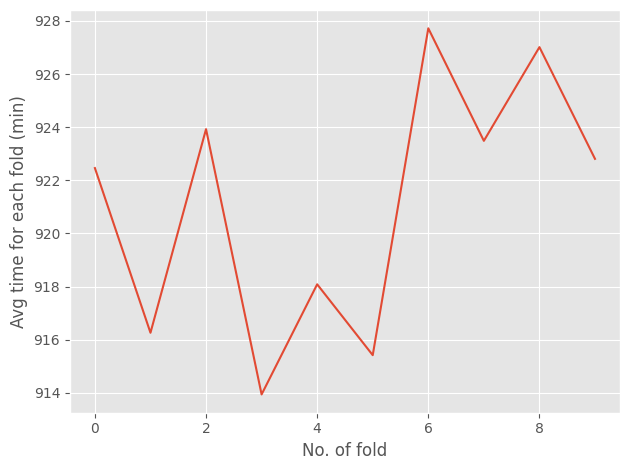

In [17]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(times_svm)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold (min)")
plt.tight_layout()
plt.savefig("svm times")
plt.show()

In [18]:
np.array(y_test_all).shape

(10, 302)

In [19]:
np.array(scores_svm).shape

(10, 302)

In [20]:
from sklearn.metrics import accuracy_score
acc_scores_svm = []
for i in range(len(y_test_all)):
    acc_scores_svm.append(accuracy_score(y_test_all[i],scores_svm[i]))

In [21]:
acc_scores_svm

[0.48013245033112584,
 0.4470198675496689,
 0.5099337748344371,
 0.48013245033112584,
 0.49337748344370863,
 0.5132450331125827,
 0.4966887417218543,
 0.5132450331125827,
 0.5165562913907285,
 0.4768211920529801]

In [22]:
df_acc = pd.DataFrame([acc_scores_svm])

df_acc.to_csv('svm_accuracy', index=False)

df_acc = pd.read_csv('svm_accuracy')

acc_scores_svm = df_acc.iloc[0].values

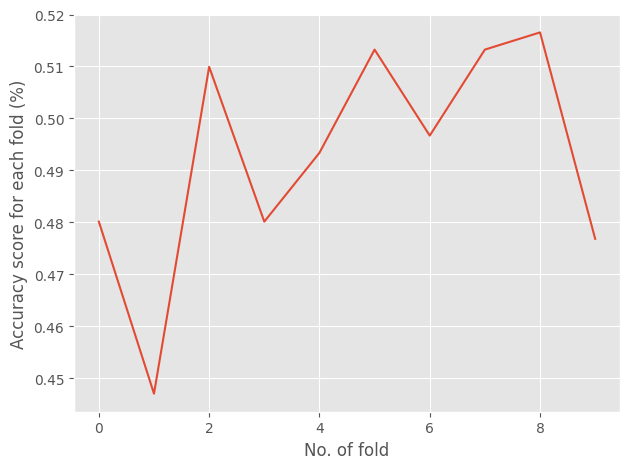

In [23]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_svm)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold (%)")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("svm accuracy")
plt.show()

In [24]:
scores_svm_n = np.array(scores_svm)
y_test_all_n = np.array(y_test_all)

scores_svm_n = scores_svm_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_svm_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 49.27%


In [26]:
import gc
gc.collect()

7046

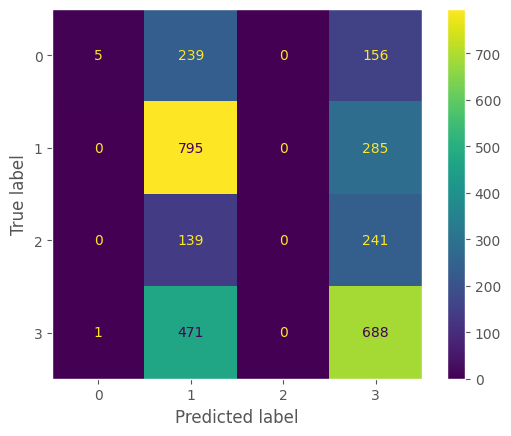

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_svm_n, labels=model_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_svm.classes_)
disp.plot()
plt.grid(False)
plt.savefig("svm")
plt.show()

In [28]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_svm_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.83      0.01      0.02       400
           1       0.48      0.74      0.58      1080
           2       0.00      0.00      0.00       380
           3       0.50      0.59      0.54      1160

    accuracy                           0.49      3020
   macro avg       0.45      0.34      0.29      3020
weighted avg       0.48      0.49      0.42      3020



C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree

In [29]:
import gc
gc.collect()

5

In [30]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_dtc = []
times_dtc = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    dtc = DecisionTreeClassifier()
    
    
    start_time = time.time()
    dtc.fit(X_train, y_train)
    end_time = time.time()
    
    
    x = dtc.predict(X_test)
    
    scores_dtc.append(x)
    times_dtc.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [31]:
times_dtc

[75.91345548629761,
 71.67866802215576,
 77.50791597366333,
 80.17910623550415,
 68.55435061454773,
 67.9250373840332,
 77.59495139122009,
 79.72405219078064,
 73.04198145866394,
 72.37524580955505]

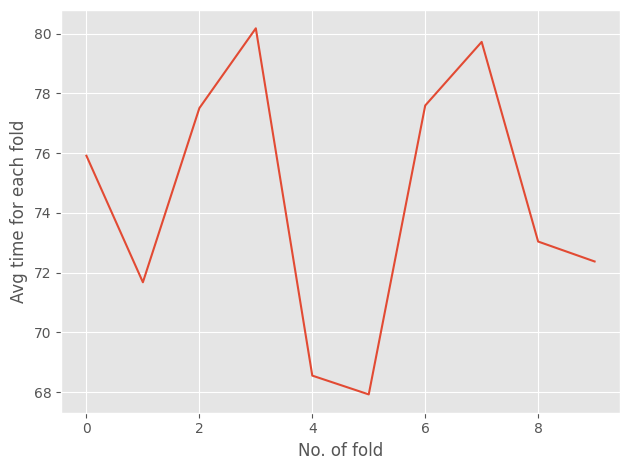

In [32]:
import matplotlib.pyplot as plt

plt.plot(times_dtc)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("dtc times")
plt.show()

In [33]:
np.array(y_test_all).shape

(10, 302)

In [34]:
np.array(scores_dtc).shape

(10, 302)

In [35]:
from sklearn.metrics import accuracy_score
acc_scores_dtc = []
for i in range(len(y_test_all)):
    acc_scores_dtc.append(accuracy_score(y_test_all[i],scores_dtc[i]))

In [36]:
acc_scores_dtc

[0.4370860927152318,
 0.40728476821192056,
 0.44039735099337746,
 0.46688741721854304,
 0.4105960264900662,
 0.4139072847682119,
 0.46357615894039733,
 0.4370860927152318,
 0.4337748344370861,
 0.46357615894039733]

In [37]:
df_acc = pd.DataFrame([acc_scores_dtc])

df_acc.to_csv('dtc_accuracy', index=False)

df_acc = pd.read_csv('dtc_accuracy')

acc_scores_dtc = df_acc.iloc[0].values

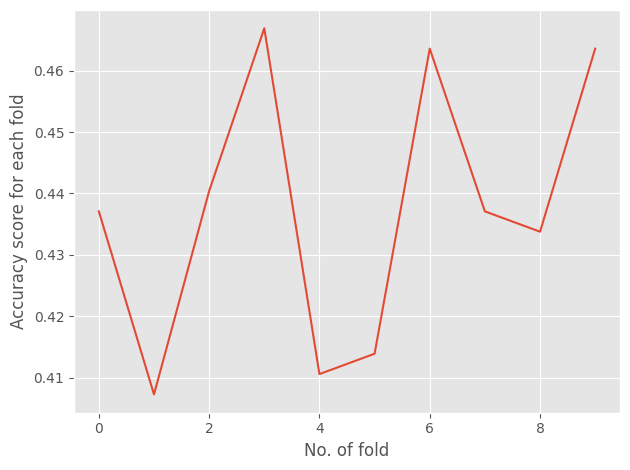

In [38]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_dtc)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("dtc accuracy")
plt.show()

In [39]:
import gc
gc.collect()

3284

In [40]:
scores_dtc_n = np.array(scores_dtc)
y_test_all_n = np.array(y_test_all)

scores_dtc_n = scores_dtc_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [41]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_dtc_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 43.74%


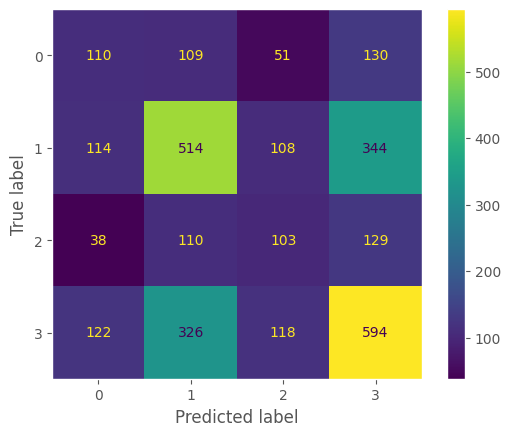

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_dtc_n, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
disp.plot()
plt.grid(False)
plt.savefig("DTC")
plt.show()

In [43]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_dtc_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.29      0.28      0.28       400
           1       0.49      0.48      0.48      1080
           2       0.27      0.27      0.27       380
           3       0.50      0.51      0.50      1160

    accuracy                           0.44      3020
   macro avg       0.38      0.38      0.38      3020
weighted avg       0.44      0.44      0.44      3020



In [44]:
# val = np.arange(100,500,20)
# parameters = [{'max_depth':val}]

In [45]:
# parameters

In [46]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [47]:
# grid_search_dtc = GridSearchCV(dtc, param_grid = parameters, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [48]:
# grid_search_dtc.fit(X_train,y_train)

In [49]:
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

# Random Forest

In [53]:
import gc
gc.collect()

986

In [54]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_rdf = []
times_rdf = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    rdf = RandomForestClassifier()
    
    #start time
    start_time = time.time()             
    
    rdf.fit(X_train, y_train)
    
    #end time
    end_time = time.time()     
    
    x = rdf.predict(X_test)
    scores_rdf.append(x)
    times_rdf.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [55]:
times_rdf

[51.26888990402222,
 51.954235315322876,
 51.22258424758911,
 50.992671728134155,
 46.625240087509155,
 45.634225845336914,
 50.583186864852905,
 50.74792671203613,
 51.674736738204956,
 51.79188299179077]

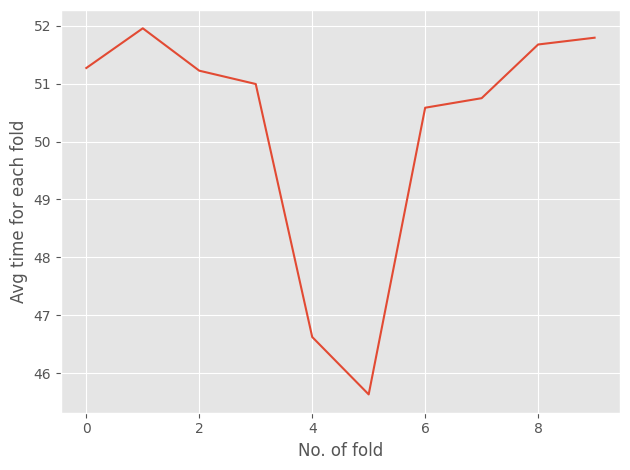

In [56]:
import matplotlib.pyplot as plt

plt.plot(times_rdf)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("rdf times")
plt.show()

In [57]:
import gc
gc.collect()

3470

In [58]:
from sklearn.metrics import accuracy_score
acc_scores_rdf = []
for i in range(len(y_test_all)):
    acc_scores_rdf.append(accuracy_score(y_test_all[i],scores_rdf[i]))

In [59]:
acc_scores_rdf

[0.6324503311258278,
 0.609271523178808,
 0.6158940397350994,
 0.6125827814569537,
 0.6291390728476821,
 0.6192052980132451,
 0.5960264900662252,
 0.6456953642384106,
 0.6390728476821192,
 0.6490066225165563]

In [60]:
df_acc = pd.DataFrame([acc_scores_rdf])

df_acc.to_csv('rdf_accuracy', index=False)

df_acc = pd.read_csv('rdf_accuracy')

acc_scores_rdf = df_acc.iloc[0].values

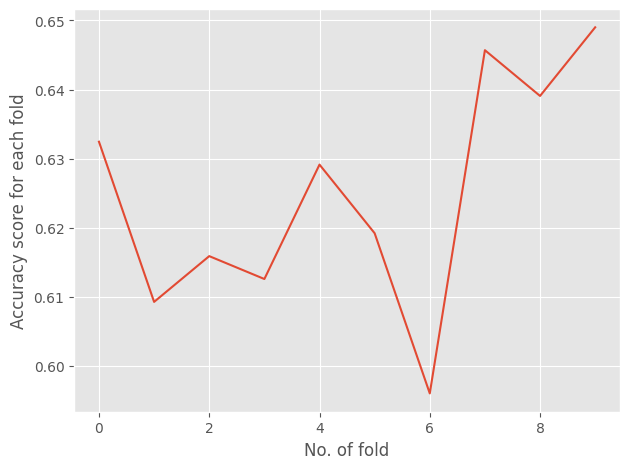

In [61]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_rdf)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("rdf accuracy")
plt.show()
plt.show()

In [62]:
scores_rdf_n = np.array(scores_rdf)
y_test_all_n = np.array(y_test_all)

scores_rdf_n = scores_rdf_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [63]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_rdf_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 62.48%


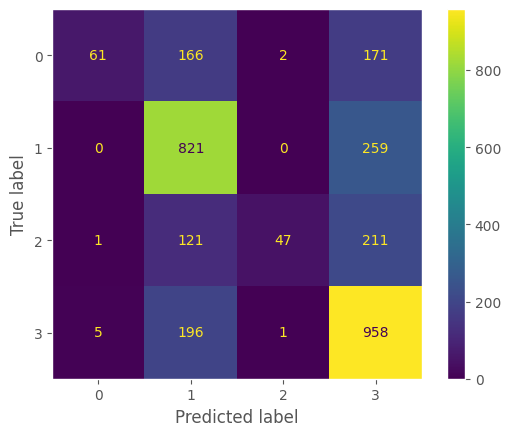

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_rdf_n, labels=rdf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rdf.classes_)
disp.plot()
plt.grid(False)
plt.savefig("RDF")
plt.show()

In [65]:
import gc
gc.collect()

6157

In [66]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_rdf_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.91      0.15      0.26       400
           1       0.63      0.76      0.69      1080
           2       0.94      0.12      0.22       380
           3       0.60      0.83      0.69      1160

    accuracy                           0.62      3020
   macro avg       0.77      0.47      0.47      3020
weighted avg       0.69      0.62      0.58      3020



In [67]:
# parameters_rdf = [
#               {'n_estimators': [10,50,100,150,250,500,750,1000,1500,2000],
#               'max_depth': [1,10,50,100,150,250,500,750,1000,1500,2000]}
#              ]

In [68]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [69]:
# grid_search = GridSearchCV(rdf, param_grid = parameters_rdf, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [70]:
# grid_search.fit(X_train,y_train)

In [71]:
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

# KNN

In [72]:
import gc
gc.collect()

0

In [73]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_knn = []
times_knn = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    knn = KNeighborsClassifier()
    
    start_time = time.time()
    
    knn.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = knn.predict(X_test)
    scores_knn.append(x)
    times_knn.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [74]:
times_knn

[0.06787872314453125,
 0.042044878005981445,
 0.031249523162841797,
 0.0406644344329834,
 0.06243324279785156,
 0.04996752738952637,
 0.06250882148742676,
 0.03125166893005371,
 0.03124713897705078,
 0.046883344650268555]

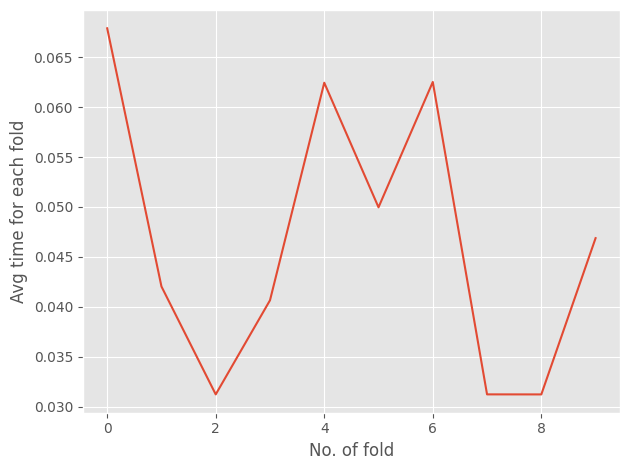

In [75]:
import matplotlib.pyplot as plt

plt.plot(times_knn)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("knn times")
plt.show()

In [76]:
from sklearn.metrics import accuracy_score
acc_scores_knn = []
for i in range(len(y_test_all)):
    acc_scores_knn.append(accuracy_score(y_test_all[i],scores_knn[i]))

In [77]:
acc_scores_knn

[0.423841059602649,
 0.38079470198675497,
 0.38741721854304634,
 0.3211920529801324,
 0.40728476821192056,
 0.423841059602649,
 0.31788079470198677,
 0.39403973509933776,
 0.3708609271523179,
 0.40066225165562913]

In [78]:
df_acc = pd.DataFrame([acc_scores_knn])

df_acc.to_csv('knn_accuracy', index=False)

df_acc = pd.read_csv('knn_accuracy')

acc_scores_knn = df_acc.iloc[0].values

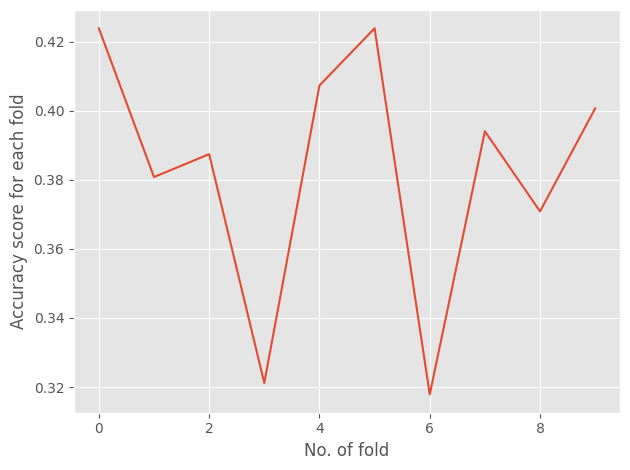

In [79]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_knn)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("knn accuracy")
plt.show()
plt.show()

In [80]:
import gc
gc.collect()

3341

In [81]:
scores_knn_n = np.array(scores_knn)
y_test_all_n = np.array(y_test_all)

scores_knn_n = scores_knn_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [82]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_knn_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 38.28%


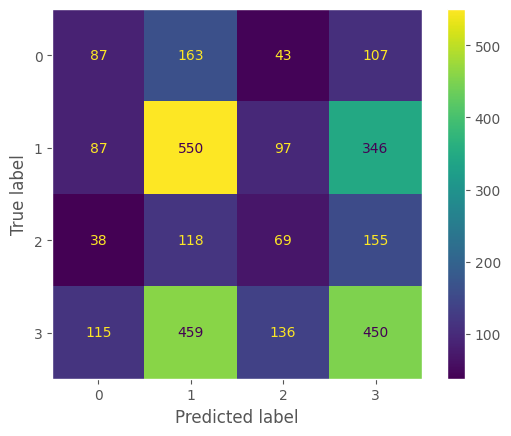

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_knn_n, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.grid(False)
plt.savefig("KNN")
plt.show()

In [84]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_knn_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.27      0.22      0.24       400
           1       0.43      0.51      0.46      1080
           2       0.20      0.18      0.19       380
           3       0.43      0.39      0.41      1160

    accuracy                           0.38      3020
   macro avg       0.33      0.32      0.32      3020
weighted avg       0.38      0.38      0.38      3020



In [85]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [86]:
# parameters_knn = [{'n_neighbors':[3,5,7,9,11,13,15,17,19,21],'weights': ['uniform', 'distance'],'leaf_size':[30,50,70,90,100]}]

In [87]:
# grid_search_knn = GridSearchCV(knn, param_grid = parameters_knn, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [88]:
# grid_search_knn.fit(X_train,y_train)

In [89]:
# print("Best hyperparameters: ", grid_search_knn.best_params_)
# print("Best score: ", grid_search_knn.best_score_)

In [90]:
# knn_2 = KNeighborsClassifier(n_neighbors=5,weights='distance',leaf_size=30)
# knn_2.fit(X_train,y_train)

# Naive Bayes

In [91]:
import gc
gc.collect()

6048

In [92]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_nb = []
times_nb = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    nb = GaussianNB()
    
    start_time = time.time()
    
    nb.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = nb.predict(X_test)
    scores_nb.append(x)
    times_nb.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [93]:
times_nb

[0.5780611038208008,
 0.5778043270111084,
 0.5572891235351562,
 0.6021358966827393,
 0.564704418182373,
 0.6121509075164795,
 0.5973515510559082,
 0.6322312355041504,
 0.6358487606048584,
 0.6599972248077393]

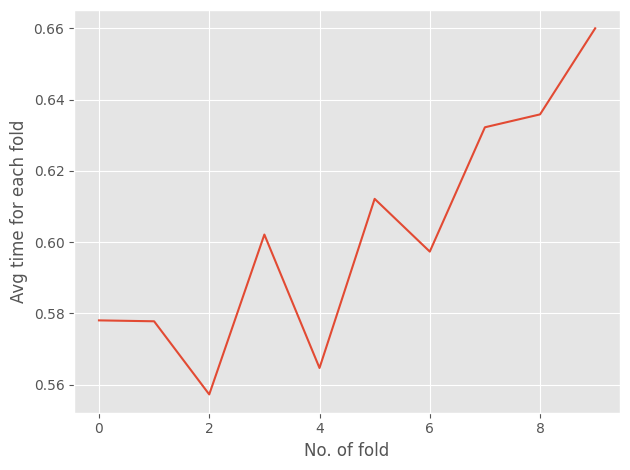

In [94]:
import matplotlib.pyplot as plt

plt.plot(times_nb)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("nb times")
plt.show()

In [95]:
import gc
gc.collect()

3356

In [96]:
from sklearn.metrics import accuracy_score
acc_scores_nb = []
for i in range(len(y_test_all)):
    acc_scores_nb.append(accuracy_score(y_test_all[i],scores_nb[i]))

In [97]:
acc_scores_nb

[0.2847682119205298,
 0.2913907284768212,
 0.3211920529801324,
 0.2847682119205298,
 0.24834437086092714,
 0.30132450331125826,
 0.26158940397350994,
 0.26490066225165565,
 0.25496688741721857,
 0.3079470198675497]

In [98]:
df_acc = pd.DataFrame([acc_scores_nb])

df_acc.to_csv('nb_accuracy', index=False)

df_acc = pd.read_csv('nb_accuracy')

acc_scores_nb = df_acc.iloc[0].values

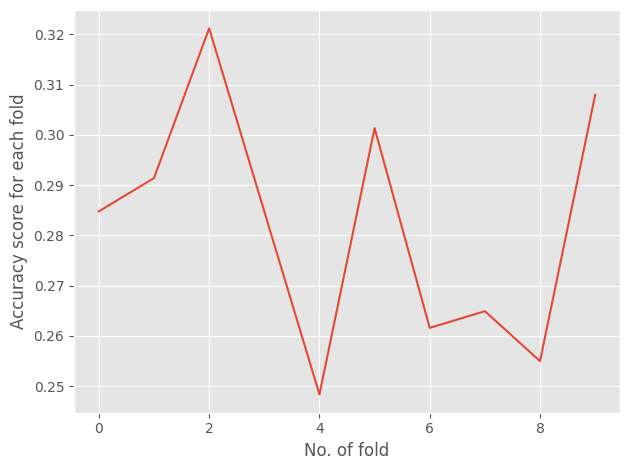

In [99]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_nb)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("nb accuracy")
plt.show()

In [100]:
scores_nb_n = np.array(scores_nb)
y_test_all_n = np.array(y_test_all)

scores_nb_n = scores_nb_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [101]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_nb_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 28.21%


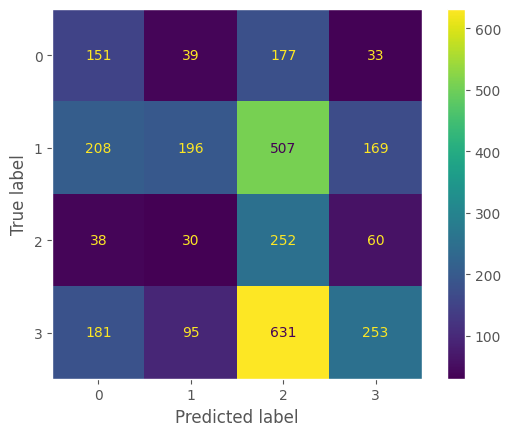

In [102]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_nb_n, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=nb.classes_)
disp.plot()
plt.grid(False)
plt.savefig("NB")
plt.show()

In [103]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_nb_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.26      0.38      0.31       400
           1       0.54      0.18      0.27      1080
           2       0.16      0.66      0.26       380
           3       0.49      0.22      0.30      1160

    accuracy                           0.28      3020
   macro avg       0.36      0.36      0.29      3020
weighted avg       0.44      0.28      0.29      3020



In [104]:
import gc
gc.collect()

6157

In [105]:
# parameters_nb = {'var_smoothing': [1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16,1e-17,1e-18,1e-19,1e-20,1e-9, 1e-8, 1e-7, 1e-6, 1e-5,1e-4,1e-3,1e-2]}

In [106]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [107]:
# grid_search_nb = GridSearchCV(nb, param_grid = parameters_nb, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [108]:
# grid_search_nb.fit(X_train,y_train)

In [109]:
# print("Best hyperparameters: ", grid_search_nb.best_params_)
# print("Best score: ", grid_search_nb.best_score_)

In [110]:
# nb_2 = GaussianNB(var_smoothing=1e-10)
# nb_2.fit(X_train,y_train)

In [111]:
# times_svm_n = np.array(times_svm)
# times_svm_n = times_svm_n/60.0

# times_dtc_n = np.array(times_dtc)
# times_dtc_n = times_dtc_n/60.0

# times_rdf_n = np.array(times_rdf)
# times_rdf_n = times_rdf_n/60.0

# times_knn_n = np.array(times_knn)
# times_knn_n = times_knn_n/60.0

# times_nb_n = np.array(times_nb)
# times_nb_n = times_svm_n/60.0

# Fusion (CNN+SVM)

In [8]:
import gc
gc.collect()

0

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import BatchNormalization

In [10]:
# X,y = load_data(DATA_PATH)

In [11]:
X.shape

(3020, 259, 100)

In [12]:
# ''''''
# from keras.layers import Activation
# from keras.backend import sigmoid
# def swish(x):
#     return x * sigmoid(x)
# ''''''

In [13]:
# ''''
# from keras.utils import get_custom_objects
# get_custom_objects().update({'swish':Activation(swish)})
# ''''

In [14]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_cnn_svm = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_cnn_svm.append(self.times)

# early_stop = EarlyStopping(monitor='loss', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [15]:
def create_model_cnn_svm():
    
    model_cnn_svm = keras.Sequential([

        keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (X.shape[1],X.shape[2],1)),
        keras.layers.MaxPool2D((3,3),strides=(1,1),padding ='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),

        keras.layers.Conv2D(32,(3,3),activation ='relu'),
        keras.layers.MaxPool2D((3,3),strides=(1,1),padding ='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),

        keras.layers.Flatten(),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dropout(0.5),


        keras.layers.Dense(4,kernel_regularizer=keras.regularizers.l2(0.01),activation='softmax')

    ])
    return model_cnn_svm

In [16]:
import gc
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_cnn_svm = []
y_test_all_cnn_svm = []
train_acc_cnn_svm = []
test_acc_cnn_svm = []
train_loss_cnn_svm = []
test_loss_cnn_svm = []


for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_cnn_svm.append(y_test)
    
    model_cnn_svm = None
    model_cnn_svm = create_model_cnn_svm()
    
    X_train, x_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    optimiser =tf.keras.optimizers.Adam(learning_rate=0.001)
    
    model_cnn_svm.compile(optimizer = optimiser, loss = tf.keras.losses.squared_hinge, metrics = ['accuracy'])
    
    history = model_cnn_svm.fit(X_train, y_train,validation_data=(x_valid,y_valid),batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    x = model_cnn_svm.predict(X_test)
    
    scores_cnn_svm.append(x)
    train_acc_cnn_svm.append(history.history["accuracy"])
    test_acc_cnn_svm.append(history.history["val_accuracy"])
    train_loss_cnn_svm.append(history.history["loss"])
    test_loss_cnn_svm.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 8s 64ms/step - loss: 0.8363 - accuracy: 0.3091 - val_loss: 0.8329 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8219 - accuracy: 0.3332 - val_loss: 0.8199 - val_accuracy: 0.3235 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8132 - accuracy: 0.3328 - val_loss: 0.8148 - val_accuracy: 0.3125 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8085 - accuracy: 0.2792 - val_loss: 0.8111 - val_accuracy: 0.3015 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8055 - accuracy: 0.3336 - val_loss: 0.8086 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8036 - accuracy: 0.3451 - val_loss: 0.8068 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 0.7981 - accuracy: 0.2278
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 4.36 seconds
77/77 [==============================] - 4s 57ms/step - loss: 0.7981 - accuracy: 0.2277 - val_loss: 0.8027 - val_accuracy: 0.2500 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7985 - accuracy: 0.2118 - val_loss: 0.8018 - val_accuracy: 0.2500 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7984 - accuracy: 0.2204 - val_loss: 0.8018 - val_accuracy: 0.2500 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 4s 56ms/step - loss: 0.7982 - accuracy: 0.2322 - val_loss: 0.8023 - val_accuracy: 0.2500 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7984 - accuracy: 0.2204 - val_loss: 0.8018 - val_accuracy: 0.2500 - lr: 1.6000e-06
E

76/77 [============================>.] - ETA: 0s - loss: 0.7983 - accuracy: 0.2159
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 4.39 seconds
77/77 [==============================] - 4s 57ms/step - loss: 0.7983 - accuracy: 0.2155 - val_loss: 0.8027 - val_accuracy: 0.2500 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7984 - accuracy: 0.2065 - val_loss: 0.8027 - val_accuracy: 0.2500 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 4s 56ms/step - loss: 0.7983 - accuracy: 0.2122 - val_loss: 0.8026 - val_accuracy: 0.2500 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7984 - accuracy: 0.2187 - val_loss: 0.8026 - val_accuracy: 0.2500 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7984 - accuracy: 0.2138 - val_loss: 0.8023 - val_accuracy: 0.2500 - lr: 4.0960e-12
Epoch 90/100
77

77/77 [==============================] - 4s 57ms/step - loss: 0.8057 - accuracy: 0.2899 - val_loss: 0.8018 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 14/100
76/77 [============================>.] - ETA: 0s - loss: 0.8049 - accuracy: 0.2438
Epoch 14: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 14: 4.36 seconds
77/77 [==============================] - 4s 57ms/step - loss: 0.8048 - accuracy: 0.2457 - val_loss: 0.8002 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 15/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8042 - accuracy: 0.2915 - val_loss: 0.8009 - val_accuracy: 0.3309 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8045 - accuracy: 0.2866 - val_loss: 0.8007 - val_accuracy: 0.3456 - lr: 2.0000e-04
Epoch 17/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8042 - accuracy: 0.3119 - val_loss: 0.8002 - val_accuracy: 0.3566 - lr: 2.0000e-04
Epoch 18/100
77/77 [==

Epoch 42/100
76/77 [============================>.] - ETA: 0s - loss: 0.8033 - accuracy: 0.3030
Epoch 42: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 42: 4.34 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8034 - accuracy: 0.3029 - val_loss: 0.7994 - val_accuracy: 0.3162 - lr: 1.6000e-06
Epoch 43/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8037 - accuracy: 0.3164 - val_loss: 0.7989 - val_accuracy: 0.3199 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8032 - accuracy: 0.2993 - val_loss: 0.7985 - val_accuracy: 0.3199 - lr: 3.2000e-07
Epoch 45/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8031 - accuracy: 0.3074 - val_loss: 0.7991 - val_accuracy: 0.3199 - lr: 3.2000e-07
Epoch 46/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8034 - accuracy: 0.3087 - val_loss: 0.7982 - val_accuracy: 0.3235 - lr: 3.2000e-07
Ep

77/77 [==============================] - ETA: 0s - loss: 0.8035 - accuracy: 0.3115
Epoch 98: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 98: 4.39 seconds
77/77 [==============================] - 4s 57ms/step - loss: 0.8035 - accuracy: 0.3115 - val_loss: 0.7989 - val_accuracy: 0.3235 - lr: 4.0960e-12
Epoch 99/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8032 - accuracy: 0.2907 - val_loss: 0.7990 - val_accuracy: 0.3199 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 0s 10ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 5s 59ms/step - loss: 0.8405 - accuracy: 0.2020 - val_loss: 0.8335 - val_accuracy: 0.1471 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8292 - accuracy: 0.2817 - val_loss: 0.8247 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8228 - accuracy:

77/77 [==============================] - 4s 57ms/step - loss: 0.8086 - accuracy: 0.3639 - val_loss: 0.8088 - val_accuracy: 0.4081 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8084 - accuracy: 0.3704 - val_loss: 0.8088 - val_accuracy: 0.4081 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8085 - accuracy: 0.3704 - val_loss: 0.8088 - val_accuracy: 0.4081 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8086 - accuracy: 0.3688 - val_loss: 0.8088 - val_accuracy: 0.4081 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8086 - accuracy: 0.3704 - val_loss: 0.8088 - val_accuracy: 0.4081 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8085 - accuracy: 0.3737 - val_loss: 0.8088 - val_accuracy: 0.4081 - lr: 1.2800e-08
Epoch 59/100
77/77 [==============================] -

Epoch 9/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8075 - accuracy: 0.1325 - val_loss: 0.8034 - val_accuracy: 0.1471 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8071 - accuracy: 0.1361 - val_loss: 0.8032 - val_accuracy: 0.1471 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8072 - accuracy: 0.1378 - val_loss: 0.8030 - val_accuracy: 0.1471 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8068 - accuracy: 0.1333 - val_loss: 0.8028 - val_accuracy: 0.1471 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8067 - accuracy: 0.1370 - val_loss: 0.8026 - val_accuracy: 0.1471 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8066 - accuracy: 0.1357 - val_loss: 0.8024 - val_accuracy: 0.1471 - lr: 2.0000e-04
Epoch 15/100
76/77 [=====================

77/77 [==============================] - 4s 56ms/step - loss: 0.8056 - accuracy: 0.1325 - val_loss: 0.8017 - val_accuracy: 0.1471 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8057 - accuracy: 0.1386 - val_loss: 0.8017 - val_accuracy: 0.1471 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8058 - accuracy: 0.1402 - val_loss: 0.8017 - val_accuracy: 0.1471 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8057 - accuracy: 0.1329 - val_loss: 0.8017 - val_accuracy: 0.1471 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8058 - accuracy: 0.1321 - val_loss: 0.8017 - val_accuracy: 0.1471 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8058 - accuracy: 0.1349 - val_loss: 0.8017 - val_accuracy: 0.1471 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] -

Epoch 21/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7948 - accuracy: 0.2535 - val_loss: 0.7909 - val_accuracy: 0.3456 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7949 - accuracy: 0.2469 - val_loss: 0.7909 - val_accuracy: 0.3235 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 4s 56ms/step - loss: 0.7950 - accuracy: 0.2257 - val_loss: 0.7908 - val_accuracy: 0.3235 - lr: 4.0000e-05
Epoch 24/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7948 - accuracy: 0.2326 - val_loss: 0.7903 - val_accuracy: 0.2831 - lr: 4.0000e-05
Epoch 25/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7948 - accuracy: 0.2359 - val_loss: 0.7909 - val_accuracy: 0.3125 - lr: 4.0000e-05
Epoch 26/100
76/77 [============================>.] - ETA: 0s - loss: 0.7948 - accuracy: 0.2422
Epoch 26: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 26: 4.

77/77 [==============================] - 4s 57ms/step - loss: 0.7947 - accuracy: 0.2347 - val_loss: 0.7899 - val_accuracy: 0.3346 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - 4s 56ms/step - loss: 0.7948 - accuracy: 0.2379 - val_loss: 0.7908 - val_accuracy: 0.3309 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7945 - accuracy: 0.2375 - val_loss: 0.7908 - val_accuracy: 0.3309 - lr: 1.0240e-10
Epoch 80/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7948 - accuracy: 0.2437 - val_loss: 0.7908 - val_accuracy: 0.3346 - lr: 1.0240e-10
Epoch 81/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7949 - accuracy: 0.2433 - val_loss: 0.7908 - val_accuracy: 0.3346 - lr: 1.0240e-10
Epoch 82/100
76/77 [============================>.] - ETA: 0s - loss: 0.7947 - accuracy: 0.2410
Epoch 82: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 82: 4.35 seconds
7

77/77 [==============================] - 4s 57ms/step - loss: 0.8032 - accuracy: 0.3590 - val_loss: 0.8001 - val_accuracy: 0.3566 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8032 - accuracy: 0.3585 - val_loss: 0.8001 - val_accuracy: 0.3566 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8032 - accuracy: 0.3557 - val_loss: 0.8001 - val_accuracy: 0.3566 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8032 - accuracy: 0.3585 - val_loss: 0.8001 - val_accuracy: 0.3566 - lr: 1.6000e-06
Epoch 36/100
77/77 [==============================] - ETA: 0s - loss: 0.8031 - accuracy: 0.3581
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 4.34 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8031 - accuracy: 0.3581 - val_loss: 0.8001 - val_accuracy: 0.3566 - lr: 1.6000e-06
Epoch 37/100
77

77/77 [==============================] - 4s 56ms/step - loss: 0.8032 - accuracy: 0.3581 - val_loss: 0.8001 - val_accuracy: 0.3566 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8031 - accuracy: 0.3585 - val_loss: 0.8001 - val_accuracy: 0.3566 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8032 - accuracy: 0.3549 - val_loss: 0.8001 - val_accuracy: 0.3566 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8032 - accuracy: 0.3577 - val_loss: 0.8001 - val_accuracy: 0.3566 - lr: 4.0960e-12
Epoch 92/100
76/77 [============================>.] - ETA: 0s - loss: 0.8030 - accuracy: 0.3573
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 4.38 seconds
77/77 [==============================] - 4s 57ms/step - loss: 0.8031 - accuracy: 0.3569 - val_loss: 0.8001 - val_accuracy: 0.3566 - lr: 4.0960e-12
Epoch 93/100
77

Epoch 16/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8046 - accuracy: 0.3778 - val_loss: 0.8036 - val_accuracy: 0.3529 - lr: 2.0000e-04
Epoch 17/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8042 - accuracy: 0.3823 - val_loss: 0.8034 - val_accuracy: 0.3529 - lr: 2.0000e-04
Epoch 18/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8040 - accuracy: 0.3774 - val_loss: 0.8032 - val_accuracy: 0.3529 - lr: 2.0000e-04
Epoch 19/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8036 - accuracy: 0.3782 - val_loss: 0.8030 - val_accuracy: 0.3529 - lr: 2.0000e-04
Epoch 20/100
77/77 [==============================] - ETA: 0s - loss: 0.8037 - accuracy: 0.3876
Epoch 20: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 20: 4.33 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8037 - accuracy: 0.3876 - val_loss: 0.8028 - val_accuracy: 0.3529 - lr: 2.0000e-04
E

77/77 [==============================] - 4s 56ms/step - loss: 0.8033 - accuracy: 0.3765 - val_loss: 0.8023 - val_accuracy: 0.3529 - lr: 5.1200e-10
Epoch 73/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8031 - accuracy: 0.3774 - val_loss: 0.8023 - val_accuracy: 0.3529 - lr: 5.1200e-10
Epoch 74/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8033 - accuracy: 0.3733 - val_loss: 0.8023 - val_accuracy: 0.3529 - lr: 5.1200e-10
Epoch 75/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8033 - accuracy: 0.3778 - val_loss: 0.8023 - val_accuracy: 0.3529 - lr: 5.1200e-10
Epoch 76/100
77/77 [==============================] - ETA: 0s - loss: 0.8030 - accuracy: 0.3786
Epoch 76: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 76: 4.36 seconds
77/77 [==============================] - 4s 57ms/step - loss: 0.8030 - accuracy: 0.3786 - val_loss: 0.8023 - val_accuracy: 0.3529 - lr: 5.1200e-10
Epoch 77/100
7

Epoch 28/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8078 - accuracy: 0.1300 - val_loss: 0.8109 - val_accuracy: 0.1434 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 0.8077 - accuracy: 0.1328
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 4.37 seconds
77/77 [==============================] - 4s 57ms/step - loss: 0.8079 - accuracy: 0.1337 - val_loss: 0.8109 - val_accuracy: 0.1434 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8079 - accuracy: 0.1349 - val_loss: 0.8109 - val_accuracy: 0.1434 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8078 - accuracy: 0.1333 - val_loss: 0.8109 - val_accuracy: 0.1434 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8079 - accuracy: 0.1365 - val_loss: 0.8109 - val_accuracy: 0.1434 - lr: 1.6000e-06
E

77/77 [==============================] - 4s 57ms/step - loss: 0.8078 - accuracy: 0.1341 - val_loss: 0.8108 - val_accuracy: 0.1434 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 0.8077 - accuracy: 0.1345
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 4.33 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8077 - accuracy: 0.1345 - val_loss: 0.8108 - val_accuracy: 0.1434 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8078 - accuracy: 0.1333 - val_loss: 0.8108 - val_accuracy: 0.1434 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8077 - accuracy: 0.1361 - val_loss: 0.8107 - val_accuracy: 0.1434 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8078 - accuracy: 0.1341 - val_loss: 0.8109 - val_accuracy: 0.1434 - lr: 4.0960e-12
Epoch 89/100
77

Epoch 12/100
77/77 [==============================] - 4s 56ms/step - loss: 0.7964 - accuracy: 0.2813 - val_loss: 0.7989 - val_accuracy: 0.4228 - lr: 0.0010
Epoch 13/100
77/77 [==============================] - 4s 56ms/step - loss: 0.7907 - accuracy: 0.2874 - val_loss: 0.7982 - val_accuracy: 0.4375 - lr: 0.0010
Epoch 14/100
77/77 [==============================] - 4s 56ms/step - loss: 0.7913 - accuracy: 0.3034 - val_loss: 0.7975 - val_accuracy: 0.4228 - lr: 0.0010
Epoch 15/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7905 - accuracy: 0.2976 - val_loss: 0.7968 - val_accuracy: 0.4118 - lr: 0.0010
Epoch 16/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7826 - accuracy: 0.2993 - val_loss: 0.7961 - val_accuracy: 0.4265 - lr: 0.0010
Epoch 17/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7791 - accuracy: 0.3181 - val_loss: 0.7956 - val_accuracy: 0.4301 - lr: 0.0010
Epoch 18/100
77/77 [==============================] - 4s 56ms/st

Epoch 41/100
77/77 [==============================] - ETA: 0s - loss: 0.7629 - accuracy: 0.3352
Epoch 41: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 41: 4.34 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.7629 - accuracy: 0.3352 - val_loss: 0.7927 - val_accuracy: 0.4301 - lr: 8.0000e-06
Epoch 42/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7656 - accuracy: 0.3242 - val_loss: 0.7927 - val_accuracy: 0.4301 - lr: 1.6000e-06
Epoch 43/100
77/77 [==============================] - 4s 56ms/step - loss: 0.7685 - accuracy: 0.3340 - val_loss: 0.7927 - val_accuracy: 0.4301 - lr: 1.6000e-06
Epoch 44/100
77/77 [==============================] - 4s 56ms/step - loss: 0.7634 - accuracy: 0.3181 - val_loss: 0.7927 - val_accuracy: 0.4301 - lr: 1.6000e-06
Epoch 45/100
77/77 [==============================] - 4s 56ms/step - loss: 0.7619 - accuracy: 0.3332 - val_loss: 0.7927 - val_accuracy: 0.4301 - lr: 1.6000e-06
E

76/77 [============================>.] - ETA: 0s - loss: 0.7608 - accuracy: 0.3298
Epoch 97: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 97: 4.34 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.7611 - accuracy: 0.3291 - val_loss: 0.7927 - val_accuracy: 0.4301 - lr: 2.0480e-11
Epoch 98/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7646 - accuracy: 0.3201 - val_loss: 0.7927 - val_accuracy: 0.4301 - lr: 4.0960e-12
Epoch 99/100
77/77 [==============================] - 4s 56ms/step - loss: 0.7658 - accuracy: 0.3254 - val_loss: 0.7927 - val_accuracy: 0.4301 - lr: 4.0960e-12
Epoch 100/100
10/10 [==============================] - 0s 11ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 5s 58ms/step - loss: 0.8471 - accuracy: 0.2281 - val_loss: 0.8440 - val_accuracy: 0.2279 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8344 - acc

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
import gc
gc.collect()

In [18]:
np.array(y_test_all_cnn_svm).shape

In [19]:
import matplotlib.pyplot as plt

times_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(times_cnn_svm):
    times_cnn_svm_n[i, :len(row)] = row

times_cnn_svm_n_n = np.mean(times_cnn_svm_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_cnn_svm_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("cnn_svm times")
plt.show()

In [20]:
train_acc_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(train_acc_cnn_svm):
    train_acc_cnn_svm_n[i, :len(row)] = row
    
test_acc_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(test_acc_cnn_svm):
    test_acc_cnn_svm_n[i, :len(row)] = row
    
train_loss_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(train_loss_cnn_svm):
    train_loss_cnn_svm_n[i, :len(row)] = row
    
test_loss_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(test_loss_cnn_svm):
    test_loss_cnn_svm_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_cnn_svm_n = np.mean(train_acc_cnn_svm_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_cnn_svm_n = np.mean(test_acc_cnn_svm_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_cnn_svm_n = np.mean(train_loss_cnn_svm_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_cnn_svm_n = np.mean(test_loss_cnn_svm_n,axis=0)

In [21]:
train_acc_cnn_svm_n.shape

In [22]:
train_acc_cnn_svm_n.shape

In [23]:
data = [train_acc_cnn_svm_n,test_acc_cnn_svm_n,train_loss_cnn_svm_n,test_loss_cnn_svm_n]

df = pd.DataFrame(data)
df.to_csv('cnn_svm_acc', index=False)
df = pd.read_csv('cnn_svm_acc')

train_acc_cnn_svm_n = df.iloc[0]
test_acc_cnn_svm_n = df.iloc[1]
train_loss_cnn_svm_n = df.iloc[2]
test_loss_cnn_svm_n = df.iloc[3]


df_t = pd.DataFrame([times_cnn_svm_n_n])
df_t.to_csv('cnn_svm_times', index=False)
df_t = pd.read_csv('cnn_svm_times')

times_cnn_svm_n_n = df_t.iloc[0]

In [24]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))
plt.style.use('ggplot')

axs[0].plot(train_acc_cnn_svm_n, label='Training Accuracy')
axs[0].plot(test_acc_cnn_svm_n, label='Testing Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_cnn_svm_n, label='Training Loss')
axs[1].plot(test_loss_cnn_svm_n, label='Testing Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("CNN + SVM Training and Testing Loss")
plt.show()

In [25]:
np.array(scores_cnn_svm).shape

In [26]:
np.array(y_test_all_cnn_svm).shape

In [27]:
y_pred_cnn_svm = np.argmax(scores_cnn_svm,axis=2)

In [28]:
y_pred_cnn_svm.shape

In [29]:
from sklearn.metrics import accuracy_score
acc_scores_cnn_svm = []
for i in range(len(y_test_all_cnn_svm)):
    acc_scores_cnn_svm.append(accuracy_score(y_true = y_test_all_cnn_svm[i],y_pred = y_pred_cnn_svm[i]))

In [30]:
import gc
gc.collect()

In [31]:
acc_scores_cnn_svm

In [32]:
df_acc = pd.DataFrame([acc_scores_cnn_svm])

df_acc.to_csv('cnn_svm_accuracy', index=False)

df_acc = pd.read_csv('cnn_svm_accuracy')

acc_scores_cnn_svm = df_acc.iloc[0].values

In [33]:
y_test_all_n = np.array(y_test_all_cnn_svm)

y_pred_cnn_svm_n = y_pred_cnn_svm.flatten()
y_test_all_n = y_test_all_n.flatten()

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_cnn_svm_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("CNN + SVM")
plt.show()

In [35]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_cnn_svm_n)
print(cf_r)

## CNN + SVM (hyper-para-tuning)

In [ ]:
# ''''
# conv_1_filter: 48
# conv_1_kernel: 3
# conv_2_filter: 64
# conv_2_kernel: 5
# dense_1_units: 32
# lr: 0.0012043751090852965

# ''''

In [ ]:
# import numpy as np
# from sklearn.model_selection import GridSearchCV, StratifiedKFold
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# X,y = load_data(DATA_PATH)

In [ ]:
# X = X / 255.0

In [ ]:
# X.shape

In [ ]:
# ''''
# def create():
    
#     model_cnn = Sequential()
#     model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(X.shape[1],X.shape[2],1))),
#     model.add(MaxPooling2D(pool_size=pool_size ,strides=(1,1),padding ='same')),
#     model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu')),
#     model.add(MaxPooling2D(pool_size=pool_size,strides=(1,1),padding ='same')),
#     model.add(Flatten()),
#     model.add(Dense(128, activation='relu')),
#     model.add(Dropout(0.5)),
#     model.add(Dense(4,kernel_regularizer=keras.regularizers.l2(0.01), activation='softmax')),
#     model.compile(optimizer=optimizer, loss='squared_hinge', metrics=['accuracy'])
    
#     return model_cnn

# ''''

In [ ]:
# def build_model(hp):
#     model = keras.Sequential([
#     keras.layers.Conv2D(
#         filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
#         kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
#         activation='relu',
#         input_shape=(259,13,1)
#     ),
    
#     keras.layers.MaxPooling2D(
#         pool_size = (2, 2),
#         strides=(1,1),
#         padding ='same'
#     ),
        
#     keras.layers.Conv2D(
#         filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
#         kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
#         activation='relu'
#     ),
        
#     keras.layers.MaxPooling2D(
#         pool_size = (2,2),
#         strides=(1,1),
#         padding ='same'
#     ),
    
#     keras.layers.Flatten(),
#     keras.layers.Dense(
#         units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
#         activation='relu'
#     ),
#     keras.layers.Dense(4,kernel_regularizer=keras.regularizers.l2(0.01), activation='softmax')
#   ])
  
#     learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
#     model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
#               loss='squared_hinge',
#               metrics=['accuracy'])
  
#     return model

In [ ]:
# from keras_tuner import RandomSearch
# from keras_tuner.engine.hyperparameters import HyperParameters

In [ ]:
# tuner_search=RandomSearch(build_model,
#                           objective='accuracy',
#                           overwrite=True,
#                           max_trials=10,directory='cnn')

In [ ]:
# tuner_search.search(X,y,epochs=2,validation_split=0.2)

In [ ]:
# tuner_search.results_summary()

In [ ]:
# models = tuner_search.get_best_models(num_models=2)

# best_model = models[0]

# best_model.build(input_shape=(259,13,1))

# best_model.summary()

In [ ]:
# def display_cv_results(search_results):
#     print('Best score = {:.4f} using {}'.format(search_results.best_score_, search_results.best_params_))    
    
# # create model
# model = KerasClassifier(build_fn=create_cnn_model, verbose=1)
# # define parameters and values for grid search 
# param_grid = {
#     'filters': [16, 32, 64],
#     'kernel_size': [(3, 3), (5, 5)],
#     'pool_size': [(2, 2), (3, 3)],
#     'activation': ['relu', 'sigmoid'],
#     'optimizer': ['adam', 'SGD'],
#     'batch_size': [16, 32, 64],
# }
# grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=cv)
# grid_result = grid.fit(X, y)  # fit the full dataset as we are using cross validation 

# # print out results
# print('time for grid search = {:.0f} sec'.format(time()-start))
# display_cv_results(grid_result)

# XGboost

In [113]:
import gc
gc.collect()

0

In [114]:
import gc
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_xg = []
times_xg = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    xg = XGBClassifier()
    
    start_time = time.time()
    
    xg.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = xg.predict(X_test)
    scores_xg.append(x)
    times_xg.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [115]:
times_xg

[275.7682087421417,
 280.03531312942505,
 280.45484042167664,
 280.98826789855957,
 281.4638032913208,
 278.77345871925354,
 277.9959964752197,
 278.44982743263245,
 279.09337425231934,
 278.4257552623749]

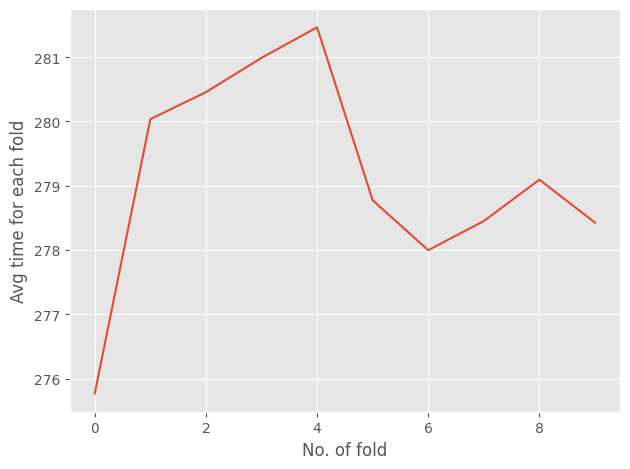

In [116]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.plot(times_xg)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("xg times")
plt.show()

In [117]:
import gc
gc.collect()

3356

In [118]:
from sklearn.metrics import accuracy_score
acc_scores_xg = []
for i in range(len(y_test_all)):
    acc_scores_xg.append(accuracy_score(y_test_all[i],scores_xg[i]))

In [119]:
acc_scores_xg

[0.7417218543046358,
 0.695364238410596,
 0.7251655629139073,
 0.7152317880794702,
 0.7052980132450332,
 0.7052980132450332,
 0.7052980132450332,
 0.7417218543046358,
 0.7185430463576159,
 0.7450331125827815]

In [120]:
df_acc = pd.DataFrame([acc_scores_xg])

df_acc.to_csv('xg_accuracy', index=False)

df_acc = pd.read_csv('xg_accuracy')

acc_scores_xg = df_acc.iloc[0].values

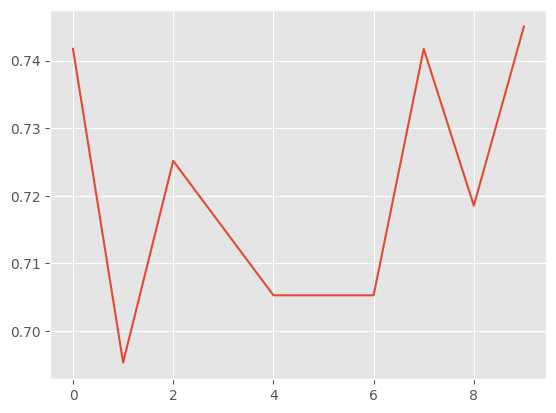

In [121]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_xg)
plt.style.use('ggplot')
plt.savefig("XG boost Acc figures")
plt.show()

In [122]:
scores_xg_n = np.array(scores_xg)
y_test_all_n = np.array(y_test_all)

scores_xg_n = scores_xg_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [123]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_xg_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.99%


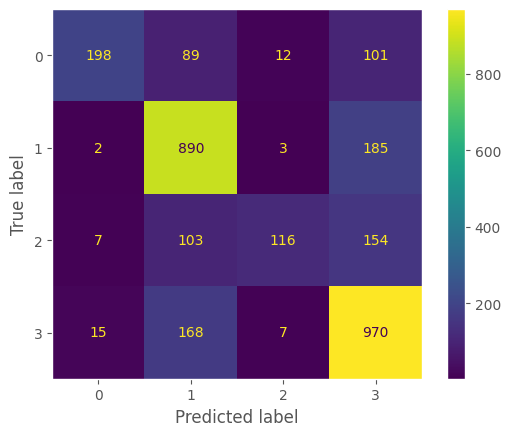

In [124]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_xg_n, labels=xg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xg.classes_)
disp.plot()
plt.grid(False)
plt.savefig("XG Boost")

plt.show()

In [125]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_xg_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.89      0.49      0.64       400
           1       0.71      0.82      0.76      1080
           2       0.84      0.31      0.45       380
           3       0.69      0.84      0.75      1160

    accuracy                           0.72      3020
   macro avg       0.78      0.62      0.65      3020
weighted avg       0.74      0.72      0.70      3020



# Catboost

In [126]:
import gc
gc.collect()

6245

In [127]:
import gc
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_cb = []
times_cb = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.10)
    
    cb = CatBoostClassifier(iterations=100)
    
    start_time = time.time()
    
    cb.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = cb.predict(X_test)
    scores_cb.append(x)
    times_cb.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Learning rate set to 0.5
0:	learn: 1.2672191	total: 2.92s	remaining: 4m 49s
1:	learn: 1.1981858	total: 5.43s	remaining: 4m 26s
2:	learn: 1.1507689	total: 8.27s	remaining: 4m 27s
3:	learn: 1.1231443	total: 11s	remaining: 4m 24s
4:	learn: 1.0970551	total: 13.8s	remaining: 4m 21s
5:	learn: 1.0689600	total: 16.6s	remaining: 4m 19s
6:	learn: 1.0322492	total: 19.4s	remaining: 4m 17s
7:	learn: 0.9943935	total: 22.2s	remaining: 4m 15s
8:	learn: 0.9710096	total: 25.1s	remaining: 4m 13s
9:	learn: 0.9502973	total: 27.8s	remaining: 4m 10s
10:	learn: 0.9238179	total: 30.6s	remaining: 4m 7s
11:	learn: 0.9026720	total: 33.4s	remaining: 4m 5s
12:	learn: 0.8797001	total: 36.2s	remaining: 4m 2s
13:	learn: 0.8596676	total: 39s	remaining: 3m 59s
14:	learn: 0.8356993	total: 41.8s	remaining: 3m 56s
15:	learn: 0.8110556	total: 44.6s	remaining: 3m 53s
16:	learn: 0.7938444	total: 47.3s	remaining: 3m 51s
17:	learn: 0.7742130	total: 50.1s	remaining: 3m 48s
18:	learn: 0.7540734	total: 52.

56:	learn: 0.3194771	total: 2m 38s	remaining: 1m 59s
57:	learn: 0.3118882	total: 2m 41s	remaining: 1m 57s
58:	learn: 0.3066034	total: 2m 44s	remaining: 1m 54s
59:	learn: 0.3001473	total: 2m 47s	remaining: 1m 51s
60:	learn: 0.2940773	total: 2m 50s	remaining: 1m 48s
61:	learn: 0.2875595	total: 2m 52s	remaining: 1m 45s
62:	learn: 0.2806414	total: 2m 55s	remaining: 1m 43s
63:	learn: 0.2761509	total: 2m 58s	remaining: 1m 40s
64:	learn: 0.2717130	total: 3m 1s	remaining: 1m 37s
65:	learn: 0.2678478	total: 3m 4s	remaining: 1m 34s
66:	learn: 0.2634609	total: 3m 6s	remaining: 1m 32s
67:	learn: 0.2570239	total: 3m 9s	remaining: 1m 29s
68:	learn: 0.2510323	total: 3m 12s	remaining: 1m 26s
69:	learn: 0.2465865	total: 3m 15s	remaining: 1m 23s
70:	learn: 0.2410782	total: 3m 18s	remaining: 1m 20s
71:	learn: 0.2359010	total: 3m 20s	remaining: 1m 18s
72:	learn: 0.2317791	total: 3m 23s	remaining: 1m 15s
73:	learn: 0.2291334	total: 3m 26s	remaining: 1m 12s
74:	learn: 0.2260905	total: 3m 29s	remaining: 1m 9

12:	learn: 0.8725863	total: 36.2s	remaining: 4m 2s
13:	learn: 0.8514596	total: 39s	remaining: 3m 59s
14:	learn: 0.8320689	total: 41.8s	remaining: 3m 56s
15:	learn: 0.8090525	total: 44.6s	remaining: 3m 53s
16:	learn: 0.7874855	total: 47.3s	remaining: 3m 50s
17:	learn: 0.7651085	total: 50.1s	remaining: 3m 48s
18:	learn: 0.7361821	total: 52.9s	remaining: 3m 45s
19:	learn: 0.7165504	total: 55.6s	remaining: 3m 42s
20:	learn: 0.7038973	total: 58.4s	remaining: 3m 39s
21:	learn: 0.6841954	total: 1m 1s	remaining: 3m 37s
22:	learn: 0.6661313	total: 1m 3s	remaining: 3m 34s
23:	learn: 0.6468624	total: 1m 6s	remaining: 3m 31s
24:	learn: 0.6303016	total: 1m 9s	remaining: 3m 28s
25:	learn: 0.6107039	total: 1m 12s	remaining: 3m 26s
26:	learn: 0.6004386	total: 1m 15s	remaining: 3m 23s
27:	learn: 0.5827959	total: 1m 17s	remaining: 3m 20s
28:	learn: 0.5671088	total: 1m 20s	remaining: 3m 17s
29:	learn: 0.5527484	total: 1m 23s	remaining: 3m 14s
30:	learn: 0.5430886	total: 1m 26s	remaining: 3m 11s
31:	learn

69:	learn: 0.2232297	total: 3m 15s	remaining: 1m 23s
70:	learn: 0.2206182	total: 3m 17s	remaining: 1m 20s
71:	learn: 0.2184741	total: 3m 20s	remaining: 1m 18s
72:	learn: 0.2167436	total: 3m 23s	remaining: 1m 15s
73:	learn: 0.2124565	total: 3m 26s	remaining: 1m 12s
74:	learn: 0.2098431	total: 3m 29s	remaining: 1m 9s
75:	learn: 0.2069309	total: 3m 31s	remaining: 1m 6s
76:	learn: 0.2041316	total: 3m 34s	remaining: 1m 4s
77:	learn: 0.2000664	total: 3m 37s	remaining: 1m 1s
78:	learn: 0.1971447	total: 3m 40s	remaining: 58.5s
79:	learn: 0.1954283	total: 3m 42s	remaining: 55.7s
80:	learn: 0.1918789	total: 3m 45s	remaining: 52.9s
81:	learn: 0.1889499	total: 3m 48s	remaining: 50.1s
82:	learn: 0.1853258	total: 3m 51s	remaining: 47.4s
83:	learn: 0.1835506	total: 3m 53s	remaining: 44.6s
84:	learn: 0.1796252	total: 3m 56s	remaining: 41.8s
85:	learn: 0.1774092	total: 3m 59s	remaining: 39s
86:	learn: 0.1734885	total: 4m 2s	remaining: 36.2s
87:	learn: 0.1701374	total: 4m 5s	remaining: 33.4s
88:	learn: 

25:	learn: 0.5842117	total: 1m 12s	remaining: 3m 25s
26:	learn: 0.5695251	total: 1m 14s	remaining: 3m 22s
27:	learn: 0.5563686	total: 1m 17s	remaining: 3m 19s
28:	learn: 0.5410230	total: 1m 20s	remaining: 3m 17s
29:	learn: 0.5314246	total: 1m 23s	remaining: 3m 14s
30:	learn: 0.5212606	total: 1m 26s	remaining: 3m 11s
31:	learn: 0.5074760	total: 1m 28s	remaining: 3m 8s
32:	learn: 0.4933481	total: 1m 31s	remaining: 3m 6s
33:	learn: 0.4861894	total: 1m 34s	remaining: 3m 3s
34:	learn: 0.4708236	total: 1m 37s	remaining: 3m
35:	learn: 0.4583961	total: 1m 40s	remaining: 2m 58s
36:	learn: 0.4496968	total: 1m 42s	remaining: 2m 55s
37:	learn: 0.4407441	total: 1m 45s	remaining: 2m 52s
38:	learn: 0.4332802	total: 1m 48s	remaining: 2m 49s
39:	learn: 0.4266057	total: 1m 51s	remaining: 2m 46s
40:	learn: 0.4179384	total: 1m 54s	remaining: 2m 44s
41:	learn: 0.4083374	total: 1m 56s	remaining: 2m 41s
42:	learn: 0.4028979	total: 1m 59s	remaining: 2m 38s
43:	learn: 0.3897103	total: 2m 2s	remaining: 2m 35s
4

81:	learn: 0.1945462	total: 3m 48s	remaining: 50.2s
82:	learn: 0.1923972	total: 3m 51s	remaining: 47.4s
83:	learn: 0.1912627	total: 3m 54s	remaining: 44.6s
84:	learn: 0.1882228	total: 3m 57s	remaining: 41.9s
85:	learn: 0.1864174	total: 4m	remaining: 39.1s
86:	learn: 0.1839662	total: 4m 2s	remaining: 36.3s
87:	learn: 0.1821476	total: 4m 5s	remaining: 33.5s
88:	learn: 0.1786423	total: 4m 8s	remaining: 30.7s
89:	learn: 0.1760110	total: 4m 11s	remaining: 27.9s
90:	learn: 0.1721949	total: 4m 14s	remaining: 25.1s
91:	learn: 0.1688754	total: 4m 16s	remaining: 22.3s
92:	learn: 0.1657630	total: 4m 19s	remaining: 19.5s
93:	learn: 0.1640719	total: 4m 22s	remaining: 16.7s
94:	learn: 0.1618260	total: 4m 25s	remaining: 14s
95:	learn: 0.1594015	total: 4m 27s	remaining: 11.2s
96:	learn: 0.1569310	total: 4m 30s	remaining: 8.37s
97:	learn: 0.1541465	total: 4m 33s	remaining: 5.58s
98:	learn: 0.1533778	total: 4m 36s	remaining: 2.79s
99:	learn: 0.1513693	total: 4m 39s	remaining: 0us
Training on fold 9/10..

38:	learn: 0.4661474	total: 1m 48s	remaining: 2m 48s
39:	learn: 0.4556999	total: 1m 50s	remaining: 2m 46s
40:	learn: 0.4459306	total: 1m 53s	remaining: 2m 43s
41:	learn: 0.4336235	total: 1m 56s	remaining: 2m 40s
42:	learn: 0.4260493	total: 1m 59s	remaining: 2m 37s
43:	learn: 0.4118396	total: 2m 2s	remaining: 2m 35s
44:	learn: 0.4033487	total: 2m 4s	remaining: 2m 32s
45:	learn: 0.3947015	total: 2m 7s	remaining: 2m 29s
46:	learn: 0.3868549	total: 2m 10s	remaining: 2m 26s
47:	learn: 0.3808835	total: 2m 12s	remaining: 2m 24s
48:	learn: 0.3754024	total: 2m 15s	remaining: 2m 21s
49:	learn: 0.3646021	total: 2m 18s	remaining: 2m 18s
50:	learn: 0.3555177	total: 2m 21s	remaining: 2m 15s
51:	learn: 0.3480290	total: 2m 24s	remaining: 2m 13s
52:	learn: 0.3425740	total: 2m 27s	remaining: 2m 10s
53:	learn: 0.3389221	total: 2m 29s	remaining: 2m 7s
54:	learn: 0.3304242	total: 2m 32s	remaining: 2m 4s
55:	learn: 0.3229148	total: 2m 35s	remaining: 2m 2s
56:	learn: 0.3172846	total: 2m 38s	remaining: 1m 59s

In [128]:
times_cb

[294.64710783958435,
 293.14479517936707,
 292.106632232666,
 292.2773187160492,
 290.6712472438812,
 292.3510971069336,
 295.6336088180542,
 291.1167449951172,
 293.5726900100708,
 297.08231830596924]

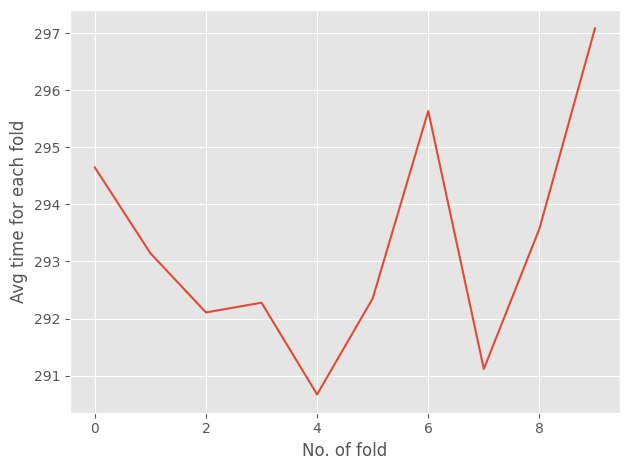

In [129]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.plot(times_cb)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("cb times")
plt.show()

In [130]:
from sklearn.metrics import accuracy_score
acc_scores_cb = []
for i in range(len(y_test_all)):
    acc_scores_cb.append(accuracy_score(y_test_all[i],scores_cb[i]))

In [131]:
acc_scores_cb

[0.6390728476821192,
 0.6589403973509934,
 0.6291390728476821,
 0.6423841059602649,
 0.6125827814569537,
 0.5993377483443708,
 0.6258278145695364,
 0.6622516556291391,
 0.5960264900662252,
 0.5927152317880795]

In [132]:
df_acc = pd.DataFrame([acc_scores_cb])

df_acc.to_csv('cb_accuracy', index=False)

df_acc = pd.read_csv('cb_accuracy')

acc_scores_cb = df_acc.iloc[0].values

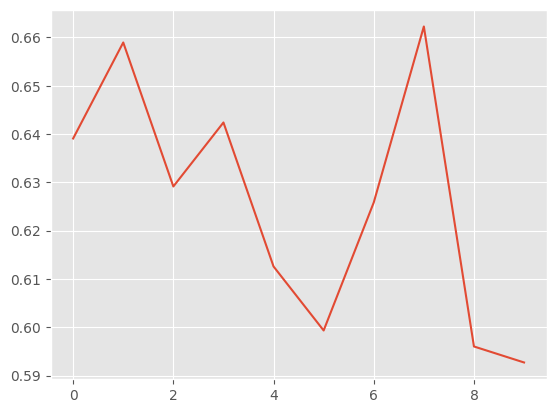

In [133]:
# import seaborn as sns
# sns.histplot(data=acc_scores,bins=20, kde=True)
import matplotlib.pyplot as plt
plt.plot(acc_scores_cb)
plt.style.use('ggplot')
plt.savefig("Catboost acc scores")
plt.show()

In [134]:
scores_cb_n = np.array(scores_cb)
y_test_all_n = np.array(y_test_all)

scores_cb_n = scores_cb_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [135]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_cb_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 62.58%


In [136]:
import gc
gc.collect()

3559

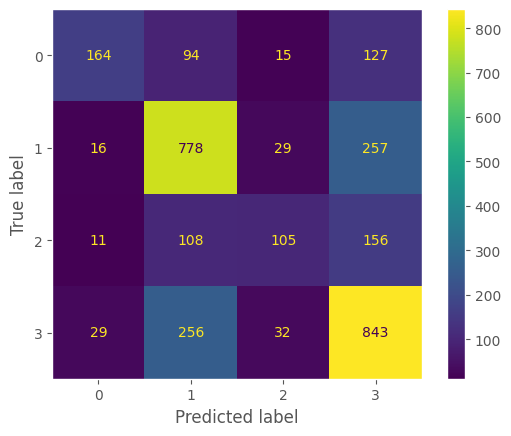

In [137]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_cb_n, labels=cb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cb.classes_)
disp.plot()
plt.grid(False)
plt.savefig("Catboost")

plt.show()

In [138]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_cb_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.75      0.41      0.53       400
           1       0.63      0.72      0.67      1080
           2       0.58      0.28      0.37       380
           3       0.61      0.73      0.66      1160

    accuracy                           0.63      3020
   macro avg       0.64      0.53      0.56      3020
weighted avg       0.63      0.63      0.61      3020



In [139]:
times_svm_n = [i/60 for i in times_svm]
times_dtc_n = [i/60 for i in times_dtc]
times_rdf_n = [i/60 for i in times_rdf]
times_knn_n = [i/60 for i in times_knn]
times_nb_n = [i/60 for i in times_nb]
times_xg_n = [i/60 for i in times_xg]
times_cb_n = [i/60 for i in times_cb]

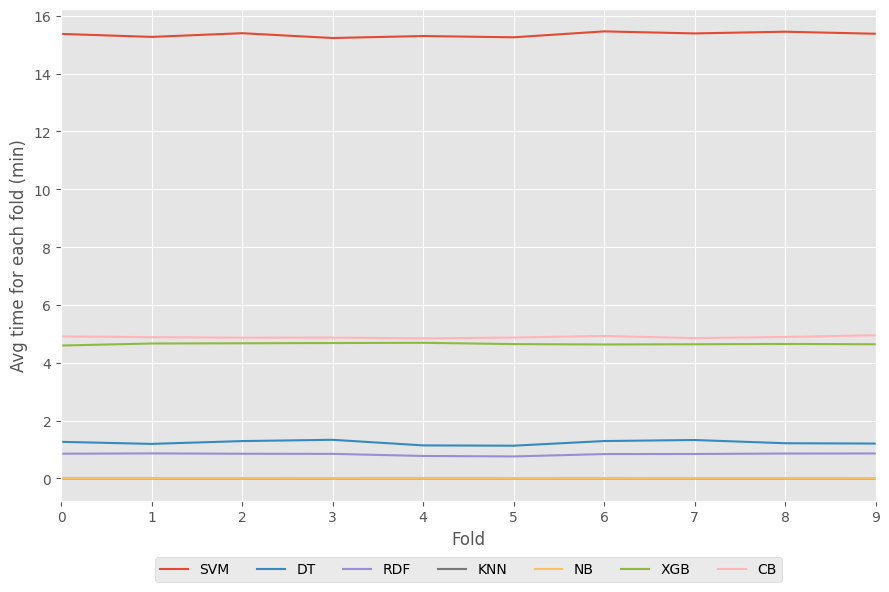

In [140]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(9,6))
plt.plot(times_svm_n,label='SVM')
plt.plot(times_dtc_n,label='DT')
plt.plot(times_rdf_n,label='RDF')
plt.plot(times_knn_n,label='KNN')
plt.plot(times_nb_n,label='NB')
plt.plot(times_xg_n,label='XGB')
plt.plot(times_cb_n,label='CB')

plt.xlabel("Fold")
plt.ylabel("Avg time for each fold (min)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=7)
plt.xlim([0,9])
plt.tight_layout()
plt.savefig("Machine Learning Melspec Times")
plt.show()

In [141]:
acc_scores_svm_n = [i*100 for i in acc_scores_svm]
acc_scores_dtc_n = [i*100 for i in acc_scores_dtc]
acc_scores_rdf_n = [i*100 for i in acc_scores_rdf]
acc_scores_knn_n = [i*100 for i in acc_scores_knn]
acc_scores_nb_n = [i*100 for i in acc_scores_nb]
acc_scores_xg_n = [i*100 for i in acc_scores_xg]
acc_scores_cb_n = [i*100 for i in acc_scores_cb]

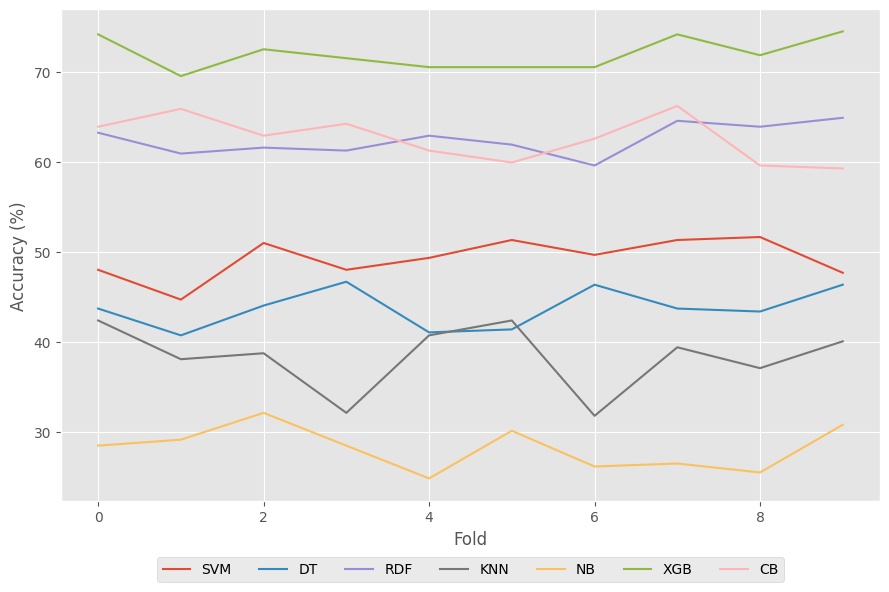

In [142]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(9,6))
plt.plot(acc_scores_svm_n,label='SVM')
plt.plot(acc_scores_dtc_n,label='DT')
plt.plot(acc_scores_rdf_n,label='RDF')
plt.plot(acc_scores_knn_n,label='KNN')
plt.plot(acc_scores_nb_n,label='NB')
plt.plot(acc_scores_xg_n,label='XGB')
plt.plot(acc_scores_cb_n,label='CB')

plt.xlabel("Fold")
plt.ylabel("Accuracy (%)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),ncol=7)
plt.tight_layout()
plt.savefig("Machine Learning Melspec Accuracy")
plt.show()

# LSTM

In [36]:
import gc
gc.collect()

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout , LSTM

In [39]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_lstm = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_lstm.append(self.times)

# early_stop = EarlyStopping(monitor='loss', patience=17, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 10, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [40]:
def create_model_lstm():
    
    model_lstm = keras.Sequential([

        keras.layers.LSTM(256,activation='tanh',input_shape=(X.shape[1],X.shape[2]),return_sequences=True),
        keras.layers.Dropout(0.25),

        keras.layers.LSTM(128,activation='tanh',return_sequences=True),
        keras.layers.Dropout(0.25),

        keras.layers.LSTM(64,activation='tanh'),
        keras.layers.Dropout(0.25),

        keras.layers.Dense(4,activation='softmax')

    ])
    
    return model_lstm

In [41]:
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_lstm = []
y_test_all_lstm = []
train_acc_lstm = []
test_acc_lstm = []
train_loss_lstm = []
test_loss_lstm = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_lstm.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_lstm = None
    model_lstm = create_model_lstm()
        
    model_lstm.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_lstm.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_lstm.predict(X_test)
    
    scores_lstm.append(x)
    train_acc_lstm.append(history.history["accuracy"])
    test_acc_lstm.append(history.history["val_accuracy"])
    train_loss_lstm.append(history.history["loss"])
    test_loss_lstm.append(history.history["val_loss"])
    
    gc.collect()

77/77 [==============================] - 4s 52ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.1474 - val_accuracy: 0.6140 - lr: 4.0000e-05
Epoch 65/100
77/77 [==============================] - 4s 54ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.1525 - val_accuracy: 0.6176 - lr: 4.0000e-05
Epoch 66/100
77/77 [==============================] - 4s 52ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.1572 - val_accuracy: 0.6176 - lr: 4.0000e-05
Epoch 67/100
77/77 [==============================] - 4s 49ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.1627 - val_accuracy: 0.6176 - lr: 4.0000e-05
Epoch 68/100
77/77 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 68: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 68: 3.93 seconds
77/77 [==============================] - 4s 51ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.1636 - val_accuracy: 0.6176 - lr: 4.0000e-05
Epoch 69/100
77

Epoch 93/100
77/77 [==============================] - 4s 51ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.1801 - val_accuracy: 0.6176 - lr: 3.2000e-07
Epoch 94/100
77/77 [==============================] - 4s 55ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.1802 - val_accuracy: 0.6176 - lr: 3.2000e-07
Epoch 95/100
77/77 [==============================] - 4s 55ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 2.1803 - val_accuracy: 0.6176 - lr: 3.2000e-07
Epoch 96/100
77/77 [==============================] - 4s 58ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.1804 - val_accuracy: 0.6176 - lr: 3.2000e-07
Epoch 97/100
77/77 [==============================] - 5s 59ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.1805 - val_accuracy: 0.6176 - lr: 3.2000e-07
Epoch 98/100
76/77 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 98: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 98: 4.

Epoch 51/100
77/77 [==============================] - 4s 58ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.8027 - val_accuracy: 0.6949 - lr: 8.0000e-06
Epoch 52/100
77/77 [==============================] - 4s 55ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.8038 - val_accuracy: 0.6949 - lr: 8.0000e-06
Epoch 53/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.8048 - val_accuracy: 0.6949 - lr: 8.0000e-06
Epoch 54/100
77/77 [==============================] - 5s 61ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.8059 - val_accuracy: 0.6949 - lr: 8.0000e-06
Epoch 55/100
77/77 [==============================] - 5s 59ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.8071 - val_accuracy: 0.6949 - lr: 8.0000e-06
Epoch 56/100
77/77 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 56: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 56: 4

Epoch 80/100
77/77 [==============================] - 4s 58ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.8120 - val_accuracy: 0.6949 - lr: 6.4000e-08
Epoch 81/100
77/77 [==============================] - 4s 55ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.8121 - val_accuracy: 0.6949 - lr: 6.4000e-08
Epoch 82/100
77/77 [==============================] - 4s 56ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.8121 - val_accuracy: 0.6949 - lr: 6.4000e-08
Epoch 83/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.8121 - val_accuracy: 0.6949 - lr: 6.4000e-08
Epoch 84/100
77/77 [==============================] - 4s 55ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.8121 - val_accuracy: 0.6949 - lr: 6.4000e-08
Epoch 85/100
77/77 [==============================] - 4s 54ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.8121 - val_accuracy: 0.6949 - lr: 6.4000e-08
Epoch 86/100
76/77 [====================

Epoch 9/100
77/77 [==============================] - 4s 53ms/step - loss: 0.2313 - accuracy: 0.9211 - val_loss: 1.4886 - val_accuracy: 0.5882 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 4s 56ms/step - loss: 0.2153 - accuracy: 0.9317 - val_loss: 1.5599 - val_accuracy: 0.5588 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - 4s 56ms/step - loss: 0.1997 - accuracy: 0.9313 - val_loss: 1.4102 - val_accuracy: 0.6066 - lr: 0.0010
Epoch 12/100
77/77 [==============================] - 4s 56ms/step - loss: 0.1393 - accuracy: 0.9583 - val_loss: 1.6609 - val_accuracy: 0.6103 - lr: 0.0010
Epoch 13/100
77/77 [==============================] - 4s 57ms/step - loss: 0.1082 - accuracy: 0.9599 - val_loss: 1.7787 - val_accuracy: 0.6029 - lr: 0.0010
Epoch 14/100
77/77 [==============================] - 4s 53ms/step - loss: 0.1283 - accuracy: 0.9599 - val_loss: 1.6526 - val_accuracy: 0.5882 - lr: 0.0010
Epoch 15/100
77/77 [==============================] - 4s 55ms/ste

Epoch 39/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0668 - accuracy: 0.9787 - val_loss: 1.6044 - val_accuracy: 0.6434 - lr: 0.0010
Epoch 40/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0618 - accuracy: 0.9783 - val_loss: 1.8989 - val_accuracy: 0.6287 - lr: 0.0010
Epoch 41/100
77/77 [==============================] - 5s 60ms/step - loss: 0.0721 - accuracy: 0.9771 - val_loss: 1.7200 - val_accuracy: 0.6324 - lr: 0.0010
Epoch 42/100
77/77 [==============================] - 4s 58ms/step - loss: 0.0719 - accuracy: 0.9771 - val_loss: 1.7225 - val_accuracy: 0.6140 - lr: 0.0010
Epoch 43/100
77/77 [==============================] - 4s 53ms/step - loss: 0.0528 - accuracy: 0.9828 - val_loss: 1.8982 - val_accuracy: 0.6140 - lr: 0.0010
Epoch 44/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0385 - accuracy: 0.9902 - val_loss: 1.9703 - val_accuracy: 0.5993 - lr: 0.0010
Epoch 45/100
77/77 [==============================] - 4s 56ms/st

Epoch 68/100
77/77 [==============================] - 4s 56ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 2.1307 - val_accuracy: 0.6397 - lr: 8.0000e-06
Epoch 69/100
77/77 [==============================] - 4s 53ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 2.1329 - val_accuracy: 0.6397 - lr: 8.0000e-06
Epoch 70/100
77/77 [==============================] - 4s 54ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 2.1343 - val_accuracy: 0.6434 - lr: 8.0000e-06
Epoch 71/100
77/77 [==============================] - 4s 54ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 2.1335 - val_accuracy: 0.6434 - lr: 8.0000e-06
Epoch 72/100
77/77 [==============================] - 4s 53ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 2.1366 - val_accuracy: 0.6434 - lr: 8.0000e-06
Epoch 73/100
77/77 [==============================] - 4s 52ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 2.1382 - val_accuracy: 0.6434 - lr: 8.0000e-06
Epoch 74/100
77/77 [====================

Epoch 97/100
77/77 [==============================] - 5s 58ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.1430 - val_accuracy: 0.6434 - lr: 6.4000e-08
Epoch 98/100
77/77 [==============================] - 4s 56ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.1429 - val_accuracy: 0.6434 - lr: 6.4000e-08
Epoch 99/100
77/77 [==============================] - 4s 53ms/step - loss: 9.8335e-04 - accuracy: 1.0000 - val_loss: 2.1429 - val_accuracy: 0.6434 - lr: 6.4000e-08
Epoch 100/100
10/10 [==============================] - 1s 26ms/step
Training on fold 7/10...
Epoch 1/100
77/77 [==============================] - 7s 64ms/step - loss: 1.2194 - accuracy: 0.4509 - val_loss: 1.1413 - val_accuracy: 0.5184 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 55ms/step - loss: 1.0479 - accuracy: 0.5609 - val_loss: 1.1057 - val_accuracy: 0.5147 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 4s 55ms/step - loss: 0.8431 - accuracy: 0.6680 - val_loss: 1

Time taken for epoch 26: 4.24 seconds
77/77 [==============================] - 4s 55ms/step - loss: 0.0665 - accuracy: 0.9779 - val_loss: 1.6431 - val_accuracy: 0.6581 - lr: 0.0010
Epoch 27/100
77/77 [==============================] - 4s 54ms/step - loss: 0.0423 - accuracy: 0.9857 - val_loss: 1.6078 - val_accuracy: 0.6544 - lr: 2.0000e-04
Epoch 28/100
77/77 [==============================] - 5s 60ms/step - loss: 0.0145 - accuracy: 0.9975 - val_loss: 1.6476 - val_accuracy: 0.6581 - lr: 2.0000e-04
Epoch 29/100
77/77 [==============================] - 4s 58ms/step - loss: 0.0082 - accuracy: 0.9992 - val_loss: 1.6516 - val_accuracy: 0.6544 - lr: 2.0000e-04
Epoch 30/100
77/77 [==============================] - 5s 59ms/step - loss: 0.0073 - accuracy: 0.9988 - val_loss: 1.6786 - val_accuracy: 0.6544 - lr: 2.0000e-04
Epoch 31/100
77/77 [==============================] - 4s 53ms/step - loss: 0.0052 - accuracy: 0.9996 - val_loss: 1.7020 - val_accuracy: 0.6544 - lr: 2.0000e-04
Epoch 32/100
77/77 

Epoch 84/100
77/77 [==============================] - 4s 55ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.8676 - val_accuracy: 0.6581 - lr: 6.4000e-08
Epoch 85/100
77/77 [==============================] - 4s 58ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.8676 - val_accuracy: 0.6581 - lr: 6.4000e-08
Epoch 86/100
76/77 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 86: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 86: 4.19 seconds
77/77 [==============================] - 4s 54ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.8676 - val_accuracy: 0.6581 - lr: 6.4000e-08
Epoch 87/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.8677 - val_accuracy: 0.6581 - lr: 1.2800e-08
Epoch 88/100
77/77 [==============================] - 4s 53ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.8677 - val_accuracy: 0.6581 - lr: 1.2800e-08
E

Epoch 13/100
77/77 [==============================] - 5s 61ms/step - loss: 0.1903 - accuracy: 0.9358 - val_loss: 1.3491 - val_accuracy: 0.6581 - lr: 0.0010
Epoch 14/100
77/77 [==============================] - 4s 55ms/step - loss: 0.1682 - accuracy: 0.9415 - val_loss: 1.3503 - val_accuracy: 0.6397 - lr: 0.0010
Epoch 15/100
77/77 [==============================] - 4s 55ms/step - loss: 0.1848 - accuracy: 0.9321 - val_loss: 1.5047 - val_accuracy: 0.6324 - lr: 0.0010
Epoch 16/100
77/77 [==============================] - 4s 56ms/step - loss: 0.1671 - accuracy: 0.9452 - val_loss: 1.3698 - val_accuracy: 0.6434 - lr: 0.0010
Epoch 17/100
77/77 [==============================] - 5s 59ms/step - loss: 0.1324 - accuracy: 0.9563 - val_loss: 1.4896 - val_accuracy: 0.6287 - lr: 0.0010
Epoch 18/100
77/77 [==============================] - 4s 56ms/step - loss: 0.3147 - accuracy: 0.8904 - val_loss: 1.4559 - val_accuracy: 0.5919 - lr: 0.0010
Epoch 19/100
77/77 [==============================] - 4s 58ms/st

77/77 [==============================] - 5s 60ms/step - loss: 9.0595e-04 - accuracy: 1.0000 - val_loss: 1.9428 - val_accuracy: 0.6949 - lr: 1.6000e-06
Epoch 71/100
77/77 [==============================] - 5s 62ms/step - loss: 8.8147e-04 - accuracy: 1.0000 - val_loss: 1.9430 - val_accuracy: 0.6949 - lr: 1.6000e-06
Epoch 72/100
77/77 [==============================] - 4s 58ms/step - loss: 8.6934e-04 - accuracy: 1.0000 - val_loss: 1.9432 - val_accuracy: 0.6949 - lr: 1.6000e-06
Epoch 73/100
77/77 [==============================] - 5s 60ms/step - loss: 8.6238e-04 - accuracy: 1.0000 - val_loss: 1.9434 - val_accuracy: 0.6949 - lr: 1.6000e-06
Epoch 74/100
77/77 [==============================] - 4s 57ms/step - loss: 8.5502e-04 - accuracy: 1.0000 - val_loss: 1.9436 - val_accuracy: 0.6949 - lr: 1.6000e-06
Epoch 75/100
77/77 [==============================] - 5s 63ms/step - loss: 9.2435e-04 - accuracy: 1.0000 - val_loss: 1.9439 - val_accuracy: 0.6949 - lr: 1.6000e-06
Epoch 76/100
77/77 [=========

Epoch 98/100
77/77 [==============================] - 5s 60ms/step - loss: 8.8025e-04 - accuracy: 1.0000 - val_loss: 1.9460 - val_accuracy: 0.6949 - lr: 6.4000e-08
Epoch 99/100
76/77 [============================>.] - ETA: 0s - loss: 9.6173e-04 - accuracy: 1.0000
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 99: 4.40 seconds
77/77 [==============================] - 4s 57ms/step - loss: 9.6037e-04 - accuracy: 1.0000 - val_loss: 1.9460 - val_accuracy: 0.6949 - lr: 6.4000e-08
Epoch 100/100
10/10 [==============================] - 1s 24ms/step
Training on fold 9/10...
Epoch 1/100
77/77 [==============================] - 7s 67ms/step - loss: 1.2122 - accuracy: 0.4612 - val_loss: 1.1890 - val_accuracy: 0.4596 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 56ms/step - loss: 1.0092 - accuracy: 0.5891 - val_loss: 1.1726 - val_accuracy: 0.4853 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 4s 57ms/step 

77/77 [==============================] - 4s 56ms/step - loss: 0.0397 - accuracy: 0.9873 - val_loss: 1.8667 - val_accuracy: 0.6140 - lr: 0.0010
Epoch 28/100
77/77 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9861
Epoch 28: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 28: 4.24 seconds
77/77 [==============================] - 4s 55ms/step - loss: 0.0445 - accuracy: 0.9861 - val_loss: 1.7896 - val_accuracy: 0.6324 - lr: 0.0010
Epoch 29/100
77/77 [==============================] - 4s 58ms/step - loss: 0.0282 - accuracy: 0.9918 - val_loss: 1.8012 - val_accuracy: 0.6324 - lr: 2.0000e-04
Epoch 30/100
77/77 [==============================] - 4s 55ms/step - loss: 0.0065 - accuracy: 0.9992 - val_loss: 1.8240 - val_accuracy: 0.6471 - lr: 2.0000e-04
Epoch 31/100
77/77 [==============================] - 4s 55ms/step - loss: 0.0042 - accuracy: 0.9996 - val_loss: 1.8521 - val_accuracy: 0.6507 - lr: 2.0000e-04
Epoch 32/100
77/77 [==

Epoch 56/100
77/77 [==============================] - 5s 63ms/step - loss: 9.6946e-04 - accuracy: 1.0000 - val_loss: 2.0450 - val_accuracy: 0.6544 - lr: 8.0000e-06
Epoch 57/100
77/77 [==============================] - 4s 55ms/step - loss: 9.7878e-04 - accuracy: 1.0000 - val_loss: 2.0461 - val_accuracy: 0.6544 - lr: 8.0000e-06
Epoch 58/100
76/77 [============================>.] - ETA: 0s - loss: 9.7767e-04 - accuracy: 1.0000
Epoch 58: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 58: 4.67 seconds
77/77 [==============================] - 5s 61ms/step - loss: 9.8867e-04 - accuracy: 1.0000 - val_loss: 2.0473 - val_accuracy: 0.6544 - lr: 8.0000e-06
Epoch 59/100
77/77 [==============================] - 5s 60ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.0475 - val_accuracy: 0.6544 - lr: 1.6000e-06
Epoch 60/100
77/77 [==============================] - 4s 58ms/step - loss: 9.4863e-04 - accuracy: 1.0000 - val_loss: 2.0478 - val_accuracy: 0.654

Epoch 84/100
77/77 [==============================] - 4s 57ms/step - loss: 9.6169e-04 - accuracy: 1.0000 - val_loss: 2.0512 - val_accuracy: 0.6581 - lr: 6.4000e-08
Epoch 85/100
77/77 [==============================] - 4s 55ms/step - loss: 9.4364e-04 - accuracy: 1.0000 - val_loss: 2.0512 - val_accuracy: 0.6581 - lr: 6.4000e-08
Epoch 86/100
77/77 [==============================] - 4s 54ms/step - loss: 8.9249e-04 - accuracy: 1.0000 - val_loss: 2.0512 - val_accuracy: 0.6581 - lr: 6.4000e-08
Epoch 87/100
77/77 [==============================] - 4s 56ms/step - loss: 9.4067e-04 - accuracy: 1.0000 - val_loss: 2.0513 - val_accuracy: 0.6581 - lr: 6.4000e-08
Epoch 88/100
76/77 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9996  
Epoch 88: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 88: 4.07 seconds
77/77 [==============================] - 4s 53ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 2.0513 - val_accuracy: 0.6581 

Epoch 41/100
77/77 [==============================] - 4s 55ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.9607 - val_accuracy: 0.6691 - lr: 8.0000e-06
Epoch 42/100
77/77 [==============================] - 4s 58ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.9618 - val_accuracy: 0.6691 - lr: 8.0000e-06
Epoch 43/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.9630 - val_accuracy: 0.6691 - lr: 8.0000e-06
Epoch 44/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.9647 - val_accuracy: 0.6691 - lr: 8.0000e-06
Epoch 45/100
77/77 [==============================] - 4s 56ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.9659 - val_accuracy: 0.6691 - lr: 8.0000e-06
Epoch 46/100
77/77 [==============================] - 4s 56ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.9677 - val_accuracy: 0.6691 - lr: 8.0000e-06
Epoch 47/100
77/77 [====================

Epoch 70/100
77/77 [==============================] - 4s 54ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.9763 - val_accuracy: 0.6728 - lr: 6.4000e-08
Epoch 71/100
77/77 [==============================] - 4s 54ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.9763 - val_accuracy: 0.6728 - lr: 6.4000e-08
Epoch 72/100
77/77 [==============================] - 4s 55ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.9764 - val_accuracy: 0.6728 - lr: 6.4000e-08
Epoch 73/100
77/77 [==============================] - 4s 55ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.9764 - val_accuracy: 0.6728 - lr: 6.4000e-08
Epoch 74/100
77/77 [==============================] - 4s 53ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.9764 - val_accuracy: 0.6728 - lr: 6.4000e-08
Epoch 75/100
77/77 [==============================] - 4s 53ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.9765 - val_accuracy: 0.6728 - lr: 6.4000e-08
Epoch 76/100
77/77 [====================

Epoch 99/100
77/77 [==============================] - 4s 58ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.9766 - val_accuracy: 0.6728 - lr: 5.1200e-10
Epoch 100/100
10/10 [==============================] - 1s 24ms/step


In [42]:
import gc
gc.collect()

0

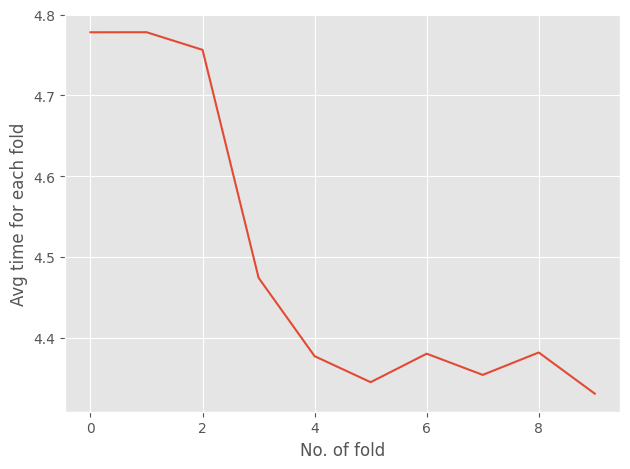

In [43]:
import matplotlib.pyplot as plt

times_lstm_n = np.zeros((10,100))
for i, row in enumerate(times_lstm):
    times_lstm_n[i, :len(row)] = row

times_lstm_n_n = np.mean(times_lstm_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_lstm_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("lstm times")
plt.show()

In [44]:
train_acc_lstm_n = np.zeros((10,100))
for i, row in enumerate(train_acc_lstm):
    train_acc_lstm_n[i, :len(row)] = row
    
test_acc_lstm_n = np.zeros((10,100))
for i, row in enumerate(test_acc_lstm):
    test_acc_lstm_n[i, :len(row)] = row
    
train_loss_lstm_n = np.zeros((10,100))
for i, row in enumerate(train_loss_lstm):
    train_loss_lstm_n[i, :len(row)] = row
    
test_loss_lstm_n = np.zeros((10,100))
for i, row in enumerate(test_loss_lstm):
    test_loss_lstm_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_lstm_n = np.mean(train_acc_lstm_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_lstm_n = np.mean(test_acc_lstm_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_lstm_n = np.mean(train_loss_lstm_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_lstm_n = np.mean(test_loss_lstm_n,axis=0)

In [45]:
data = [train_acc_lstm_n,test_acc_lstm_n,train_loss_lstm_n,test_loss_lstm_n]

df = pd.DataFrame(data)
df.to_csv('lstm_acc', index=False)
df = pd.read_csv('lstm_acc')

train_acc_lstm_n = df.iloc[0]
test_acc_lstm_n = df.iloc[1]
train_loss_lstm_n = df.iloc[2]
test_loss_lstm_n = df.iloc[3]


df_t = pd.DataFrame([times_lstm_n_n])
df_t.to_csv('lstm_times', index=False)
df_t = pd.read_csv('lstm_times')

times_lstm_n_n = df_t.iloc[0]

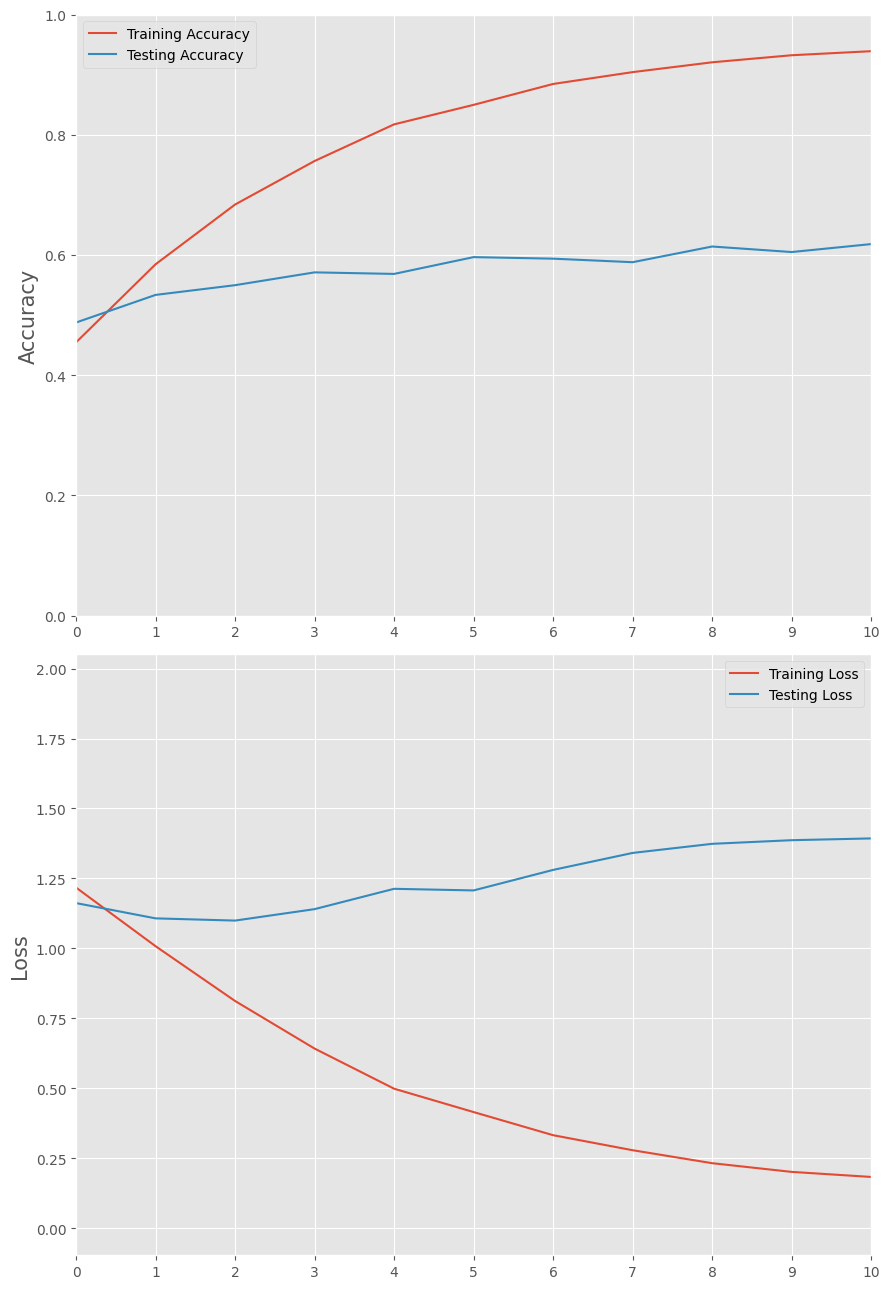

In [46]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_lstm_n, label='Training Accuracy')
axs[0].plot(test_acc_lstm_n, label='Testing Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_lstm_n, label='Training Loss')
axs[1].plot(test_loss_lstm_n, label='Testing Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("LSTM Training and Testing Loss")
plt.show()

In [47]:
np.array(scores_lstm).shape

(10, 302, 4)

In [48]:
np.array(y_test_all_lstm).shape

(10, 302)

In [49]:
y_pred_lstm = np.argmax(scores_lstm,axis=2)

In [50]:
y_pred_lstm.shape

(10, 302)

In [51]:
from sklearn.metrics import accuracy_score
acc_scores_lstm = []
for i in range(len(y_test_all_lstm)):
    acc_scores_lstm.append(accuracy_score(y_true = y_test_all_lstm[i],y_pred = y_pred_lstm[i]))

In [52]:
acc_scores_lstm

[0.6854304635761589,
 0.6556291390728477,
 0.6887417218543046,
 0.6490066225165563,
 0.6589403973509934,
 0.6887417218543046,
 0.652317880794702,
 0.6556291390728477,
 0.7052980132450332,
 0.6490066225165563]

In [53]:
df_acc = pd.DataFrame([acc_scores_lstm])

df_acc.to_csv('lstm_accuracy', index=False)

df_acc = pd.read_csv('lstm_accuracy')

acc_scores_lstm = df_acc.iloc[0].values

In [54]:
y_test_all_n = np.array(y_test_all_lstm)

y_pred_lstm_n = y_pred_lstm.flatten()
y_test_all_n = y_test_all_n.flatten()

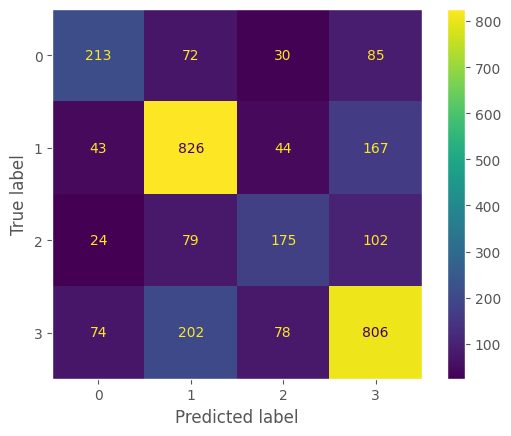

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n,y_pred_lstm_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("LSTM")

plt.show()

In [56]:
import gc
gc.collect()

29794

In [57]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n,y_pred_lstm_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.60      0.53      0.56       400
           1       0.70      0.76      0.73      1080
           2       0.54      0.46      0.50       380
           3       0.69      0.69      0.69      1160

    accuracy                           0.67      3020
   macro avg       0.63      0.61      0.62      3020
weighted avg       0.66      0.67      0.67      3020



# BISLTM

In [58]:
import gc
gc.collect()

0

In [59]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_bilstm = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_bilstm.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 5, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [60]:
from keras.layers import LSTM

In [61]:
def create_model_bilstm():
    
    model_bilstm = keras.Sequential([

        keras.layers.Bidirectional(LSTM(100,return_sequences=True),input_shape=(X.shape[1],X.shape[2])),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(LSTM(100,return_sequences=True)),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(LSTM(100)),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(4,activation='softmax')

    ])
    
    return model_bilstm

In [62]:
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_bilstm = []
y_test_all_bilstm = []
train_acc_bilstm = []
test_acc_bilstm = []
train_loss_bilstm = []
test_loss_bilstm = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_bilstm.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_bilstm = None
    model_bilstm = create_model_bilstm()
        
    model_bilstm.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_bilstm.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=64, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_bilstm.predict(X_test)
    
    scores_bilstm.append(x)
    train_acc_bilstm.append(history.history["accuracy"])
    test_acc_bilstm.append(history.history["val_accuracy"])
    train_loss_bilstm.append(history.history["loss"])
    test_loss_bilstm.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
39/39 [==============================] - 9s 148ms/step - loss: 1.2255 - accuracy: 0.4526 - val_loss: 1.1824 - val_accuracy: 0.5221 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 5s 118ms/step - loss: 0.9942 - accuracy: 0.5904 - val_loss: 1.0970 - val_accuracy: 0.5772 - lr: 0.0010
Epoch 3/100
39/39 [==============================] - 5s 120ms/step - loss: 0.7366 - accuracy: 0.7048 - val_loss: 0.9457 - val_accuracy: 0.6176 - lr: 0.0010
Epoch 4/100
39/39 [==============================] - 5s 126ms/step - loss: 0.5110 - accuracy: 0.8160 - val_loss: 0.9538 - val_accuracy: 0.6140 - lr: 0.0010
Epoch 5/100
39/39 [==============================] - 5s 120ms/step - loss: 0.3758 - accuracy: 0.8585 - val_loss: 0.9185 - val_accuracy: 0.6838 - lr: 0.0010
Epoch 6/100
39/39 [==============================] - 5s 117ms/step - loss: 0.2584 - accuracy: 0.9080 - val_loss: 1.0480 - val_accuracy: 0.6360 - lr: 0.0010
Epoch 7/100
39/39 [====================

Epoch 30/100
39/39 [==============================] - 5s 130ms/step - loss: 0.0094 - accuracy: 0.9988 - val_loss: 1.1697 - val_accuracy: 0.7390 - lr: 4.0000e-05
Epoch 31/100
39/39 [==============================] - 5s 132ms/step - loss: 0.0075 - accuracy: 0.9984 - val_loss: 1.1722 - val_accuracy: 0.7426 - lr: 4.0000e-05
Epoch 32/100
39/39 [==============================] - 4s 110ms/step - loss: 0.0062 - accuracy: 0.9996 - val_loss: 1.1713 - val_accuracy: 0.7500 - lr: 4.0000e-05
Epoch 33/100
39/39 [==============================] - ETA: 0s - loss: 0.0074 - accuracy: 0.9992
Epoch 33: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 33: 4.89 seconds
39/39 [==============================] - 5s 126ms/step - loss: 0.0074 - accuracy: 0.9992 - val_loss: 1.1688 - val_accuracy: 0.7426 - lr: 4.0000e-05
Epoch 34/100
39/39 [==============================] - 5s 125ms/step - loss: 0.0071 - accuracy: 0.9996 - val_loss: 1.1695 - val_accuracy: 0.7426 - lr: 8.0000e-

Epoch 58/100
39/39 [==============================] - ETA: 0s - loss: 0.0073 - accuracy: 0.9992
Epoch 58: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 58: 4.63 seconds
39/39 [==============================] - 5s 119ms/step - loss: 0.0073 - accuracy: 0.9992 - val_loss: 1.1695 - val_accuracy: 0.7463 - lr: 1.2800e-08
Epoch 59/100
39/39 [==============================] - 4s 111ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.1695 - val_accuracy: 0.7463 - lr: 2.5600e-09
Epoch 60/100
39/39 [==============================] - 5s 118ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 1.1695 - val_accuracy: 0.7463 - lr: 2.5600e-09
Epoch 61/100
39/39 [==============================] - 5s 125ms/step - loss: 0.0061 - accuracy: 0.9996 - val_loss: 1.1695 - val_accuracy: 0.7463 - lr: 2.5600e-09
Epoch 62/100
39/39 [==============================] - 5s 120ms/step - loss: 0.0061 - accuracy: 0.9996 - val_loss: 1.1695 - val_accuracy: 0.7463 - lr: 2.5600e

Epoch 86/100
39/39 [==============================] - 5s 117ms/step - loss: 0.0076 - accuracy: 0.9988 - val_loss: 1.1695 - val_accuracy: 0.7463 - lr: 8.1920e-13
Epoch 87/100
39/39 [==============================] - 5s 126ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 1.1695 - val_accuracy: 0.7463 - lr: 8.1920e-13
Epoch 88/100
39/39 [==============================] - ETA: 0s - loss: 0.0062 - accuracy: 0.9996
Epoch 88: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 88: 5.07 seconds
39/39 [==============================] - 5s 131ms/step - loss: 0.0062 - accuracy: 0.9996 - val_loss: 1.1695 - val_accuracy: 0.7463 - lr: 8.1920e-13
Epoch 89/100
39/39 [==============================] - 5s 128ms/step - loss: 0.0062 - accuracy: 0.9996 - val_loss: 1.1695 - val_accuracy: 0.7463 - lr: 1.6384e-13
Epoch 90/100
39/39 [==============================] - 5s 116ms/step - loss: 0.0071 - accuracy: 0.9992 - val_loss: 1.1695 - val_accuracy: 0.7463 - lr: 1.6384e

Epoch 43/100
39/39 [==============================] - ETA: 0s - loss: 0.0050 - accuracy: 0.9996
Epoch 43: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 43: 4.94 seconds
39/39 [==============================] - 5s 127ms/step - loss: 0.0050 - accuracy: 0.9996 - val_loss: 1.0497 - val_accuracy: 0.7831 - lr: 8.0000e-06
Epoch 44/100
39/39 [==============================] - 5s 131ms/step - loss: 0.0055 - accuracy: 0.9996 - val_loss: 1.0498 - val_accuracy: 0.7831 - lr: 1.6000e-06
Epoch 45/100
39/39 [==============================] - 5s 120ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 1.0497 - val_accuracy: 0.7831 - lr: 1.6000e-06
Epoch 46/100
39/39 [==============================] - 5s 131ms/step - loss: 0.0053 - accuracy: 0.9996 - val_loss: 1.0499 - val_accuracy: 0.7831 - lr: 1.6000e-06
Epoch 47/100
39/39 [==============================] - 5s 125ms/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 1.0498 - val_accuracy: 0.7831 - lr: 1.6000e

Epoch 71/100
39/39 [==============================] - 5s 123ms/step - loss: 0.0045 - accuracy: 0.9996 - val_loss: 1.0499 - val_accuracy: 0.7831 - lr: 5.1200e-10
Epoch 72/100
39/39 [==============================] - 5s 117ms/step - loss: 0.0056 - accuracy: 0.9996 - val_loss: 1.0499 - val_accuracy: 0.7831 - lr: 5.1200e-10
Epoch 73/100
39/39 [==============================] - ETA: 0s - loss: 0.0048 - accuracy: 1.0000
Epoch 73: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 73: 4.70 seconds
39/39 [==============================] - 5s 121ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.0499 - val_accuracy: 0.7831 - lr: 5.1200e-10
Epoch 74/100
39/39 [==============================] - 5s 139ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 1.0499 - val_accuracy: 0.7831 - lr: 1.0240e-10
Epoch 75/100
39/39 [==============================] - 5s 120ms/step - loss: 0.0053 - accuracy: 0.9996 - val_loss: 1.0499 - val_accuracy: 0.7831 - lr: 1.0240e

Epoch 99/100
39/39 [==============================] - 4s 110ms/step - loss: 0.0045 - accuracy: 0.9996 - val_loss: 1.0499 - val_accuracy: 0.7831 - lr: 3.2768e-14
Epoch 100/100
10/10 [==============================] - 1s 37ms/step
Training on fold 3/10...
Epoch 1/100
39/39 [==============================] - 10s 146ms/step - loss: 1.2323 - accuracy: 0.4501 - val_loss: 1.1089 - val_accuracy: 0.5588 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 5s 124ms/step - loss: 1.0000 - accuracy: 0.5875 - val_loss: 0.9866 - val_accuracy: 0.5882 - lr: 0.0010
Epoch 3/100
39/39 [==============================] - 4s 111ms/step - loss: 0.7342 - accuracy: 0.7118 - val_loss: 1.0091 - val_accuracy: 0.6176 - lr: 0.0010
Epoch 4/100
39/39 [==============================] - 5s 121ms/step - loss: 0.5211 - accuracy: 0.8029 - val_loss: 0.9010 - val_accuracy: 0.6618 - lr: 0.0010
Epoch 5/100
39/39 [==============================] - 5s 126ms/step - loss: 0.3627 - accuracy: 0.8684 - val_loss: 0.9368 -

Epoch 28/100
39/39 [==============================] - ETA: 0s - loss: 0.0070 - accuracy: 0.9988
Epoch 28: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 28: 4.56 seconds
39/39 [==============================] - 5s 118ms/step - loss: 0.0070 - accuracy: 0.9988 - val_loss: 1.0784 - val_accuracy: 0.7574 - lr: 4.0000e-05
Epoch 29/100
39/39 [==============================] - 5s 127ms/step - loss: 0.0057 - accuracy: 0.9996 - val_loss: 1.0788 - val_accuracy: 0.7574 - lr: 8.0000e-06
Epoch 30/100
39/39 [==============================] - 4s 110ms/step - loss: 0.0067 - accuracy: 0.9992 - val_loss: 1.0803 - val_accuracy: 0.7574 - lr: 8.0000e-06
Epoch 31/100
39/39 [==============================] - 5s 118ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 1.0804 - val_accuracy: 0.7574 - lr: 8.0000e-06
Epoch 32/100
39/39 [==============================] - 5s 130ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 1.0807 - val_accuracy: 0.7574 - lr: 8.0000e-

Epoch 56/100
39/39 [==============================] - 5s 128ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 1.0820 - val_accuracy: 0.7574 - lr: 2.5600e-09
Epoch 57/100
39/39 [==============================] - 5s 116ms/step - loss: 0.0054 - accuracy: 0.9996 - val_loss: 1.0820 - val_accuracy: 0.7574 - lr: 2.5600e-09
Epoch 58/100
39/39 [==============================] - ETA: 0s - loss: 0.0080 - accuracy: 0.9988
Epoch 58: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 58: 5.14 seconds
39/39 [==============================] - 5s 132ms/step - loss: 0.0080 - accuracy: 0.9988 - val_loss: 1.0820 - val_accuracy: 0.7574 - lr: 2.5600e-09
Epoch 59/100
39/39 [==============================] - 5s 129ms/step - loss: 0.0064 - accuracy: 0.9992 - val_loss: 1.0820 - val_accuracy: 0.7574 - lr: 5.1200e-10
Epoch 60/100
39/39 [==============================] - 5s 118ms/step - loss: 0.0051 - accuracy: 0.9996 - val_loss: 1.0820 - val_accuracy: 0.7574 - lr: 5.1200e-10

Epoch 84/100
39/39 [==============================] - 4s 113ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 1.0820 - val_accuracy: 0.7574 - lr: 1.6384e-13
Epoch 85/100
39/39 [==============================] - 5s 121ms/step - loss: 0.0068 - accuracy: 0.9992 - val_loss: 1.0820 - val_accuracy: 0.7574 - lr: 1.6384e-13
Epoch 86/100
39/39 [==============================] - 5s 130ms/step - loss: 0.0062 - accuracy: 0.9988 - val_loss: 1.0820 - val_accuracy: 0.7574 - lr: 1.6384e-13
Epoch 87/100
39/39 [==============================] - 5s 134ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 1.0820 - val_accuracy: 0.7574 - lr: 1.6384e-13
Epoch 88/100
39/39 [==============================] - ETA: 0s - loss: 0.0068 - accuracy: 0.9992
Epoch 88: ReduceLROnPlateau reducing learning rate to 3.2768002178849846e-14.
Time taken for epoch 88: 4.85 seconds
39/39 [==============================] - 5s 125ms/step - loss: 0.0068 - accuracy: 0.9992 - val_loss: 1.0820 - val_accuracy: 0.7574 - lr: 1.6384e

Epoch 41/100
39/39 [==============================] - 5s 120ms/step - loss: 0.0038 - accuracy: 0.9996 - val_loss: 1.1104 - val_accuracy: 0.7243 - lr: 8.0000e-06
Epoch 42/100
39/39 [==============================] - 5s 116ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.1075 - val_accuracy: 0.7243 - lr: 8.0000e-06
Epoch 43/100
39/39 [==============================] - 5s 123ms/step - loss: 0.0026 - accuracy: 0.9996 - val_loss: 1.1073 - val_accuracy: 0.7243 - lr: 8.0000e-06
Epoch 44/100
39/39 [==============================] - 5s 118ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 1.1079 - val_accuracy: 0.7243 - lr: 8.0000e-06
Epoch 45/100
39/39 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 0.9996
Epoch 45: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 45: 4.56 seconds
39/39 [==============================] - 5s 118ms/step - loss: 0.0030 - accuracy: 0.9996 - val_loss: 1.1087 - val_accuracy: 0.7206 - lr: 8.0000e

Epoch 69/100
39/39 [==============================] - 4s 115ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.1056 - val_accuracy: 0.7206 - lr: 2.5600e-09
Epoch 70/100
39/39 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000
Epoch 70: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 70: 4.65 seconds
39/39 [==============================] - 5s 120ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.1056 - val_accuracy: 0.7206 - lr: 2.5600e-09
Epoch 71/100
39/39 [==============================] - 5s 123ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.1056 - val_accuracy: 0.7206 - lr: 5.1200e-10
Epoch 72/100
39/39 [==============================] - 5s 131ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.1056 - val_accuracy: 0.7206 - lr: 5.1200e-10
Epoch 73/100
39/39 [==============================] - 5s 119ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.1056 - val_accuracy: 0.7206 - lr: 5.1200e-10

Epoch 97/100
39/39 [==============================] - 5s 133ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.1056 - val_accuracy: 0.7206 - lr: 1.6384e-13
Epoch 98/100
39/39 [==============================] - 5s 128ms/step - loss: 0.0032 - accuracy: 0.9996 - val_loss: 1.1056 - val_accuracy: 0.7206 - lr: 1.6384e-13
Epoch 99/100
39/39 [==============================] - 5s 116ms/step - loss: 0.0043 - accuracy: 0.9992 - val_loss: 1.1056 - val_accuracy: 0.7206 - lr: 1.6384e-13
Epoch 100/100
39/39 [==============================] - ETA: 0s - loss: 0.0027 - accuracy: 1.0000
Epoch 100: ReduceLROnPlateau reducing learning rate to 3.2768002178849846e-14.
Time taken for epoch 100: 5.15 seconds
10/10 [==============================] - 1s 39ms/step
Training on fold 5/10...
Epoch 1/100
39/39 [==============================] - 10s 160ms/step - loss: 1.2345 - accuracy: 0.4346 - val_loss: 1.1611 - val_accuracy: 0.4632 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 5s 128ms/step

Epoch 26/100
39/39 [==============================] - 5s 125ms/step - loss: 0.0061 - accuracy: 0.9996 - val_loss: 1.0778 - val_accuracy: 0.7574 - lr: 2.0000e-04
Epoch 27/100
39/39 [==============================] - 5s 120ms/step - loss: 0.0052 - accuracy: 0.9996 - val_loss: 1.1151 - val_accuracy: 0.7537 - lr: 2.0000e-04
Epoch 28/100
39/39 [==============================] - 4s 112ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.1315 - val_accuracy: 0.7426 - lr: 2.0000e-04
Epoch 29/100
39/39 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 0.9996
Epoch 29: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 29: 4.94 seconds
39/39 [==============================] - 5s 128ms/step - loss: 0.0045 - accuracy: 0.9996 - val_loss: 1.1259 - val_accuracy: 0.7390 - lr: 2.0000e-04
Epoch 30/100
39/39 [==============================] - 5s 121ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 1.1230 - val_accuracy: 0.7390 - lr: 4.0000e

Epoch 54/100
39/39 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 0.9992
Epoch 54: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 54: 4.82 seconds
39/39 [==============================] - 5s 123ms/step - loss: 0.0043 - accuracy: 0.9992 - val_loss: 1.1077 - val_accuracy: 0.7574 - lr: 6.4000e-08
Epoch 55/100
39/39 [==============================] - 4s 115ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.1077 - val_accuracy: 0.7574 - lr: 1.2800e-08
Epoch 56/100
39/39 [==============================] - 5s 125ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.1077 - val_accuracy: 0.7574 - lr: 1.2800e-08
Epoch 57/100
39/39 [==============================] - 5s 121ms/step - loss: 0.0034 - accuracy: 0.9996 - val_loss: 1.1077 - val_accuracy: 0.7574 - lr: 1.2800e-08
Epoch 58/100
39/39 [==============================] - 5s 129ms/step - loss: 0.0037 - accuracy: 0.9996 - val_loss: 1.1077 - val_accuracy: 0.7574 - lr: 1.2800e

Epoch 82/100
39/39 [==============================] - 5s 135ms/step - loss: 0.0037 - accuracy: 0.9996 - val_loss: 1.1077 - val_accuracy: 0.7574 - lr: 4.0960e-12
Epoch 83/100
39/39 [==============================] - 5s 124ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.1077 - val_accuracy: 0.7574 - lr: 4.0960e-12
Epoch 84/100
39/39 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 1.0000
Epoch 84: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 84: 4.56 seconds
39/39 [==============================] - 5s 117ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.1077 - val_accuracy: 0.7574 - lr: 4.0960e-12
Epoch 85/100
39/39 [==============================] - 5s 124ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 1.1077 - val_accuracy: 0.7574 - lr: 8.1920e-13
Epoch 86/100
39/39 [==============================] - 5s 132ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.1077 - val_accuracy: 0.7574 - lr: 8.1920e-

Epoch 10/100
39/39 [==============================] - 5s 139ms/step - loss: 0.1537 - accuracy: 0.9497 - val_loss: 1.2064 - val_accuracy: 0.6581 - lr: 0.0010
Epoch 11/100
39/39 [==============================] - 5s 130ms/step - loss: 0.1253 - accuracy: 0.9587 - val_loss: 1.2043 - val_accuracy: 0.6985 - lr: 0.0010
Epoch 12/100
39/39 [==============================] - 5s 117ms/step - loss: 0.0872 - accuracy: 0.9718 - val_loss: 1.1953 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 13/100
39/39 [==============================] - ETA: 0s - loss: 0.0572 - accuracy: 0.9824
Epoch 13: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 13: 4.82 seconds
39/39 [==============================] - 5s 124ms/step - loss: 0.0572 - accuracy: 0.9824 - val_loss: 1.2769 - val_accuracy: 0.6507 - lr: 0.0010
Epoch 14/100
39/39 [==============================] - 5s 128ms/step - loss: 0.0365 - accuracy: 0.9918 - val_loss: 1.2466 - val_accuracy: 0.7059 - lr: 2.0000e-04
Epoch 15/100

Epoch 38/100
39/39 [==============================] - ETA: 0s - loss: 0.0094 - accuracy: 0.9988
Epoch 38: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 38: 5.00 seconds
39/39 [==============================] - 5s 129ms/step - loss: 0.0094 - accuracy: 0.9988 - val_loss: 1.3251 - val_accuracy: 0.7059 - lr: 3.2000e-07
Epoch 39/100
39/39 [==============================] - 5s 117ms/step - loss: 0.0097 - accuracy: 0.9992 - val_loss: 1.3251 - val_accuracy: 0.7059 - lr: 6.4000e-08
Epoch 40/100
39/39 [==============================] - 5s 130ms/step - loss: 0.0088 - accuracy: 0.9996 - val_loss: 1.3251 - val_accuracy: 0.7059 - lr: 6.4000e-08
Epoch 41/100
39/39 [==============================] - 5s 127ms/step - loss: 0.0076 - accuracy: 0.9992 - val_loss: 1.3251 - val_accuracy: 0.7059 - lr: 6.4000e-08
Epoch 42/100
39/39 [==============================] - 5s 120ms/step - loss: 0.0096 - accuracy: 0.9996 - val_loss: 1.3251 - val_accuracy: 0.7059 - lr: 6.4000e-

Epoch 66/100
39/39 [==============================] - 5s 122ms/step - loss: 0.0098 - accuracy: 0.9988 - val_loss: 1.3251 - val_accuracy: 0.7059 - lr: 2.0480e-11
Epoch 67/100
39/39 [==============================] - 5s 125ms/step - loss: 0.0084 - accuracy: 0.9996 - val_loss: 1.3251 - val_accuracy: 0.7059 - lr: 2.0480e-11
Epoch 68/100
39/39 [==============================] - ETA: 0s - loss: 0.0080 - accuracy: 1.0000
Epoch 68: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 68: 4.79 seconds
39/39 [==============================] - 5s 124ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 1.3251 - val_accuracy: 0.7059 - lr: 2.0480e-11
Epoch 69/100
39/39 [==============================] - 4s 114ms/step - loss: 0.0089 - accuracy: 0.9996 - val_loss: 1.3251 - val_accuracy: 0.7059 - lr: 4.0960e-12
Epoch 70/100
39/39 [==============================] - 5s 122ms/step - loss: 0.0078 - accuracy: 0.9996 - val_loss: 1.3251 - val_accuracy: 0.7059 - lr: 4.0960e-

Epoch 94/100
39/39 [==============================] - 5s 124ms/step - loss: 0.0091 - accuracy: 0.9996 - val_loss: 1.3251 - val_accuracy: 0.7059 - lr: 1.3107e-15
Epoch 95/100
39/39 [==============================] - 5s 117ms/step - loss: 0.0107 - accuracy: 0.9992 - val_loss: 1.3251 - val_accuracy: 0.7059 - lr: 1.3107e-15
Epoch 96/100
39/39 [==============================] - 5s 116ms/step - loss: 0.0087 - accuracy: 0.9992 - val_loss: 1.3251 - val_accuracy: 0.7059 - lr: 1.3107e-15
Epoch 97/100
39/39 [==============================] - 5s 122ms/step - loss: 0.0099 - accuracy: 0.9984 - val_loss: 1.3251 - val_accuracy: 0.7059 - lr: 1.3107e-15
Epoch 98/100
39/39 [==============================] - ETA: 0s - loss: 0.0087 - accuracy: 0.9988
Epoch 98: ReduceLROnPlateau reducing learning rate to 2.6214401285682084e-16.
Time taken for epoch 98: 4.72 seconds
39/39 [==============================] - 5s 121ms/step - loss: 0.0087 - accuracy: 0.9988 - val_loss: 1.3251 - val_accuracy: 0.7059 - lr: 1.3107e

Epoch 23/100
39/39 [==============================] - 5s 129ms/step - loss: 0.0077 - accuracy: 0.9988 - val_loss: 1.3329 - val_accuracy: 0.7022 - lr: 2.0000e-04
Epoch 24/100
39/39 [==============================] - 5s 119ms/step - loss: 0.0087 - accuracy: 0.9984 - val_loss: 1.3717 - val_accuracy: 0.6875 - lr: 2.0000e-04
Epoch 25/100
39/39 [==============================] - 5s 133ms/step - loss: 0.0062 - accuracy: 0.9992 - val_loss: 1.3672 - val_accuracy: 0.6985 - lr: 2.0000e-04
Epoch 26/100
39/39 [==============================] - 5s 129ms/step - loss: 0.0055 - accuracy: 0.9996 - val_loss: 1.3796 - val_accuracy: 0.7022 - lr: 2.0000e-04
Epoch 27/100
39/39 [==============================] - 5s 118ms/step - loss: 0.0059 - accuracy: 0.9988 - val_loss: 1.3829 - val_accuracy: 0.6985 - lr: 2.0000e-04
Epoch 28/100
39/39 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 1.0000
Epoch 28: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 

Epoch 51/100
39/39 [==============================] - 4s 110ms/step - loss: 0.0050 - accuracy: 0.9988 - val_loss: 1.4059 - val_accuracy: 0.7022 - lr: 6.4000e-08
Epoch 52/100
39/39 [==============================] - 5s 118ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.4059 - val_accuracy: 0.7022 - lr: 6.4000e-08
Epoch 53/100
39/39 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 0.9996
Epoch 53: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 53: 4.81 seconds
39/39 [==============================] - 5s 124ms/step - loss: 0.0040 - accuracy: 0.9996 - val_loss: 1.4059 - val_accuracy: 0.7022 - lr: 6.4000e-08
Epoch 54/100
39/39 [==============================] - 5s 122ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 1.4059 - val_accuracy: 0.7022 - lr: 1.2800e-08
Epoch 55/100
39/39 [==============================] - 5s 135ms/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 1.4059 - val_accuracy: 0.7022 - lr: 1.2800e

Epoch 79/100
39/39 [==============================] - 5s 127ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.4059 - val_accuracy: 0.7022 - lr: 4.0960e-12
Epoch 80/100
39/39 [==============================] - 5s 136ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 1.4059 - val_accuracy: 0.7022 - lr: 4.0960e-12
Epoch 81/100
39/39 [==============================] - 5s 125ms/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 1.4059 - val_accuracy: 0.7022 - lr: 4.0960e-12
Epoch 82/100
39/39 [==============================] - 5s 130ms/step - loss: 0.0047 - accuracy: 0.9984 - val_loss: 1.4059 - val_accuracy: 0.7022 - lr: 4.0960e-12
Epoch 83/100
39/39 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 0.9996
Epoch 83: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 83: 5.73 seconds
39/39 [==============================] - 6s 147ms/step - loss: 0.0039 - accuracy: 0.9996 - val_loss: 1.4059 - val_accuracy: 0.7022 - lr: 4.0960e-

Epoch 7/100
39/39 [==============================] - 5s 129ms/step - loss: 0.1895 - accuracy: 0.9342 - val_loss: 1.2510 - val_accuracy: 0.6949 - lr: 0.0010
Epoch 8/100
39/39 [==============================] - 4s 110ms/step - loss: 0.2058 - accuracy: 0.9330 - val_loss: 1.1684 - val_accuracy: 0.6471 - lr: 0.0010
Epoch 9/100
39/39 [==============================] - 5s 128ms/step - loss: 0.1513 - accuracy: 0.9436 - val_loss: 1.2018 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 10/100
39/39 [==============================] - 5s 131ms/step - loss: 0.1743 - accuracy: 0.9411 - val_loss: 1.1108 - val_accuracy: 0.7279 - lr: 0.0010
Epoch 11/100
39/39 [==============================] - 4s 112ms/step - loss: 0.1098 - accuracy: 0.9640 - val_loss: 1.2353 - val_accuracy: 0.6544 - lr: 0.0010
Epoch 12/100
39/39 [==============================] - 5s 117ms/step - loss: 0.1129 - accuracy: 0.9624 - val_loss: 1.2722 - val_accuracy: 0.6691 - lr: 0.0010
Epoch 13/100
39/39 [==============================] - 5s 120m

Epoch 36/100
39/39 [==============================] - 5s 127ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.2419 - val_accuracy: 0.7243 - lr: 8.0000e-06
Epoch 37/100
39/39 [==============================] - ETA: 0s - loss: 0.0046 - accuracy: 0.9992
Epoch 37: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 37: 4.92 seconds
39/39 [==============================] - 5s 126ms/step - loss: 0.0046 - accuracy: 0.9992 - val_loss: 1.2421 - val_accuracy: 0.7243 - lr: 8.0000e-06
Epoch 38/100
39/39 [==============================] - 4s 108ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.2422 - val_accuracy: 0.7243 - lr: 1.6000e-06
Epoch 39/100
39/39 [==============================] - 5s 122ms/step - loss: 0.0040 - accuracy: 0.9996 - val_loss: 1.2424 - val_accuracy: 0.7243 - lr: 1.6000e-06
Epoch 40/100
39/39 [==============================] - 4s 113ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.2425 - val_accuracy: 0.7243 - lr: 1.6000e

Epoch 64/100
39/39 [==============================] - 5s 136ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.2429 - val_accuracy: 0.7243 - lr: 5.1200e-10
Epoch 65/100
39/39 [==============================] - 5s 130ms/step - loss: 0.0055 - accuracy: 0.9992 - val_loss: 1.2429 - val_accuracy: 0.7243 - lr: 5.1200e-10
Epoch 66/100
39/39 [==============================] - 5s 132ms/step - loss: 0.0059 - accuracy: 0.9992 - val_loss: 1.2429 - val_accuracy: 0.7243 - lr: 5.1200e-10
Epoch 67/100
39/39 [==============================] - ETA: 0s - loss: 0.0041 - accuracy: 1.0000
Epoch 67: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 67: 5.23 seconds
39/39 [==============================] - 5s 135ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.2429 - val_accuracy: 0.7243 - lr: 5.1200e-10
Epoch 68/100
39/39 [==============================] - 4s 114ms/step - loss: 0.0041 - accuracy: 0.9996 - val_loss: 1.2429 - val_accuracy: 0.7243 - lr: 1.0240e

Epoch 92/100
39/39 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 0.9996
Epoch 92: ReduceLROnPlateau reducing learning rate to 3.2768002178849846e-14.
Time taken for epoch 92: 4.92 seconds
39/39 [==============================] - 5s 127ms/step - loss: 0.0045 - accuracy: 0.9996 - val_loss: 1.2429 - val_accuracy: 0.7243 - lr: 1.6384e-13
Epoch 93/100
39/39 [==============================] - 5s 120ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.2429 - val_accuracy: 0.7243 - lr: 3.2768e-14
Epoch 94/100
39/39 [==============================] - 5s 119ms/step - loss: 0.0056 - accuracy: 0.9988 - val_loss: 1.2429 - val_accuracy: 0.7243 - lr: 3.2768e-14
Epoch 95/100
39/39 [==============================] - 4s 108ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.2429 - val_accuracy: 0.7243 - lr: 3.2768e-14
Epoch 96/100
39/39 [==============================] - 5s 118ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 1.2429 - val_accuracy: 0.7243 - lr: 3.2768e

39/39 [==============================] - 5s 126ms/step - loss: 0.0029 - accuracy: 0.9996 - val_loss: 1.3591 - val_accuracy: 0.7353 - lr: 3.2000e-07
Epoch 49/100
39/39 [==============================] - ETA: 0s - loss: 0.0027 - accuracy: 1.0000
Epoch 49: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 49: 4.95 seconds
39/39 [==============================] - 5s 127ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.3590 - val_accuracy: 0.7353 - lr: 3.2000e-07
Epoch 50/100
39/39 [==============================] - 5s 120ms/step - loss: 0.0038 - accuracy: 0.9996 - val_loss: 1.3590 - val_accuracy: 0.7353 - lr: 6.4000e-08
Epoch 51/100
39/39 [==============================] - 5s 134ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.3590 - val_accuracy: 0.7353 - lr: 6.4000e-08
Epoch 52/100
39/39 [==============================] - 5s 137ms/step - loss: 0.0037 - accuracy: 0.9996 - val_loss: 1.3590 - val_accuracy: 0.7353 - lr: 6.4000e-08
Epoch 53/1

Epoch 76/100
39/39 [==============================] - 5s 123ms/step - loss: 0.0035 - accuracy: 0.9996 - val_loss: 1.3590 - val_accuracy: 0.7353 - lr: 2.0480e-11
Epoch 77/100
39/39 [==============================] - 5s 125ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.3590 - val_accuracy: 0.7353 - lr: 2.0480e-11
Epoch 78/100
39/39 [==============================] - 5s 133ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.3590 - val_accuracy: 0.7353 - lr: 2.0480e-11
Epoch 79/100
39/39 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 1.0000
Epoch 79: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 79: 5.24 seconds
39/39 [==============================] - 5s 135ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.3590 - val_accuracy: 0.7353 - lr: 2.0480e-11
Epoch 80/100
39/39 [==============================] - 4s 114ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.3590 - val_accuracy: 0.7353 - lr: 4.0960e-

Epoch 4/100
39/39 [==============================] - 5s 132ms/step - loss: 0.5460 - accuracy: 0.7976 - val_loss: 1.0324 - val_accuracy: 0.6801 - lr: 0.0010
Epoch 5/100
39/39 [==============================] - 4s 114ms/step - loss: 0.3737 - accuracy: 0.8651 - val_loss: 1.0299 - val_accuracy: 0.6838 - lr: 0.0010
Epoch 6/100
39/39 [==============================] - 5s 131ms/step - loss: 0.2833 - accuracy: 0.9031 - val_loss: 1.1291 - val_accuracy: 0.6691 - lr: 0.0010
Epoch 7/100
39/39 [==============================] - 5s 133ms/step - loss: 0.3118 - accuracy: 0.8896 - val_loss: 1.0720 - val_accuracy: 0.6691 - lr: 0.0010
Epoch 8/100
39/39 [==============================] - 5s 126ms/step - loss: 0.1636 - accuracy: 0.9473 - val_loss: 1.0426 - val_accuracy: 0.7132 - lr: 0.0010
Epoch 9/100
39/39 [==============================] - 5s 128ms/step - loss: 0.1355 - accuracy: 0.9554 - val_loss: 1.2251 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 10/100
39/39 [==============================] - 5s 131ms/s

Epoch 60/100
39/39 [==============================] - ETA: 0s - loss: 0.0063 - accuracy: 0.9996
Epoch 60: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 60: 4.87 seconds
39/39 [==============================] - 5s 126ms/step - loss: 0.0063 - accuracy: 0.9996 - val_loss: 1.3252 - val_accuracy: 0.7022 - lr: 5.1200e-10
Epoch 61/100
39/39 [==============================] - 5s 131ms/step - loss: 0.0072 - accuracy: 0.9992 - val_loss: 1.3252 - val_accuracy: 0.7022 - lr: 1.0240e-10
Epoch 62/100
39/39 [==============================] - 5s 118ms/step - loss: 0.0058 - accuracy: 0.9996 - val_loss: 1.3252 - val_accuracy: 0.7022 - lr: 1.0240e-10
Epoch 63/100
39/39 [==============================] - 5s 120ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 1.3252 - val_accuracy: 0.7022 - lr: 1.0240e-10
Epoch 64/100
39/39 [==============================] - 5s 119ms/step - loss: 0.0053 - accuracy: 0.9996 - val_loss: 1.3252 - val_accuracy: 0.7022 - lr: 1.0240e

Epoch 88/100
39/39 [==============================] - 5s 118ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.3252 - val_accuracy: 0.7022 - lr: 3.2768e-14
Epoch 89/100
39/39 [==============================] - 5s 120ms/step - loss: 0.0073 - accuracy: 0.9992 - val_loss: 1.3252 - val_accuracy: 0.7022 - lr: 3.2768e-14
Epoch 90/100
39/39 [==============================] - ETA: 0s - loss: 0.0061 - accuracy: 1.0000
Epoch 90: ReduceLROnPlateau reducing learning rate to 6.553600300244697e-15.
Time taken for epoch 90: 4.82 seconds
39/39 [==============================] - 5s 124ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 1.3252 - val_accuracy: 0.7022 - lr: 3.2768e-14
Epoch 91/100
39/39 [==============================] - 5s 123ms/step - loss: 0.0065 - accuracy: 0.9996 - val_loss: 1.3252 - val_accuracy: 0.7022 - lr: 6.5536e-15
Epoch 92/100
39/39 [==============================] - 4s 110ms/step - loss: 0.0065 - accuracy: 0.9996 - val_loss: 1.3252 - val_accuracy: 0.7022 - lr: 6.5536e-

In [63]:
import gc
gc.collect()

0

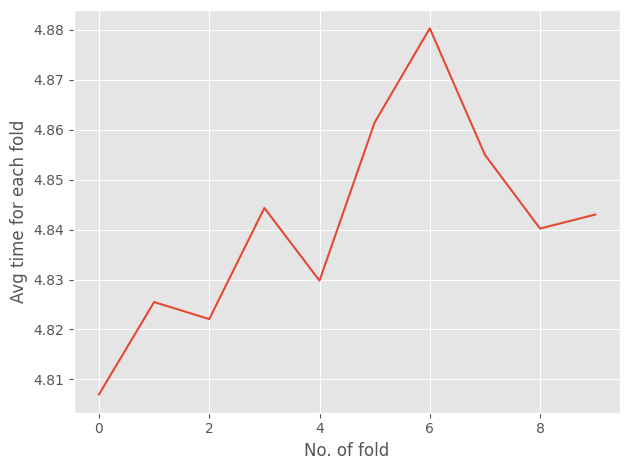

In [64]:
import matplotlib.pyplot as plt

times_bilstm_n = np.zeros((10,100))
for i, row in enumerate(times_bilstm):
    times_bilstm_n[i, :len(row)] = row

times_bilstm_n_n = np.mean(times_bilstm_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_bilstm_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("bilstm times")
plt.show()

In [65]:
train_acc_bilstm_n = np.zeros((10,100))
for i, row in enumerate(train_acc_bilstm):
    train_acc_bilstm_n[i, :len(row)] = row
    
test_acc_bilstm_n = np.zeros((10,100))
for i, row in enumerate(test_acc_bilstm):
    test_acc_bilstm_n[i, :len(row)] = row
    
train_loss_bilstm_n = np.zeros((10,100))
for i, row in enumerate(train_loss_bilstm):
    train_loss_bilstm_n[i, :len(row)] = row
    
test_loss_bilstm_n = np.zeros((10,100))
for i, row in enumerate(test_loss_bilstm):
    test_loss_bilstm_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_bilstm_n = np.mean(train_acc_bilstm_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_bilstm_n = np.mean(test_acc_bilstm_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_bilstm_n = np.mean(train_loss_bilstm_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_bilstm_n = np.mean(test_loss_bilstm_n,axis=0)

In [66]:
train_acc_bilstm_n

array([0.44497138, 0.5794767 , 0.70298446, 0.80400655, 0.8627964 ,
       0.9072363 , 0.91868356, 0.93830743, 0.956296  , 0.95515127,
       0.9644726 , 0.96627145, 0.97477515, 0.97624693, 0.98270646,
       0.98536386, 0.98810302, 0.99121014, 0.99366313, 0.99448078,
       0.99607523, 0.99513492, 0.99325429, 0.99509404, 0.99570728,
       0.99672936, 0.99709731, 0.99877351, 0.99918234, 0.99946852,
       0.99938676, 0.99967294, 0.99950941, 0.99955029, 0.99955029,
       0.99955029, 0.99959117, 0.99955029, 0.99959117, 0.99955029,
       0.99967294, 0.9997547 , 0.99959117, 0.99950941, 0.99967294,
       0.99959117, 0.99950941, 0.99979559, 0.99967294, 0.99963205,
       0.99963205, 0.99983647, 0.9997547 , 0.99963205, 0.9997547 ,
       0.99987735, 0.99987735, 0.99950941, 0.99971382, 0.99983647,
       0.99959117, 0.9997547 , 0.99967294, 0.99963205, 0.99979559,
       0.99963205, 0.99979559, 0.99971382, 0.99955029, 0.99942764,
       0.9997547 , 0.99946852, 0.99967294, 0.99983647, 0.99955

In [67]:
data = [train_acc_bilstm_n,test_acc_bilstm_n,train_loss_bilstm_n,test_loss_bilstm_n]

df = pd.DataFrame(data)
df.to_csv('bilstm_acc', index=False)
df = pd.read_csv('bilstm_acc')

train_acc_bilstm_n = df.iloc[0]
test_acc_bilstm_n = df.iloc[1]
train_loss_bilstm_n = df.iloc[2]
test_loss_bilstm_n = df.iloc[3]


df_t = pd.DataFrame([times_bilstm_n_n])
df_t.to_csv('bilstm_times', index=False)
df_t = pd.read_csv('bilstm_times')

times_bilstm_n_n = df_t.iloc[0]

In [68]:
train_acc_bilstm_n

0     0.444971
1     0.579477
2     0.702984
3     0.804007
4     0.862796
        ...   
95    0.999714
96    0.999591
97    0.999673
98    0.999591
99    0.999877
Name: 0, Length: 100, dtype: float64

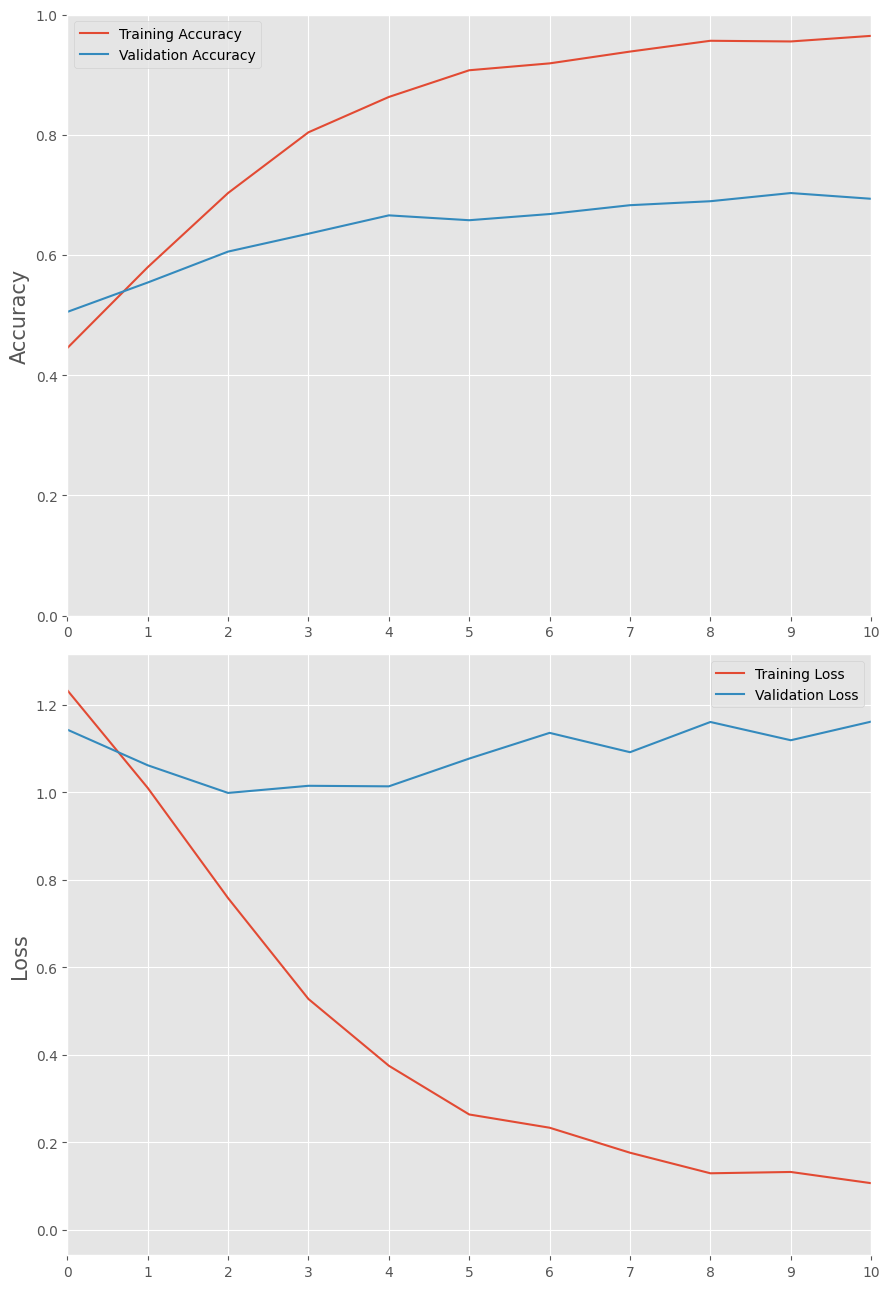

In [69]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_bilstm_n, label='Training Accuracy')
axs[0].plot(test_acc_bilstm_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_bilstm_n, label='Training Loss')
axs[1].plot(test_loss_bilstm_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("BILSTM Training and Testing Loss")
plt.show()

In [70]:
np.array(scores_bilstm).shape

(10, 302, 4)

In [71]:
np.array(y_test_all_bilstm).shape

(10, 302)

In [72]:
y_pred_bilstm = np.argmax(scores_bilstm,axis=2)

In [73]:
y_pred_bilstm.shape

(10, 302)

In [74]:
from sklearn.metrics import accuracy_score
acc_scores_bilstm = []
for i in range(len(y_test_all_bilstm)):
    acc_scores_bilstm.append(accuracy_score(y_true = y_test_all_bilstm[i],y_pred = y_pred_bilstm[i]))

In [75]:
acc_scores_bilstm

[0.7119205298013245,
 0.7516556291390728,
 0.7847682119205298,
 0.7251655629139073,
 0.7350993377483444,
 0.7119205298013245,
 0.7549668874172185,
 0.7582781456953642,
 0.7152317880794702,
 0.7450331125827815]

In [76]:
df_acc = pd.DataFrame([acc_scores_bilstm])

df_acc.to_csv('bilstm_accuracy', index=False)

df_acc = pd.read_csv('bilstm_accuracy')

acc_scores_bilstm = df_acc.iloc[0].values

In [77]:
y_test_all_n = np.array(y_test_all_bilstm)

y_pred_bilstm_n = y_pred_bilstm.flatten()
y_test_all_n = y_test_all_n.flatten()

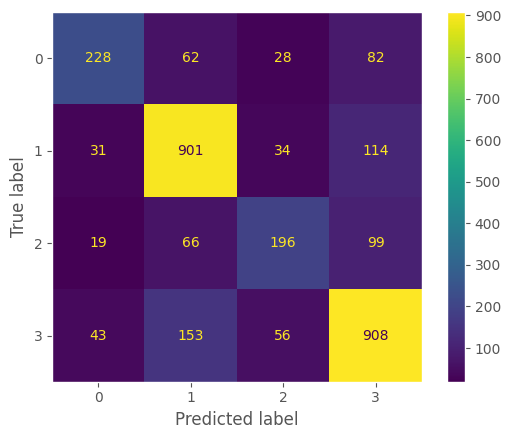

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n,y_pred_bilstm_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("BISLTM")

plt.show()

In [79]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n,y_pred_bilstm_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.71      0.57      0.63       400
           1       0.76      0.83      0.80      1080
           2       0.62      0.52      0.56       380
           3       0.75      0.78      0.77      1160

    accuracy                           0.74      3020
   macro avg       0.71      0.68      0.69      3020
weighted avg       0.74      0.74      0.73      3020



# BRNN

In [80]:
import gc
gc.collect()

30487

In [81]:
# X,y = load_data(DATA_PATH)

In [82]:
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional, SimpleRNN, Dense
from tensorflow.keras.models import Sequential

In [83]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_birnn = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_birnn.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [84]:
def create_model_birnn():

    model_birnn = keras.Sequential([

        keras.layers.Bidirectional(SimpleRNN(256,return_sequences=True),input_shape=(X.shape[1],X.shape[2])),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(SimpleRNN(128,return_sequences=True)),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(SimpleRNN(64)),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(units = 4,activation='softmax')

    ])
    return model_birnn

In [85]:
import gc
gc.collect()

5

In [86]:
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_birnn = []
y_test_all_birnn = []
train_acc_birnn = []
test_acc_birnn = []
train_loss_birnn = []
test_loss_birnn = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_birnn.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_birnn = None
    model_birnn = create_model_birnn()
        
    model_birnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_birnn.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_birnn.predict(X_test)
    
    scores_birnn.append(x)
    train_acc_birnn.append(history.history["accuracy"])
    test_acc_birnn.append(history.history["val_accuracy"])
    train_loss_birnn.append(history.history["loss"])
    test_loss_birnn.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 73s 923ms/step - loss: 1.7736 - accuracy: 0.3508 - val_loss: 1.3427 - val_accuracy: 0.3787 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 70s 905ms/step - loss: 1.5882 - accuracy: 0.3749 - val_loss: 1.3250 - val_accuracy: 0.4596 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 70s 915ms/step - loss: 1.4844 - accuracy: 0.3982 - val_loss: 1.2952 - val_accuracy: 0.4522 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 71s 920ms/step - loss: 1.3908 - accuracy: 0.4039 - val_loss: 1.3239 - val_accuracy: 0.4375 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 70s 914ms/step - loss: 1.3403 - accuracy: 0.4211 - val_loss: 1.2614 - val_accuracy: 0.4559 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 71s 931ms/step - loss: 1.3032 - accuracy: 0.4403 - val_loss: 1.2064 - val_accuracy: 0.4632 - lr: 0.0010
Epoch 7/100
77/77 [==============

Epoch 30/100
77/77 [==============================] - 72s 929ms/step - loss: 0.7837 - accuracy: 0.6991 - val_loss: 1.3036 - val_accuracy: 0.4890 - lr: 2.0000e-04
Epoch 31/100
77/77 [==============================] - ETA: 0s - loss: 0.7761 - accuracy: 0.6926
Epoch 31: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 31: 70.89 seconds
77/77 [==============================] - 71s 922ms/step - loss: 0.7761 - accuracy: 0.6926 - val_loss: 1.3079 - val_accuracy: 0.5074 - lr: 2.0000e-04
Epoch 32/100
77/77 [==============================] - 70s 909ms/step - loss: 0.7369 - accuracy: 0.7110 - val_loss: 1.2867 - val_accuracy: 0.5221 - lr: 4.0000e-05
Epoch 33/100
77/77 [==============================] - 70s 916ms/step - loss: 0.7147 - accuracy: 0.7281 - val_loss: 1.2940 - val_accuracy: 0.5074 - lr: 4.0000e-05
Epoch 34/100
77/77 [==============================] - 70s 912ms/step - loss: 0.7180 - accuracy: 0.7281 - val_loss: 1.2937 - val_accuracy: 0.5221 - lr: 4

Time taken for epoch 58: 70.23 seconds
77/77 [==============================] - 70s 914ms/step - loss: 0.6250 - accuracy: 0.7588 - val_loss: 1.3091 - val_accuracy: 0.5515 - lr: 8.0000e-06
Epoch 59/100
77/77 [==============================] - 71s 921ms/step - loss: 0.6036 - accuracy: 0.7850 - val_loss: 1.3130 - val_accuracy: 0.5551 - lr: 1.6000e-06
Epoch 60/100
77/77 [==============================] - 71s 927ms/step - loss: 0.6182 - accuracy: 0.7743 - val_loss: 1.3141 - val_accuracy: 0.5551 - lr: 1.6000e-06
Epoch 61/100
77/77 [==============================] - 69s 894ms/step - loss: 0.6334 - accuracy: 0.7706 - val_loss: 1.3157 - val_accuracy: 0.5588 - lr: 1.6000e-06
Epoch 62/100
77/77 [==============================] - 71s 914ms/step - loss: 0.6213 - accuracy: 0.7743 - val_loss: 1.3171 - val_accuracy: 0.5588 - lr: 1.6000e-06
Epoch 63/100
77/77 [==============================] - 69s 896ms/step - loss: 0.6220 - accuracy: 0.7653 - val_loss: 1.3153 - val_accuracy: 0.5515 - lr: 1.6000e-06
Ep

Time taken for epoch 86: 68.78 seconds
77/77 [==============================] - 69s 892ms/step - loss: 0.6230 - accuracy: 0.7706 - val_loss: 1.3136 - val_accuracy: 0.5515 - lr: 1.2800e-08
Epoch 87/100
77/77 [==============================] - 71s 921ms/step - loss: 0.6247 - accuracy: 0.7756 - val_loss: 1.3136 - val_accuracy: 0.5515 - lr: 2.5600e-09
Epoch 88/100
77/77 [==============================] - 69s 893ms/step - loss: 0.6257 - accuracy: 0.7629 - val_loss: 1.3136 - val_accuracy: 0.5515 - lr: 2.5600e-09
Epoch 89/100
77/77 [==============================] - 71s 917ms/step - loss: 0.6272 - accuracy: 0.7592 - val_loss: 1.3136 - val_accuracy: 0.5515 - lr: 2.5600e-09
Epoch 90/100
77/77 [==============================] - 68s 889ms/step - loss: 0.6228 - accuracy: 0.7702 - val_loss: 1.3136 - val_accuracy: 0.5515 - lr: 2.5600e-09
Epoch 91/100
77/77 [==============================] - 70s 908ms/step - loss: 0.6390 - accuracy: 0.7588 - val_loss: 1.3136 - val_accuracy: 0.5515 - lr: 2.5600e-09
Ep

Epoch 15/100
77/77 [==============================] - 70s 906ms/step - loss: 1.0551 - accuracy: 0.5519 - val_loss: 1.3108 - val_accuracy: 0.4596 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 71s 917ms/step - loss: 1.0497 - accuracy: 0.5442 - val_loss: 1.2951 - val_accuracy: 0.4559 - lr: 2.0000e-04
Epoch 17/100
77/77 [==============================] - 71s 924ms/step - loss: 1.0579 - accuracy: 0.5454 - val_loss: 1.3094 - val_accuracy: 0.4779 - lr: 2.0000e-04
Epoch 18/100
77/77 [==============================] - 70s 908ms/step - loss: 1.0291 - accuracy: 0.5605 - val_loss: 1.3082 - val_accuracy: 0.4706 - lr: 2.0000e-04
Epoch 19/100
77/77 [==============================] - 70s 914ms/step - loss: 1.0224 - accuracy: 0.5683 - val_loss: 1.3301 - val_accuracy: 0.4816 - lr: 2.0000e-04
Epoch 20/100
77/77 [==============================] - 71s 918ms/step - loss: 1.0257 - accuracy: 0.5605 - val_loss: 1.3226 - val_accuracy: 0.4853 - lr: 2.0000e-04
Epoch 21/100
77/77 [========

Epoch 44/100
77/77 [==============================] - 72s 936ms/step - loss: 0.7282 - accuracy: 0.7167 - val_loss: 1.4025 - val_accuracy: 0.5147 - lr: 8.0000e-06
Epoch 45/100
77/77 [==============================] - 71s 916ms/step - loss: 0.7250 - accuracy: 0.7134 - val_loss: 1.4014 - val_accuracy: 0.5184 - lr: 8.0000e-06
Epoch 46/100
77/77 [==============================] - 70s 911ms/step - loss: 0.7167 - accuracy: 0.7171 - val_loss: 1.3937 - val_accuracy: 0.5074 - lr: 8.0000e-06
Epoch 47/100
77/77 [==============================] - 71s 917ms/step - loss: 0.7253 - accuracy: 0.7101 - val_loss: 1.4001 - val_accuracy: 0.5110 - lr: 8.0000e-06
Epoch 48/100
77/77 [==============================] - 71s 921ms/step - loss: 0.7147 - accuracy: 0.7093 - val_loss: 1.3981 - val_accuracy: 0.5074 - lr: 8.0000e-06
Epoch 49/100
77/77 [==============================] - 70s 913ms/step - loss: 0.7096 - accuracy: 0.7187 - val_loss: 1.3982 - val_accuracy: 0.5074 - lr: 8.0000e-06
Epoch 50/100
77/77 [========

Epoch 100/100
10/10 [==============================] - 1s 102ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 71s 906ms/step - loss: 1.7400 - accuracy: 0.3307 - val_loss: 1.1884 - val_accuracy: 0.4926 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 71s 924ms/step - loss: 1.5101 - accuracy: 0.3708 - val_loss: 1.1847 - val_accuracy: 0.4926 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 69s 897ms/step - loss: 1.4318 - accuracy: 0.3982 - val_loss: 1.1719 - val_accuracy: 0.5404 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 69s 892ms/step - loss: 1.3551 - accuracy: 0.4039 - val_loss: 1.1685 - val_accuracy: 0.5147 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 69s 893ms/step - loss: 1.3301 - accuracy: 0.4076 - val_loss: 1.1370 - val_accuracy: 0.5184 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 71s 921ms/step - loss: 1.2584 - accuracy: 0.4428 - val_loss: 1.1316 

Epoch 29/100
77/77 [==============================] - 72s 932ms/step - loss: 0.7874 - accuracy: 0.6836 - val_loss: 1.1138 - val_accuracy: 0.5368 - lr: 4.0000e-05
Epoch 30/100
77/77 [==============================] - 71s 916ms/step - loss: 0.7804 - accuracy: 0.6897 - val_loss: 1.1092 - val_accuracy: 0.5441 - lr: 4.0000e-05
Epoch 31/100
77/77 [==============================] - 69s 904ms/step - loss: 0.7724 - accuracy: 0.6922 - val_loss: 1.1039 - val_accuracy: 0.5441 - lr: 4.0000e-05
Epoch 32/100
77/77 [==============================] - ETA: 0s - loss: 0.7690 - accuracy: 0.6962
Epoch 32: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 32: 70.45 seconds
77/77 [==============================] - 70s 914ms/step - loss: 0.7690 - accuracy: 0.6962 - val_loss: 1.1063 - val_accuracy: 0.5625 - lr: 4.0000e-05
Epoch 33/100
77/77 [==============================] - 70s 905ms/step - loss: 0.7705 - accuracy: 0.6897 - val_loss: 1.1039 - val_accuracy: 0.5515 - lr: 8.

Epoch 57/100
77/77 [==============================] - 69s 894ms/step - loss: 0.7495 - accuracy: 0.7024 - val_loss: 1.1060 - val_accuracy: 0.5515 - lr: 6.4000e-08
Epoch 58/100
77/77 [==============================] - 69s 901ms/step - loss: 0.7442 - accuracy: 0.7028 - val_loss: 1.1060 - val_accuracy: 0.5515 - lr: 6.4000e-08
Epoch 59/100
77/77 [==============================] - 71s 916ms/step - loss: 0.7573 - accuracy: 0.6958 - val_loss: 1.1061 - val_accuracy: 0.5515 - lr: 6.4000e-08
Epoch 60/100
77/77 [==============================] - ETA: 0s - loss: 0.7615 - accuracy: 0.6917
Epoch 60: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 60: 67.92 seconds
77/77 [==============================] - 68s 883ms/step - loss: 0.7615 - accuracy: 0.6917 - val_loss: 1.1061 - val_accuracy: 0.5515 - lr: 6.4000e-08
Epoch 61/100
77/77 [==============================] - 71s 918ms/step - loss: 0.7588 - accuracy: 0.6983 - val_loss: 1.1061 - val_accuracy: 0.5515 - lr: 1

Epoch 85/100
77/77 [==============================] - 70s 914ms/step - loss: 0.7656 - accuracy: 0.6938 - val_loss: 1.1061 - val_accuracy: 0.5515 - lr: 1.0240e-10
Epoch 86/100
77/77 [==============================] - 70s 906ms/step - loss: 0.7588 - accuracy: 0.7040 - val_loss: 1.1061 - val_accuracy: 0.5515 - lr: 1.0240e-10
Epoch 87/100
77/77 [==============================] - 70s 912ms/step - loss: 0.7489 - accuracy: 0.7069 - val_loss: 1.1061 - val_accuracy: 0.5515 - lr: 1.0240e-10
Epoch 88/100
77/77 [==============================] - ETA: 0s - loss: 0.7538 - accuracy: 0.6913
Epoch 88: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 88: 71.60 seconds
77/77 [==============================] - 72s 930ms/step - loss: 0.7538 - accuracy: 0.6913 - val_loss: 1.1061 - val_accuracy: 0.5515 - lr: 1.0240e-10
Epoch 89/100
77/77 [==============================] - 69s 896ms/step - loss: 0.7515 - accuracy: 0.7081 - val_loss: 1.1061 - val_accuracy: 0.5515 - lr: 2

77/77 [==============================] - 70s 905ms/step - loss: 0.9859 - accuracy: 0.5854 - val_loss: 1.2824 - val_accuracy: 0.5000 - lr: 1.6000e-06
Epoch 42/100
77/77 [==============================] - 72s 937ms/step - loss: 0.9983 - accuracy: 0.5924 - val_loss: 1.2829 - val_accuracy: 0.5000 - lr: 1.6000e-06
Epoch 43/100
77/77 [==============================] - 71s 922ms/step - loss: 0.9841 - accuracy: 0.5944 - val_loss: 1.2827 - val_accuracy: 0.5037 - lr: 1.6000e-06
Epoch 44/100
77/77 [==============================] - ETA: 0s - loss: 0.9832 - accuracy: 0.6034
Epoch 44: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 44: 68.79 seconds
77/77 [==============================] - 69s 894ms/step - loss: 0.9832 - accuracy: 0.6034 - val_loss: 1.2828 - val_accuracy: 0.5037 - lr: 1.6000e-06
Epoch 45/100
77/77 [==============================] - 70s 911ms/step - loss: 0.9984 - accuracy: 0.5944 - val_loss: 1.2829 - val_accuracy: 0.5037 - lr: 3.2000e-07
Epoc

Epoch 69/100
77/77 [==============================] - 68s 882ms/step - loss: 1.0001 - accuracy: 0.5998 - val_loss: 1.2830 - val_accuracy: 0.5037 - lr: 2.5600e-09
Epoch 70/100
77/77 [==============================] - 68s 890ms/step - loss: 0.9942 - accuracy: 0.5895 - val_loss: 1.2830 - val_accuracy: 0.5037 - lr: 2.5600e-09
Epoch 71/100
77/77 [==============================] - 69s 895ms/step - loss: 0.9993 - accuracy: 0.5822 - val_loss: 1.2830 - val_accuracy: 0.5037 - lr: 2.5600e-09
Epoch 72/100
77/77 [==============================] - ETA: 0s - loss: 0.9786 - accuracy: 0.5887
Epoch 72: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 72: 67.98 seconds
77/77 [==============================] - 68s 884ms/step - loss: 0.9786 - accuracy: 0.5887 - val_loss: 1.2830 - val_accuracy: 0.5037 - lr: 2.5600e-09
Epoch 73/100
77/77 [==============================] - 72s 939ms/step - loss: 0.9886 - accuracy: 0.5920 - val_loss: 1.2830 - val_accuracy: 0.5037 - lr: 5.12

Epoch 97/100
77/77 [==============================] - 70s 906ms/step - loss: 0.9780 - accuracy: 0.6006 - val_loss: 1.2830 - val_accuracy: 0.5037 - lr: 4.0960e-12
Epoch 98/100
77/77 [==============================] - 67s 867ms/step - loss: 0.9793 - accuracy: 0.5863 - val_loss: 1.2830 - val_accuracy: 0.5037 - lr: 4.0960e-12
Epoch 99/100
77/77 [==============================] - 69s 903ms/step - loss: 0.9857 - accuracy: 0.5936 - val_loss: 1.2830 - val_accuracy: 0.5037 - lr: 4.0960e-12
Epoch 100/100
77/77 [==============================] - ETA: 0s - loss: 0.9852 - accuracy: 0.5936
Epoch 100: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 100: 68.79 seconds
10/10 [==============================] - 2s 159ms/step
Training on fold 5/10...
Epoch 1/100
77/77 [==============================] - 71s 898ms/step - loss: 1.7017 - accuracy: 0.3410 - val_loss: 1.3034 - val_accuracy: 0.4669 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 71s 926ms

77/77 [==============================] - ETA: 0s - loss: 1.0351 - accuracy: 0.5626
Epoch 25: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 25: 70.50 seconds
77/77 [==============================] - 70s 916ms/step - loss: 1.0351 - accuracy: 0.5626 - val_loss: 1.2483 - val_accuracy: 0.4485 - lr: 4.0000e-05
Epoch 26/100
77/77 [==============================] - 68s 882ms/step - loss: 1.0357 - accuracy: 0.5650 - val_loss: 1.2479 - val_accuracy: 0.4522 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 71s 923ms/step - loss: 1.0339 - accuracy: 0.5597 - val_loss: 1.2488 - val_accuracy: 0.4522 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 70s 908ms/step - loss: 1.0386 - accuracy: 0.5589 - val_loss: 1.2492 - val_accuracy: 0.4522 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - 69s 897ms/step - loss: 1.0285 - accuracy: 0.5638 - val_loss: 1.2489 - val_accuracy: 0.4522 - lr: 8.0000e-06
Epoc

Epoch 53/100
77/77 [==============================] - ETA: 0s - loss: 1.0346 - accuracy: 0.5670
Epoch 53: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 53: 70.85 seconds
77/77 [==============================] - 71s 922ms/step - loss: 1.0346 - accuracy: 0.5670 - val_loss: 1.2499 - val_accuracy: 0.4559 - lr: 6.4000e-08
Epoch 54/100
77/77 [==============================] - 70s 909ms/step - loss: 1.0232 - accuracy: 0.5511 - val_loss: 1.2499 - val_accuracy: 0.4559 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 70s 912ms/step - loss: 1.0311 - accuracy: 0.5687 - val_loss: 1.2499 - val_accuracy: 0.4559 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 72s 935ms/step - loss: 1.0242 - accuracy: 0.5679 - val_loss: 1.2499 - val_accuracy: 0.4559 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - 68s 879ms/step - loss: 1.0315 - accuracy: 0.5630 - val_loss: 1.2499 - val_accuracy: 0.4559 - lr: 1

Epoch 81/100
77/77 [==============================] - ETA: 0s - loss: 1.0308 - accuracy: 0.5593
Epoch 81: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 81: 70.67 seconds
77/77 [==============================] - 71s 916ms/step - loss: 1.0308 - accuracy: 0.5593 - val_loss: 1.2499 - val_accuracy: 0.4559 - lr: 1.0240e-10
Epoch 82/100
77/77 [==============================] - 71s 923ms/step - loss: 1.0305 - accuracy: 0.5593 - val_loss: 1.2499 - val_accuracy: 0.4559 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 70s 912ms/step - loss: 1.0319 - accuracy: 0.5683 - val_loss: 1.2499 - val_accuracy: 0.4559 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 70s 911ms/step - loss: 1.0366 - accuracy: 0.5536 - val_loss: 1.2499 - val_accuracy: 0.4559 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - 69s 892ms/step - loss: 1.0306 - accuracy: 0.5650 - val_loss: 1.2499 - val_accuracy: 0.4559 - lr: 2

Epoch 9/100
77/77 [==============================] - 71s 926ms/step - loss: 1.1922 - accuracy: 0.4624 - val_loss: 1.2851 - val_accuracy: 0.4338 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 72s 930ms/step - loss: 1.1801 - accuracy: 0.4702 - val_loss: 1.3063 - val_accuracy: 0.4338 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - ETA: 0s - loss: 1.1793 - accuracy: 0.4644
Epoch 11: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 11: 72.34 seconds
77/77 [==============================] - 72s 940ms/step - loss: 1.1793 - accuracy: 0.4644 - val_loss: 1.2911 - val_accuracy: 0.4596 - lr: 0.0010
Epoch 12/100
77/77 [==============================] - 72s 929ms/step - loss: 1.1362 - accuracy: 0.5029 - val_loss: 1.2754 - val_accuracy: 0.4375 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 70s 906ms/step - loss: 1.1253 - accuracy: 0.4984 - val_loss: 1.2710 - val_accuracy: 0.4301 - lr: 2.0000e-04
Epo

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



77/77 [==============================] - 69s 896ms/step - loss: 0.9543 - accuracy: 0.5977 - val_loss: 1.2499 - val_accuracy: 0.5184 - lr: 1.0240e-10
Epoch 80/100
77/77 [==============================] - 67s 874ms/step - loss: 0.9454 - accuracy: 0.6071 - val_loss: 1.2499 - val_accuracy: 0.5184 - lr: 1.0240e-10
Epoch 81/100
77/77 [==============================] - 70s 913ms/step - loss: 0.9627 - accuracy: 0.6030 - val_loss: 1.2499 - val_accuracy: 0.5184 - lr: 1.0240e-10
Epoch 82/100
77/77 [==============================] - 72s 932ms/step - loss: 0.9632 - accuracy: 0.5998 - val_loss: 1.2499 - val_accuracy: 0.5184 - lr: 1.0240e-10
Epoch 83/100
77/77 [==============================] - ETA: 0s - loss: 0.9433 - accuracy: 0.6067
Epoch 83: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 83: 68.62 seconds
77/77 [==============================] - 69s 891ms/step - loss: 0.9433 - accuracy: 0.6067 - val_loss: 1.2499 - val_accuracy: 0.5184 - lr: 1.0240e-10
Epo

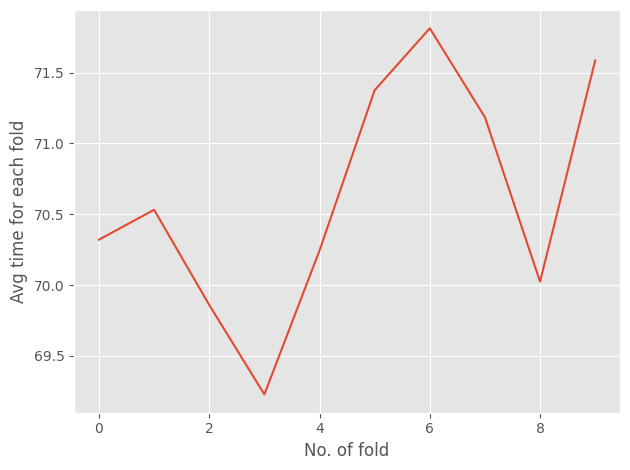

In [87]:
import matplotlib.pyplot as plt

times_birnn_n = np.zeros((10,100))
for i, row in enumerate(times_birnn):
    times_birnn_n[i, :len(row)] = row

times_birnn_n_n = np.mean(times_birnn_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_birnn_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("birnn times")
plt.show()

In [88]:
train_acc_birnn_n = np.zeros((10,100))
for i, row in enumerate(train_acc_birnn):
    train_acc_birnn_n[i, :len(row)] = row
    
test_acc_birnn_n = np.zeros((10,100))
for i, row in enumerate(test_acc_birnn):
    test_acc_birnn_n[i, :len(row)] = row
    
train_loss_birnn_n = np.zeros((10,100))
for i, row in enumerate(train_loss_birnn):
    train_loss_birnn_n[i, :len(row)] = row
    
test_loss_birnn_n = np.zeros((10,100))
for i, row in enumerate(test_loss_birnn):
    test_loss_birnn_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_birnn_n = np.mean(train_acc_birnn_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_birnn_n = np.mean(test_acc_birnn_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_birnn_n = np.mean(train_loss_birnn_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_birnn_n = np.mean(test_loss_birnn_n,axis=0)

In [89]:
data = [train_acc_birnn_n,test_acc_birnn_n,train_loss_birnn_n,test_loss_birnn_n]

df = pd.DataFrame(data)
df.to_csv('birnn_acc', index=False)
df = pd.read_csv('birnn_acc')

train_acc_birnn_n = df.iloc[0]
test_acc_birnn_n = df.iloc[1]
train_loss_birnn_n = df.iloc[2]
test_loss_birnn_n = df.iloc[3]


df_t = pd.DataFrame([times_birnn_n_n])
df_t.to_csv('birnn_times', index=False)
df_t = pd.read_csv('birnn_times')

times_birnn_n_n = df_t.iloc[0]

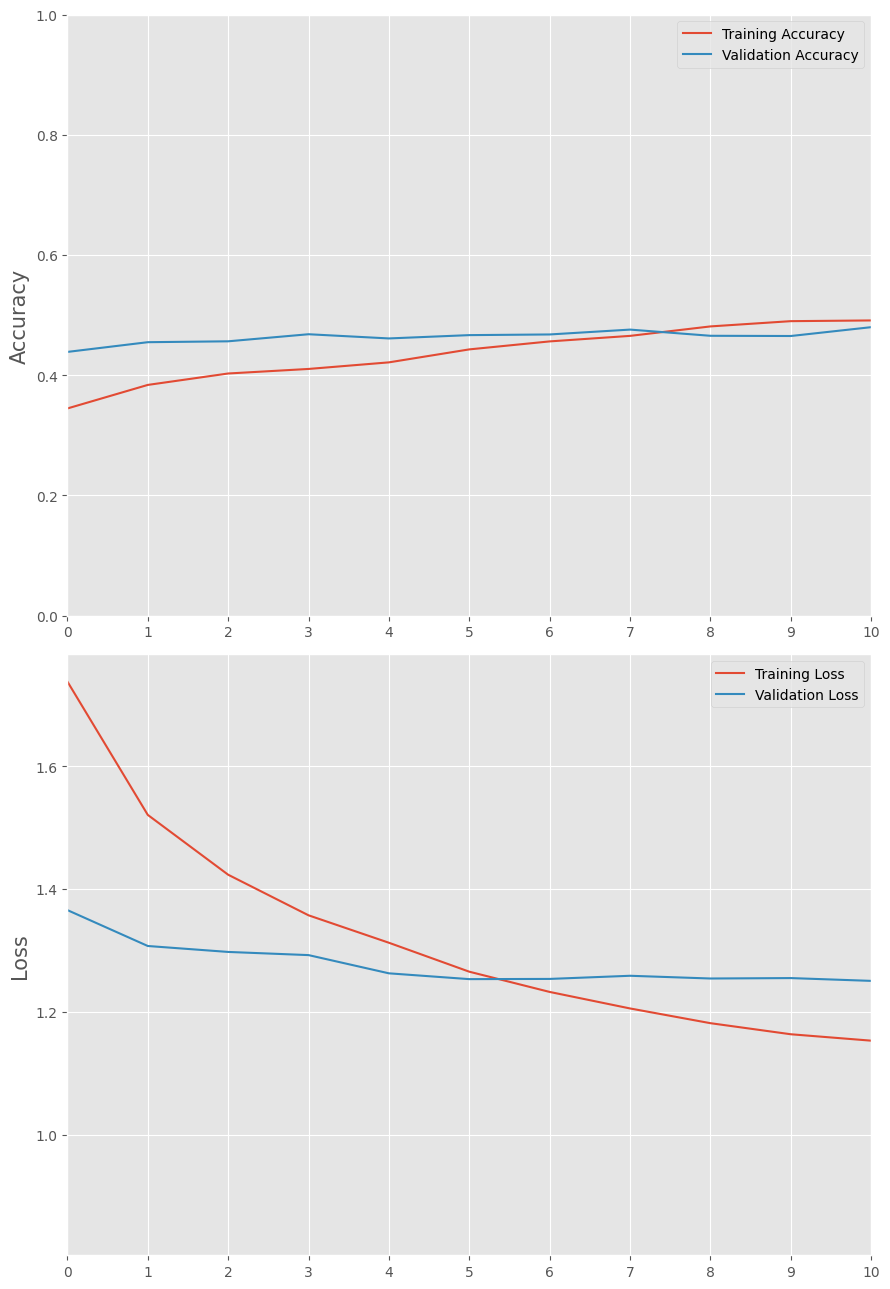

In [90]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_birnn_n, label='Training Accuracy')
axs[0].plot(test_acc_birnn_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_birnn_n, label='Training Loss')
axs[1].plot(test_loss_birnn_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig(" BIRNN Training and Testing Loss")
plt.show()

In [91]:
import gc
gc.collect()

23849

In [92]:
np.array(scores_birnn).shape

(10, 302, 4)

In [93]:
y_pred_birnn = np.argmax(scores_birnn,axis=2)

In [94]:
y_pred_birnn.shape

(10, 302)

In [95]:
from sklearn.metrics import accuracy_score
acc_scores_birnn = []
for i in range(len(y_test_all_birnn)):
    acc_scores_birnn.append(accuracy_score(y_true = y_test_all_birnn[i],y_pred = y_pred_birnn[i]))

In [96]:
acc_scores_birnn

[0.5231788079470199,
 0.5264900662251656,
 0.4966887417218543,
 0.5033112582781457,
 0.5,
 0.5860927152317881,
 0.4966887417218543,
 0.5298013245033113,
 0.5,
 0.5]

In [97]:
df_acc = pd.DataFrame([acc_scores_birnn])

df_acc.to_csv('birnn_accuracy', index=False)

df_acc = pd.read_csv('birnn_accuracy')

acc_scores_birnn = df_acc.iloc[0].values

In [98]:
acc_birnn = np.mean(acc_scores_birnn)

In [99]:
acc_birnn

0.516225165562914

In [100]:
y_test_all_n = np.array(y_test_all_birnn)

y_pred_birnn_n = y_pred_birnn.flatten()
y_test_all_n = y_test_all_n.flatten()

In [101]:
import gc
gc.collect()

0

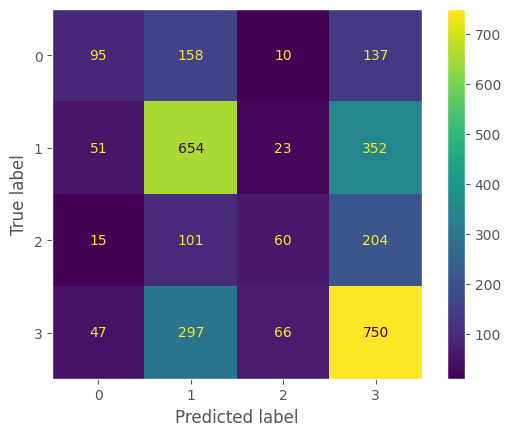

In [102]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_birnn_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("birnn")
plt.show()

In [103]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_birnn_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.46      0.24      0.31       400
           1       0.54      0.61      0.57      1080
           2       0.38      0.16      0.22       380
           3       0.52      0.65      0.58      1160

    accuracy                           0.52      3020
   macro avg       0.47      0.41      0.42      3020
weighted avg       0.50      0.52      0.50      3020



# MobileNetV2

In [8]:
import gc
gc.collect()

0

In [8]:
X.shape

(3020, 259, 100)

In [9]:
# X = np.concatenate([X,X,X,X,X,X,X,X,X,X,X,X,X,X,X], axis= -1)

In [10]:
X = np.expand_dims(X, axis=-1)

In [11]:
X_n = np.concatenate([X,X,X], axis= -1)

In [12]:
X_n.shape

(3020, 259, 100, 3)

In [13]:
y.shape

(3020,)

In [111]:
import tensorflow as tf
from keras.applications import MobileNetV2

In [112]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_mnv2 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_mnv2.append(self.times)

# early_stop = EarlyStopping(monitor='loss', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 10, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [113]:
IMG_SHAPE = (None,None,3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top= False, 
                                              weights='imagenet')
base_model.trainable = False

In [114]:
def create_model_mnv2():
     
    model_mnv2 = tf.keras.Sequential([
        
        
        base_model,
        
        tf.keras.layers.GlobalAveragePooling2D(),
        
        tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
        
        tf.keras.layers.Dropout(0.25),
        
        tf.keras.layers.Dense(units=4, activation='softmax')
        
])
    
    return model_mnv2

In [115]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_mnv2 = []
y_test_all_mnv2 = []
train_acc_mnv2 = []
test_acc_mnv2 = []
train_loss_mnv2 = []
test_loss_mnv2 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_mnv2.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_mnv2 = None
    model_mnv2 = create_model_mnv2()
        
    model_mnv2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_mnv2.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_mnv2.predict(X_test)
    
    scores_mnv2.append(x)
    train_acc_mnv2.append(history.history["accuracy"])
    test_acc_mnv2.append(history.history["val_accuracy"])
    train_loss_mnv2.append(history.history["loss"])
    test_loss_mnv2.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 4s 24ms/step - loss: 1.3673 - accuracy: 0.4424 - val_loss: 1.2657 - val_accuracy: 0.3934 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0515 - accuracy: 0.5527 - val_loss: 1.1147 - val_accuracy: 0.4853 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9624 - accuracy: 0.5928 - val_loss: 1.0907 - val_accuracy: 0.5184 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9249 - accuracy: 0.6096 - val_loss: 1.1686 - val_accuracy: 0.4228 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8346 - accuracy: 0.6525 - val_loss: 1.0393 - val_accuracy: 0.5478 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 1s 17ms/step - loss: 0.7844 - accuracy: 0.6705 - val_loss: 1.0087 - val_accuracy: 0.5551 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Epoch 31/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0946 - accuracy: 0.9755 - val_loss: 1.2171 - val_accuracy: 0.6176 - lr: 0.0010
Epoch 32/100
77/77 [==============================] - 1s 17ms/step - loss: 0.1104 - accuracy: 0.9644 - val_loss: 1.2595 - val_accuracy: 0.5846 - lr: 0.0010
Epoch 33/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0982 - accuracy: 0.9726 - val_loss: 1.3034 - val_accuracy: 0.6066 - lr: 0.0010
Epoch 34/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0921 - accuracy: 0.9693 - val_loss: 1.3124 - val_accuracy: 0.6176 - lr: 0.0010
Epoch 35/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0956 - accuracy: 0.9767 - val_loss: 1.1814 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 36/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0898 - accuracy: 0.9718 - val_loss: 1.3523 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 37/100
77/77 [==============================] - 1s 17ms/st

Epoch 60/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0149 - accuracy: 0.9980 - val_loss: 1.4460 - val_accuracy: 0.6324 - lr: 4.0000e-05
Epoch 61/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0144 - accuracy: 0.9975 - val_loss: 1.4749 - val_accuracy: 0.6250 - lr: 4.0000e-05
Epoch 62/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0131 - accuracy: 0.9988 - val_loss: 1.4833 - val_accuracy: 0.6360 - lr: 4.0000e-05
Epoch 63/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0128 - accuracy: 0.9980 - val_loss: 1.4826 - val_accuracy: 0.6434 - lr: 4.0000e-05
Epoch 64/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0125 - accuracy: 0.9984 - val_loss: 1.4792 - val_accuracy: 0.6471 - lr: 4.0000e-05
Epoch 65/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0162 - accuracy: 0.9971 - val_loss: 1.4977 - val_accuracy: 0.6397 - lr: 4.0000e-05
Epoch 66/100
77/77 [====================

Epoch 89/100
76/77 [============================>.] - ETA: 0s - loss: 0.0140 - accuracy: 0.9979
Epoch 89: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 89: 1.32 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.0146 - accuracy: 0.9980 - val_loss: 1.5100 - val_accuracy: 0.6471 - lr: 1.6000e-06
Epoch 90/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0125 - accuracy: 0.9984 - val_loss: 1.5101 - val_accuracy: 0.6471 - lr: 3.2000e-07
Epoch 91/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0135 - accuracy: 0.9971 - val_loss: 1.5101 - val_accuracy: 0.6471 - lr: 3.2000e-07
Epoch 92/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0133 - accuracy: 0.9971 - val_loss: 1.5097 - val_accuracy: 0.6471 - lr: 3.2000e-07
Epoch 93/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0114 - accuracy: 0.9996 - val_loss: 1.5095 - val_accuracy: 0.6471 - lr: 3.2000e-07
Ep

Epoch 18/100
77/77 [==============================] - 1s 17ms/step - loss: 0.3593 - accuracy: 0.8671 - val_loss: 0.9111 - val_accuracy: 0.6581 - lr: 0.0010
Epoch 19/100
77/77 [==============================] - 1s 17ms/step - loss: 0.3076 - accuracy: 0.8994 - val_loss: 0.9511 - val_accuracy: 0.6360 - lr: 0.0010
Epoch 20/100
77/77 [==============================] - 1s 17ms/step - loss: 0.2660 - accuracy: 0.9105 - val_loss: 0.9146 - val_accuracy: 0.6618 - lr: 0.0010
Epoch 21/100
77/77 [==============================] - 1s 17ms/step - loss: 0.2617 - accuracy: 0.9154 - val_loss: 0.9307 - val_accuracy: 0.6581 - lr: 0.0010
Epoch 22/100
77/77 [==============================] - 1s 17ms/step - loss: 0.2275 - accuracy: 0.9231 - val_loss: 0.9669 - val_accuracy: 0.6618 - lr: 0.0010
Epoch 23/100
77/77 [==============================] - 1s 17ms/step - loss: 0.2084 - accuracy: 0.9366 - val_loss: 0.9860 - val_accuracy: 0.6801 - lr: 0.0010
Epoch 24/100
77/77 [==============================] - 1s 17ms/st

Epoch 76/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0223 - accuracy: 0.9975 - val_loss: 1.2493 - val_accuracy: 0.6949 - lr: 8.0000e-06
Epoch 77/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0226 - accuracy: 0.9975 - val_loss: 1.2505 - val_accuracy: 0.6912 - lr: 8.0000e-06
Epoch 78/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0244 - accuracy: 0.9955 - val_loss: 1.2520 - val_accuracy: 0.6949 - lr: 8.0000e-06
Epoch 79/100
76/77 [============================>.] - ETA: 0s - loss: 0.0230 - accuracy: 0.9967
Epoch 79: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 79: 1.34 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.0230 - accuracy: 0.9967 - val_loss: 1.2506 - val_accuracy: 0.6912 - lr: 8.0000e-06
Epoch 80/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0217 - accuracy: 0.9975 - val_loss: 1.2509 - val_accuracy: 0.6912 - lr: 1.6000e-06
E

Epoch 34/100
74/77 [===========================>..] - ETA: 0s - loss: 0.0930 - accuracy: 0.9793
Epoch 34: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 34: 1.30 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.0933 - accuracy: 0.9791 - val_loss: 0.9210 - val_accuracy: 0.6728 - lr: 2.0000e-04
Epoch 35/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0911 - accuracy: 0.9832 - val_loss: 0.9170 - val_accuracy: 0.6765 - lr: 4.0000e-05
Epoch 36/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0930 - accuracy: 0.9841 - val_loss: 0.9231 - val_accuracy: 0.6801 - lr: 4.0000e-05
Epoch 37/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0995 - accuracy: 0.9775 - val_loss: 0.9135 - val_accuracy: 0.6691 - lr: 4.0000e-05
Epoch 38/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0892 - accuracy: 0.9832 - val_loss: 0.9182 - val_accuracy: 0.6765 - lr: 4.0000e-05
E

Epoch 63/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0864 - accuracy: 0.9849 - val_loss: 0.9291 - val_accuracy: 0.6765 - lr: 1.6000e-06
Epoch 64/100
75/77 [============================>.] - ETA: 0s - loss: 0.0812 - accuracy: 0.9850
Epoch 64: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 64: 1.33 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.0803 - accuracy: 0.9853 - val_loss: 0.9289 - val_accuracy: 0.6765 - lr: 1.6000e-06
Epoch 65/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0829 - accuracy: 0.9865 - val_loss: 0.9289 - val_accuracy: 0.6765 - lr: 3.2000e-07
Epoch 66/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0845 - accuracy: 0.9832 - val_loss: 0.9289 - val_accuracy: 0.6765 - lr: 3.2000e-07
Epoch 67/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0870 - accuracy: 0.9836 - val_loss: 0.9289 - val_accuracy: 0.6765 - lr: 3.2000e-07
Ep

Epoch 92/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0805 - accuracy: 0.9849 - val_loss: 0.9288 - val_accuracy: 0.6728 - lr: 1.2800e-08
Epoch 93/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0812 - accuracy: 0.9849 - val_loss: 0.9289 - val_accuracy: 0.6728 - lr: 1.2800e-08
Epoch 94/100
76/77 [============================>.] - ETA: 0s - loss: 0.0796 - accuracy: 0.9877
Epoch 94: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 94: 1.31 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.0796 - accuracy: 0.9877 - val_loss: 0.9289 - val_accuracy: 0.6728 - lr: 1.2800e-08
Epoch 95/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0830 - accuracy: 0.9828 - val_loss: 0.9289 - val_accuracy: 0.6728 - lr: 2.5600e-09
Epoch 96/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0806 - accuracy: 0.9873 - val_loss: 0.9289 - val_accuracy: 0.6728 - lr: 2.5600e-09
E

77/77 [==============================] - 1s 17ms/step - loss: 0.2627 - accuracy: 0.9068 - val_loss: 1.0862 - val_accuracy: 0.6581 - lr: 0.0010
Epoch 22/100
77/77 [==============================] - 1s 17ms/step - loss: 0.2424 - accuracy: 0.9158 - val_loss: 1.0646 - val_accuracy: 0.6654 - lr: 0.0010
Epoch 23/100
77/77 [==============================] - 1s 17ms/step - loss: 0.2210 - accuracy: 0.9285 - val_loss: 1.0842 - val_accuracy: 0.6397 - lr: 0.0010
Epoch 24/100
77/77 [==============================] - 1s 17ms/step - loss: 0.1911 - accuracy: 0.9325 - val_loss: 1.0930 - val_accuracy: 0.5993 - lr: 0.0010
Epoch 25/100
77/77 [==============================] - 1s 17ms/step - loss: 0.1870 - accuracy: 0.9403 - val_loss: 1.0457 - val_accuracy: 0.6801 - lr: 0.0010
Epoch 26/100
77/77 [==============================] - 1s 17ms/step - loss: 0.1681 - accuracy: 0.9473 - val_loss: 1.4819 - val_accuracy: 0.6213 - lr: 0.0010
Epoch 27/100
77/77 [==============================] - 1s 17ms/step - loss: 0.

Epoch 50/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0354 - accuracy: 0.9951 - val_loss: 1.3151 - val_accuracy: 0.6618 - lr: 4.0000e-05
Epoch 51/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0338 - accuracy: 0.9959 - val_loss: 1.3104 - val_accuracy: 0.6691 - lr: 4.0000e-05
Epoch 52/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0314 - accuracy: 0.9947 - val_loss: 1.3204 - val_accuracy: 0.6691 - lr: 4.0000e-05
Epoch 53/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0333 - accuracy: 0.9939 - val_loss: 1.3127 - val_accuracy: 0.6397 - lr: 4.0000e-05
Epoch 54/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0337 - accuracy: 0.9955 - val_loss: 1.3072 - val_accuracy: 0.6581 - lr: 4.0000e-05
Epoch 55/100
75/77 [============================>.] - ETA: 0s - loss: 0.0305 - accuracy: 0.9958
Epoch 55: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 55: 1.

Epoch 79/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0310 - accuracy: 0.9951 - val_loss: 1.3100 - val_accuracy: 0.6654 - lr: 3.2000e-07
Epoch 80/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0297 - accuracy: 0.9971 - val_loss: 1.3098 - val_accuracy: 0.6654 - lr: 3.2000e-07
Epoch 81/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0298 - accuracy: 0.9971 - val_loss: 1.3101 - val_accuracy: 0.6654 - lr: 3.2000e-07
Epoch 82/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0328 - accuracy: 0.9955 - val_loss: 1.3099 - val_accuracy: 0.6691 - lr: 3.2000e-07
Epoch 83/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0282 - accuracy: 0.9967 - val_loss: 1.3103 - val_accuracy: 0.6691 - lr: 3.2000e-07
Epoch 84/100
77/77 [==============================] - 1s 18ms/step - loss: 0.0328 - accuracy: 0.9947 - val_loss: 1.3100 - val_accuracy: 0.6691 - lr: 3.2000e-07
Epoch 85/100
76/77 [====================

Epoch 8/100
77/77 [==============================] - 1s 17ms/step - loss: 0.6866 - accuracy: 0.7179 - val_loss: 1.0145 - val_accuracy: 0.5699 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 1s 17ms/step - loss: 0.6211 - accuracy: 0.7576 - val_loss: 0.9045 - val_accuracy: 0.6140 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 1s 17ms/step - loss: 0.5857 - accuracy: 0.7694 - val_loss: 0.9459 - val_accuracy: 0.5772 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - 1s 17ms/step - loss: 0.5318 - accuracy: 0.7976 - val_loss: 0.8673 - val_accuracy: 0.6397 - lr: 0.0010
Epoch 12/100
77/77 [==============================] - 1s 17ms/step - loss: 0.4889 - accuracy: 0.8173 - val_loss: 0.9183 - val_accuracy: 0.6360 - lr: 0.0010
Epoch 13/100
77/77 [==============================] - 1s 17ms/step - loss: 0.4784 - accuracy: 0.8156 - val_loss: 1.0060 - val_accuracy: 0.6324 - lr: 0.0010
Epoch 14/100
77/77 [==============================] - 1s 17ms/step

Epoch 38/100
77/77 [==============================] - 1s 18ms/step - loss: 0.0786 - accuracy: 0.9751 - val_loss: 1.2843 - val_accuracy: 0.6618 - lr: 0.0010
Epoch 39/100
77/77 [==============================] - 1s 17ms/step - loss: 0.1200 - accuracy: 0.9616 - val_loss: 1.1857 - val_accuracy: 0.6507 - lr: 0.0010
Epoch 40/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0898 - accuracy: 0.9747 - val_loss: 1.1429 - val_accuracy: 0.6691 - lr: 0.0010
Epoch 41/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0852 - accuracy: 0.9697 - val_loss: 1.3247 - val_accuracy: 0.6434 - lr: 0.0010
Epoch 42/100
77/77 [==============================] - 1s 17ms/step - loss: 0.1180 - accuracy: 0.9587 - val_loss: 1.1500 - val_accuracy: 0.6471 - lr: 0.0010
Epoch 43/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0730 - accuracy: 0.9824 - val_loss: 1.2785 - val_accuracy: 0.6471 - lr: 0.0010
Epoch 44/100
77/77 [==============================] - 1s 17ms/st

Epoch 67/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0170 - accuracy: 0.9967 - val_loss: 1.2336 - val_accuracy: 0.6728 - lr: 8.0000e-06
Epoch 68/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0162 - accuracy: 0.9980 - val_loss: 1.2325 - val_accuracy: 0.6801 - lr: 8.0000e-06
Epoch 69/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0167 - accuracy: 0.9967 - val_loss: 1.2326 - val_accuracy: 0.6801 - lr: 8.0000e-06
Epoch 70/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0218 - accuracy: 0.9951 - val_loss: 1.2343 - val_accuracy: 0.6801 - lr: 8.0000e-06
Epoch 71/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0163 - accuracy: 0.9963 - val_loss: 1.2355 - val_accuracy: 0.6801 - lr: 8.0000e-06
Epoch 72/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0130 - accuracy: 0.9988 - val_loss: 1.2394 - val_accuracy: 0.6765 - lr: 8.0000e-06
Epoch 73/100
77/77 [====================

Epoch 96/100
77/77 [==============================] - ETA: 0s - loss: 0.0136 - accuracy: 0.9988
Epoch 96: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 96: 1.33 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.0136 - accuracy: 0.9988 - val_loss: 1.2431 - val_accuracy: 0.6728 - lr: 3.2000e-07
Epoch 97/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0162 - accuracy: 0.9984 - val_loss: 1.2430 - val_accuracy: 0.6728 - lr: 6.4000e-08
Epoch 98/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0142 - accuracy: 0.9984 - val_loss: 1.2430 - val_accuracy: 0.6728 - lr: 6.4000e-08
Epoch 99/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0145 - accuracy: 0.9984 - val_loss: 1.2431 - val_accuracy: 0.6728 - lr: 6.4000e-08
Epoch 100/100
10/10 [==============================] - 0s 14ms/step
Training on fold 6/10...
Epoch 1/100
77/77 [==============================] - 3s 24ms/step - l

77/77 [==============================] - 1s 17ms/step - loss: 0.0266 - accuracy: 0.9959 - val_loss: 1.2302 - val_accuracy: 0.6691 - lr: 2.0000e-04
Epoch 55/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0262 - accuracy: 0.9959 - val_loss: 1.2172 - val_accuracy: 0.6544 - lr: 2.0000e-04
Epoch 56/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0257 - accuracy: 0.9955 - val_loss: 1.2657 - val_accuracy: 0.6654 - lr: 2.0000e-04
Epoch 57/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0237 - accuracy: 0.9951 - val_loss: 1.2579 - val_accuracy: 0.6691 - lr: 2.0000e-04
Epoch 58/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0211 - accuracy: 0.9967 - val_loss: 1.2908 - val_accuracy: 0.6581 - lr: 2.0000e-04
Epoch 59/100
74/77 [===========================>..] - ETA: 0s - loss: 0.0233 - accuracy: 0.9966
Epoch 59: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 59: 1.32 seconds
7

Epoch 83/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0182 - accuracy: 0.9980 - val_loss: 1.2560 - val_accuracy: 0.6618 - lr: 1.6000e-06
Epoch 84/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0174 - accuracy: 0.9984 - val_loss: 1.2556 - val_accuracy: 0.6618 - lr: 1.6000e-06
Epoch 85/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0172 - accuracy: 0.9975 - val_loss: 1.2557 - val_accuracy: 0.6618 - lr: 1.6000e-06
Epoch 86/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0177 - accuracy: 0.9984 - val_loss: 1.2560 - val_accuracy: 0.6618 - lr: 1.6000e-06
Epoch 87/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0164 - accuracy: 0.9971 - val_loss: 1.2555 - val_accuracy: 0.6618 - lr: 1.6000e-06
Epoch 88/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0154 - accuracy: 0.9992 - val_loss: 1.2554 - val_accuracy: 0.6618 - lr: 1.6000e-06
Epoch 89/100
75/77 [====================

Epoch 12/100
77/77 [==============================] - 1s 17ms/step - loss: 0.4966 - accuracy: 0.8074 - val_loss: 0.9843 - val_accuracy: 0.6029 - lr: 0.0010
Epoch 13/100
77/77 [==============================] - 1s 17ms/step - loss: 0.4671 - accuracy: 0.8271 - val_loss: 1.1002 - val_accuracy: 0.5919 - lr: 0.0010
Epoch 14/100
77/77 [==============================] - 1s 17ms/step - loss: 0.4377 - accuracy: 0.8312 - val_loss: 0.9661 - val_accuracy: 0.6471 - lr: 0.0010
Epoch 15/100
77/77 [==============================] - 1s 17ms/step - loss: 0.3871 - accuracy: 0.8585 - val_loss: 0.9743 - val_accuracy: 0.6581 - lr: 0.0010
Epoch 16/100
77/77 [==============================] - 1s 17ms/step - loss: 0.3540 - accuracy: 0.8745 - val_loss: 1.0331 - val_accuracy: 0.6581 - lr: 0.0010
Epoch 17/100
77/77 [==============================] - 1s 17ms/step - loss: 0.3292 - accuracy: 0.8863 - val_loss: 1.1073 - val_accuracy: 0.5956 - lr: 0.0010
Epoch 18/100
77/77 [==============================] - 1s 17ms/st

Epoch 41/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0639 - accuracy: 0.9894 - val_loss: 1.2482 - val_accuracy: 0.6397 - lr: 4.0000e-05
Epoch 42/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0710 - accuracy: 0.9865 - val_loss: 1.2494 - val_accuracy: 0.6434 - lr: 4.0000e-05
Epoch 43/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0591 - accuracy: 0.9910 - val_loss: 1.2548 - val_accuracy: 0.6360 - lr: 4.0000e-05
Epoch 44/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0626 - accuracy: 0.9902 - val_loss: 1.2751 - val_accuracy: 0.6544 - lr: 4.0000e-05
Epoch 45/100
74/77 [===========================>..] - ETA: 0s - loss: 0.0630 - accuracy: 0.9899
Epoch 45: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 45: 1.28 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.0622 - accuracy: 0.9902 - val_loss: 1.2681 - val_accuracy: 0.6581 - lr: 4.0000e-05
Ep

Epoch 70/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0629 - accuracy: 0.9898 - val_loss: 1.2702 - val_accuracy: 0.6397 - lr: 3.2000e-07
Epoch 71/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0615 - accuracy: 0.9886 - val_loss: 1.2701 - val_accuracy: 0.6397 - lr: 3.2000e-07
Epoch 72/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0588 - accuracy: 0.9930 - val_loss: 1.2702 - val_accuracy: 0.6397 - lr: 3.2000e-07
Epoch 73/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0534 - accuracy: 0.9930 - val_loss: 1.2704 - val_accuracy: 0.6397 - lr: 3.2000e-07
Epoch 74/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0520 - accuracy: 0.9959 - val_loss: 1.2708 - val_accuracy: 0.6397 - lr: 3.2000e-07
Epoch 75/100
75/77 [============================>.] - ETA: 0s - loss: 0.0590 - accuracy: 0.9912
Epoch 75: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 75: 1.

Epoch 99/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0605 - accuracy: 0.9902 - val_loss: 1.2706 - val_accuracy: 0.6397 - lr: 2.5600e-09
Epoch 100/100
10/10 [==============================] - 1s 15ms/step
Training on fold 8/10...
Epoch 1/100
77/77 [==============================] - 3s 24ms/step - loss: 1.3588 - accuracy: 0.4456 - val_loss: 1.0996 - val_accuracy: 0.5331 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0547 - accuracy: 0.5405 - val_loss: 1.0750 - val_accuracy: 0.5184 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9886 - accuracy: 0.5842 - val_loss: 1.0511 - val_accuracy: 0.5404 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9260 - accuracy: 0.6141 - val_loss: 0.9816 - val_accuracy: 0.6140 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8721 - accuracy: 0.6390 - val_loss: 0.9925 - val_ac

Epoch 28/100
77/77 [==============================] - 1s 17ms/step - loss: 0.1974 - accuracy: 0.9501 - val_loss: 1.0076 - val_accuracy: 0.6360 - lr: 2.0000e-04
Epoch 29/100
77/77 [==============================] - 1s 17ms/step - loss: 0.1945 - accuracy: 0.9489 - val_loss: 1.0009 - val_accuracy: 0.6066 - lr: 2.0000e-04
Epoch 30/100
77/77 [==============================] - 1s 17ms/step - loss: 0.1898 - accuracy: 0.9563 - val_loss: 0.9892 - val_accuracy: 0.6066 - lr: 2.0000e-04
Epoch 31/100
77/77 [==============================] - 1s 17ms/step - loss: 0.1772 - accuracy: 0.9538 - val_loss: 1.0101 - val_accuracy: 0.6066 - lr: 2.0000e-04
Epoch 32/100
77/77 [==============================] - 1s 17ms/step - loss: 0.1720 - accuracy: 0.9571 - val_loss: 0.9865 - val_accuracy: 0.6250 - lr: 2.0000e-04
Epoch 33/100
77/77 [==============================] - 1s 17ms/step - loss: 0.1756 - accuracy: 0.9616 - val_loss: 1.0363 - val_accuracy: 0.6324 - lr: 2.0000e-04
Epoch 34/100
77/77 [====================

Epoch 57/100
77/77 [==============================] - 1s 17ms/step - loss: 0.1180 - accuracy: 0.9800 - val_loss: 1.0503 - val_accuracy: 0.6103 - lr: 8.0000e-06
Epoch 58/100
77/77 [==============================] - ETA: 0s - loss: 0.1161 - accuracy: 0.9816
Epoch 58: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 58: 1.34 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.1161 - accuracy: 0.9816 - val_loss: 1.0547 - val_accuracy: 0.6103 - lr: 8.0000e-06
Epoch 59/100
77/77 [==============================] - 1s 17ms/step - loss: 0.1169 - accuracy: 0.9816 - val_loss: 1.0540 - val_accuracy: 0.6029 - lr: 1.6000e-06
Epoch 60/100
77/77 [==============================] - 1s 17ms/step - loss: 0.1143 - accuracy: 0.9832 - val_loss: 1.0541 - val_accuracy: 0.6029 - lr: 1.6000e-06
Epoch 61/100
77/77 [==============================] - 1s 17ms/step - loss: 0.1090 - accuracy: 0.9845 - val_loss: 1.0545 - val_accuracy: 0.6029 - lr: 1.6000e-06
E

Epoch 86/100
77/77 [==============================] - 1s 17ms/step - loss: 0.1134 - accuracy: 0.9787 - val_loss: 1.0529 - val_accuracy: 0.6029 - lr: 6.4000e-08
Epoch 87/100
77/77 [==============================] - 1s 17ms/step - loss: 0.1167 - accuracy: 0.9775 - val_loss: 1.0528 - val_accuracy: 0.6029 - lr: 6.4000e-08
Epoch 88/100
75/77 [============================>.] - ETA: 0s - loss: 0.1179 - accuracy: 0.9792
Epoch 88: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 88: 1.31 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.1184 - accuracy: 0.9791 - val_loss: 1.0529 - val_accuracy: 0.6029 - lr: 6.4000e-08
Epoch 89/100
77/77 [==============================] - 1s 17ms/step - loss: 0.1090 - accuracy: 0.9836 - val_loss: 1.0529 - val_accuracy: 0.6029 - lr: 1.2800e-08
Epoch 90/100
77/77 [==============================] - 1s 17ms/step - loss: 0.1112 - accuracy: 0.9828 - val_loss: 1.0529 - val_accuracy: 0.6029 - lr: 1.2800e-08
E

Epoch 15/100
77/77 [==============================] - 1s 17ms/step - loss: 0.3857 - accuracy: 0.8622 - val_loss: 0.9298 - val_accuracy: 0.6324 - lr: 0.0010
Epoch 16/100
77/77 [==============================] - 1s 17ms/step - loss: 0.3593 - accuracy: 0.8679 - val_loss: 0.9565 - val_accuracy: 0.6176 - lr: 0.0010
Epoch 17/100
77/77 [==============================] - 1s 17ms/step - loss: 0.3483 - accuracy: 0.8708 - val_loss: 0.9560 - val_accuracy: 0.6507 - lr: 0.0010
Epoch 18/100
77/77 [==============================] - 1s 17ms/step - loss: 0.3059 - accuracy: 0.8863 - val_loss: 1.0624 - val_accuracy: 0.6287 - lr: 0.0010
Epoch 19/100
77/77 [==============================] - 1s 17ms/step - loss: 0.2683 - accuracy: 0.9141 - val_loss: 1.0374 - val_accuracy: 0.6544 - lr: 0.0010
Epoch 20/100
77/77 [==============================] - 1s 17ms/step - loss: 0.2623 - accuracy: 0.9117 - val_loss: 1.0477 - val_accuracy: 0.6324 - lr: 0.0010
Epoch 21/100
77/77 [==============================] - 1s 17ms/st

Epoch 45/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0672 - accuracy: 0.9771 - val_loss: 1.3549 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 46/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0909 - accuracy: 0.9697 - val_loss: 1.3310 - val_accuracy: 0.6360 - lr: 0.0010
Epoch 47/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0655 - accuracy: 0.9816 - val_loss: 1.4020 - val_accuracy: 0.6765 - lr: 0.0010
Epoch 48/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0693 - accuracy: 0.9747 - val_loss: 1.5116 - val_accuracy: 0.6360 - lr: 0.0010
Epoch 49/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0590 - accuracy: 0.9824 - val_loss: 1.2913 - val_accuracy: 0.6581 - lr: 0.0010
Epoch 50/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0546 - accuracy: 0.9861 - val_loss: 1.3115 - val_accuracy: 0.6654 - lr: 0.0010
Epoch 51/100
77/77 [==============================] - 1s 17ms/st

Epoch 74/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0117 - accuracy: 0.9975 - val_loss: 1.5324 - val_accuracy: 0.6471 - lr: 4.0000e-05
Epoch 75/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0101 - accuracy: 0.9975 - val_loss: 1.5303 - val_accuracy: 0.6507 - lr: 4.0000e-05
Epoch 76/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0106 - accuracy: 0.9980 - val_loss: 1.5219 - val_accuracy: 0.6471 - lr: 4.0000e-05
Epoch 77/100
74/77 [===========================>..] - ETA: 0s - loss: 0.0073 - accuracy: 1.0000
Epoch 77: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 77: 1.35 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 1.5292 - val_accuracy: 0.6507 - lr: 4.0000e-05
Epoch 78/100
77/77 [==============================] - 1s 18ms/step - loss: 0.0093 - accuracy: 0.9984 - val_loss: 1.5246 - val_accuracy: 0.6507 - lr: 8.0000e-06
Ep

Epoch 32/100
75/77 [============================>.] - ETA: 0s - loss: 0.1032 - accuracy: 0.9708
Epoch 32: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 32: 1.32 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.1028 - accuracy: 0.9710 - val_loss: 1.1494 - val_accuracy: 0.6324 - lr: 0.0010
Epoch 33/100
77/77 [==============================] - 1s 18ms/step - loss: 0.0784 - accuracy: 0.9816 - val_loss: 1.1956 - val_accuracy: 0.6654 - lr: 2.0000e-04
Epoch 34/100
77/77 [==============================] - 1s 18ms/step - loss: 0.0508 - accuracy: 0.9906 - val_loss: 1.2405 - val_accuracy: 0.6544 - lr: 2.0000e-04
Epoch 35/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0505 - accuracy: 0.9939 - val_loss: 1.2315 - val_accuracy: 0.6618 - lr: 2.0000e-04
Epoch 36/100
77/77 [==============================] - 1s 18ms/step - loss: 0.0504 - accuracy: 0.9906 - val_loss: 1.2355 - val_accuracy: 0.6544 - lr: 2.0000e-04
Epoch

Epoch 61/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0265 - accuracy: 0.9971 - val_loss: 1.2849 - val_accuracy: 0.6765 - lr: 4.0000e-05
Epoch 62/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0246 - accuracy: 0.9984 - val_loss: 1.2806 - val_accuracy: 0.6728 - lr: 4.0000e-05
Epoch 63/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0262 - accuracy: 0.9967 - val_loss: 1.2956 - val_accuracy: 0.6728 - lr: 4.0000e-05
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 0.0273 - accuracy: 0.9951
Epoch 64: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 64: 1.36 seconds
77/77 [==============================] - 1s 18ms/step - loss: 0.0273 - accuracy: 0.9951 - val_loss: 1.2903 - val_accuracy: 0.6765 - lr: 4.0000e-05
Epoch 65/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0289 - accuracy: 0.9955 - val_loss: 1.3006 - val_accuracy: 0.6654 - lr: 8.0000e-06
Ep

Epoch 90/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0264 - accuracy: 0.9967 - val_loss: 1.2959 - val_accuracy: 0.6728 - lr: 3.2000e-07
Epoch 91/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0220 - accuracy: 0.9967 - val_loss: 1.2961 - val_accuracy: 0.6728 - lr: 3.2000e-07
Epoch 92/100
77/77 [==============================] - 1s 17ms/step - loss: 0.0253 - accuracy: 0.9971 - val_loss: 1.2959 - val_accuracy: 0.6728 - lr: 3.2000e-07
Epoch 93/100
77/77 [==============================] - 1s 18ms/step - loss: 0.0248 - accuracy: 0.9971 - val_loss: 1.2956 - val_accuracy: 0.6728 - lr: 3.2000e-07
Epoch 94/100
74/77 [===========================>..] - ETA: 0s - loss: 0.0261 - accuracy: 0.9983
Epoch 94: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 94: 1.36 seconds
77/77 [==============================] - 1s 18ms/step - loss: 0.0258 - accuracy: 0.9984 - val_loss: 1.2956 - val_accuracy: 0.6728 - lr: 3.2000e-07
Ep

In [116]:
import gc
gc.collect()

0

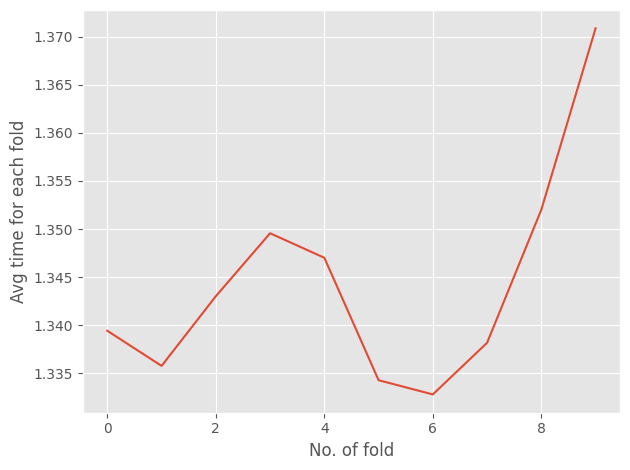

In [117]:
import matplotlib.pyplot as plt

times_mnv2_n = np.zeros((10,100))
for i, row in enumerate(times_mnv2):
    times_mnv2_n[i, :len(row)] = row

times_mnv2_n_n = np.mean(times_mnv2_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_mnv2_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("mnv2 times")
plt.show()

In [118]:
train_acc_mnv2_n = np.zeros((10,100))
for i, row in enumerate(train_acc_mnv2):
    train_acc_mnv2_n[i, :len(row)] = row
    
test_acc_mnv2_n = np.zeros((10,100))
for i, row in enumerate(test_acc_mnv2):
    test_acc_mnv2_n[i, :len(row)] = row
    
train_loss_mnv2_n = np.zeros((10,100))
for i, row in enumerate(train_loss_mnv2):
    train_loss_mnv2_n[i, :len(row)] = row
    
test_loss_mnv2_n = np.zeros((10,100))
for i, row in enumerate(test_loss_mnv2):
    test_loss_mnv2_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_mnv2_n = np.mean(train_acc_mnv2_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_mnv2_n = np.mean(test_acc_mnv2_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_mnv2_n = np.mean(train_loss_mnv2_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_mnv2_n = np.mean(test_loss_mnv2_n,axis=0)

In [119]:
data = [train_acc_mnv2_n,test_acc_mnv2_n,train_loss_mnv2_n,test_loss_mnv2_n]

df = pd.DataFrame(data)
df.to_csv('mnv2_acc', index=False)
df = pd.read_csv('mnv2_acc')

train_acc_mnv2_n = df.iloc[0]
test_acc_mnv2_n = df.iloc[1]
train_loss_mnv2_n = df.iloc[2]
test_loss_mnv2_n = df.iloc[3]


df_t = pd.DataFrame([times_mnv2_n_n])
df_t.to_csv('mnv2_times', index=False)
df_t = pd.read_csv('mnv2_times')

times_mnv2_n_n = df_t.iloc[0]

In [120]:
train_acc_mnv2_n

0     0.440760
1     0.534505
2     0.577514
3     0.608790
4     0.643377
        ...   
95    0.993418
96    0.993704
97    0.993949
98    0.993663
99    0.994154
Name: 0, Length: 100, dtype: float64

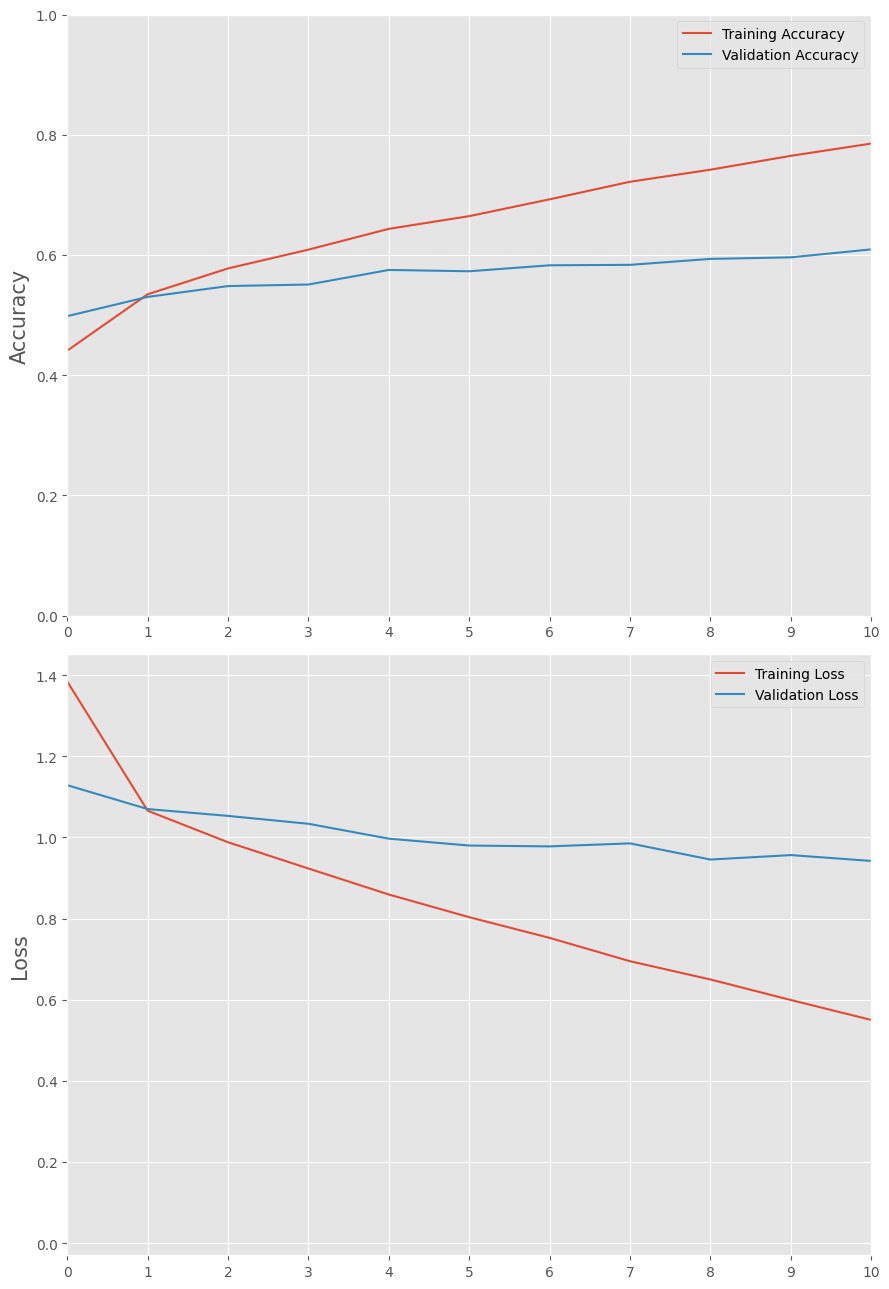

In [121]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_mnv2_n, label='Training Accuracy')
axs[0].plot(test_acc_mnv2_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_mnv2_n, label='Training Loss')
axs[1].plot(test_loss_mnv2_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("mnv2 Training and Testing Loss")
plt.show()

In [122]:
np.array(scores_mnv2).shape

(10, 302, 4)

In [123]:
y_pred_mnv2 = np.argmax(scores_mnv2,axis=2)

In [124]:
y_pred_mnv2.shape

(10, 302)

In [125]:
from sklearn.metrics import accuracy_score
acc_scores_mnv2 = []
for i in range(len(y_test_all_mnv2)):
    acc_scores_mnv2.append(accuracy_score(y_true = y_test_all_mnv2[i],y_pred = y_pred_mnv2[i]))

In [126]:
import gc
gc.collect()

23546

In [127]:
acc_scores_mnv2

[0.6688741721854304,
 0.6655629139072847,
 0.6589403973509934,
 0.6986754966887417,
 0.6655629139072847,
 0.6423841059602649,
 0.6854304635761589,
 0.6589403973509934,
 0.7152317880794702,
 0.7317880794701986]

In [128]:
df_acc = pd.DataFrame([acc_scores_mnv2])

df_acc.to_csv('mnv2_accuracy', index=False)

df_acc = pd.read_csv('mnv2_accuracy')

acc_scores_mnv2 = df_acc.iloc[0].values

In [129]:
y_test_all_n = np.array(y_test_all_mnv2)

y_pred_mnv2_n = y_pred_mnv2.flatten()
y_test_all_n = y_test_all_n.flatten()

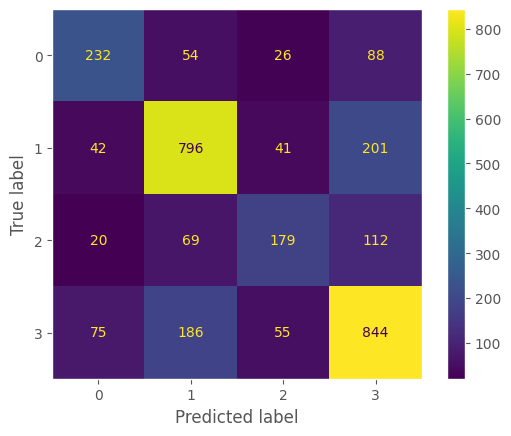

In [130]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_mnv2_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("mnv2")

plt.show()

In [131]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_mnv2_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.63      0.58      0.60       400
           1       0.72      0.74      0.73      1080
           2       0.59      0.47      0.53       380
           3       0.68      0.73      0.70      1160

    accuracy                           0.68      3020
   macro avg       0.66      0.63      0.64      3020
weighted avg       0.68      0.68      0.68      3020



# XceptionV3

In [15]:
import gc
gc.collect()

0

In [16]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_xv3 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_xv3.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [17]:
import gc
gc.collect()

0

In [18]:
def create_model_xv3():
    
    model_xv3 = tf.keras.models.Sequential([
    tf.keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_xv3.trainable = False
    return model_xv3

In [19]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_xv3 = []
y_test_all_xv3 = []
train_acc_xv3 = []
test_acc_xv3 = []
train_loss_xv3 = []
test_loss_xv3 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_xv3.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_xv3 = None
    model_xv3 = create_model_xv3()
        
    model_xv3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_xv3.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_xv3.predict(X_test)
    
    scores_xv3.append(x)
    train_acc_xv3.append(history.history["accuracy"])
    test_acc_xv3.append(history.history["val_accuracy"])
    train_loss_xv3.append(history.history["loss"])
    test_loss_xv3.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 7s 48ms/step - loss: 54.0314 - accuracy: 0.1390 - val_loss: 53.9638 - val_accuracy: 0.1140 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 40ms/step - loss: 54.0699 - accuracy: 0.1390 - val_loss: 53.9638 - val_accuracy: 0.1140 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 40ms/step - loss: 54.6681 - accuracy: 0.1316 - val_loss: 53.9638 - val_accuracy: 0.1140 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 40ms/step - loss: 54.1407 - accuracy: 0.1357 - val_loss: 53.9638 - val_accuracy: 0.1140 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 40ms/step - loss: 54.7038 - accuracy: 0.1386 - val_loss: 53.9638 - val_accuracy: 0.1140 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 41ms/step - loss: 54.2430 - accuracy: 0.1361 - val_loss: 53.9638 - val_accuracy: 0.1140 - lr: 0.0010
Epoch 7/100
77/77 [==============

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 54.0883 - accuracy: 0.1370
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 3.12 seconds
77/77 [==============================] - 3s 41ms/step - loss: 54.0883 - accuracy: 0.1370 - val_loss: 53.9638 - val_accuracy: 0.1140 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 3s 41ms/step - loss: 54.6418 - accuracy: 0.1329 - val_loss: 53.9638 - val_accuracy: 0.1140 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 3s 41ms/step - loss: 54.3470 - accuracy: 0.1390 - val_loss: 53.9638 - val_accuracy: 0.1140 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 41ms/step - loss: 54.1407 - accuracy: 0.1378 - val_loss: 53.9638 - val_accuracy: 0.1140 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 41ms/step - loss: 53.9497 - accuracy: 0.1370 - val_loss: 53.9638 - val_accuracy: 0.1140 - lr: 2

Epoch 85/100
76/77 [============================>.] - ETA: 0s - loss: 54.3657 - accuracy: 0.1349
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 3.15 seconds
77/77 [==============================] - 3s 41ms/step - loss: 54.3555 - accuracy: 0.1349 - val_loss: 53.9638 - val_accuracy: 0.1140 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 3s 41ms/step - loss: 54.3573 - accuracy: 0.1386 - val_loss: 53.9638 - val_accuracy: 0.1140 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 3s 41ms/step - loss: 55.0850 - accuracy: 0.1357 - val_loss: 53.9638 - val_accuracy: 0.1140 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 3s 40ms/step - loss: 54.6521 - accuracy: 0.1378 - val_loss: 53.9638 - val_accuracy: 0.1140 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 3s 41ms/step - loss: 53.9777 - accuracy: 0.1423 - val_loss: 53.9638 - val_accuracy: 0.1140 - lr: 4.

Epoch 13/100
77/77 [==============================] - 3s 41ms/step - loss: 20.9385 - accuracy: 0.2306 - val_loss: 15.2625 - val_accuracy: 0.2426 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 3s 41ms/step - loss: 21.2568 - accuracy: 0.2195 - val_loss: 15.2625 - val_accuracy: 0.2426 - lr: 2.0000e-04
Epoch 15/100
75/77 [============================>.] - ETA: 0s - loss: 20.9434 - accuracy: 0.2267
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 3.10 seconds
77/77 [==============================] - 3s 40ms/step - loss: 20.9294 - accuracy: 0.2265 - val_loss: 15.2625 - val_accuracy: 0.2426 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 3s 40ms/step - loss: 20.8157 - accuracy: 0.2183 - val_loss: 15.2625 - val_accuracy: 0.2426 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 3s 41ms/step - loss: 20.3720 - accuracy: 0.2285 - val_loss: 15.2625 - val_accuracy: 0.2426 - lr: 4

Epoch 41/100
77/77 [==============================] - 3s 41ms/step - loss: 20.5762 - accuracy: 0.2240 - val_loss: 15.2625 - val_accuracy: 0.2426 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 3s 41ms/step - loss: 20.1335 - accuracy: 0.2195 - val_loss: 15.2625 - val_accuracy: 0.2426 - lr: 3.2000e-07
Epoch 43/100
76/77 [============================>.] - ETA: 0s - loss: 21.0102 - accuracy: 0.2208
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 3.15 seconds
77/77 [==============================] - 3s 41ms/step - loss: 20.9107 - accuracy: 0.2216 - val_loss: 15.2625 - val_accuracy: 0.2426 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 3s 41ms/step - loss: 20.6404 - accuracy: 0.2269 - val_loss: 15.2625 - val_accuracy: 0.2426 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 3s 41ms/step - loss: 21.2789 - accuracy: 0.2216 - val_loss: 15.2625 - val_accuracy: 0.2426 - lr: 6.

Epoch 69/100
77/77 [==============================] - 3s 41ms/step - loss: 20.1575 - accuracy: 0.2220 - val_loss: 15.2625 - val_accuracy: 0.2426 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 3s 41ms/step - loss: 20.2926 - accuracy: 0.2285 - val_loss: 15.2625 - val_accuracy: 0.2426 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 20.8787 - accuracy: 0.2253
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 3.16 seconds
77/77 [==============================] - 3s 41ms/step - loss: 20.8787 - accuracy: 0.2253 - val_loss: 15.2625 - val_accuracy: 0.2426 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 3s 41ms/step - loss: 20.5683 - accuracy: 0.2220 - val_loss: 15.2625 - val_accuracy: 0.2426 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 3s 41ms/step - loss: 20.1179 - accuracy: 0.2318 - val_loss: 15.2625 - val_accuracy: 0.2426 - lr: 1

Epoch 97/100
77/77 [==============================] - 3s 41ms/step - loss: 20.4839 - accuracy: 0.2351 - val_loss: 15.2625 - val_accuracy: 0.2426 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 3s 41ms/step - loss: 20.6557 - accuracy: 0.2298 - val_loss: 15.2625 - val_accuracy: 0.2426 - lr: 8.1920e-13
Epoch 99/100
75/77 [============================>.] - ETA: 0s - loss: 20.2377 - accuracy: 0.2296
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 3.14 seconds
77/77 [==============================] - 3s 41ms/step - loss: 20.1068 - accuracy: 0.2298 - val_loss: 15.2625 - val_accuracy: 0.2426 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 1s 36ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 5s 47ms/step - loss: 21.5140 - accuracy: 0.3389 - val_loss: 20.5867 - val_accuracy: 0.2978 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 41ms/ste

Epoch 25/100
77/77 [==============================] - 3s 41ms/step - loss: 21.4071 - accuracy: 0.3389 - val_loss: 20.5867 - val_accuracy: 0.2978 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 3s 40ms/step - loss: 21.3819 - accuracy: 0.3332 - val_loss: 20.5867 - val_accuracy: 0.2978 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 3s 40ms/step - loss: 21.9231 - accuracy: 0.3377 - val_loss: 20.5867 - val_accuracy: 0.2978 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 3s 41ms/step - loss: 21.4072 - accuracy: 0.3406 - val_loss: 20.5867 - val_accuracy: 0.2978 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 20.9461 - accuracy: 0.3389
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 3.14 seconds
77/77 [==============================] - 3s 41ms/step - loss: 20.9461 - accuracy: 0.3389 - val_loss: 20.5867 - val_accuracy: 0.2978 - lr: 8

Epoch 53/100
77/77 [==============================] - 3s 41ms/step - loss: 21.4735 - accuracy: 0.3201 - val_loss: 20.5867 - val_accuracy: 0.2978 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 3s 41ms/step - loss: 21.2367 - accuracy: 0.3340 - val_loss: 20.5867 - val_accuracy: 0.2978 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 3s 41ms/step - loss: 21.9844 - accuracy: 0.3291 - val_loss: 20.5867 - val_accuracy: 0.2978 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 3s 41ms/step - loss: 21.5062 - accuracy: 0.3275 - val_loss: 20.5867 - val_accuracy: 0.2978 - lr: 1.2800e-08
Epoch 57/100
76/77 [============================>.] - ETA: 0s - loss: 21.5652 - accuracy: 0.3351
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 3.14 seconds
77/77 [==============================] - 3s 41ms/step - loss: 21.5844 - accuracy: 0.3352 - val_loss: 20.5867 - val_accuracy: 0.2978 - lr: 1

Epoch 81/100
77/77 [==============================] - 3s 41ms/step - loss: 21.8908 - accuracy: 0.3389 - val_loss: 20.5867 - val_accuracy: 0.2978 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 3s 41ms/step - loss: 21.4873 - accuracy: 0.3385 - val_loss: 20.5867 - val_accuracy: 0.2978 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 3s 41ms/step - loss: 21.3689 - accuracy: 0.3340 - val_loss: 20.5867 - val_accuracy: 0.2978 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 3s 41ms/step - loss: 22.4354 - accuracy: 0.3295 - val_loss: 20.5867 - val_accuracy: 0.2978 - lr: 2.0480e-11
Epoch 85/100
76/77 [============================>.] - ETA: 0s - loss: 21.7952 - accuracy: 0.3372
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 3.16 seconds
77/77 [==============================] - 3s 41ms/step - loss: 21.7224 - accuracy: 0.3377 - val_loss: 20.5867 - val_accuracy: 0.2978 - lr: 2.

Epoch 9/100
77/77 [==============================] - 3s 41ms/step - loss: 45.8304 - accuracy: 0.1263 - val_loss: 50.7035 - val_accuracy: 0.1360 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 3s 41ms/step - loss: 45.4802 - accuracy: 0.1255 - val_loss: 50.7035 - val_accuracy: 0.1360 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 3s 40ms/step - loss: 45.0624 - accuracy: 0.1243 - val_loss: 50.7035 - val_accuracy: 0.1360 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 3s 41ms/step - loss: 44.8611 - accuracy: 0.1218 - val_loss: 50.7035 - val_accuracy: 0.1360 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 3s 41ms/step - loss: 44.7767 - accuracy: 0.1271 - val_loss: 50.7035 - val_accuracy: 0.1360 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 3s 41ms/step - loss: 44.8949 - accuracy: 0.1271 - val_loss: 50.7035 - val_accuracy: 0.1360 - lr: 2.0000e-04
Epoch 15/100
77/77 [=========

Epoch 37/100
77/77 [==============================] - 3s 41ms/step - loss: 44.8463 - accuracy: 0.1296 - val_loss: 50.7035 - val_accuracy: 0.1360 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 3s 41ms/step - loss: 45.2192 - accuracy: 0.1247 - val_loss: 50.7035 - val_accuracy: 0.1360 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 3s 41ms/step - loss: 45.6489 - accuracy: 0.1255 - val_loss: 50.7035 - val_accuracy: 0.1360 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 3s 41ms/step - loss: 45.1106 - accuracy: 0.1247 - val_loss: 50.7035 - val_accuracy: 0.1360 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 3s 41ms/step - loss: 45.1016 - accuracy: 0.1235 - val_loss: 50.7035 - val_accuracy: 0.1360 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 3s 40ms/step - loss: 45.9599 - accuracy: 0.1251 - val_loss: 50.7035 - val_accuracy: 0.1360 - lr: 3.2000e-07
Epoch 43/100
77/77 [========

Epoch 65/100
77/77 [==============================] - 3s 41ms/step - loss: 45.5573 - accuracy: 0.1280 - val_loss: 50.7035 - val_accuracy: 0.1360 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 3s 41ms/step - loss: 45.6822 - accuracy: 0.1247 - val_loss: 50.7035 - val_accuracy: 0.1360 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 3s 41ms/step - loss: 45.6143 - accuracy: 0.1239 - val_loss: 50.7035 - val_accuracy: 0.1360 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 3s 41ms/step - loss: 45.3678 - accuracy: 0.1267 - val_loss: 50.7035 - val_accuracy: 0.1360 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 3s 41ms/step - loss: 45.4545 - accuracy: 0.1259 - val_loss: 50.7035 - val_accuracy: 0.1360 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 3s 41ms/step - loss: 45.5327 - accuracy: 0.1226 - val_loss: 50.7035 - val_accuracy: 0.1360 - lr: 5.1200e-10
Epoch 71/100
76/77 [========

Epoch 93/100
77/77 [==============================] - 3s 41ms/step - loss: 44.7341 - accuracy: 0.1263 - val_loss: 50.7035 - val_accuracy: 0.1360 - lr: 8.1920e-13
Epoch 94/100
77/77 [==============================] - 3s 41ms/step - loss: 45.5449 - accuracy: 0.1259 - val_loss: 50.7035 - val_accuracy: 0.1360 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 3s 41ms/step - loss: 45.6569 - accuracy: 0.1247 - val_loss: 50.7035 - val_accuracy: 0.1360 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 3s 41ms/step - loss: 45.8232 - accuracy: 0.1280 - val_loss: 50.7035 - val_accuracy: 0.1360 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 3s 41ms/step - loss: 45.6192 - accuracy: 0.1251 - val_loss: 50.7035 - val_accuracy: 0.1360 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 3s 41ms/step - loss: 45.7699 - accuracy: 0.1247 - val_loss: 50.7035 - val_accuracy: 0.1360 - lr: 8.1920e-13
Epoch 99/100
77/77 [========

77/77 [==============================] - 3s 41ms/step - loss: 25.6243 - accuracy: 0.2543 - val_loss: 21.1042 - val_accuracy: 0.2647 - lr: 4.0000e-05
Epoch 22/100
75/77 [============================>.] - ETA: 0s - loss: 25.9962 - accuracy: 0.2525
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 3.14 seconds
77/77 [==============================] - 3s 41ms/step - loss: 25.9833 - accuracy: 0.2555 - val_loss: 21.1042 - val_accuracy: 0.2647 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 3s 40ms/step - loss: 25.1903 - accuracy: 0.2661 - val_loss: 21.1042 - val_accuracy: 0.2647 - lr: 8.0000e-06
Epoch 24/100
77/77 [==============================] - 3s 41ms/step - loss: 25.3682 - accuracy: 0.2555 - val_loss: 21.1042 - val_accuracy: 0.2647 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 3s 41ms/step - loss: 25.6955 - accuracy: 0.2535 - val_loss: 21.1042 - val_accuracy: 0.2647 - lr: 8.0000e-06
Epoc

Epoch 49/100
77/77 [==============================] - 3s 41ms/step - loss: 25.8087 - accuracy: 0.2633 - val_loss: 21.1042 - val_accuracy: 0.2647 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 25.1236 - accuracy: 0.2698
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 3.16 seconds
77/77 [==============================] - 3s 41ms/step - loss: 25.1236 - accuracy: 0.2698 - val_loss: 21.1042 - val_accuracy: 0.2647 - lr: 6.4000e-08
Epoch 51/100
77/77 [==============================] - 3s 41ms/step - loss: 26.0715 - accuracy: 0.2559 - val_loss: 21.1042 - val_accuracy: 0.2647 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 3s 41ms/step - loss: 25.4553 - accuracy: 0.2551 - val_loss: 21.1042 - val_accuracy: 0.2647 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 3s 41ms/step - loss: 25.5667 - accuracy: 0.2645 - val_loss: 21.1042 - val_accuracy: 0.2647 - lr: 1

Epoch 77/100
77/77 [==============================] - 3s 41ms/step - loss: 25.3621 - accuracy: 0.2682 - val_loss: 21.1042 - val_accuracy: 0.2647 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 25.3679 - accuracy: 0.2572
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 3.16 seconds
77/77 [==============================] - 3s 41ms/step - loss: 25.3679 - accuracy: 0.2572 - val_loss: 21.1042 - val_accuracy: 0.2647 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 3s 41ms/step - loss: 25.8254 - accuracy: 0.2490 - val_loss: 21.1042 - val_accuracy: 0.2647 - lr: 2.0480e-11
Epoch 80/100
77/77 [==============================] - 3s 41ms/step - loss: 25.7243 - accuracy: 0.2506 - val_loss: 21.1042 - val_accuracy: 0.2647 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 3s 41ms/step - loss: 25.6144 - accuracy: 0.2580 - val_loss: 21.1042 - val_accuracy: 0.2647 - lr: 2

Epoch 5/100
77/77 [==============================] - 3s 41ms/step - loss: 25.5801 - accuracy: 0.1856 - val_loss: 25.1831 - val_accuracy: 0.1213 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 41ms/step - loss: 26.4976 - accuracy: 0.1934 - val_loss: 25.1831 - val_accuracy: 0.1213 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 3s 40ms/step - loss: 25.6974 - accuracy: 0.1864 - val_loss: 25.1831 - val_accuracy: 0.1213 - lr: 0.0010
Epoch 8/100
76/77 [============================>.] - ETA: 0s - loss: 26.8840 - accuracy: 0.1776
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 3.14 seconds
77/77 [==============================] - 3s 41ms/step - loss: 26.9728 - accuracy: 0.1778 - val_loss: 25.1831 - val_accuracy: 0.1213 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 3s 41ms/step - loss: 26.3678 - accuracy: 0.1852 - val_loss: 25.1831 - val_accuracy: 0.1213 - lr: 2.0000e-04
Epoch 10/100


Epoch 33/100
77/77 [==============================] - 3s 41ms/step - loss: 26.4757 - accuracy: 0.1905 - val_loss: 25.1831 - val_accuracy: 0.1213 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 3s 41ms/step - loss: 25.9326 - accuracy: 0.1872 - val_loss: 25.1831 - val_accuracy: 0.1213 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 3s 41ms/step - loss: 26.7310 - accuracy: 0.1860 - val_loss: 25.1831 - val_accuracy: 0.1213 - lr: 1.6000e-06
Epoch 36/100
76/77 [============================>.] - ETA: 0s - loss: 25.8619 - accuracy: 0.1896
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 3.16 seconds
77/77 [==============================] - 3s 41ms/step - loss: 25.7701 - accuracy: 0.1901 - val_loss: 25.1831 - val_accuracy: 0.1213 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 3s 41ms/step - loss: 26.2029 - accuracy: 0.1930 - val_loss: 25.1831 - val_accuracy: 0.1213 - lr: 3.

Epoch 61/100
77/77 [==============================] - 3s 41ms/step - loss: 25.5878 - accuracy: 0.1852 - val_loss: 25.1831 - val_accuracy: 0.1213 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 3s 41ms/step - loss: 26.1757 - accuracy: 0.1795 - val_loss: 25.1831 - val_accuracy: 0.1213 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 3s 41ms/step - loss: 25.9649 - accuracy: 0.1872 - val_loss: 25.1831 - val_accuracy: 0.1213 - lr: 2.5600e-09
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 25.8872 - accuracy: 0.1838
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 3.18 seconds
77/77 [==============================] - 3s 41ms/step - loss: 25.9644 - accuracy: 0.1832 - val_loss: 25.1831 - val_accuracy: 0.1213 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 3s 42ms/step - loss: 26.2862 - accuracy: 0.1766 - val_loss: 25.1831 - val_accuracy: 0.1213 - lr: 5.12

Epoch 89/100
77/77 [==============================] - 3s 41ms/step - loss: 26.1052 - accuracy: 0.1889 - val_loss: 25.1831 - val_accuracy: 0.1213 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 3s 41ms/step - loss: 26.8579 - accuracy: 0.1803 - val_loss: 25.1831 - val_accuracy: 0.1213 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 3s 41ms/step - loss: 26.2340 - accuracy: 0.1827 - val_loss: 25.1831 - val_accuracy: 0.1213 - lr: 4.0960e-12
Epoch 92/100
76/77 [============================>.] - ETA: 0s - loss: 24.9483 - accuracy: 0.1846
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 3.16 seconds
77/77 [==============================] - 3s 41ms/step - loss: 25.0513 - accuracy: 0.1848 - val_loss: 25.1831 - val_accuracy: 0.1213 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 3s 41ms/step - loss: 25.6444 - accuracy: 0.1930 - val_loss: 25.1831 - val_accuracy: 0.1213 - lr: 8.

Epoch 17/100
77/77 [==============================] - 3s 41ms/step - loss: 28.9596 - accuracy: 0.1701 - val_loss: 26.9212 - val_accuracy: 0.1250 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 3s 41ms/step - loss: 28.7970 - accuracy: 0.1603 - val_loss: 26.9212 - val_accuracy: 0.1250 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 3s 41ms/step - loss: 29.0693 - accuracy: 0.1611 - val_loss: 26.9212 - val_accuracy: 0.1250 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 3s 41ms/step - loss: 28.9559 - accuracy: 0.1725 - val_loss: 26.9212 - val_accuracy: 0.1250 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 3s 41ms/step - loss: 29.4621 - accuracy: 0.1578 - val_loss: 26.9212 - val_accuracy: 0.1250 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 28.2475 - accuracy: 0.1701
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for e

Epoch 45/100
77/77 [==============================] - 3s 41ms/step - loss: 28.7963 - accuracy: 0.1643 - val_loss: 26.9212 - val_accuracy: 0.1250 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 3s 41ms/step - loss: 29.7239 - accuracy: 0.1590 - val_loss: 26.9212 - val_accuracy: 0.1250 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 3s 41ms/step - loss: 28.6365 - accuracy: 0.1541 - val_loss: 26.9212 - val_accuracy: 0.1250 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 3s 41ms/step - loss: 28.5672 - accuracy: 0.1558 - val_loss: 26.9212 - val_accuracy: 0.1250 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 3s 41ms/step - loss: 29.3046 - accuracy: 0.1582 - val_loss: 26.9212 - val_accuracy: 0.1250 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 29.0334 - accuracy: 0.1705
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for 

Epoch 73/100
77/77 [==============================] - 3s 41ms/step - loss: 28.9284 - accuracy: 0.1795 - val_loss: 26.9212 - val_accuracy: 0.1250 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 3s 41ms/step - loss: 28.4266 - accuracy: 0.1549 - val_loss: 26.9212 - val_accuracy: 0.1250 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 3s 41ms/step - loss: 29.2138 - accuracy: 0.1529 - val_loss: 26.9212 - val_accuracy: 0.1250 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 3s 41ms/step - loss: 29.0516 - accuracy: 0.1570 - val_loss: 26.9212 - val_accuracy: 0.1250 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 3s 41ms/step - loss: 28.6800 - accuracy: 0.1664 - val_loss: 26.9212 - val_accuracy: 0.1250 - lr: 1.0240e-10
Epoch 78/100
76/77 [============================>.] - ETA: 0s - loss: 29.4927 - accuracy: 0.1600
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for 

10/10 [==============================] - 1s 35ms/step
Training on fold 8/10...
Epoch 1/100
77/77 [==============================] - 5s 46ms/step - loss: 27.5706 - accuracy: 0.1615 - val_loss: 27.6158 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 41ms/step - loss: 27.1848 - accuracy: 0.1603 - val_loss: 27.6158 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 41ms/step - loss: 27.3892 - accuracy: 0.1603 - val_loss: 27.6158 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 41ms/step - loss: 27.2278 - accuracy: 0.1599 - val_loss: 27.6158 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 41ms/step - loss: 27.7252 - accuracy: 0.1590 - val_loss: 27.6158 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 41ms/step - loss: 27.4004 - accuracy: 0.1701 - val_loss: 27.6158 - val_accuracy:

76/77 [============================>.] - ETA: 0s - loss: 27.1797 - accuracy: 0.1669
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 3.13 seconds
77/77 [==============================] - 3s 41ms/step - loss: 27.2195 - accuracy: 0.1668 - val_loss: 27.6158 - val_accuracy: 0.1287 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 41ms/step - loss: 27.1193 - accuracy: 0.1693 - val_loss: 27.6158 - val_accuracy: 0.1287 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 41ms/step - loss: 27.3867 - accuracy: 0.1783 - val_loss: 27.6158 - val_accuracy: 0.1287 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 3s 41ms/step - loss: 27.6237 - accuracy: 0.1623 - val_loss: 27.6158 - val_accuracy: 0.1287 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 3s 41ms/step - loss: 27.2265 - accuracy: 0.1635 - val_loss: 27.6158 - val_accuracy: 0.1287 - lr: 1.6000e-06
Epo

Epoch 57/100
76/77 [============================>.] - ETA: 0s - loss: 27.4247 - accuracy: 0.1628
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 3.14 seconds
77/77 [==============================] - 3s 41ms/step - loss: 27.4877 - accuracy: 0.1627 - val_loss: 27.6158 - val_accuracy: 0.1287 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 3s 41ms/step - loss: 27.5412 - accuracy: 0.1570 - val_loss: 27.6158 - val_accuracy: 0.1287 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 3s 41ms/step - loss: 27.8173 - accuracy: 0.1566 - val_loss: 27.6158 - val_accuracy: 0.1287 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 41ms/step - loss: 27.6110 - accuracy: 0.1635 - val_loss: 27.6158 - val_accuracy: 0.1287 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 41ms/step - loss: 27.6805 - accuracy: 0.1684 - val_loss: 27.6158 - val_accuracy: 0.1287 - lr: 2

Epoch 85/100
76/77 [============================>.] - ETA: 0s - loss: 27.2390 - accuracy: 0.1715
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 3.14 seconds
77/77 [==============================] - 3s 41ms/step - loss: 27.1429 - accuracy: 0.1713 - val_loss: 27.6158 - val_accuracy: 0.1287 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 3s 41ms/step - loss: 27.3416 - accuracy: 0.1705 - val_loss: 27.6158 - val_accuracy: 0.1287 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 3s 41ms/step - loss: 27.2136 - accuracy: 0.1639 - val_loss: 27.6158 - val_accuracy: 0.1287 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 3s 41ms/step - loss: 27.1619 - accuracy: 0.1615 - val_loss: 27.6158 - val_accuracy: 0.1287 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 3s 41ms/step - loss: 27.2690 - accuracy: 0.1762 - val_loss: 27.6158 - val_accuracy: 0.1287 - lr: 4.

Epoch 13/100
77/77 [==============================] - 3s 41ms/step - loss: 18.9872 - accuracy: 0.3058 - val_loss: 16.3539 - val_accuracy: 0.3309 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 3s 40ms/step - loss: 18.9162 - accuracy: 0.3275 - val_loss: 16.3539 - val_accuracy: 0.3309 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 19.7020 - accuracy: 0.3152
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 3.15 seconds
77/77 [==============================] - 3s 41ms/step - loss: 19.7020 - accuracy: 0.3152 - val_loss: 16.3539 - val_accuracy: 0.3309 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 3s 40ms/step - loss: 18.5065 - accuracy: 0.3160 - val_loss: 16.3539 - val_accuracy: 0.3309 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 3s 40ms/step - loss: 19.0332 - accuracy: 0.3128 - val_loss: 16.3539 - val_accuracy: 0.3309 - lr: 4

Epoch 41/100
77/77 [==============================] - 3s 41ms/step - loss: 19.3453 - accuracy: 0.3136 - val_loss: 16.3539 - val_accuracy: 0.3309 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 3s 41ms/step - loss: 19.5524 - accuracy: 0.3156 - val_loss: 16.3539 - val_accuracy: 0.3309 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 19.2360 - accuracy: 0.3148
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 3.15 seconds
77/77 [==============================] - 3s 41ms/step - loss: 19.2360 - accuracy: 0.3148 - val_loss: 16.3539 - val_accuracy: 0.3309 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 3s 42ms/step - loss: 18.1648 - accuracy: 0.3177 - val_loss: 16.3539 - val_accuracy: 0.3309 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 3s 41ms/step - loss: 18.9388 - accuracy: 0.3132 - val_loss: 16.3539 - val_accuracy: 0.3309 - lr: 6.

Epoch 69/100
77/77 [==============================] - 3s 41ms/step - loss: 19.2370 - accuracy: 0.3136 - val_loss: 16.3539 - val_accuracy: 0.3309 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 3s 41ms/step - loss: 19.6120 - accuracy: 0.3168 - val_loss: 16.3539 - val_accuracy: 0.3309 - lr: 5.1200e-10
Epoch 71/100
76/77 [============================>.] - ETA: 0s - loss: 19.1848 - accuracy: 0.3158
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 3.17 seconds
77/77 [==============================] - 3s 41ms/step - loss: 19.1206 - accuracy: 0.3164 - val_loss: 16.3539 - val_accuracy: 0.3309 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 3s 41ms/step - loss: 19.0898 - accuracy: 0.3193 - val_loss: 16.3539 - val_accuracy: 0.3309 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 3s 41ms/step - loss: 18.8742 - accuracy: 0.3078 - val_loss: 16.3539 - val_accuracy: 0.3309 - lr: 1

Epoch 97/100
77/77 [==============================] - 3s 41ms/step - loss: 19.7055 - accuracy: 0.3164 - val_loss: 16.3539 - val_accuracy: 0.3309 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 3s 41ms/step - loss: 19.3094 - accuracy: 0.3062 - val_loss: 16.3539 - val_accuracy: 0.3309 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 19.5972 - accuracy: 0.3119
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 3.17 seconds
77/77 [==============================] - 3s 41ms/step - loss: 19.5972 - accuracy: 0.3119 - val_loss: 16.3539 - val_accuracy: 0.3309 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 1s 35ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 5s 46ms/step - loss: 30.6079 - accuracy: 0.1680 - val_loss: 26.8174 - val_accuracy: 0.1765 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 41ms/st

Epoch 25/100
77/77 [==============================] - 3s 41ms/step - loss: 30.7067 - accuracy: 0.1660 - val_loss: 26.8174 - val_accuracy: 0.1765 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 3s 41ms/step - loss: 30.6880 - accuracy: 0.1566 - val_loss: 26.8174 - val_accuracy: 0.1765 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 3s 41ms/step - loss: 30.6530 - accuracy: 0.1549 - val_loss: 26.8174 - val_accuracy: 0.1765 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 3s 41ms/step - loss: 30.3010 - accuracy: 0.1554 - val_loss: 26.8174 - val_accuracy: 0.1765 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 30.3358 - accuracy: 0.1635
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 3.14 seconds
77/77 [==============================] - 3s 41ms/step - loss: 30.3358 - accuracy: 0.1635 - val_loss: 26.8174 - val_accuracy: 0.1765 - lr: 8

Epoch 53/100
77/77 [==============================] - 3s 41ms/step - loss: 30.4164 - accuracy: 0.1590 - val_loss: 26.8174 - val_accuracy: 0.1765 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 3s 41ms/step - loss: 31.3053 - accuracy: 0.1603 - val_loss: 26.8174 - val_accuracy: 0.1765 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 3s 41ms/step - loss: 30.4765 - accuracy: 0.1599 - val_loss: 26.8174 - val_accuracy: 0.1765 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 3s 41ms/step - loss: 30.9167 - accuracy: 0.1558 - val_loss: 26.8174 - val_accuracy: 0.1765 - lr: 1.2800e-08
Epoch 57/100
76/77 [============================>.] - ETA: 0s - loss: 30.4477 - accuracy: 0.1604
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 3.15 seconds
77/77 [==============================] - 3s 41ms/step - loss: 30.4503 - accuracy: 0.1603 - val_loss: 26.8174 - val_accuracy: 0.1765 - lr: 1

Epoch 81/100
77/77 [==============================] - 3s 41ms/step - loss: 30.8256 - accuracy: 0.1549 - val_loss: 26.8174 - val_accuracy: 0.1765 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 3s 41ms/step - loss: 30.4605 - accuracy: 0.1500 - val_loss: 26.8174 - val_accuracy: 0.1765 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 3s 41ms/step - loss: 30.6195 - accuracy: 0.1611 - val_loss: 26.8174 - val_accuracy: 0.1765 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 3s 41ms/step - loss: 30.4778 - accuracy: 0.1594 - val_loss: 26.8174 - val_accuracy: 0.1765 - lr: 2.0480e-11
Epoch 85/100
75/77 [============================>.] - ETA: 0s - loss: 31.1503 - accuracy: 0.1692
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 3.15 seconds
77/77 [==============================] - 3s 41ms/step - loss: 31.1654 - accuracy: 0.1680 - val_loss: 26.8174 - val_accuracy: 0.1765 - lr: 2.

In [20]:
np.array(y_test_all_xv3).shape

(10, 302)

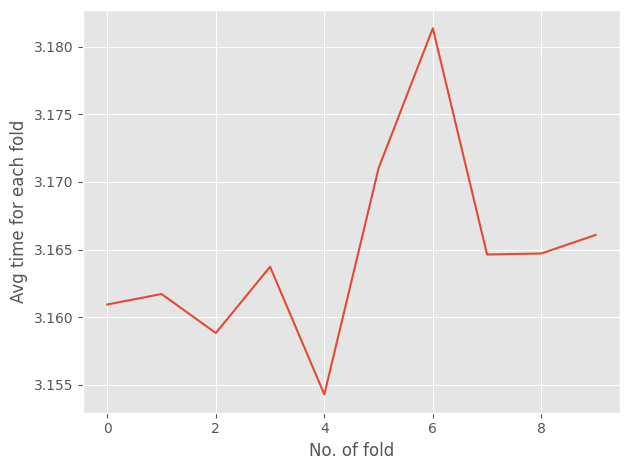

In [21]:
import matplotlib.pyplot as plt

times_xv3_n = np.zeros((10,100))
for i, row in enumerate(times_xv3):
    times_xv3_n[i, :len(row)] = row

times_xv3_n_n = np.mean(times_xv3_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_xv3_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("xv3 times")
plt.show()

In [22]:
train_acc_xv3_n = np.zeros((10,100))
for i, row in enumerate(train_acc_xv3):
    train_acc_xv3_n[i, :len(row)] = row
    
test_acc_xv3_n = np.zeros((10,100))
for i, row in enumerate(test_acc_xv3):
    test_acc_xv3_n[i, :len(row)] = row
    
train_loss_xv3_n = np.zeros((10,100))
for i, row in enumerate(train_loss_xv3):
    train_loss_xv3_n[i, :len(row)] = row
    
test_loss_xv3_n = np.zeros((10,100))
for i, row in enumerate(test_loss_xv3):
    test_loss_xv3_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_xv3_n = np.mean(train_acc_xv3_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_xv3_n = np.mean(test_acc_xv3_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_xv3_n = np.mean(train_loss_xv3_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_xv3_n = np.mean(test_loss_xv3_n,axis=0)

In [23]:
import gc
gc.collect()

3300

In [24]:
data = [train_acc_xv3_n,test_acc_xv3_n,train_loss_xv3_n,test_loss_xv3_n]

df = pd.DataFrame(data)
df.to_csv('xv3_acc', index=False)
df = pd.read_csv('xv3_acc')

train_acc_xv3_n = df.iloc[0]
test_acc_xv3_n = df.iloc[1]
train_loss_xv3_n = df.iloc[2]
test_loss_xv3_n = df.iloc[3]


df_t = pd.DataFrame([times_xv3_n_n])
df_t.to_csv('xv3_times', index=False)
df_t = pd.read_csv('xv3_times')

times_xv3_n_n = df_t.iloc[0]

In [25]:
train_acc_xv3_n

0     0.209199
1     0.207809
2     0.203025
3     0.206909
4     0.207563
        ...   
95    0.208258
96    0.205192
97    0.205765
98    0.207727
99    0.207277
Name: 0, Length: 100, dtype: float64

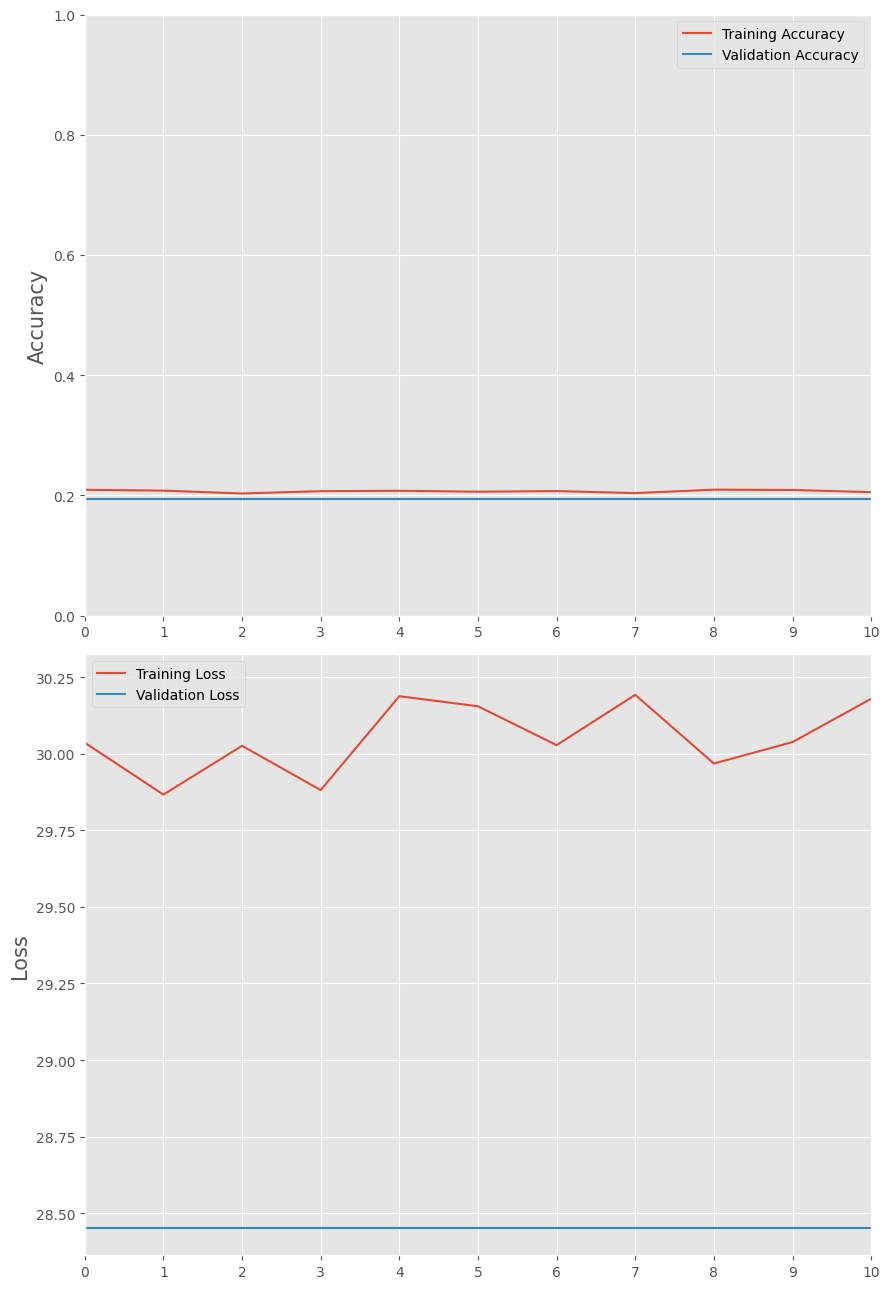

In [26]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_xv3_n, label='Training Accuracy')
axs[0].plot(test_acc_xv3_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_xv3_n, label='Training Loss')
axs[1].plot(test_loss_xv3_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("xv3 Training and Testing Loss")
plt.show()

In [27]:
np.array(scores_xv3).shape

(10, 302, 4)

In [28]:
y_pred_xv3 = np.argmax(scores_xv3,axis=2)

In [29]:
y_pred_xv3.shape

(10, 302)

In [30]:
from sklearn.metrics import accuracy_score
acc_scores_xv3 = []
for i in range(len(y_test_all_xv3)):
    acc_scores_xv3.append(accuracy_score(y_true = y_test_all_xv3[i],y_pred = y_pred_xv3[i]))

In [31]:
import gc
gc.collect()

110

In [32]:
acc_scores_xv3

[0.13245033112582782,
 0.2582781456953642,
 0.3344370860927152,
 0.12582781456953643,
 0.27483443708609273,
 0.152317880794702,
 0.13245033112582782,
 0.1390728476821192,
 0.347682119205298,
 0.1490066225165563]

In [33]:
df_acc = pd.DataFrame([acc_scores_xv3])

df_acc.to_csv('xv3_accuracy', index=False)

df_acc = pd.read_csv('xv3_accuracy')

acc_scores_xv3 = df_acc.iloc[0].values

In [34]:
y_test_all_n = np.array(y_test_all_xv3)

y_pred_xv3_n = y_pred_xv3.flatten()
y_test_all_n = y_test_all_n.flatten()

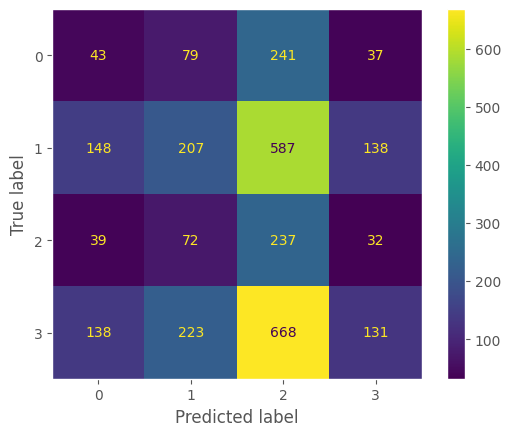

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_xv3_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("xv3")
plt.show()

In [36]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_xv3_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.12      0.11      0.11       400
           1       0.36      0.19      0.25      1080
           2       0.14      0.62      0.22       380
           3       0.39      0.11      0.17      1160

    accuracy                           0.20      3020
   macro avg       0.25      0.26      0.19      3020
weighted avg       0.31      0.20      0.20      3020



# EfficientNetV2L

In [37]:
import gc
gc.collect()

15

In [38]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_env2l = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_env2l.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [39]:
def create_model_env2l():
    
    model_env2l = tf.keras.models.Sequential([
    tf.keras.applications.EfficientNetV2L(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_env2l.trainable = False
    return model_env2l

In [40]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_env2l = []
y_test_all_env2l = []
train_acc_env2l = []
test_acc_env2l = []
train_loss_env2l = []
test_loss_env2l = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_env2l.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_env2l = None
    model_env2l = create_model_env2l()
        
    model_env2l.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_env2l.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_env2l.predict(X_test)
    
    scores_env2l.append(x)
    train_acc_env2l.append(history.history["accuracy"])
    test_acc_env2l.append(history.history["val_accuracy"])
    train_loss_env2l.append(history.history["loss"])
    test_loss_env2l.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 30s 214ms/step - loss: 1.4074 - accuracy: 0.2101 - val_loss: 1.4018 - val_accuracy: 0.2096 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 14s 176ms/step - loss: 1.4075 - accuracy: 0.2261 - val_loss: 1.4018 - val_accuracy: 0.2096 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 13s 173ms/step - loss: 1.4055 - accuracy: 0.2257 - val_loss: 1.4018 - val_accuracy: 0.2096 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 13s 175ms/step - loss: 1.4067 - accuracy: 0.2171 - val_loss: 1.4018 - val_accuracy: 0.2096 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4080 - accuracy: 0.2249 - val_loss: 1.4018 - val_accuracy: 0.2096 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 14s 176ms/step - loss: 1.4105 - accuracy: 0.2085 - val_loss: 1.4018 - val_accuracy: 0.2096 - lr: 0.0010
Epoch 7/100
77/77 [==============

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.4061 - accuracy: 0.2204
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 13.46 seconds
77/77 [==============================] - 13s 175ms/step - loss: 1.4061 - accuracy: 0.2204 - val_loss: 1.4018 - val_accuracy: 0.2096 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 14s 176ms/step - loss: 1.4088 - accuracy: 0.2277 - val_loss: 1.4018 - val_accuracy: 0.2096 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4075 - accuracy: 0.2277 - val_loss: 1.4018 - val_accuracy: 0.2096 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4085 - accuracy: 0.2273 - val_loss: 1.4018 - val_accuracy: 0.2096 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4107 - accuracy: 0.2240 - val_loss: 1.4018 - val_accuracy: 0.2096 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.4047 - accuracy: 0.2191
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 13.49 seconds
77/77 [==============================] - 13s 175ms/step - loss: 1.4047 - accuracy: 0.2191 - val_loss: 1.4018 - val_accuracy: 0.2096 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 14s 176ms/step - loss: 1.4070 - accuracy: 0.2249 - val_loss: 1.4018 - val_accuracy: 0.2096 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 14s 176ms/step - loss: 1.4036 - accuracy: 0.2224 - val_loss: 1.4018 - val_accuracy: 0.2096 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4101 - accuracy: 0.2138 - val_loss: 1.4018 - val_accuracy: 0.2096 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4087 - accuracy: 0.2200 - val_loss: 1.4018 - val_accuracy: 0.2096 - lr: 4.

Epoch 13/100
77/77 [==============================] - 14s 176ms/step - loss: 1.4204 - accuracy: 0.2465 - val_loss: 1.4148 - val_accuracy: 0.2941 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 14s 176ms/step - loss: 1.4229 - accuracy: 0.2302 - val_loss: 1.4148 - val_accuracy: 0.2941 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.4159 - accuracy: 0.2478
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 13.38 seconds
77/77 [==============================] - 13s 174ms/step - loss: 1.4159 - accuracy: 0.2478 - val_loss: 1.4148 - val_accuracy: 0.2941 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 13s 173ms/step - loss: 1.4213 - accuracy: 0.2416 - val_loss: 1.4148 - val_accuracy: 0.2941 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 13s 175ms/step - loss: 1.4226 - accuracy: 0.2314 - val_loss: 1.4148 - val_accuracy: 0.2941 - lr: 4

Epoch 41/100
77/77 [==============================] - 14s 176ms/step - loss: 1.4169 - accuracy: 0.2567 - val_loss: 1.4148 - val_accuracy: 0.2941 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 13s 175ms/step - loss: 1.4156 - accuracy: 0.2486 - val_loss: 1.4148 - val_accuracy: 0.2941 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.4169 - accuracy: 0.2469
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 13.37 seconds
77/77 [==============================] - 13s 174ms/step - loss: 1.4169 - accuracy: 0.2469 - val_loss: 1.4148 - val_accuracy: 0.2941 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 13s 175ms/step - loss: 1.4172 - accuracy: 0.2510 - val_loss: 1.4148 - val_accuracy: 0.2941 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 14s 176ms/step - loss: 1.4184 - accuracy: 0.2285 - val_loss: 1.4148 - val_accuracy: 0.2941 - lr: 6.

Epoch 69/100
77/77 [==============================] - 13s 173ms/step - loss: 1.4173 - accuracy: 0.2453 - val_loss: 1.4148 - val_accuracy: 0.2941 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 13s 173ms/step - loss: 1.4133 - accuracy: 0.2502 - val_loss: 1.4148 - val_accuracy: 0.2941 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.4191 - accuracy: 0.2490
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 13.48 seconds
77/77 [==============================] - 13s 175ms/step - loss: 1.4191 - accuracy: 0.2490 - val_loss: 1.4148 - val_accuracy: 0.2941 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 13s 176ms/step - loss: 1.4223 - accuracy: 0.2363 - val_loss: 1.4148 - val_accuracy: 0.2941 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4197 - accuracy: 0.2420 - val_loss: 1.4148 - val_accuracy: 0.2941 - lr: 1

Epoch 97/100
77/77 [==============================] - 13s 174ms/step - loss: 1.4179 - accuracy: 0.2510 - val_loss: 1.4148 - val_accuracy: 0.2941 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 14s 176ms/step - loss: 1.4212 - accuracy: 0.2527 - val_loss: 1.4148 - val_accuracy: 0.2941 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.4218 - accuracy: 0.2392
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 13.59 seconds
77/77 [==============================] - 14s 177ms/step - loss: 1.4218 - accuracy: 0.2392 - val_loss: 1.4148 - val_accuracy: 0.2941 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 7s 144ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 36s 214ms/step - loss: 1.3941 - accuracy: 0.2776 - val_loss: 1.3824 - val_accuracy: 0.3309 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 13s 174ms/

Epoch 25/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3893 - accuracy: 0.2841 - val_loss: 1.3824 - val_accuracy: 0.3309 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3924 - accuracy: 0.2833 - val_loss: 1.3824 - val_accuracy: 0.3309 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 13s 175ms/step - loss: 1.3937 - accuracy: 0.2682 - val_loss: 1.3824 - val_accuracy: 0.3309 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 14s 179ms/step - loss: 1.3939 - accuracy: 0.2776 - val_loss: 1.3824 - val_accuracy: 0.3309 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.3925 - accuracy: 0.2764
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 13.55 seconds
77/77 [==============================] - 14s 176ms/step - loss: 1.3925 - accuracy: 0.2764 - val_loss: 1.3824 - val_accuracy: 0.3309 - lr: 8

Epoch 53/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3929 - accuracy: 0.2792 - val_loss: 1.3824 - val_accuracy: 0.3309 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3907 - accuracy: 0.2866 - val_loss: 1.3824 - val_accuracy: 0.3309 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 13s 175ms/step - loss: 1.3951 - accuracy: 0.2690 - val_loss: 1.3824 - val_accuracy: 0.3309 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3954 - accuracy: 0.2809 - val_loss: 1.3824 - val_accuracy: 0.3309 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.3971 - accuracy: 0.2768
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 13.68 seconds
77/77 [==============================] - 14s 178ms/step - loss: 1.3971 - accuracy: 0.2768 - val_loss: 1.3824 - val_accuracy: 0.3309 - lr: 1

Epoch 81/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3948 - accuracy: 0.2800 - val_loss: 1.3824 - val_accuracy: 0.3309 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 13s 176ms/step - loss: 1.3923 - accuracy: 0.2739 - val_loss: 1.3824 - val_accuracy: 0.3309 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3915 - accuracy: 0.2845 - val_loss: 1.3824 - val_accuracy: 0.3309 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3928 - accuracy: 0.2772 - val_loss: 1.3824 - val_accuracy: 0.3309 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.3942 - accuracy: 0.2747
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 13.67 seconds
77/77 [==============================] - 14s 178ms/step - loss: 1.3942 - accuracy: 0.2747 - val_loss: 1.3824 - val_accuracy: 0.3309 - lr: 2.

Epoch 9/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3804 - accuracy: 0.2850 - val_loss: 1.3858 - val_accuracy: 0.2831 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 14s 179ms/step - loss: 1.3829 - accuracy: 0.2845 - val_loss: 1.3858 - val_accuracy: 0.2831 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3834 - accuracy: 0.2862 - val_loss: 1.3858 - val_accuracy: 0.2831 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3818 - accuracy: 0.2923 - val_loss: 1.3858 - val_accuracy: 0.2831 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3843 - accuracy: 0.2788 - val_loss: 1.3858 - val_accuracy: 0.2831 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3833 - accuracy: 0.2776 - val_loss: 1.3858 - val_accuracy: 0.2831 - lr: 2.0000e-04
Epoch 15/100
77/77 [=========

Epoch 37/100
77/77 [==============================] - 14s 179ms/step - loss: 1.3814 - accuracy: 0.2895 - val_loss: 1.3858 - val_accuracy: 0.2831 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3829 - accuracy: 0.2805 - val_loss: 1.3858 - val_accuracy: 0.2831 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3810 - accuracy: 0.2854 - val_loss: 1.3858 - val_accuracy: 0.2831 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 13s 176ms/step - loss: 1.3882 - accuracy: 0.2776 - val_loss: 1.3858 - val_accuracy: 0.2831 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3864 - accuracy: 0.2764 - val_loss: 1.3858 - val_accuracy: 0.2831 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 14s 179ms/step - loss: 1.3844 - accuracy: 0.2903 - val_loss: 1.3858 - val_accuracy: 0.2831 - lr: 3.2000e-07
Epoch 43/100
77/77 [========

Epoch 65/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3870 - accuracy: 0.2858 - val_loss: 1.3858 - val_accuracy: 0.2831 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3832 - accuracy: 0.2825 - val_loss: 1.3858 - val_accuracy: 0.2831 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3859 - accuracy: 0.2711 - val_loss: 1.3858 - val_accuracy: 0.2831 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 14s 179ms/step - loss: 1.3867 - accuracy: 0.2694 - val_loss: 1.3858 - val_accuracy: 0.2831 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 14s 179ms/step - loss: 1.3844 - accuracy: 0.2813 - val_loss: 1.3858 - val_accuracy: 0.2831 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 14s 179ms/step - loss: 1.3854 - accuracy: 0.2768 - val_loss: 1.3858 - val_accuracy: 0.2831 - lr: 5.1200e-10
Epoch 71/100
77/77 [========

Epoch 93/100
77/77 [==============================] - 14s 176ms/step - loss: 1.3842 - accuracy: 0.2862 - val_loss: 1.3872 - val_accuracy: 0.2684 - lr: 8.1920e-13
Epoch 94/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3845 - accuracy: 0.2915 - val_loss: 1.3872 - val_accuracy: 0.2684 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3850 - accuracy: 0.2772 - val_loss: 1.3872 - val_accuracy: 0.2684 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 14s 179ms/step - loss: 1.3836 - accuracy: 0.2911 - val_loss: 1.3872 - val_accuracy: 0.2684 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 14s 179ms/step - loss: 1.3831 - accuracy: 0.2915 - val_loss: 1.3872 - val_accuracy: 0.2684 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3841 - accuracy: 0.2890 - val_loss: 1.3872 - val_accuracy: 0.2684 - lr: 8.1920e-13
Epoch 99/100
77/77 [========

77/77 [==============================] - 14s 181ms/step - loss: 1.3754 - accuracy: 0.3160 - val_loss: 1.3684 - val_accuracy: 0.2941 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 1.3751 - accuracy: 0.3201
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 13.93 seconds
77/77 [==============================] - 14s 181ms/step - loss: 1.3751 - accuracy: 0.3201 - val_loss: 1.3684 - val_accuracy: 0.2941 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3698 - accuracy: 0.3328 - val_loss: 1.3684 - val_accuracy: 0.2941 - lr: 8.0000e-06
Epoch 24/100
77/77 [==============================] - 14s 179ms/step - loss: 1.3733 - accuracy: 0.3132 - val_loss: 1.3684 - val_accuracy: 0.2941 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3697 - accuracy: 0.3271 - val_loss: 1.3684 - val_accuracy: 0.2941 - lr: 8.0000e-06
Epoc

Epoch 49/100
77/77 [==============================] - 14s 179ms/step - loss: 1.3782 - accuracy: 0.3078 - val_loss: 1.3684 - val_accuracy: 0.2941 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 1.3710 - accuracy: 0.3128
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 13.85 seconds
77/77 [==============================] - 14s 180ms/step - loss: 1.3710 - accuracy: 0.3128 - val_loss: 1.3684 - val_accuracy: 0.2941 - lr: 6.4000e-08
Epoch 51/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3764 - accuracy: 0.3009 - val_loss: 1.3684 - val_accuracy: 0.2941 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3751 - accuracy: 0.3197 - val_loss: 1.3684 - val_accuracy: 0.2941 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3760 - accuracy: 0.3025 - val_loss: 1.3684 - val_accuracy: 0.2941 - lr: 1

Epoch 77/100
77/77 [==============================] - 14s 179ms/step - loss: 1.3728 - accuracy: 0.2964 - val_loss: 1.3684 - val_accuracy: 0.2941 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 1.3755 - accuracy: 0.3066
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 13.69 seconds
77/77 [==============================] - 14s 178ms/step - loss: 1.3755 - accuracy: 0.3066 - val_loss: 1.3684 - val_accuracy: 0.2941 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3746 - accuracy: 0.3119 - val_loss: 1.3684 - val_accuracy: 0.2941 - lr: 2.0480e-11
Epoch 80/100
77/77 [==============================] - 14s 181ms/step - loss: 1.3719 - accuracy: 0.3222 - val_loss: 1.3684 - val_accuracy: 0.2941 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 14s 181ms/step - loss: 1.3750 - accuracy: 0.3115 - val_loss: 1.3684 - val_accuracy: 0.2941 - lr: 2

Epoch 5/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4652 - accuracy: 0.1860 - val_loss: 1.4885 - val_accuracy: 0.1324 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4711 - accuracy: 0.1742 - val_loss: 1.4885 - val_accuracy: 0.1324 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4705 - accuracy: 0.1778 - val_loss: 1.4885 - val_accuracy: 0.1324 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - ETA: 0s - loss: 1.4679 - accuracy: 0.1791
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 13.63 seconds
77/77 [==============================] - 14s 177ms/step - loss: 1.4679 - accuracy: 0.1791 - val_loss: 1.4885 - val_accuracy: 0.1324 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4624 - accuracy: 0.1856 - val_loss: 1.4885 - val_accuracy: 0.1324 - lr: 2.0000e-04
Epoch 10/100


Epoch 33/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4648 - accuracy: 0.1705 - val_loss: 1.4885 - val_accuracy: 0.1324 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4575 - accuracy: 0.1913 - val_loss: 1.4885 - val_accuracy: 0.1324 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4616 - accuracy: 0.1766 - val_loss: 1.4885 - val_accuracy: 0.1324 - lr: 1.6000e-06
Epoch 36/100
77/77 [==============================] - ETA: 0s - loss: 1.4702 - accuracy: 0.1787
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 13.61 seconds
77/77 [==============================] - 14s 177ms/step - loss: 1.4702 - accuracy: 0.1787 - val_loss: 1.4885 - val_accuracy: 0.1324 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4609 - accuracy: 0.1721 - val_loss: 1.4885 - val_accuracy: 0.1324 - lr: 3.

Epoch 61/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4644 - accuracy: 0.1729 - val_loss: 1.4885 - val_accuracy: 0.1324 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4642 - accuracy: 0.1754 - val_loss: 1.4885 - val_accuracy: 0.1324 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4659 - accuracy: 0.1836 - val_loss: 1.4885 - val_accuracy: 0.1324 - lr: 2.5600e-09
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 1.4695 - accuracy: 0.1811
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 13.77 seconds
77/77 [==============================] - 14s 179ms/step - loss: 1.4695 - accuracy: 0.1811 - val_loss: 1.4885 - val_accuracy: 0.1324 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4634 - accuracy: 0.1832 - val_loss: 1.4885 - val_accuracy: 0.1324 - lr: 5.12

Epoch 89/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4633 - accuracy: 0.1872 - val_loss: 1.4885 - val_accuracy: 0.1324 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4594 - accuracy: 0.1836 - val_loss: 1.4885 - val_accuracy: 0.1324 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4636 - accuracy: 0.1848 - val_loss: 1.4885 - val_accuracy: 0.1324 - lr: 4.0960e-12
Epoch 92/100
77/77 [==============================] - ETA: 0s - loss: 1.4694 - accuracy: 0.1738
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 13.83 seconds
77/77 [==============================] - 14s 180ms/step - loss: 1.4694 - accuracy: 0.1738 - val_loss: 1.4885 - val_accuracy: 0.1324 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4643 - accuracy: 0.1819 - val_loss: 1.4885 - val_accuracy: 0.1324 - lr: 8.

Epoch 17/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4722 - accuracy: 0.1774 - val_loss: 1.4569 - val_accuracy: 0.1838 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4691 - accuracy: 0.1799 - val_loss: 1.4569 - val_accuracy: 0.1838 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4723 - accuracy: 0.1770 - val_loss: 1.4569 - val_accuracy: 0.1838 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4752 - accuracy: 0.1815 - val_loss: 1.4569 - val_accuracy: 0.1838 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4695 - accuracy: 0.1811 - val_loss: 1.4569 - val_accuracy: 0.1838 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 1.4768 - accuracy: 0.1819
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for ep

Epoch 45/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4733 - accuracy: 0.1901 - val_loss: 1.4569 - val_accuracy: 0.1838 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4732 - accuracy: 0.1758 - val_loss: 1.4569 - val_accuracy: 0.1838 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4740 - accuracy: 0.1864 - val_loss: 1.4569 - val_accuracy: 0.1838 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4760 - accuracy: 0.1807 - val_loss: 1.4569 - val_accuracy: 0.1838 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4732 - accuracy: 0.1729 - val_loss: 1.4569 - val_accuracy: 0.1838 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 1.4712 - accuracy: 0.1938
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for e

Epoch 73/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4702 - accuracy: 0.1868 - val_loss: 1.4569 - val_accuracy: 0.1838 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4712 - accuracy: 0.1811 - val_loss: 1.4569 - val_accuracy: 0.1838 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 14s 181ms/step - loss: 1.4758 - accuracy: 0.1783 - val_loss: 1.4569 - val_accuracy: 0.1838 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4720 - accuracy: 0.1750 - val_loss: 1.4569 - val_accuracy: 0.1838 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4757 - accuracy: 0.1758 - val_loss: 1.4569 - val_accuracy: 0.1838 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 1.4697 - accuracy: 0.1758
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for e

10/10 [==============================] - 4s 145ms/step
Training on fold 8/10...
Epoch 1/100
77/77 [==============================] - 38s 226ms/step - loss: 1.5044 - accuracy: 0.1517 - val_loss: 1.5051 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 14s 180ms/step - loss: 1.5020 - accuracy: 0.1582 - val_loss: 1.5051 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 14s 179ms/step - loss: 1.5003 - accuracy: 0.1594 - val_loss: 1.5051 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 14s 179ms/step - loss: 1.5002 - accuracy: 0.1664 - val_loss: 1.5051 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4975 - accuracy: 0.1643 - val_loss: 1.5051 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 14s 179ms/step - loss: 1.5012 - accuracy: 0.1488 - val_loss: 1.5051 - val_accuracy

77/77 [==============================] - ETA: 0s - loss: 1.4980 - accuracy: 0.1476
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 13.78 seconds
77/77 [==============================] - 14s 179ms/step - loss: 1.4980 - accuracy: 0.1476 - val_loss: 1.5051 - val_accuracy: 0.1287 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4974 - accuracy: 0.1533 - val_loss: 1.5051 - val_accuracy: 0.1287 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 14s 179ms/step - loss: 1.5000 - accuracy: 0.1643 - val_loss: 1.5051 - val_accuracy: 0.1287 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4951 - accuracy: 0.1480 - val_loss: 1.5051 - val_accuracy: 0.1287 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 14s 180ms/step - loss: 1.5026 - accuracy: 0.1582 - val_loss: 1.5051 - val_accuracy: 0.1287 - lr: 1.6000e-06
Epo

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.5043 - accuracy: 0.1525
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 13.58 seconds
77/77 [==============================] - 14s 177ms/step - loss: 1.5043 - accuracy: 0.1525 - val_loss: 1.5051 - val_accuracy: 0.1287 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 14s 179ms/step - loss: 1.5005 - accuracy: 0.1566 - val_loss: 1.5051 - val_accuracy: 0.1287 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 14s 180ms/step - loss: 1.5013 - accuracy: 0.1594 - val_loss: 1.5051 - val_accuracy: 0.1287 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4985 - accuracy: 0.1500 - val_loss: 1.5051 - val_accuracy: 0.1287 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 14s 179ms/step - loss: 1.5038 - accuracy: 0.1558 - val_loss: 1.5051 - val_accuracy: 0.1287 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.5034 - accuracy: 0.1496
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 13.76 seconds
77/77 [==============================] - 14s 179ms/step - loss: 1.5034 - accuracy: 0.1496 - val_loss: 1.5051 - val_accuracy: 0.1287 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 14s 180ms/step - loss: 1.5032 - accuracy: 0.1545 - val_loss: 1.5051 - val_accuracy: 0.1287 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 14s 179ms/step - loss: 1.5023 - accuracy: 0.1496 - val_loss: 1.5051 - val_accuracy: 0.1287 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 14s 180ms/step - loss: 1.5024 - accuracy: 0.1545 - val_loss: 1.5051 - val_accuracy: 0.1287 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4992 - accuracy: 0.1525 - val_loss: 1.5051 - val_accuracy: 0.1287 - lr: 4.

Epoch 13/100
77/77 [==============================] - 14s 182ms/step - loss: 1.3601 - accuracy: 0.3340 - val_loss: 1.3616 - val_accuracy: 0.3493 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3634 - accuracy: 0.3406 - val_loss: 1.3616 - val_accuracy: 0.3493 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.3587 - accuracy: 0.3385
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 13.89 seconds
77/77 [==============================] - 14s 181ms/step - loss: 1.3587 - accuracy: 0.3385 - val_loss: 1.3616 - val_accuracy: 0.3493 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 14s 179ms/step - loss: 1.3594 - accuracy: 0.3438 - val_loss: 1.3616 - val_accuracy: 0.3493 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 14s 182ms/step - loss: 1.3629 - accuracy: 0.3352 - val_loss: 1.3616 - val_accuracy: 0.3493 - lr: 4

Epoch 41/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3643 - accuracy: 0.3381 - val_loss: 1.3616 - val_accuracy: 0.3493 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3574 - accuracy: 0.3504 - val_loss: 1.3616 - val_accuracy: 0.3493 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.3609 - accuracy: 0.3393
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 13.95 seconds
77/77 [==============================] - 14s 181ms/step - loss: 1.3609 - accuracy: 0.3393 - val_loss: 1.3616 - val_accuracy: 0.3493 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 14s 181ms/step - loss: 1.3570 - accuracy: 0.3496 - val_loss: 1.3616 - val_accuracy: 0.3493 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 14s 181ms/step - loss: 1.3670 - accuracy: 0.3365 - val_loss: 1.3616 - val_accuracy: 0.3493 - lr: 6.

Epoch 69/100
77/77 [==============================] - 13s 175ms/step - loss: 1.3610 - accuracy: 0.3312 - val_loss: 1.3616 - val_accuracy: 0.3493 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3600 - accuracy: 0.3577 - val_loss: 1.3616 - val_accuracy: 0.3493 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.3631 - accuracy: 0.3361
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 14.00 seconds
77/77 [==============================] - 14s 182ms/step - loss: 1.3631 - accuracy: 0.3361 - val_loss: 1.3616 - val_accuracy: 0.3493 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 14s 183ms/step - loss: 1.3605 - accuracy: 0.3397 - val_loss: 1.3616 - val_accuracy: 0.3493 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3598 - accuracy: 0.3438 - val_loss: 1.3616 - val_accuracy: 0.3493 - lr: 1

Epoch 97/100
77/77 [==============================] - 14s 181ms/step - loss: 1.3572 - accuracy: 0.3418 - val_loss: 1.3616 - val_accuracy: 0.3493 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 14s 181ms/step - loss: 1.3621 - accuracy: 0.3365 - val_loss: 1.3616 - val_accuracy: 0.3493 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.3665 - accuracy: 0.3381
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 13.95 seconds
77/77 [==============================] - 14s 181ms/step - loss: 1.3665 - accuracy: 0.3381 - val_loss: 1.3616 - val_accuracy: 0.3493 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 4s 146ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 34s 217ms/step - loss: 1.4099 - accuracy: 0.2543 - val_loss: 1.3957 - val_accuracy: 0.2574 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 14s 179ms

Epoch 25/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4110 - accuracy: 0.2412 - val_loss: 1.3957 - val_accuracy: 0.2574 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4099 - accuracy: 0.2518 - val_loss: 1.3957 - val_accuracy: 0.2574 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4103 - accuracy: 0.2437 - val_loss: 1.3957 - val_accuracy: 0.2574 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4105 - accuracy: 0.2330 - val_loss: 1.3957 - val_accuracy: 0.2574 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.4046 - accuracy: 0.2518
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 13.84 seconds
77/77 [==============================] - 14s 180ms/step - loss: 1.4046 - accuracy: 0.2518 - val_loss: 1.3957 - val_accuracy: 0.2574 - lr: 8

Epoch 53/100
77/77 [==============================] - 14s 181ms/step - loss: 1.4006 - accuracy: 0.2563 - val_loss: 1.3957 - val_accuracy: 0.2574 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 14s 181ms/step - loss: 1.4123 - accuracy: 0.2539 - val_loss: 1.3957 - val_accuracy: 0.2574 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 14s 181ms/step - loss: 1.4111 - accuracy: 0.2420 - val_loss: 1.3957 - val_accuracy: 0.2574 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 14s 182ms/step - loss: 1.4115 - accuracy: 0.2518 - val_loss: 1.3957 - val_accuracy: 0.2574 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.4078 - accuracy: 0.2478
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 13.92 seconds
77/77 [==============================] - 14s 181ms/step - loss: 1.4078 - accuracy: 0.2478 - val_loss: 1.3957 - val_accuracy: 0.2574 - lr: 1

Epoch 81/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4050 - accuracy: 0.2555 - val_loss: 1.3957 - val_accuracy: 0.2574 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4038 - accuracy: 0.2535 - val_loss: 1.3957 - val_accuracy: 0.2574 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 14s 181ms/step - loss: 1.4077 - accuracy: 0.2576 - val_loss: 1.3957 - val_accuracy: 0.2574 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 14s 181ms/step - loss: 1.4116 - accuracy: 0.2486 - val_loss: 1.3957 - val_accuracy: 0.2574 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.4091 - accuracy: 0.2596
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 13.73 seconds
77/77 [==============================] - 14s 179ms/step - loss: 1.4091 - accuracy: 0.2596 - val_loss: 1.3957 - val_accuracy: 0.2574 - lr: 2.

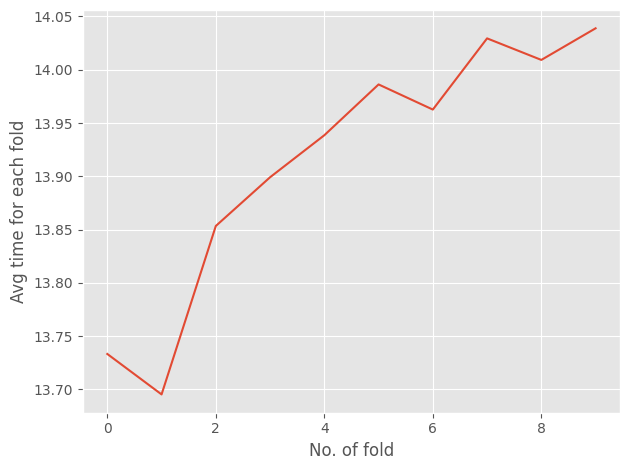

In [41]:
import matplotlib.pyplot as plt

times_env2l_n = np.zeros((10,100))
for i, row in enumerate(times_env2l):
    times_env2l_n[i, :len(row)] = row

times_env2l_n_n = np.mean(times_env2l_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_env2l_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("env2l times")
plt.show()

In [42]:
train_acc_env2l_n = np.zeros((10,100))
for i, row in enumerate(train_acc_env2l):
    train_acc_env2l_n[i, :len(row)] = row
    
test_acc_env2l_n = np.zeros((10,100))
for i, row in enumerate(test_acc_env2l):
    test_acc_env2l_n[i, :len(row)] = row
    
train_loss_env2l_n = np.zeros((10,100))
for i, row in enumerate(train_loss_env2l):
    train_loss_env2l_n[i, :len(row)] = row
    
test_loss_env2l_n = np.zeros((10,100))
for i, row in enumerate(test_loss_env2l):
    test_loss_env2l_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_env2l_n = np.mean(train_acc_env2l_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_env2l_n = np.mean(test_acc_env2l_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_env2l_n = np.mean(train_loss_env2l_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_env2l_n = np.mean(test_loss_env2l_n,axis=0)

In [43]:
data = [train_acc_env2l_n,test_acc_env2l_n,train_loss_env2l_n,test_loss_env2l_n]

df = pd.DataFrame(data)
df.to_csv('env2l_acc', index=False)
df = pd.read_csv('env2l_acc')

train_acc_env2l_n = df.iloc[0]
test_acc_env2l_n = df.iloc[1]
train_loss_env2l_n = df.iloc[2]
test_loss_env2l_n = df.iloc[3]


df_t = pd.DataFrame([times_env2l_n_n])
df_t.to_csv('env2l_times', index=False)
df_t = pd.read_csv('env2l_times')

times_env2l_n_n = df_t.iloc[0]

In [44]:
train_acc_env2l_n

0     0.243418
1     0.246361
2     0.246402
3     0.244154
4     0.244358
        ...   
95    0.243295
96    0.246321
97    0.248446
98    0.245135
99    0.242968
Name: 0, Length: 100, dtype: float64

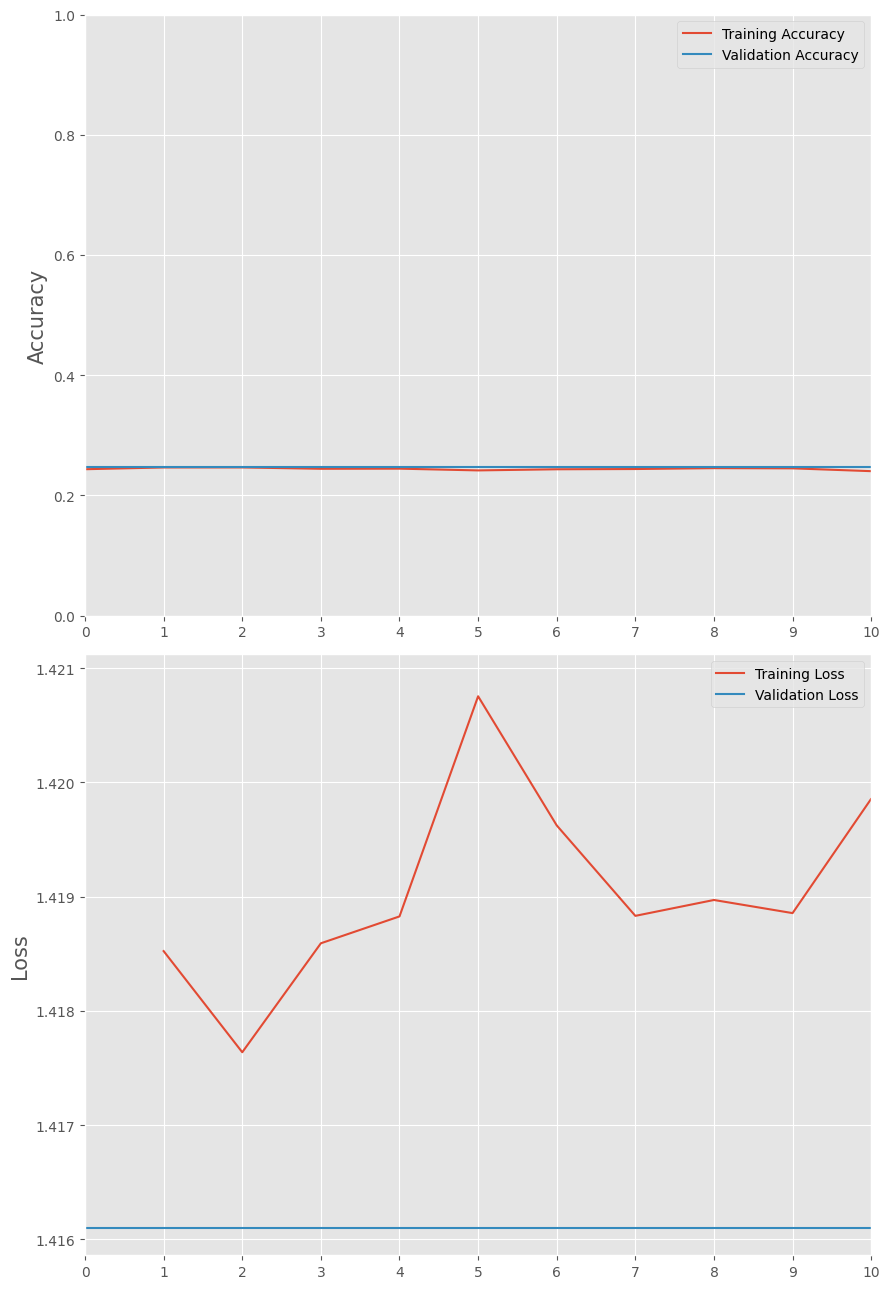

In [45]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_env2l_n, label='Training Accuracy')
axs[0].plot(test_acc_env2l_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_env2l_n, label='Training Loss')
axs[1].plot(test_loss_env2l_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("env2l Training and Testing Loss")
plt.show()

In [46]:
np.array(scores_env2l).shape

(10, 302, 4)

In [47]:
y_pred_env2l = np.argmax(scores_env2l,axis=2)

In [48]:
y_pred_env2l.shape

(10, 302)

In [49]:
from sklearn.metrics import accuracy_score
acc_scores_env2l = []
for i in range(len(y_test_all_env2l)):
    acc_scores_env2l.append(accuracy_score(y_true = y_test_all_env2l[i],y_pred = y_pred_env2l[i]))

In [50]:
import gc
gc.collect()

23980

In [51]:
acc_scores_env2l

[0.20198675496688742,
 0.25165562913907286,
 0.2582781456953642,
 0.31788079470198677,
 0.32450331125827814,
 0.1390728476821192,
 0.1390728476821192,
 0.1357615894039735,
 0.3675496688741722,
 0.18543046357615894]

In [52]:
df_acc = pd.DataFrame([acc_scores_env2l])

df_acc.to_csv('env2l_accuracy', index=False)

df_acc = pd.read_csv('env2l_accuracy')

acc_scores_env2l = df_acc.iloc[0].values

In [53]:
y_test_all_n = np.array(y_test_all_env2l)

y_pred_env2l_n = y_pred_env2l.flatten()
y_test_all_n = y_test_all_n.flatten()

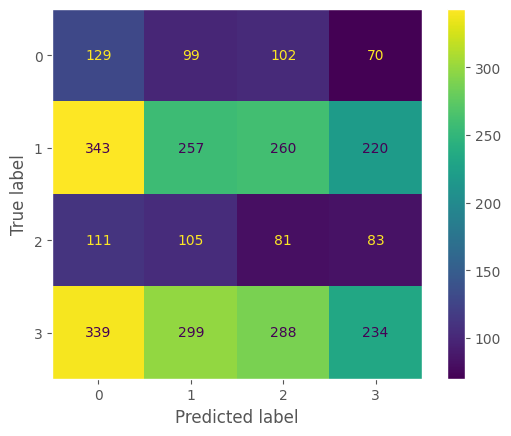

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_env2l_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("env2l")

plt.show()

In [55]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_env2l_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.14      0.32      0.20       400
           1       0.34      0.24      0.28      1080
           2       0.11      0.21      0.15       380
           3       0.39      0.20      0.26      1160

    accuracy                           0.23      3020
   macro avg       0.24      0.24      0.22      3020
weighted avg       0.30      0.23      0.25      3020



# NasNetLarge

In [56]:
import gc
gc.collect()

6220

In [57]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_nnl = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_nnl.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [58]:
import gc
gc.collect()

5

In [59]:
def create_model_nnl():
    
    model_nnl = tf.keras.models.Sequential([
    tf.keras.applications.NASNetLarge(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_nnl.trainable = False
    return model_nnl

In [60]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_nnl = []
y_test_all_nnl = []
train_acc_nnl = []
test_acc_nnl = []
train_loss_nnl = []
test_loss_nnl = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_nnl.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_nnl = None
    model_nnl = create_model_nnl()
        
    model_nnl.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_nnl.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_nnl.predict(X_test)
    
    scores_nnl.append(x)
    train_acc_nnl.append(history.history["accuracy"])
    test_acc_nnl.append(history.history["val_accuracy"])
    train_loss_nnl.append(history.history["loss"])
    test_loss_nnl.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 23s 200ms/step - loss: 1.7473 - accuracy: 0.2821 - val_loss: 1.7240 - val_accuracy: 0.2868 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 13s 163ms/step - loss: 1.7554 - accuracy: 0.2854 - val_loss: 1.7240 - val_accuracy: 0.2868 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 13s 165ms/step - loss: 1.7541 - accuracy: 0.2858 - val_loss: 1.7240 - val_accuracy: 0.2868 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 13s 166ms/step - loss: 1.7624 - accuracy: 0.2874 - val_loss: 1.7240 - val_accuracy: 0.2868 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 13s 167ms/step - loss: 1.7405 - accuracy: 0.2829 - val_loss: 1.7240 - val_accuracy: 0.2868 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 13s 166ms/step - loss: 1.7473 - accuracy: 0.2751 - val_loss: 1.7240 - val_accuracy: 0.2868 - lr: 0.0010
Epoch 7/100
77/77 [==============

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.7445 - accuracy: 0.2792
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 12.76 seconds
77/77 [==============================] - 13s 166ms/step - loss: 1.7445 - accuracy: 0.2792 - val_loss: 1.7240 - val_accuracy: 0.2868 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 13s 166ms/step - loss: 1.7447 - accuracy: 0.2768 - val_loss: 1.7240 - val_accuracy: 0.2868 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 13s 167ms/step - loss: 1.7579 - accuracy: 0.2784 - val_loss: 1.7240 - val_accuracy: 0.2868 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 13s 167ms/step - loss: 1.7413 - accuracy: 0.2919 - val_loss: 1.7240 - val_accuracy: 0.2868 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 13s 167ms/step - loss: 1.7577 - accuracy: 0.2809 - val_loss: 1.7240 - val_accuracy: 0.2868 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.7535 - accuracy: 0.2833
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 12.77 seconds
77/77 [==============================] - 13s 166ms/step - loss: 1.7535 - accuracy: 0.2833 - val_loss: 1.7240 - val_accuracy: 0.2868 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 13s 167ms/step - loss: 1.7588 - accuracy: 0.2878 - val_loss: 1.7240 - val_accuracy: 0.2868 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 13s 167ms/step - loss: 1.7557 - accuracy: 0.2841 - val_loss: 1.7240 - val_accuracy: 0.2868 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 13s 167ms/step - loss: 1.7390 - accuracy: 0.2866 - val_loss: 1.7240 - val_accuracy: 0.2868 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 13s 167ms/step - loss: 1.7384 - accuracy: 0.2862 - val_loss: 1.7240 - val_accuracy: 0.2868 - lr: 4.

Epoch 13/100
77/77 [==============================] - 13s 166ms/step - loss: 1.5858 - accuracy: 0.3438 - val_loss: 1.5174 - val_accuracy: 0.3713 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 13s 167ms/step - loss: 1.5737 - accuracy: 0.3426 - val_loss: 1.5174 - val_accuracy: 0.3713 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.5796 - accuracy: 0.3401
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 12.86 seconds
77/77 [==============================] - 13s 167ms/step - loss: 1.5796 - accuracy: 0.3401 - val_loss: 1.5174 - val_accuracy: 0.3713 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 13s 166ms/step - loss: 1.5697 - accuracy: 0.3463 - val_loss: 1.5174 - val_accuracy: 0.3713 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 13s 167ms/step - loss: 1.5583 - accuracy: 0.3430 - val_loss: 1.5174 - val_accuracy: 0.3713 - lr: 4

Epoch 41/100
77/77 [==============================] - 13s 166ms/step - loss: 1.5600 - accuracy: 0.3500 - val_loss: 1.5174 - val_accuracy: 0.3713 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 13s 167ms/step - loss: 1.5758 - accuracy: 0.3438 - val_loss: 1.5174 - val_accuracy: 0.3713 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.5721 - accuracy: 0.3491
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 12.77 seconds
77/77 [==============================] - 13s 166ms/step - loss: 1.5721 - accuracy: 0.3491 - val_loss: 1.5174 - val_accuracy: 0.3713 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 13s 166ms/step - loss: 1.5707 - accuracy: 0.3528 - val_loss: 1.5174 - val_accuracy: 0.3713 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 13s 167ms/step - loss: 1.5710 - accuracy: 0.3426 - val_loss: 1.5174 - val_accuracy: 0.3713 - lr: 6.

Epoch 69/100
77/77 [==============================] - 13s 167ms/step - loss: 1.5738 - accuracy: 0.3369 - val_loss: 1.5174 - val_accuracy: 0.3713 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 13s 166ms/step - loss: 1.5591 - accuracy: 0.3520 - val_loss: 1.5174 - val_accuracy: 0.3713 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.5768 - accuracy: 0.3414
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 12.81 seconds
77/77 [==============================] - 13s 167ms/step - loss: 1.5768 - accuracy: 0.3414 - val_loss: 1.5174 - val_accuracy: 0.3713 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 13s 166ms/step - loss: 1.5680 - accuracy: 0.3483 - val_loss: 1.5174 - val_accuracy: 0.3713 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 13s 166ms/step - loss: 1.5909 - accuracy: 0.3361 - val_loss: 1.5174 - val_accuracy: 0.3713 - lr: 1

Epoch 97/100
77/77 [==============================] - 13s 166ms/step - loss: 1.5777 - accuracy: 0.3483 - val_loss: 1.5174 - val_accuracy: 0.3713 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 13s 168ms/step - loss: 1.5946 - accuracy: 0.3361 - val_loss: 1.5174 - val_accuracy: 0.3713 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.5704 - accuracy: 0.3471
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 12.78 seconds
77/77 [==============================] - 13s 166ms/step - loss: 1.5704 - accuracy: 0.3471 - val_loss: 1.5174 - val_accuracy: 0.3713 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 4s 143ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 25s 208ms/step - loss: 1.4747 - accuracy: 0.3152 - val_loss: 1.3893 - val_accuracy: 0.3382 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 13s 165ms/

Epoch 25/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4769 - accuracy: 0.3144 - val_loss: 1.3893 - val_accuracy: 0.3382 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4888 - accuracy: 0.3164 - val_loss: 1.3893 - val_accuracy: 0.3382 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4786 - accuracy: 0.3209 - val_loss: 1.3893 - val_accuracy: 0.3382 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4648 - accuracy: 0.3128 - val_loss: 1.3893 - val_accuracy: 0.3382 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.4816 - accuracy: 0.3123
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 12.87 seconds
77/77 [==============================] - 13s 167ms/step - loss: 1.4816 - accuracy: 0.3123 - val_loss: 1.3893 - val_accuracy: 0.3382 - lr: 8

Epoch 53/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4789 - accuracy: 0.3156 - val_loss: 1.3893 - val_accuracy: 0.3382 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4903 - accuracy: 0.3164 - val_loss: 1.3893 - val_accuracy: 0.3382 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4762 - accuracy: 0.3148 - val_loss: 1.3893 - val_accuracy: 0.3382 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4749 - accuracy: 0.3238 - val_loss: 1.3893 - val_accuracy: 0.3382 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.4735 - accuracy: 0.3217
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 12.88 seconds
77/77 [==============================] - 13s 168ms/step - loss: 1.4735 - accuracy: 0.3217 - val_loss: 1.3893 - val_accuracy: 0.3382 - lr: 1

Epoch 81/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4833 - accuracy: 0.3103 - val_loss: 1.3893 - val_accuracy: 0.3382 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4831 - accuracy: 0.3050 - val_loss: 1.3893 - val_accuracy: 0.3382 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4851 - accuracy: 0.3222 - val_loss: 1.3893 - val_accuracy: 0.3382 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4792 - accuracy: 0.3095 - val_loss: 1.3893 - val_accuracy: 0.3382 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.4706 - accuracy: 0.3181
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 12.97 seconds
77/77 [==============================] - 13s 169ms/step - loss: 1.4706 - accuracy: 0.3181 - val_loss: 1.3893 - val_accuracy: 0.3382 - lr: 2.

Epoch 9/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4753 - accuracy: 0.2989 - val_loss: 1.4091 - val_accuracy: 0.3346 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4805 - accuracy: 0.2911 - val_loss: 1.4091 - val_accuracy: 0.3346 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4867 - accuracy: 0.2919 - val_loss: 1.4091 - val_accuracy: 0.3346 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4827 - accuracy: 0.2886 - val_loss: 1.4091 - val_accuracy: 0.3346 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4961 - accuracy: 0.2858 - val_loss: 1.4091 - val_accuracy: 0.3346 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4801 - accuracy: 0.2972 - val_loss: 1.4091 - val_accuracy: 0.3346 - lr: 2.0000e-04
Epoch 15/100
77/77 [=========

Epoch 37/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4878 - accuracy: 0.2984 - val_loss: 1.4091 - val_accuracy: 0.3346 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 13s 168ms/step - loss: 1.4791 - accuracy: 0.3025 - val_loss: 1.4091 - val_accuracy: 0.3346 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4969 - accuracy: 0.2841 - val_loss: 1.4091 - val_accuracy: 0.3346 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4770 - accuracy: 0.3038 - val_loss: 1.4091 - val_accuracy: 0.3346 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 13s 165ms/step - loss: 1.4799 - accuracy: 0.3123 - val_loss: 1.4091 - val_accuracy: 0.3346 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4832 - accuracy: 0.3001 - val_loss: 1.4091 - val_accuracy: 0.3346 - lr: 3.2000e-07
Epoch 43/100
77/77 [========

Epoch 65/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4742 - accuracy: 0.3038 - val_loss: 1.4091 - val_accuracy: 0.3346 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4745 - accuracy: 0.2927 - val_loss: 1.4091 - val_accuracy: 0.3346 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 13s 168ms/step - loss: 1.5066 - accuracy: 0.2817 - val_loss: 1.4091 - val_accuracy: 0.3346 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 13s 165ms/step - loss: 1.4805 - accuracy: 0.3050 - val_loss: 1.4091 - val_accuracy: 0.3346 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 13s 165ms/step - loss: 1.4912 - accuracy: 0.2984 - val_loss: 1.4091 - val_accuracy: 0.3346 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4933 - accuracy: 0.2919 - val_loss: 1.4091 - val_accuracy: 0.3346 - lr: 5.1200e-10
Epoch 71/100
77/77 [========

Epoch 93/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4926 - accuracy: 0.2944 - val_loss: 1.4091 - val_accuracy: 0.3346 - lr: 8.1920e-13
Epoch 94/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4694 - accuracy: 0.3074 - val_loss: 1.4091 - val_accuracy: 0.3346 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4941 - accuracy: 0.2927 - val_loss: 1.4091 - val_accuracy: 0.3346 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4847 - accuracy: 0.2890 - val_loss: 1.4091 - val_accuracy: 0.3346 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4812 - accuracy: 0.2907 - val_loss: 1.4091 - val_accuracy: 0.3346 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 13s 167ms/step - loss: 1.4933 - accuracy: 0.2948 - val_loss: 1.4091 - val_accuracy: 0.3346 - lr: 8.1920e-13
Epoch 99/100
77/77 [========

77/77 [==============================] - 13s 168ms/step - loss: 1.6895 - accuracy: 0.1897 - val_loss: 1.5576 - val_accuracy: 0.1618 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 1.6634 - accuracy: 0.2077
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 12.78 seconds
77/77 [==============================] - 13s 166ms/step - loss: 1.6634 - accuracy: 0.2077 - val_loss: 1.5576 - val_accuracy: 0.1618 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 13s 166ms/step - loss: 1.6814 - accuracy: 0.2016 - val_loss: 1.5576 - val_accuracy: 0.1618 - lr: 8.0000e-06
Epoch 24/100
77/77 [==============================] - 13s 167ms/step - loss: 1.6685 - accuracy: 0.1966 - val_loss: 1.5576 - val_accuracy: 0.1618 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 13s 168ms/step - loss: 1.6773 - accuracy: 0.1979 - val_loss: 1.5576 - val_accuracy: 0.1618 - lr: 8.0000e-06
Epoc

Epoch 49/100
77/77 [==============================] - 13s 167ms/step - loss: 1.6762 - accuracy: 0.2040 - val_loss: 1.5576 - val_accuracy: 0.1618 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 1.6721 - accuracy: 0.2220
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 12.73 seconds
77/77 [==============================] - 13s 166ms/step - loss: 1.6721 - accuracy: 0.2220 - val_loss: 1.5576 - val_accuracy: 0.1618 - lr: 6.4000e-08
Epoch 51/100
77/77 [==============================] - 13s 165ms/step - loss: 1.6765 - accuracy: 0.2097 - val_loss: 1.5576 - val_accuracy: 0.1618 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 13s 167ms/step - loss: 1.6675 - accuracy: 0.1979 - val_loss: 1.5576 - val_accuracy: 0.1618 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 13s 167ms/step - loss: 1.6795 - accuracy: 0.1975 - val_loss: 1.5576 - val_accuracy: 0.1618 - lr: 1

Epoch 77/100
77/77 [==============================] - 13s 168ms/step - loss: 1.6763 - accuracy: 0.2056 - val_loss: 1.5576 - val_accuracy: 0.1618 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 1.6640 - accuracy: 0.2061
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 12.73 seconds
77/77 [==============================] - 13s 166ms/step - loss: 1.6640 - accuracy: 0.2061 - val_loss: 1.5576 - val_accuracy: 0.1618 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 13s 166ms/step - loss: 1.6781 - accuracy: 0.2110 - val_loss: 1.5576 - val_accuracy: 0.1618 - lr: 2.0480e-11
Epoch 80/100
77/77 [==============================] - 13s 166ms/step - loss: 1.6867 - accuracy: 0.1942 - val_loss: 1.5576 - val_accuracy: 0.1618 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 13s 168ms/step - loss: 1.6723 - accuracy: 0.2007 - val_loss: 1.5576 - val_accuracy: 0.1618 - lr: 2

Epoch 5/100
77/77 [==============================] - 13s 164ms/step - loss: 2.0241 - accuracy: 0.1934 - val_loss: 1.9368 - val_accuracy: 0.1654 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 13s 165ms/step - loss: 1.9843 - accuracy: 0.2011 - val_loss: 1.9368 - val_accuracy: 0.1654 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 13s 167ms/step - loss: 2.0000 - accuracy: 0.1922 - val_loss: 1.9368 - val_accuracy: 0.1654 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - ETA: 0s - loss: 2.0040 - accuracy: 0.1922
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 12.82 seconds
77/77 [==============================] - 13s 167ms/step - loss: 2.0040 - accuracy: 0.1922 - val_loss: 1.9368 - val_accuracy: 0.1654 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 13s 166ms/step - loss: 2.0042 - accuracy: 0.1958 - val_loss: 1.9368 - val_accuracy: 0.1654 - lr: 2.0000e-04
Epoch 10/100


Epoch 33/100
77/77 [==============================] - 13s 166ms/step - loss: 1.9968 - accuracy: 0.1901 - val_loss: 1.9368 - val_accuracy: 0.1654 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 13s 166ms/step - loss: 2.0086 - accuracy: 0.1877 - val_loss: 1.9368 - val_accuracy: 0.1654 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 13s 167ms/step - loss: 2.0113 - accuracy: 0.2011 - val_loss: 1.9368 - val_accuracy: 0.1654 - lr: 1.6000e-06
Epoch 36/100
77/77 [==============================] - ETA: 0s - loss: 2.0230 - accuracy: 0.1897
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 12.80 seconds
77/77 [==============================] - 13s 166ms/step - loss: 2.0230 - accuracy: 0.1897 - val_loss: 1.9368 - val_accuracy: 0.1654 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 13s 167ms/step - loss: 2.0427 - accuracy: 0.1856 - val_loss: 1.9368 - val_accuracy: 0.1654 - lr: 3.

Epoch 61/100
77/77 [==============================] - 13s 165ms/step - loss: 2.0191 - accuracy: 0.1954 - val_loss: 1.9368 - val_accuracy: 0.1654 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 13s 165ms/step - loss: 2.0267 - accuracy: 0.1856 - val_loss: 1.9368 - val_accuracy: 0.1654 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 13s 167ms/step - loss: 2.0132 - accuracy: 0.1868 - val_loss: 1.9368 - val_accuracy: 0.1654 - lr: 2.5600e-09
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 2.0146 - accuracy: 0.2024
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 12.80 seconds
77/77 [==============================] - 13s 167ms/step - loss: 2.0146 - accuracy: 0.2024 - val_loss: 1.9368 - val_accuracy: 0.1654 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 13s 168ms/step - loss: 2.0038 - accuracy: 0.1864 - val_loss: 1.9368 - val_accuracy: 0.1654 - lr: 5.12

Epoch 89/100
77/77 [==============================] - 13s 165ms/step - loss: 2.0188 - accuracy: 0.1881 - val_loss: 1.9368 - val_accuracy: 0.1654 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 13s 165ms/step - loss: 1.9980 - accuracy: 0.1922 - val_loss: 1.9368 - val_accuracy: 0.1654 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 13s 166ms/step - loss: 1.9909 - accuracy: 0.1995 - val_loss: 1.9368 - val_accuracy: 0.1654 - lr: 4.0960e-12
Epoch 92/100
77/77 [==============================] - ETA: 0s - loss: 2.0159 - accuracy: 0.1872
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 12.77 seconds
77/77 [==============================] - 13s 166ms/step - loss: 2.0159 - accuracy: 0.1872 - val_loss: 1.9368 - val_accuracy: 0.1654 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 13s 166ms/step - loss: 2.0011 - accuracy: 0.1954 - val_loss: 1.9368 - val_accuracy: 0.1654 - lr: 8.

Epoch 17/100
77/77 [==============================] - 13s 167ms/step - loss: 1.6678 - accuracy: 0.1733 - val_loss: 1.5962 - val_accuracy: 0.1324 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 13s 169ms/step - loss: 1.7014 - accuracy: 0.1832 - val_loss: 1.5962 - val_accuracy: 0.1324 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 13s 167ms/step - loss: 1.6715 - accuracy: 0.1799 - val_loss: 1.5962 - val_accuracy: 0.1324 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 13s 168ms/step - loss: 1.6836 - accuracy: 0.1852 - val_loss: 1.5962 - val_accuracy: 0.1324 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 13s 167ms/step - loss: 1.6680 - accuracy: 0.1795 - val_loss: 1.5962 - val_accuracy: 0.1324 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 1.6644 - accuracy: 0.1823
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for ep

Epoch 45/100
77/77 [==============================] - 13s 166ms/step - loss: 1.6733 - accuracy: 0.1762 - val_loss: 1.5962 - val_accuracy: 0.1324 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 13s 165ms/step - loss: 1.6776 - accuracy: 0.1832 - val_loss: 1.5962 - val_accuracy: 0.1324 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 13s 167ms/step - loss: 1.6612 - accuracy: 0.1864 - val_loss: 1.5962 - val_accuracy: 0.1324 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 13s 167ms/step - loss: 1.6613 - accuracy: 0.1803 - val_loss: 1.5962 - val_accuracy: 0.1324 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 13s 167ms/step - loss: 1.6720 - accuracy: 0.1807 - val_loss: 1.5962 - val_accuracy: 0.1324 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 1.6690 - accuracy: 0.1827
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for e

Epoch 73/100
77/77 [==============================] - 13s 166ms/step - loss: 1.6773 - accuracy: 0.1783 - val_loss: 1.5962 - val_accuracy: 0.1324 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 13s 166ms/step - loss: 1.6797 - accuracy: 0.1721 - val_loss: 1.5962 - val_accuracy: 0.1324 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 13s 166ms/step - loss: 1.6695 - accuracy: 0.1803 - val_loss: 1.5962 - val_accuracy: 0.1324 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 13s 166ms/step - loss: 1.6796 - accuracy: 0.1717 - val_loss: 1.5962 - val_accuracy: 0.1324 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 13s 166ms/step - loss: 1.6794 - accuracy: 0.1729 - val_loss: 1.5962 - val_accuracy: 0.1324 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 1.6673 - accuracy: 0.1905
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for e

10/10 [==============================] - 4s 141ms/step
Training on fold 8/10...
Epoch 1/100
77/77 [==============================] - 30s 201ms/step - loss: 1.7616 - accuracy: 0.1897 - val_loss: 1.6718 - val_accuracy: 0.1912 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 13s 166ms/step - loss: 1.7945 - accuracy: 0.1733 - val_loss: 1.6718 - val_accuracy: 0.1912 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 13s 164ms/step - loss: 1.7701 - accuracy: 0.1787 - val_loss: 1.6718 - val_accuracy: 0.1912 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 13s 164ms/step - loss: 1.7636 - accuracy: 0.1856 - val_loss: 1.6718 - val_accuracy: 0.1912 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 13s 165ms/step - loss: 1.7696 - accuracy: 0.1946 - val_loss: 1.6718 - val_accuracy: 0.1912 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 13s 164ms/step - loss: 1.7610 - accuracy: 0.1864 - val_loss: 1.6718 - val_accuracy

77/77 [==============================] - ETA: 0s - loss: 1.7567 - accuracy: 0.1832
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 12.78 seconds
77/77 [==============================] - 13s 166ms/step - loss: 1.7567 - accuracy: 0.1832 - val_loss: 1.6718 - val_accuracy: 0.1912 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 13s 166ms/step - loss: 1.7670 - accuracy: 0.1750 - val_loss: 1.6718 - val_accuracy: 0.1912 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 13s 168ms/step - loss: 1.7674 - accuracy: 0.1860 - val_loss: 1.6718 - val_accuracy: 0.1912 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 13s 168ms/step - loss: 1.7812 - accuracy: 0.1852 - val_loss: 1.6718 - val_accuracy: 0.1912 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 13s 167ms/step - loss: 1.7464 - accuracy: 0.1999 - val_loss: 1.6718 - val_accuracy: 0.1912 - lr: 1.6000e-06
Epo

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.7623 - accuracy: 0.1864
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 12.71 seconds
77/77 [==============================] - 13s 165ms/step - loss: 1.7623 - accuracy: 0.1864 - val_loss: 1.6718 - val_accuracy: 0.1912 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 13s 166ms/step - loss: 1.7614 - accuracy: 0.1950 - val_loss: 1.6718 - val_accuracy: 0.1912 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 13s 167ms/step - loss: 1.7771 - accuracy: 0.1827 - val_loss: 1.6718 - val_accuracy: 0.1912 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 13s 166ms/step - loss: 1.7678 - accuracy: 0.1905 - val_loss: 1.6718 - val_accuracy: 0.1912 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 13s 167ms/step - loss: 1.7689 - accuracy: 0.2032 - val_loss: 1.6718 - val_accuracy: 0.1912 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.7570 - accuracy: 0.1934
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 12.78 seconds
77/77 [==============================] - 13s 166ms/step - loss: 1.7570 - accuracy: 0.1934 - val_loss: 1.6718 - val_accuracy: 0.1912 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 13s 166ms/step - loss: 1.7640 - accuracy: 0.1971 - val_loss: 1.6718 - val_accuracy: 0.1912 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 13s 167ms/step - loss: 1.7622 - accuracy: 0.1815 - val_loss: 1.6718 - val_accuracy: 0.1912 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 13s 166ms/step - loss: 1.7664 - accuracy: 0.1827 - val_loss: 1.6718 - val_accuracy: 0.1912 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 13s 166ms/step - loss: 1.7780 - accuracy: 0.1926 - val_loss: 1.6718 - val_accuracy: 0.1912 - lr: 4.

Epoch 13/100
77/77 [==============================] - 13s 169ms/step - loss: 1.5816 - accuracy: 0.2277 - val_loss: 1.4778 - val_accuracy: 0.2610 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 13s 168ms/step - loss: 1.5754 - accuracy: 0.2216 - val_loss: 1.4778 - val_accuracy: 0.2610 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.5761 - accuracy: 0.2249
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 12.88 seconds
77/77 [==============================] - 13s 168ms/step - loss: 1.5761 - accuracy: 0.2249 - val_loss: 1.4778 - val_accuracy: 0.2610 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 13s 168ms/step - loss: 1.5707 - accuracy: 0.2183 - val_loss: 1.4778 - val_accuracy: 0.2610 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 13s 166ms/step - loss: 1.5803 - accuracy: 0.2236 - val_loss: 1.4778 - val_accuracy: 0.2610 - lr: 4

Epoch 41/100
77/77 [==============================] - 13s 166ms/step - loss: 1.5774 - accuracy: 0.2253 - val_loss: 1.4778 - val_accuracy: 0.2610 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 13s 167ms/step - loss: 1.5711 - accuracy: 0.2216 - val_loss: 1.4778 - val_accuracy: 0.2610 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.5668 - accuracy: 0.2298
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 12.87 seconds
77/77 [==============================] - 13s 168ms/step - loss: 1.5668 - accuracy: 0.2298 - val_loss: 1.4778 - val_accuracy: 0.2610 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 13s 168ms/step - loss: 1.5729 - accuracy: 0.2322 - val_loss: 1.4778 - val_accuracy: 0.2610 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 13s 167ms/step - loss: 1.5780 - accuracy: 0.2220 - val_loss: 1.4778 - val_accuracy: 0.2610 - lr: 6.

Epoch 69/100
77/77 [==============================] - 13s 168ms/step - loss: 1.5712 - accuracy: 0.2146 - val_loss: 1.4778 - val_accuracy: 0.2610 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 13s 168ms/step - loss: 1.5751 - accuracy: 0.2257 - val_loss: 1.4778 - val_accuracy: 0.2610 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.5718 - accuracy: 0.2208
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 12.89 seconds
77/77 [==============================] - 13s 168ms/step - loss: 1.5718 - accuracy: 0.2208 - val_loss: 1.4778 - val_accuracy: 0.2610 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 13s 167ms/step - loss: 1.5846 - accuracy: 0.2240 - val_loss: 1.4778 - val_accuracy: 0.2610 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 13s 166ms/step - loss: 1.5643 - accuracy: 0.2261 - val_loss: 1.4778 - val_accuracy: 0.2610 - lr: 1

Epoch 97/100
77/77 [==============================] - 13s 168ms/step - loss: 1.5855 - accuracy: 0.2142 - val_loss: 1.4778 - val_accuracy: 0.2610 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 13s 167ms/step - loss: 1.5763 - accuracy: 0.2212 - val_loss: 1.4778 - val_accuracy: 0.2610 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.5797 - accuracy: 0.2208
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 12.85 seconds
77/77 [==============================] - 13s 167ms/step - loss: 1.5797 - accuracy: 0.2208 - val_loss: 1.4778 - val_accuracy: 0.2610 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 4s 141ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 30s 227ms/step - loss: 2.2012 - accuracy: 0.1243 - val_loss: 2.1217 - val_accuracy: 0.1029 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 13s 166ms

Epoch 25/100
77/77 [==============================] - 13s 168ms/step - loss: 2.1872 - accuracy: 0.1198 - val_loss: 2.1217 - val_accuracy: 0.1029 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 13s 167ms/step - loss: 2.1771 - accuracy: 0.1271 - val_loss: 2.1217 - val_accuracy: 0.1029 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 13s 166ms/step - loss: 2.1973 - accuracy: 0.1198 - val_loss: 2.1217 - val_accuracy: 0.1029 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 13s 167ms/step - loss: 2.1907 - accuracy: 0.1222 - val_loss: 2.1217 - val_accuracy: 0.1029 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 2.1890 - accuracy: 0.1214
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 12.97 seconds
77/77 [==============================] - 13s 169ms/step - loss: 2.1890 - accuracy: 0.1214 - val_loss: 2.1217 - val_accuracy: 0.1029 - lr: 8

Epoch 53/100
77/77 [==============================] - 13s 167ms/step - loss: 2.1906 - accuracy: 0.1202 - val_loss: 2.1217 - val_accuracy: 0.1029 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 13s 167ms/step - loss: 2.1825 - accuracy: 0.1173 - val_loss: 2.1217 - val_accuracy: 0.1029 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 13s 165ms/step - loss: 2.1789 - accuracy: 0.1177 - val_loss: 2.1217 - val_accuracy: 0.1029 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 13s 167ms/step - loss: 2.1951 - accuracy: 0.1210 - val_loss: 2.1217 - val_accuracy: 0.1029 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 2.1965 - accuracy: 0.1214
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 12.91 seconds
77/77 [==============================] - 13s 168ms/step - loss: 2.1965 - accuracy: 0.1214 - val_loss: 2.1217 - val_accuracy: 0.1029 - lr: 1

Epoch 81/100
77/77 [==============================] - 13s 167ms/step - loss: 2.1936 - accuracy: 0.1218 - val_loss: 2.1217 - val_accuracy: 0.1029 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 13s 167ms/step - loss: 2.1920 - accuracy: 0.1206 - val_loss: 2.1217 - val_accuracy: 0.1029 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 13s 166ms/step - loss: 2.1979 - accuracy: 0.1218 - val_loss: 2.1217 - val_accuracy: 0.1029 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 13s 166ms/step - loss: 2.1970 - accuracy: 0.1186 - val_loss: 2.1217 - val_accuracy: 0.1029 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 2.1832 - accuracy: 0.1186
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 12.83 seconds
77/77 [==============================] - 13s 167ms/step - loss: 2.1832 - accuracy: 0.1186 - val_loss: 2.1217 - val_accuracy: 0.1029 - lr: 2.

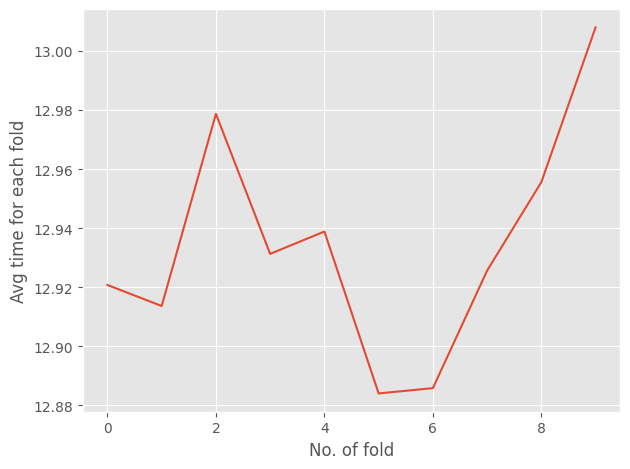

In [61]:
import matplotlib.pyplot as plt

times_nnl_n = np.zeros((10,100))
for i, row in enumerate(times_nnl):
    times_nnl_n[i, :len(row)] = row

times_nnl_n_n = np.mean(times_nnl_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_nnl_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("nnl times")
plt.show()

In [62]:
train_acc_nnl_n = np.zeros((10,100))
for i, row in enumerate(train_acc_nnl):
    train_acc_nnl_n[i, :len(row)] = row
    
test_acc_nnl_n = np.zeros((10,100))
for i, row in enumerate(test_acc_nnl):
    test_acc_nnl_n[i, :len(row)] = row
    
train_loss_nnl_n = np.zeros((10,100))
for i, row in enumerate(train_loss_nnl):
    train_loss_nnl_n[i, :len(row)] = row
    
test_loss_nnl_n = np.zeros((10,100))
for i, row in enumerate(test_loss_nnl):
    test_loss_nnl_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_nnl_n = np.mean(train_acc_nnl_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_nnl_n = np.mean(test_acc_nnl_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_nnl_n = np.mean(train_loss_nnl_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_nnl_n = np.mean(test_loss_nnl_n,axis=0)

In [63]:
data = [train_acc_nnl_n,test_acc_nnl_n,train_loss_nnl_n,test_loss_nnl_n]

df = pd.DataFrame(data)
df.to_csv('nnl_acc', index=False)
df = pd.read_csv('nnl_acc')

train_acc_nnl_n = df.iloc[0]
test_acc_nnl_n = df.iloc[1]
train_loss_nnl_n = df.iloc[2]
test_loss_nnl_n = df.iloc[3]


df_t = pd.DataFrame([times_nnl_n_n])
df_t.to_csv('nnl_times', index=False)
df_t = pd.read_csv('nnl_times')

times_nnl_n_n = df_t.iloc[0]

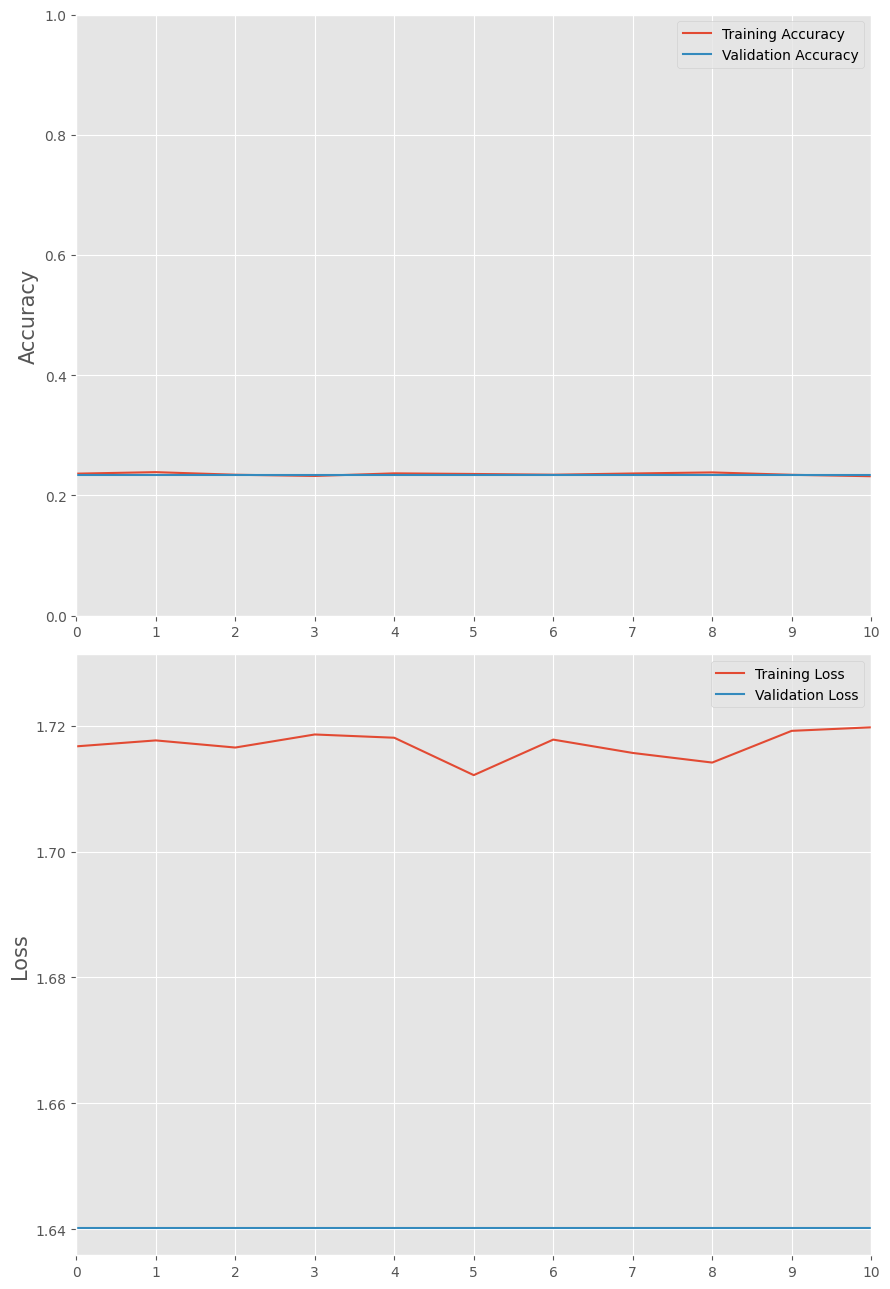

In [64]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_nnl_n, label='Training Accuracy')
axs[0].plot(test_acc_nnl_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_nnl_n, label='Training Loss')
axs[1].plot(test_loss_nnl_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("nnl Training and Testing Loss")
plt.show()

In [65]:
import gc
gc.collect()

23748

In [66]:
np.array(scores_nnl).shape

(10, 302, 4)

In [67]:
y_pred_nnl = np.argmax(scores_nnl,axis=2)

In [68]:
y_pred_nnl.shape

(10, 302)

In [69]:
from sklearn.metrics import accuracy_score
acc_scores_nnl = []
for i in range(len(y_test_all_nnl)):
    acc_scores_nnl.append(accuracy_score(y_true = y_test_all_nnl[i],y_pred = y_pred_nnl[i]))

In [70]:
acc_scores_nnl

[0.30132450331125826,
 0.3576158940397351,
 0.3443708609271523,
 0.3543046357615894,
 0.15562913907284767,
 0.17880794701986755,
 0.12251655629139073,
 0.18543046357615894,
 0.2119205298013245,
 0.13245033112582782]

In [71]:
df_acc = pd.DataFrame([acc_scores_nnl])

df_acc.to_csv('nnl_accuracy', index=False)

df_acc = pd.read_csv('nnl_accuracy')

acc_scores_nnl = df_acc.iloc[0].values

In [72]:
y_test_all_n = np.array(y_test_all_nnl)

y_pred_nnl_n = y_pred_nnl.flatten()
y_test_all_n = y_test_all_n.flatten()

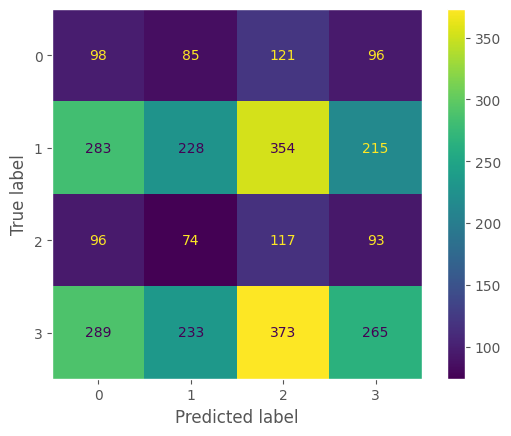

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_nnl_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("nnl")

plt.show()

In [74]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_nnl_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.13      0.24      0.17       400
           1       0.37      0.21      0.27      1080
           2       0.12      0.31      0.17       380
           3       0.40      0.23      0.29      1160

    accuracy                           0.23      3020
   macro avg       0.25      0.25      0.23      3020
weighted avg       0.32      0.23      0.25      3020



# NasNetMobile

In [75]:
import gc
gc.collect()

6127

In [76]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_nnb = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_nnb.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [77]:
def create_model_nnb():
    
    model_nnb = tf.keras.models.Sequential([
    tf.keras.applications.NASNetMobile(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_nnb.trainable = False
    return model_nnb

In [78]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_nnb = []
y_test_all_nnb = []
train_acc_nnb = []
test_acc_nnb = []
train_loss_nnb = []
test_loss_nnb = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_nnb.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_nnb = None
    model_nnb = create_model_nnb()
        
    model_nnb.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_nnb.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_nnb.predict(X_test)
    
    scores_nnb.append(x)
    train_acc_nnb.append(history.history["accuracy"])
    test_acc_nnb.append(history.history["val_accuracy"])
    train_loss_nnb.append(history.history["loss"])
    test_loss_nnb.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 11s 67ms/step - loss: 6.2626 - accuracy: 0.1341 - val_loss: 6.1407 - val_accuracy: 0.1213 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 37ms/step - loss: 6.2598 - accuracy: 0.1353 - val_loss: 6.1407 - val_accuracy: 0.1213 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 37ms/step - loss: 6.1902 - accuracy: 0.1341 - val_loss: 6.1407 - val_accuracy: 0.1213 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 37ms/step - loss: 6.2105 - accuracy: 0.1353 - val_loss: 6.1407 - val_accuracy: 0.1213 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 37ms/step - loss: 6.2019 - accuracy: 0.1337 - val_loss: 6.1407 - val_accuracy: 0.1213 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 38ms/step - loss: 6.2366 - accuracy: 0.1337 - val_loss: 6.1407 - val_accuracy: 0.1213 - lr: 0.0010
Epoch 7/100
77/77 [=========================

Time taken for epoch 29: 2.84 seconds
77/77 [==============================] - 3s 37ms/step - loss: 6.3120 - accuracy: 0.1337 - val_loss: 6.1407 - val_accuracy: 0.1213 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 37ms/step - loss: 6.2768 - accuracy: 0.1353 - val_loss: 6.1407 - val_accuracy: 0.1213 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 36ms/step - loss: 6.1943 - accuracy: 0.1353 - val_loss: 6.1407 - val_accuracy: 0.1213 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 3s 37ms/step - loss: 6.1801 - accuracy: 0.1329 - val_loss: 6.1407 - val_accuracy: 0.1213 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 3s 36ms/step - loss: 6.2290 - accuracy: 0.1337 - val_loss: 6.1407 - val_accuracy: 0.1213 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 3s 37ms/step - loss: 6.2309 - accuracy: 0.1337 - val_loss: 6.1407 - val_accuracy: 0.1213 - lr: 1.6000e-06
Epoch 35/100
77

Epoch 58/100
77/77 [==============================] - 3s 37ms/step - loss: 6.2396 - accuracy: 0.1341 - val_loss: 6.1407 - val_accuracy: 0.1213 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 3s 38ms/step - loss: 6.2294 - accuracy: 0.1353 - val_loss: 6.1407 - val_accuracy: 0.1213 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 38ms/step - loss: 6.2371 - accuracy: 0.1345 - val_loss: 6.1407 - val_accuracy: 0.1213 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 38ms/step - loss: 6.2420 - accuracy: 0.1365 - val_loss: 6.1407 - val_accuracy: 0.1213 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 3s 37ms/step - loss: 6.2727 - accuracy: 0.1329 - val_loss: 6.1407 - val_accuracy: 0.1213 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 3s 37ms/step - loss: 6.2625 - accuracy: 0.1353 - val_loss: 6.1407 - val_accuracy: 0.1213 - lr: 2.5600e-09
Epoch 64/100
76/77 [====================

Epoch 15/100
76/77 [============================>.] - ETA: 0s - loss: 1.9795 - accuracy: 0.2948
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 2.95 seconds
77/77 [==============================] - 3s 38ms/step - loss: 1.9802 - accuracy: 0.2948 - val_loss: 1.5126 - val_accuracy: 0.3824 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 3s 38ms/step - loss: 2.0055 - accuracy: 0.2878 - val_loss: 1.5126 - val_accuracy: 0.3824 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 3s 38ms/step - loss: 2.0053 - accuracy: 0.2886 - val_loss: 1.5126 - val_accuracy: 0.3824 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 3s 37ms/step - loss: 1.9719 - accuracy: 0.2944 - val_loss: 1.5126 - val_accuracy: 0.3824 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 3s 37ms/step - loss: 1.9926 - accuracy: 0.2895 - val_loss: 1.5126 - val_accuracy: 0.3824 - lr: 4.0000e-05
E

77/77 [==============================] - ETA: 0s - loss: 1.9922 - accuracy: 0.2882
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 2.76 seconds
77/77 [==============================] - 3s 36ms/step - loss: 1.9922 - accuracy: 0.2882 - val_loss: 1.5126 - val_accuracy: 0.3824 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 3s 36ms/step - loss: 1.9935 - accuracy: 0.2968 - val_loss: 1.5126 - val_accuracy: 0.3824 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 3s 36ms/step - loss: 2.0395 - accuracy: 0.2805 - val_loss: 1.5126 - val_accuracy: 0.3824 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 3s 36ms/step - loss: 2.0173 - accuracy: 0.2903 - val_loss: 1.5126 - val_accuracy: 0.3824 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 3s 36ms/step - loss: 2.0100 - accuracy: 0.2931 - val_loss: 1.5126 - val_accuracy: 0.3824 - lr: 1.0240e-10
Epoch 76/100
7

77/77 [==============================] - 3s 36ms/step - loss: 2.1862 - accuracy: 0.2756 - val_loss: 1.6740 - val_accuracy: 0.3419 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 3s 37ms/step - loss: 2.1273 - accuracy: 0.2854 - val_loss: 1.6740 - val_accuracy: 0.3419 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 2.1443 - accuracy: 0.2796
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 2.78 seconds
77/77 [==============================] - 3s 36ms/step - loss: 2.1443 - accuracy: 0.2796 - val_loss: 1.6740 - val_accuracy: 0.3419 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 37ms/step - loss: 2.1061 - accuracy: 0.2976 - val_loss: 1.6740 - val_accuracy: 0.3419 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 37ms/step - loss: 2.1368 - accuracy: 0.2809 - val_loss: 1.6740 - val_accuracy: 0.3419 - lr: 1.6000e-06
Epoch 32/100
7

77/77 [==============================] - 3s 38ms/step - loss: 2.1384 - accuracy: 0.2899 - val_loss: 1.6740 - val_accuracy: 0.3419 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 3s 37ms/step - loss: 2.1726 - accuracy: 0.2764 - val_loss: 1.6740 - val_accuracy: 0.3419 - lr: 2.0480e-11
Epoch 85/100
76/77 [============================>.] - ETA: 0s - loss: 2.1538 - accuracy: 0.2738
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 2.87 seconds
77/77 [==============================] - 3s 37ms/step - loss: 2.1509 - accuracy: 0.2743 - val_loss: 1.6740 - val_accuracy: 0.3419 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 3s 38ms/step - loss: 2.1553 - accuracy: 0.2760 - val_loss: 1.6740 - val_accuracy: 0.3419 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 3s 37ms/step - loss: 2.1248 - accuracy: 0.2866 - val_loss: 1.6740 - val_accuracy: 0.3419 - lr: 4.0960e-12
Epoch 88/100
77

77/77 [==============================] - 3s 36ms/step - loss: 2.6708 - accuracy: 0.1746 - val_loss: 2.5337 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 3s 36ms/step - loss: 2.6660 - accuracy: 0.1738 - val_loss: 2.5337 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 3s 36ms/step - loss: 2.7122 - accuracy: 0.1705 - val_loss: 2.5337 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 3s 36ms/step - loss: 2.6713 - accuracy: 0.1656 - val_loss: 2.5337 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 43/100
75/77 [============================>.] - ETA: 0s - loss: 2.6944 - accuracy: 0.1704
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 2.79 seconds
77/77 [==============================] - 3s 36ms/step - loss: 2.6966 - accuracy: 0.1701 - val_loss: 2.5337 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 44/100
77

77/77 [==============================] - 3s 38ms/step - loss: 2.6757 - accuracy: 0.1852 - val_loss: 2.5337 - val_accuracy: 0.1434 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 3s 37ms/step - loss: 2.6351 - accuracy: 0.1750 - val_loss: 2.5337 - val_accuracy: 0.1434 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 3s 38ms/step - loss: 2.7118 - accuracy: 0.1778 - val_loss: 2.5337 - val_accuracy: 0.1434 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 3s 37ms/step - loss: 2.6934 - accuracy: 0.1762 - val_loss: 2.5337 - val_accuracy: 0.1434 - lr: 8.1920e-13
Epoch 99/100
76/77 [============================>.] - ETA: 0s - loss: 2.6911 - accuracy: 0.1715
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 2.94 seconds
77/77 [==============================] - 3s 38ms/step - loss: 2.6916 - accuracy: 0.1721 - val_loss: 2.5337 - val_accuracy: 0.1434 - lr: 8.1920e-13
Epoch 100/100


77/77 [==============================] - 3s 37ms/step - loss: 2.0732 - accuracy: 0.3414 - val_loss: 1.6129 - val_accuracy: 0.3419 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 3s 37ms/step - loss: 2.0486 - accuracy: 0.3352 - val_loss: 1.6129 - val_accuracy: 0.3419 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 3s 37ms/step - loss: 2.0613 - accuracy: 0.3279 - val_loss: 1.6129 - val_accuracy: 0.3419 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 3s 37ms/step - loss: 2.0406 - accuracy: 0.3352 - val_loss: 1.6129 - val_accuracy: 0.3419 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 3s 37ms/step - loss: 2.0749 - accuracy: 0.3316 - val_loss: 1.6129 - val_accuracy: 0.3419 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 3s 37ms/step - loss: 2.0216 - accuracy: 0.3418 - val_loss: 1.6129 - val_accuracy: 0.3419 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] -

77/77 [==============================] - 3s 37ms/step - loss: 2.4250 - accuracy: 0.2007 - val_loss: 2.4616 - val_accuracy: 0.1324 - lr: 0.0010
Epoch 8/100
76/77 [============================>.] - ETA: 0s - loss: 2.4063 - accuracy: 0.1961
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 2.94 seconds
77/77 [==============================] - 3s 38ms/step - loss: 2.4133 - accuracy: 0.1950 - val_loss: 2.4616 - val_accuracy: 0.1324 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 3s 38ms/step - loss: 2.4141 - accuracy: 0.2032 - val_loss: 2.4616 - val_accuracy: 0.1324 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 3s 37ms/step - loss: 2.4039 - accuracy: 0.1971 - val_loss: 2.4616 - val_accuracy: 0.1324 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 3s 37ms/step - loss: 2.3916 - accuracy: 0.1999 - val_loss: 2.4616 - val_accuracy: 0.1324 - lr: 2.0000e-04
Epoch 12/100
77/77 [======

77/77 [==============================] - 3s 37ms/step - loss: 2.4358 - accuracy: 0.2065 - val_loss: 2.4616 - val_accuracy: 0.1324 - lr: 2.5600e-09
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 2.4033 - accuracy: 0.2036
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 2.78 seconds
77/77 [==============================] - 3s 36ms/step - loss: 2.4033 - accuracy: 0.2036 - val_loss: 2.4616 - val_accuracy: 0.1324 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 3s 37ms/step - loss: 2.4498 - accuracy: 0.1958 - val_loss: 2.4616 - val_accuracy: 0.1324 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 3s 36ms/step - loss: 2.4119 - accuracy: 0.2020 - val_loss: 2.4616 - val_accuracy: 0.1324 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 3s 37ms/step - loss: 2.4043 - accuracy: 0.1946 - val_loss: 2.4616 - val_accuracy: 0.1324 - lr: 5.1200e-10
Epoch 68/100
77/7

77/77 [==============================] - 3s 36ms/step - loss: 4.0061 - accuracy: 0.1623 - val_loss: 3.6901 - val_accuracy: 0.1360 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 3s 37ms/step - loss: 3.9635 - accuracy: 0.1627 - val_loss: 3.6901 - val_accuracy: 0.1360 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 3s 37ms/step - loss: 3.9162 - accuracy: 0.1639 - val_loss: 3.6901 - val_accuracy: 0.1360 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 3.9874 - accuracy: 0.1468
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 2.81 seconds
77/77 [==============================] - 3s 36ms/step - loss: 3.9874 - accuracy: 0.1468 - val_loss: 3.6901 - val_accuracy: 0.1360 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 3s 37ms/step - loss: 3.9731 - accuracy: 0.1611 - val_loss: 3.6901 - val_accuracy: 0.1360 - lr: 8.0000e-06
Epoch 24/100
77

77/77 [==============================] - 3s 37ms/step - loss: 3.9784 - accuracy: 0.1648 - val_loss: 3.6901 - val_accuracy: 0.1360 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 3s 39ms/step - loss: 4.0012 - accuracy: 0.1533 - val_loss: 3.6901 - val_accuracy: 0.1360 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 3s 39ms/step - loss: 3.9809 - accuracy: 0.1615 - val_loss: 3.6901 - val_accuracy: 0.1360 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 3.9348 - accuracy: 0.1603
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 2.87 seconds
77/77 [==============================] - 3s 37ms/step - loss: 3.9348 - accuracy: 0.1603 - val_loss: 3.6901 - val_accuracy: 0.1360 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 3s 37ms/step - loss: 3.9870 - accuracy: 0.1697 - val_loss: 3.6901 - val_accuracy: 0.1360 - lr: 2.0480e-11
Epoch 80/100
7

Epoch 3/100
77/77 [==============================] - 3s 37ms/step - loss: 1.9730 - accuracy: 0.3189 - val_loss: 1.7452 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 38ms/step - loss: 1.9951 - accuracy: 0.3189 - val_loss: 1.7452 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 38ms/step - loss: 1.9629 - accuracy: 0.3189 - val_loss: 1.7452 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 37ms/step - loss: 2.0091 - accuracy: 0.3058 - val_loss: 1.7452 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 3s 38ms/step - loss: 2.0177 - accuracy: 0.3038 - val_loss: 1.7452 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 8/100
76/77 [============================>.] - ETA: 0s - loss: 1.9849 - accuracy: 0.3113
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 2.94 seconds
77/77 [=========

77/77 [==============================] - 3s 37ms/step - loss: 2.0121 - accuracy: 0.3177 - val_loss: 1.7452 - val_accuracy: 0.3456 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 37ms/step - loss: 1.9846 - accuracy: 0.3148 - val_loss: 1.7452 - val_accuracy: 0.3456 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 36ms/step - loss: 1.9992 - accuracy: 0.3009 - val_loss: 1.7452 - val_accuracy: 0.3456 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 3s 36ms/step - loss: 2.0112 - accuracy: 0.3042 - val_loss: 1.7452 - val_accuracy: 0.3456 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 3s 37ms/step - loss: 1.9762 - accuracy: 0.3132 - val_loss: 1.7452 - val_accuracy: 0.3456 - lr: 2.5600e-09
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 2.0038 - accuracy: 0.2972
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 2.76 seconds
77/7

Time taken for epoch 15: 2.85 seconds
77/77 [==============================] - 3s 37ms/step - loss: 2.1939 - accuracy: 0.2768 - val_loss: 1.5628 - val_accuracy: 0.2978 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 3s 37ms/step - loss: 2.1847 - accuracy: 0.2919 - val_loss: 1.5628 - val_accuracy: 0.2978 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 3s 37ms/step - loss: 2.1431 - accuracy: 0.2809 - val_loss: 1.5628 - val_accuracy: 0.2978 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 3s 37ms/step - loss: 2.1802 - accuracy: 0.2784 - val_loss: 1.5628 - val_accuracy: 0.2978 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 3s 37ms/step - loss: 2.1566 - accuracy: 0.2788 - val_loss: 1.5628 - val_accuracy: 0.2978 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 3s 37ms/step - loss: 2.1805 - accuracy: 0.2890 - val_loss: 1.5628 - val_accuracy: 0.2978 - lr: 4.0000e-05
Epoch 21/100
77

Epoch 44/100
77/77 [==============================] - 3s 37ms/step - loss: 2.2207 - accuracy: 0.2633 - val_loss: 1.5628 - val_accuracy: 0.2978 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 3s 37ms/step - loss: 2.1774 - accuracy: 0.2895 - val_loss: 1.5628 - val_accuracy: 0.2978 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 3s 37ms/step - loss: 2.1932 - accuracy: 0.2817 - val_loss: 1.5628 - val_accuracy: 0.2978 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 3s 37ms/step - loss: 2.1698 - accuracy: 0.2731 - val_loss: 1.5628 - val_accuracy: 0.2978 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 3s 37ms/step - loss: 2.1889 - accuracy: 0.2670 - val_loss: 1.5628 - val_accuracy: 0.2978 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 3s 37ms/step - loss: 2.1535 - accuracy: 0.2841 - val_loss: 1.5628 - val_accuracy: 0.2978 - lr: 6.4000e-08
Epoch 50/100
77/77 [====================

10/10 [==============================] - 2s 31ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 16s 63ms/step - loss: 2.5829 - accuracy: 0.2200 - val_loss: 2.2656 - val_accuracy: 0.1985 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 37ms/step - loss: 2.5643 - accuracy: 0.2371 - val_loss: 2.2656 - val_accuracy: 0.1985 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 37ms/step - loss: 2.5510 - accuracy: 0.2420 - val_loss: 2.2656 - val_accuracy: 0.1985 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 37ms/step - loss: 2.5586 - accuracy: 0.2339 - val_loss: 2.2656 - val_accuracy: 0.1985 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 36ms/step - loss: 2.5489 - accuracy: 0.2261 - val_loss: 2.2656 - val_accuracy: 0.1985 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 36ms/step - loss: 2.5495 - accuracy: 0.2310 - val_loss: 2.2656 - val_accuracy: 0.1985 - 

Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 2.5463 - accuracy: 0.2146
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 2.80 seconds
77/77 [==============================] - 3s 36ms/step - loss: 2.5434 - accuracy: 0.2146 - val_loss: 2.2656 - val_accuracy: 0.1985 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 36ms/step - loss: 2.5777 - accuracy: 0.2167 - val_loss: 2.2656 - val_accuracy: 0.1985 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 36ms/step - loss: 2.5230 - accuracy: 0.2310 - val_loss: 2.2656 - val_accuracy: 0.1985 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 3s 36ms/step - loss: 2.5491 - accuracy: 0.2339 - val_loss: 2.2656 - val_accuracy: 0.1985 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 3s 36ms/step - loss: 2.5306 - accuracy: 0.2322 - val_loss: 2.2656 - val_accuracy: 0.1985 - lr: 1.6000e-06
E

77/77 [==============================] - ETA: 0s - loss: 2.5398 - accuracy: 0.2253
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 2.96 seconds
77/77 [==============================] - 3s 38ms/step - loss: 2.5398 - accuracy: 0.2253 - val_loss: 2.2656 - val_accuracy: 0.1985 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 3s 38ms/step - loss: 2.5154 - accuracy: 0.2359 - val_loss: 2.2656 - val_accuracy: 0.1985 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 3s 38ms/step - loss: 2.5457 - accuracy: 0.2302 - val_loss: 2.2656 - val_accuracy: 0.1985 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 3s 38ms/step - loss: 2.5824 - accuracy: 0.2253 - val_loss: 2.2656 - val_accuracy: 0.1985 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 3s 37ms/step - loss: 2.5285 - accuracy: 0.2322 - val_loss: 2.2656 - val_accuracy: 0.1985 - lr: 4.0960e-12
Epoch 90/100
77

In [79]:
import gc
gc.collect()

0

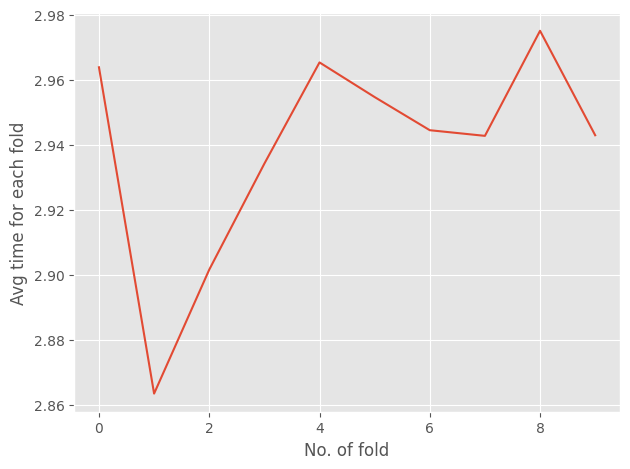

In [80]:
import matplotlib.pyplot as plt

times_nnb_n = np.zeros((10,100))
for i, row in enumerate(times_nnb):
    times_nnb_n[i, :len(row)] = row

times_nnb_n_n = np.mean(times_nnb_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_nnb_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("nnb times")
plt.show()

In [81]:
train_acc_nnb_n = np.zeros((10,100))
for i, row in enumerate(train_acc_nnb):
    train_acc_nnb_n[i, :len(row)] = row
    
test_acc_nnb_n = np.zeros((10,100))
for i, row in enumerate(test_acc_nnb):
    test_acc_nnb_n[i, :len(row)] = row
    
train_loss_nnb_n = np.zeros((10,100))
for i, row in enumerate(train_loss_nnb):
    train_loss_nnb_n[i, :len(row)] = row
    
test_loss_nnb_n = np.zeros((10,100))
for i, row in enumerate(test_loss_nnb):
    test_loss_nnb_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_nnb_n = np.mean(train_acc_nnb_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_nnb_n = np.mean(test_acc_nnb_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_nnb_n = np.mean(train_loss_nnb_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_nnb_n = np.mean(test_loss_nnb_n,axis=0)

In [82]:
data = [train_acc_nnb_n,test_acc_nnb_n,train_loss_nnb_n,test_loss_nnb_n]

df = pd.DataFrame(data)
df.to_csv('nnb_acc', index=False)
df = pd.read_csv('nnb_acc')

train_acc_nnb_n = df.iloc[0]
test_acc_nnb_n = df.iloc[1]
train_loss_nnb_n = df.iloc[2]
test_loss_nnb_n = df.iloc[3]


df_t = pd.DataFrame([times_nnb_n_n])
df_t.to_csv('nnb_times', index=False)
df_t = pd.read_csv('nnb_times')

times_nnb_n_n = df_t.iloc[0]

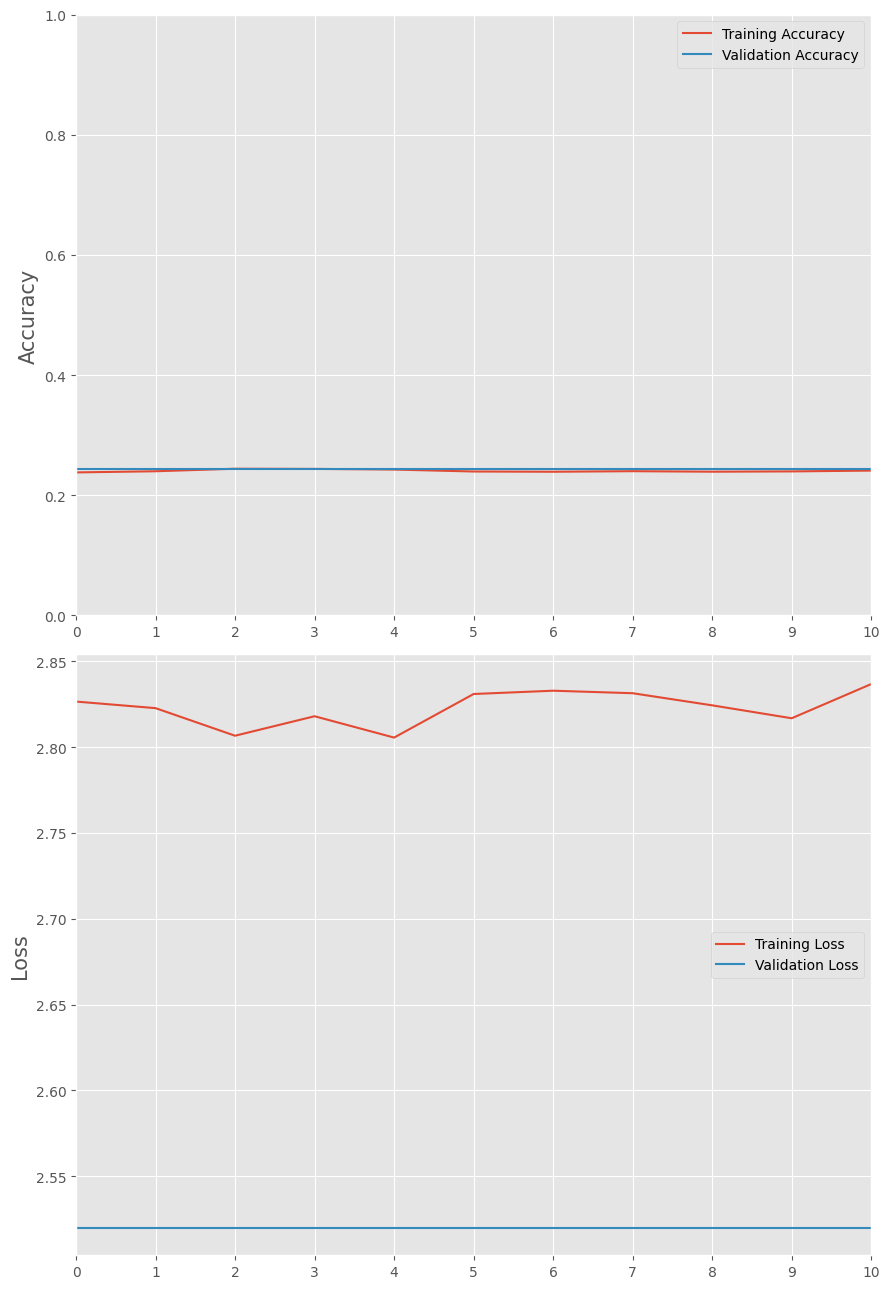

In [83]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_nnb_n, label='Training Accuracy')
axs[0].plot(test_acc_nnb_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_nnb_n, label='Training Loss')
axs[1].plot(test_loss_nnb_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("nnb Training and Testing Loss")
plt.show()

In [84]:
np.array(scores_nnb).shape

(10, 302, 4)

In [85]:
y_pred_nnb = np.argmax(scores_nnb,axis=2)

In [86]:
y_pred_nnb.shape

(10, 302)

In [87]:
from sklearn.metrics import accuracy_score
acc_scores_nnb = []
for i in range(len(y_test_all_nnb)):
    acc_scores_nnb.append(accuracy_score(y_true = y_test_all_nnb[i],y_pred = y_pred_nnb[i]))

In [88]:
import gc
gc.collect()

23642

In [89]:
acc_scores_nnb

[0.13245033112582782,
 0.3344370860927152,
 0.304635761589404,
 0.16556291390728478,
 0.3344370860927152,
 0.15562913907284767,
 0.11920529801324503,
 0.347682119205298,
 0.30132450331125826,
 0.17880794701986755]

In [90]:
df_acc = pd.DataFrame([acc_scores_nnb])

df_acc.to_csv('nnb_accuracy', index=False)

df_acc = pd.read_csv('nnb_accuracy')

acc_scores_nnb = df_acc.iloc[0].values

In [ ]:
y_test_all_n = np.array(y_test_all_nnb)

y_pred_nnb_n = y_pred_nnb.flatten()
y_test_all_n = y_test_all_n.flatten()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_nnb_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("nnb")

plt.show()

In [ ]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_nnb_n)
print(cf_r)

# AlexNet

In [17]:
import gc
gc.collect()

0

In [14]:
X.shape

(3020, 259, 100, 1)

In [15]:
X_tl = np.concatenate([X,X,X],axis=-1)

In [16]:
X_tl.shape

(3020, 259, 100, 3)

In [18]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_axn = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_axn.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 5, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [19]:
import gc
gc.collect()

0

In [20]:
from keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [21]:
def create_model_axn():
    
    model_axn = Sequential()
    model_axn.add(Conv2D(filters=96,kernel_size=(3,3),strides=(4,4),input_shape=(X_tl.shape[1],X_tl.shape[2],X_tl.shape[3]), activation='relu'))
    model_axn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model_axn.add(Conv2D(256,(5,5),padding='same',activation='relu'))
    model_axn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model_axn.add(Conv2D(384,(3,3),padding='same',activation='relu'))
    model_axn.add(Conv2D(384,(3,3),padding='same',activation='relu'))
    model_axn.add(Conv2D(256,(3,3),padding='same',activation='relu'))
    model_axn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

    model_axn.add(Flatten())
    model_axn.add(Dense(4096, activation='relu'))
    model_axn.add(Dropout(0.4))
    model_axn.add(Dense(4096, activation='relu'))
    model_axn.add(Dropout(0.4))
    model_axn.add(Dense(4,activation='softmax'))

    return model_axn

In [22]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_axn = []
y_test_all_axn = []
train_acc_axn = []
test_acc_axn = []
train_loss_axn = []
test_loss_axn = []

for index, (train_indices, val_indices) in enumerate(skf.split(X_n, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_tl[train_indices], X_tl[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_axn.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_axn = None
    model_axn = create_model_axn()
        
    model_axn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_axn.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_axn.predict(X_test)
    
    scores_axn.append(x)
    train_acc_axn.append(history.history["accuracy"])
    test_acc_axn.append(history.history["val_accuracy"])
    train_loss_axn.append(history.history["loss"])
    test_loss_axn.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 7s 37ms/step - loss: 2.8183 - accuracy: 0.3679 - val_loss: 1.2693 - val_accuracy: 0.3713 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2671 - accuracy: 0.3847 - val_loss: 1.2774 - val_accuracy: 0.3676 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2683 - accuracy: 0.3737 - val_loss: 1.2689 - val_accuracy: 0.3676 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2715 - accuracy: 0.3679 - val_loss: 1.2703 - val_accuracy: 0.3676 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2669 - accuracy: 0.3782 - val_loss: 1.2697 - val_accuracy: 0.3676 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - ETA: 0s - loss: 1.2665 - accuracy: 0.3671
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 6: 1.89

77/77 [==============================] - 2s 24ms/step - loss: 1.2637 - accuracy: 0.3859 - val_loss: 1.2676 - val_accuracy: 0.3676 - lr: 3.2000e-07
Epoch 29/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2644 - accuracy: 0.3851 - val_loss: 1.2676 - val_accuracy: 0.3676 - lr: 3.2000e-07
Epoch 30/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2633 - accuracy: 0.3774 - val_loss: 1.2676 - val_accuracy: 0.3676 - lr: 3.2000e-07
Epoch 31/100
76/77 [============================>.] - ETA: 0s - loss: 1.2632 - accuracy: 0.3832
Epoch 31: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 31: 1.91 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2646 - accuracy: 0.3823 - val_loss: 1.2676 - val_accuracy: 0.3676 - lr: 3.2000e-07
Epoch 32/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2645 - accuracy: 0.3925 - val_loss: 1.2676 - val_accuracy: 0.3676 - lr: 6.4000e-08
Epoch 33/100
77

Epoch 56/100
76/77 [============================>.] - ETA: 0s - loss: 1.2645 - accuracy: 0.3939
Epoch 56: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 56: 1.88 seconds
77/77 [==============================] - 2s 24ms/step - loss: 1.2647 - accuracy: 0.3937 - val_loss: 1.2676 - val_accuracy: 0.3676 - lr: 1.0240e-10
Epoch 57/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2641 - accuracy: 0.3859 - val_loss: 1.2676 - val_accuracy: 0.3676 - lr: 2.0480e-11
Epoch 58/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2640 - accuracy: 0.3818 - val_loss: 1.2676 - val_accuracy: 0.3676 - lr: 2.0480e-11
Epoch 59/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2634 - accuracy: 0.3851 - val_loss: 1.2676 - val_accuracy: 0.3676 - lr: 2.0480e-11
Epoch 60/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2644 - accuracy: 0.3818 - val_loss: 1.2676 - val_accuracy: 0.3676 - lr: 2.0480e-11
E

Epoch 84/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2634 - accuracy: 0.3818 - val_loss: 1.2676 - val_accuracy: 0.3676 - lr: 6.5536e-15
Epoch 85/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2641 - accuracy: 0.3859 - val_loss: 1.2676 - val_accuracy: 0.3676 - lr: 6.5536e-15
Epoch 86/100
76/77 [============================>.] - ETA: 0s - loss: 1.2652 - accuracy: 0.3890
Epoch 86: ReduceLROnPlateau reducing learning rate to 1.3107200431082805e-15.
Time taken for epoch 86: 1.89 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2649 - accuracy: 0.3900 - val_loss: 1.2676 - val_accuracy: 0.3676 - lr: 6.5536e-15
Epoch 87/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2629 - accuracy: 0.3851 - val_loss: 1.2676 - val_accuracy: 0.3676 - lr: 1.3107e-15
Epoch 88/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2623 - accuracy: 0.3843 - val_loss: 1.2676 - val_accuracy: 0.3676 - lr: 1.3107e-15
E

Epoch 12/100
77/77 [==============================] - 2s 25ms/step - loss: 1.1360 - accuracy: 0.5000 - val_loss: 1.2799 - val_accuracy: 0.4779 - lr: 0.0010
Epoch 13/100
77/77 [==============================] - 2s 25ms/step - loss: 1.1424 - accuracy: 0.5139 - val_loss: 1.2553 - val_accuracy: 0.4522 - lr: 0.0010
Epoch 14/100
77/77 [==============================] - 2s 25ms/step - loss: 1.0856 - accuracy: 0.5233 - val_loss: 1.3299 - val_accuracy: 0.4375 - lr: 0.0010
Epoch 15/100
77/77 [==============================] - 2s 24ms/step - loss: 1.0688 - accuracy: 0.5360 - val_loss: 1.2642 - val_accuracy: 0.4963 - lr: 0.0010
Epoch 16/100
77/77 [==============================] - 2s 24ms/step - loss: 1.0363 - accuracy: 0.5552 - val_loss: 1.3158 - val_accuracy: 0.4890 - lr: 0.0010
Epoch 17/100
77/77 [==============================] - 2s 24ms/step - loss: 0.9810 - accuracy: 0.5789 - val_loss: 1.3626 - val_accuracy: 0.4485 - lr: 0.0010
Epoch 18/100
77/77 [==============================] - 2s 25ms/st

Epoch 41/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0106 - accuracy: 0.9996 - val_loss: 3.8159 - val_accuracy: 0.5441 - lr: 4.0000e-05
Epoch 42/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 3.9424 - val_accuracy: 0.5478 - lr: 4.0000e-05
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 1.0000
Epoch 43: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 43: 1.84 seconds
77/77 [==============================] - 2s 24ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 3.9938 - val_accuracy: 0.5331 - lr: 4.0000e-05
Epoch 44/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 4.0196 - val_accuracy: 0.5368 - lr: 8.0000e-06
Epoch 45/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 4.0334 - val_accuracy: 0.5331 - lr: 8.0000e-06
Ep

Epoch 69/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 4.1193 - val_accuracy: 0.5331 - lr: 2.5600e-09
Epoch 70/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 4.1191 - val_accuracy: 0.5331 - lr: 2.5600e-09
Epoch 71/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0049 - accuracy: 0.9992 - val_loss: 4.1200 - val_accuracy: 0.5331 - lr: 2.5600e-09
Epoch 72/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 4.1196 - val_accuracy: 0.5331 - lr: 2.5600e-09
Epoch 73/100
76/77 [============================>.] - ETA: 0s - loss: 0.0057 - accuracy: 0.9992
Epoch 73: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 73: 1.85 seconds
77/77 [==============================] - 2s 24ms/step - loss: 0.0058 - accuracy: 0.9992 - val_loss: 4.1204 - val_accuracy: 0.5331 - lr: 2.5600e-09
Epoc

Epoch 97/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0044 - accuracy: 0.9996 - val_loss: 4.1205 - val_accuracy: 0.5331 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 1.0000
Epoch 98: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 98: 1.85 seconds
77/77 [==============================] - 2s 24ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 4.1205 - val_accuracy: 0.5331 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 4.1205 - val_accuracy: 0.5331 - lr: 1.6384e-13
Epoch 100/100
10/10 [==============================] - 0s 9ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 2s 26ms/step - loss: 4.5138 - accuracy: 0.3745 - val_loss: 1.2650 - val_accuracy: 0.3676 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 2s 24ms/step - loss: 

Epoch 25/100
77/77 [==============================] - 2s 24ms/step - loss: 0.9623 - accuracy: 0.5437 - val_loss: 1.3125 - val_accuracy: 0.4669 - lr: 2.0000e-04
Epoch 26/100
77/77 [==============================] - 2s 24ms/step - loss: 0.9002 - accuracy: 0.5899 - val_loss: 1.2072 - val_accuracy: 0.4412 - lr: 2.0000e-04
Epoch 27/100
77/77 [==============================] - 2s 24ms/step - loss: 0.8284 - accuracy: 0.6419 - val_loss: 1.3577 - val_accuracy: 0.4816 - lr: 2.0000e-04
Epoch 28/100
77/77 [==============================] - 2s 24ms/step - loss: 0.7137 - accuracy: 0.6979 - val_loss: 1.3351 - val_accuracy: 0.4154 - lr: 2.0000e-04
Epoch 29/100
77/77 [==============================] - 2s 24ms/step - loss: 0.6760 - accuracy: 0.7208 - val_loss: 1.4921 - val_accuracy: 0.5000 - lr: 2.0000e-04
Epoch 30/100
77/77 [==============================] - 2s 24ms/step - loss: 0.6087 - accuracy: 0.7592 - val_loss: 1.8220 - val_accuracy: 0.4632 - lr: 2.0000e-04
Epoch 31/100
77/77 [====================

Epoch 54/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0824 - accuracy: 0.9734 - val_loss: 3.4589 - val_accuracy: 0.5074 - lr: 1.6000e-06
Epoch 55/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0835 - accuracy: 0.9726 - val_loss: 3.4630 - val_accuracy: 0.5110 - lr: 1.6000e-06
Epoch 56/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0810 - accuracy: 0.9722 - val_loss: 3.4659 - val_accuracy: 0.5074 - lr: 1.6000e-06
Epoch 57/100
75/77 [============================>.] - ETA: 0s - loss: 0.0825 - accuracy: 0.9725
Epoch 57: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 57: 1.87 seconds
77/77 [==============================] - 2s 24ms/step - loss: 0.0816 - accuracy: 0.9726 - val_loss: 3.4684 - val_accuracy: 0.5037 - lr: 1.6000e-06
Epoch 58/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0827 - accuracy: 0.9726 - val_loss: 3.4680 - val_accuracy: 0.5037 - lr: 3.2000e-07
Ep

Epoch 82/100
75/77 [============================>.] - ETA: 0s - loss: 0.0811 - accuracy: 0.9742
Epoch 82: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 82: 1.87 seconds
77/77 [==============================] - 2s 24ms/step - loss: 0.0818 - accuracy: 0.9734 - val_loss: 3.4774 - val_accuracy: 0.5037 - lr: 5.1200e-10
Epoch 83/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0813 - accuracy: 0.9714 - val_loss: 3.4774 - val_accuracy: 0.5037 - lr: 1.0240e-10
Epoch 84/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0817 - accuracy: 0.9730 - val_loss: 3.4774 - val_accuracy: 0.5037 - lr: 1.0240e-10
Epoch 85/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0816 - accuracy: 0.9726 - val_loss: 3.4773 - val_accuracy: 0.5037 - lr: 1.0240e-10
Epoch 86/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0818 - accuracy: 0.9722 - val_loss: 3.4773 - val_accuracy: 0.5037 - lr: 1.0240e-10
E

Epoch 10/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2656 - accuracy: 0.3839 - val_loss: 1.2524 - val_accuracy: 0.3787 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - ETA: 0s - loss: 1.2670 - accuracy: 0.3790
Epoch 11: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 11: 1.87 seconds
77/77 [==============================] - 2s 24ms/step - loss: 1.2670 - accuracy: 0.3790 - val_loss: 1.2522 - val_accuracy: 0.3787 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2673 - accuracy: 0.3855 - val_loss: 1.2522 - val_accuracy: 0.3787 - lr: 4.0000e-05
Epoch 13/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2657 - accuracy: 0.3884 - val_loss: 1.2521 - val_accuracy: 0.3787 - lr: 4.0000e-05
Epoch 14/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2651 - accuracy: 0.3872 - val_loss: 1.2522 - val_accuracy: 0.3787 - lr: 4.0000e-05
E

Epoch 38/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2644 - accuracy: 0.3835 - val_loss: 1.2524 - val_accuracy: 0.3787 - lr: 1.2800e-08
Epoch 39/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2656 - accuracy: 0.3872 - val_loss: 1.2524 - val_accuracy: 0.3787 - lr: 1.2800e-08
Epoch 40/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2655 - accuracy: 0.3855 - val_loss: 1.2524 - val_accuracy: 0.3787 - lr: 1.2800e-08
Epoch 41/100
76/77 [============================>.] - ETA: 0s - loss: 1.2650 - accuracy: 0.3861
Epoch 41: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 41: 1.87 seconds
77/77 [==============================] - 2s 24ms/step - loss: 1.2661 - accuracy: 0.3851 - val_loss: 1.2524 - val_accuracy: 0.3787 - lr: 1.2800e-08
Epoch 42/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2662 - accuracy: 0.3818 - val_loss: 1.2524 - val_accuracy: 0.3787 - lr: 2.5600e-09
E

Epoch 66/100
75/77 [============================>.] - ETA: 0s - loss: 1.2665 - accuracy: 0.3854
Epoch 66: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 66: 1.86 seconds
77/77 [==============================] - 2s 24ms/step - loss: 1.2670 - accuracy: 0.3843 - val_loss: 1.2524 - val_accuracy: 0.3787 - lr: 4.0960e-12
Epoch 67/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2669 - accuracy: 0.3851 - val_loss: 1.2524 - val_accuracy: 0.3787 - lr: 8.1920e-13
Epoch 68/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2665 - accuracy: 0.3839 - val_loss: 1.2524 - val_accuracy: 0.3787 - lr: 8.1920e-13
Epoch 69/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2657 - accuracy: 0.3859 - val_loss: 1.2524 - val_accuracy: 0.3787 - lr: 8.1920e-13
Epoch 70/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2654 - accuracy: 0.3859 - val_loss: 1.2524 - val_accuracy: 0.3787 - lr: 8.1920e-13
Ep

Epoch 94/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2659 - accuracy: 0.3880 - val_loss: 1.2524 - val_accuracy: 0.3787 - lr: 2.6214e-16
Epoch 95/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2667 - accuracy: 0.3823 - val_loss: 1.2524 - val_accuracy: 0.3787 - lr: 2.6214e-16
Epoch 96/100
76/77 [============================>.] - ETA: 0s - loss: 1.2644 - accuracy: 0.3840
Epoch 96: ReduceLROnPlateau reducing learning rate to 5.2428803630155353e-17.
Time taken for epoch 96: 1.84 seconds
77/77 [==============================] - 2s 24ms/step - loss: 1.2645 - accuracy: 0.3843 - val_loss: 1.2524 - val_accuracy: 0.3787 - lr: 2.6214e-16
Epoch 97/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2650 - accuracy: 0.3847 - val_loss: 1.2524 - val_accuracy: 0.3787 - lr: 5.2429e-17
Epoch 98/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2664 - accuracy: 0.3855 - val_loss: 1.2524 - val_accuracy: 0.3787 - lr: 5.2429e-17
E

77/77 [==============================] - 2s 25ms/step - loss: 1.2621 - accuracy: 0.3859 - val_loss: 1.2863 - val_accuracy: 0.3676 - lr: 8.0000e-06
Epoch 22/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2625 - accuracy: 0.3794 - val_loss: 1.2863 - val_accuracy: 0.3676 - lr: 8.0000e-06
Epoch 23/100
74/77 [===========================>..] - ETA: 0s - loss: 1.2609 - accuracy: 0.3860
Epoch 23: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 23: 1.86 seconds
77/77 [==============================] - 2s 24ms/step - loss: 1.2627 - accuracy: 0.3831 - val_loss: 1.2863 - val_accuracy: 0.3676 - lr: 8.0000e-06
Epoch 24/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2620 - accuracy: 0.3876 - val_loss: 1.2863 - val_accuracy: 0.3676 - lr: 1.6000e-06
Epoch 25/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2619 - accuracy: 0.3872 - val_loss: 1.2863 - val_accuracy: 0.3676 - lr: 1.6000e-06
Epoch 26/100
7

Epoch 49/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2606 - accuracy: 0.3863 - val_loss: 1.2863 - val_accuracy: 0.3676 - lr: 5.1200e-10
Epoch 50/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2607 - accuracy: 0.3888 - val_loss: 1.2863 - val_accuracy: 0.3676 - lr: 5.1200e-10
Epoch 51/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2628 - accuracy: 0.3831 - val_loss: 1.2863 - val_accuracy: 0.3676 - lr: 5.1200e-10
Epoch 52/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2617 - accuracy: 0.3863 - val_loss: 1.2863 - val_accuracy: 0.3676 - lr: 5.1200e-10
Epoch 53/100
76/77 [============================>.] - ETA: 0s - loss: 1.2628 - accuracy: 0.3902
Epoch 53: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 53: 1.85 seconds
77/77 [==============================] - 2s 24ms/step - loss: 1.2621 - accuracy: 0.3904 - val_loss: 1.2863 - val_accuracy: 0.3676 - lr: 5.1200e-10
E

Epoch 77/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2614 - accuracy: 0.3859 - val_loss: 1.2863 - val_accuracy: 0.3676 - lr: 1.6384e-13
Epoch 78/100
75/77 [============================>.] - ETA: 0s - loss: 1.2600 - accuracy: 0.3850
Epoch 78: ReduceLROnPlateau reducing learning rate to 3.2768002178849846e-14.
Time taken for epoch 78: 1.90 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2609 - accuracy: 0.3843 - val_loss: 1.2863 - val_accuracy: 0.3676 - lr: 1.6384e-13
Epoch 79/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2623 - accuracy: 0.3835 - val_loss: 1.2863 - val_accuracy: 0.3676 - lr: 3.2768e-14
Epoch 80/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2617 - accuracy: 0.3843 - val_loss: 1.2863 - val_accuracy: 0.3676 - lr: 3.2768e-14
Epoch 81/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2630 - accuracy: 0.3839 - val_loss: 1.2863 - val_accuracy: 0.3676 - lr: 3.2768e-14
E

Epoch 5/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2546 - accuracy: 0.3998 - val_loss: 1.2594 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2494 - accuracy: 0.3945 - val_loss: 1.2501 - val_accuracy: 0.3676 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2417 - accuracy: 0.4035 - val_loss: 1.2494 - val_accuracy: 0.3787 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2689 - accuracy: 0.3851 - val_loss: 1.2648 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2685 - accuracy: 0.3892 - val_loss: 1.2628 - val_accuracy: 0.3713 - lr: 0.0010
Epoch 10/100
76/77 [============================>.] - ETA: 0s - loss: 1.2672 - accuracy: 0.3931
Epoch 10: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 10: 1.86 seconds
77/77 [======

77/77 [==============================] - 2s 24ms/step - loss: 1.1756 - accuracy: 0.4268 - val_loss: 1.2675 - val_accuracy: 0.3787 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 2s 24ms/step - loss: 1.1724 - accuracy: 0.4268 - val_loss: 1.2678 - val_accuracy: 0.3787 - lr: 1.6000e-06
Epoch 35/100
75/77 [============================>.] - ETA: 0s - loss: 1.1733 - accuracy: 0.4292
Epoch 35: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 35: 1.86 seconds
77/77 [==============================] - 2s 24ms/step - loss: 1.1761 - accuracy: 0.4260 - val_loss: 1.2677 - val_accuracy: 0.3787 - lr: 1.6000e-06
Epoch 36/100
77/77 [==============================] - 2s 24ms/step - loss: 1.1767 - accuracy: 0.4260 - val_loss: 1.2679 - val_accuracy: 0.3787 - lr: 3.2000e-07
Epoch 37/100
77/77 [==============================] - 2s 24ms/step - loss: 1.1738 - accuracy: 0.4305 - val_loss: 1.2679 - val_accuracy: 0.3787 - lr: 3.2000e-07
Epoch 38/100
77

Epoch 61/100
77/77 [==============================] - 2s 24ms/step - loss: 1.1748 - accuracy: 0.4256 - val_loss: 1.2681 - val_accuracy: 0.3824 - lr: 1.0240e-10
Epoch 62/100
77/77 [==============================] - 2s 24ms/step - loss: 1.1747 - accuracy: 0.4280 - val_loss: 1.2681 - val_accuracy: 0.3824 - lr: 1.0240e-10
Epoch 63/100
77/77 [==============================] - 2s 24ms/step - loss: 1.1725 - accuracy: 0.4350 - val_loss: 1.2681 - val_accuracy: 0.3824 - lr: 1.0240e-10
Epoch 64/100
77/77 [==============================] - 2s 25ms/step - loss: 1.1750 - accuracy: 0.4313 - val_loss: 1.2681 - val_accuracy: 0.3824 - lr: 1.0240e-10
Epoch 65/100
74/77 [===========================>..] - ETA: 0s - loss: 1.1769 - accuracy: 0.4261
Epoch 65: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 65: 1.88 seconds
77/77 [==============================] - 2s 24ms/step - loss: 1.1742 - accuracy: 0.4276 - val_loss: 1.2681 - val_accuracy: 0.3824 - lr: 1.0240e-10
E

Epoch 89/100
77/77 [==============================] - 2s 24ms/step - loss: 1.1739 - accuracy: 0.4256 - val_loss: 1.2681 - val_accuracy: 0.3824 - lr: 3.2768e-14
Epoch 90/100
74/77 [===========================>..] - ETA: 0s - loss: 1.1761 - accuracy: 0.4295
Epoch 90: ReduceLROnPlateau reducing learning rate to 6.553600300244697e-15.
Time taken for epoch 90: 1.83 seconds
77/77 [==============================] - 2s 24ms/step - loss: 1.1752 - accuracy: 0.4317 - val_loss: 1.2681 - val_accuracy: 0.3824 - lr: 3.2768e-14
Epoch 91/100
77/77 [==============================] - 2s 24ms/step - loss: 1.1749 - accuracy: 0.4219 - val_loss: 1.2681 - val_accuracy: 0.3824 - lr: 6.5536e-15
Epoch 92/100
77/77 [==============================] - 2s 24ms/step - loss: 1.1766 - accuracy: 0.4268 - val_loss: 1.2681 - val_accuracy: 0.3824 - lr: 6.5536e-15
Epoch 93/100
77/77 [==============================] - 2s 24ms/step - loss: 1.1737 - accuracy: 0.4289 - val_loss: 1.2681 - val_accuracy: 0.3824 - lr: 6.5536e-15
Ep

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [23]:
import matplotlib.pyplot as plt

times_axn_n = np.zeros((10,100))
for i, row in enumerate(times_axn):
    times_axn_n[i, :len(row)] = row

times_axn_n_n = np.mean(times_axn_n,axis=1)

plt.plot(times_axn_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("axn times")
plt.show()

In [24]:
times_axn_n_n

In [25]:
train_acc_axn_n = np.zeros((10,100))
for i, row in enumerate(train_acc_axn):
    train_acc_axn_n[i, :len(row)] = row
    
test_acc_axn_n = np.zeros((10,100))
for i, row in enumerate(test_acc_axn):
    test_acc_axn_n[i, :len(row)] = row
    
train_loss_axn_n = np.zeros((10,100))
for i, row in enumerate(train_loss_axn):
    train_loss_axn_n[i, :len(row)] = row
    
test_loss_axn_n = np.zeros((10,100))
for i, row in enumerate(test_loss_axn):
    test_loss_axn_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_axn_n = np.mean(train_acc_axn_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_axn_n = np.mean(test_acc_axn_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_axn_n = np.mean(train_loss_axn_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_axn_n = np.mean(test_loss_axn_n,axis=0)

In [26]:
data = [train_acc_axn_n,test_acc_axn_n,train_loss_axn_n,test_loss_axn_n]

df = pd.DataFrame(data)
df.to_csv('axn_acc', index=False)
df = pd.read_csv('axn_acc')

train_acc_axn_n = df.iloc[0]
test_acc_axn_n = df.iloc[1]
train_loss_axn_n = df.iloc[2]
test_loss_axn_n = df.iloc[3]


df_t = pd.DataFrame([times_axn_n_n])
df_t.to_csv('axn_times', index=False)
df_t = pd.read_csv('axn_times')

times_axn_n_n = df_t.iloc[0]

In [27]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_axn_n, label='Training Accuracy')
axs[0].plot(test_acc_axn_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_axn_n, label='Training Loss')
axs[1].plot(test_loss_axn_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim(train_loss_axn_n.min(),train_loss_axn_n.max())
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("axn Training and Testing Loss")
plt.show()

In [28]:
import gc
gc.collect()

In [29]:
np.array(scores_axn).shape

In [30]:
y_pred_axn = np.argmax(scores_axn,axis=2)

In [31]:
y_pred_axn.shape

In [32]:
from sklearn.metrics import accuracy_score
acc_scores_axn = []
for i in range(len(y_test_all_axn)):
    acc_scores_axn.append(accuracy_score(y_true = y_test_all_axn[i],y_pred = y_pred_axn[i]))

In [33]:
acc_scores_axn

In [34]:
df_acc = pd.DataFrame([acc_scores_axn])

df_acc.to_csv('axn_accuracy', index=False)

df_acc = pd.read_csv('axn_accuracy')

acc_scores_axn = df_acc.iloc[0].values

In [35]:
y_test_all_n = np.array(y_test_all_axn)

y_pred_axn_n = y_pred_axn.flatten()
y_test_all_n = y_test_all_n.flatten()

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_axn_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("axn")
plt.show()

In [37]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_axn_n)
print(cf_r)

# EfficientNetB7

In [38]:
import gc
gc.collect()

In [39]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_enb7 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_enb7.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [40]:
def create_model_enb7():
    
    model_enb7 = tf.keras.models.Sequential([
    tf.keras.applications.EfficientNetB7(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_enb7.trainable = False
    return model_enb7

In [41]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_enb7 = []
y_test_all_enb7 = []
train_acc_enb7 = []
test_acc_enb7 = []
train_loss_enb7 = []
test_loss_enb7 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_enb7.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_enb7 = None
    model_enb7 = create_model_enb7()
        
    model_enb7.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_enb7.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [ reduce_lr,time_callback])
    
    
    x = model_enb7.predict(X_test)
    
    scores_enb7.append(x)
    train_acc_enb7.append(history.history["accuracy"])
    test_acc_enb7.append(history.history["val_accuracy"])
    train_loss_enb7.append(history.history["loss"])
    test_loss_enb7.append(history.history["val_loss"])
    
    gc.collect()

77/77 [==============================] - 13s 164ms/step - loss: 1.5295 - accuracy: 0.1909 - val_loss: 1.5015 - val_accuracy: 0.1471 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 12s 162ms/step - loss: 1.5250 - accuracy: 0.1836 - val_loss: 1.5015 - val_accuracy: 0.1471 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 13s 165ms/step - loss: 1.5195 - accuracy: 0.1795 - val_loss: 1.5015 - val_accuracy: 0.1471 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5257 - accuracy: 0.1885 - val_loss: 1.5015 - val_accuracy: 0.1471 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5207 - accuracy: 0.1844 - val_loss: 1.5015 - val_accuracy: 0.1471 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 13s 165ms/step - loss: 1.5193 - accuracy: 0.1832 - val_loss: 1.5015 - val_accuracy: 0.1471 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - ETA: 0s - loss: 1

77/77 [==============================] - 13s 165ms/step - loss: 1.5249 - accuracy: 0.1922 - val_loss: 1.5015 - val_accuracy: 0.1471 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 13s 163ms/step - loss: 1.5279 - accuracy: 0.1827 - val_loss: 1.5015 - val_accuracy: 0.1471 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5180 - accuracy: 0.1836 - val_loss: 1.5015 - val_accuracy: 0.1471 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5203 - accuracy: 0.1946 - val_loss: 1.5015 - val_accuracy: 0.1471 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5272 - accuracy: 0.1926 - val_loss: 1.5015 - val_accuracy: 0.1471 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 13s 166ms/step - loss: 1.5248 - accuracy: 0.1807 - val_loss: 1.5015 - val_accuracy: 0.1471 - lr: 1.6000e-06
Epoch 36/100
77/77 [=====================

Epoch 58/100
77/77 [==============================] - 13s 163ms/step - loss: 1.5221 - accuracy: 0.1852 - val_loss: 1.5015 - val_accuracy: 0.1471 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 13s 165ms/step - loss: 1.5204 - accuracy: 0.1860 - val_loss: 1.5015 - val_accuracy: 0.1471 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5241 - accuracy: 0.1926 - val_loss: 1.5015 - val_accuracy: 0.1471 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 13s 163ms/step - loss: 1.5218 - accuracy: 0.1950 - val_loss: 1.5015 - val_accuracy: 0.1471 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5308 - accuracy: 0.1766 - val_loss: 1.5015 - val_accuracy: 0.1471 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5206 - accuracy: 0.1778 - val_loss: 1.5015 - val_accuracy: 0.1471 - lr: 2.5600e-09
Epoch 64/100
77/77 [========

Epoch 86/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5221 - accuracy: 0.1860 - val_loss: 1.5015 - val_accuracy: 0.1471 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 13s 165ms/step - loss: 1.5228 - accuracy: 0.1872 - val_loss: 1.5015 - val_accuracy: 0.1471 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5256 - accuracy: 0.1917 - val_loss: 1.5015 - val_accuracy: 0.1471 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5219 - accuracy: 0.1958 - val_loss: 1.5015 - val_accuracy: 0.1471 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 13s 163ms/step - loss: 1.5210 - accuracy: 0.1909 - val_loss: 1.5015 - val_accuracy: 0.1471 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 13s 165ms/step - loss: 1.5215 - accuracy: 0.1860 - val_loss: 1.5015 - val_accuracy: 0.1471 - lr: 4.0960e-12
Epoch 92/100
77/77 [========

77/77 [==============================] - 13s 164ms/step - loss: 1.4156 - accuracy: 0.2547 - val_loss: 1.3938 - val_accuracy: 0.2243 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.4155 - accuracy: 0.2580
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 12.56 seconds
77/77 [==============================] - 13s 163ms/step - loss: 1.4155 - accuracy: 0.2580 - val_loss: 1.3938 - val_accuracy: 0.2243 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 13s 163ms/step - loss: 1.4148 - accuracy: 0.2621 - val_loss: 1.3938 - val_accuracy: 0.2243 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 13s 164ms/step - loss: 1.4123 - accuracy: 0.2563 - val_loss: 1.3938 - val_accuracy: 0.2243 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 13s 165ms/step - loss: 1.4185 - accuracy: 0.2539 - val_loss: 1.3938 - val_accuracy: 0.2243 - lr: 4.0000e-05
Epo

Epoch 42/100
77/77 [==============================] - 13s 164ms/step - loss: 1.4187 - accuracy: 0.2506 - val_loss: 1.3938 - val_accuracy: 0.2243 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.4052 - accuracy: 0.2694
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 12.60 seconds
77/77 [==============================] - 13s 164ms/step - loss: 1.4052 - accuracy: 0.2694 - val_loss: 1.3938 - val_accuracy: 0.2243 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 13s 164ms/step - loss: 1.4108 - accuracy: 0.2633 - val_loss: 1.3938 - val_accuracy: 0.2243 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 13s 164ms/step - loss: 1.4167 - accuracy: 0.2555 - val_loss: 1.3938 - val_accuracy: 0.2243 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 13s 165ms/step - loss: 1.4123 - accuracy: 0.2567 - val_loss: 1.3938 - val_accuracy: 0.2243 - lr: 6.

Epoch 70/100
77/77 [==============================] - 13s 164ms/step - loss: 1.4123 - accuracy: 0.2531 - val_loss: 1.3938 - val_accuracy: 0.2243 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.4152 - accuracy: 0.2527
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 12.64 seconds
77/77 [==============================] - 13s 165ms/step - loss: 1.4152 - accuracy: 0.2527 - val_loss: 1.3938 - val_accuracy: 0.2243 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 13s 163ms/step - loss: 1.4146 - accuracy: 0.2588 - val_loss: 1.3938 - val_accuracy: 0.2243 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 13s 163ms/step - loss: 1.4158 - accuracy: 0.2621 - val_loss: 1.3938 - val_accuracy: 0.2243 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 13s 164ms/step - loss: 1.4118 - accuracy: 0.2572 - val_loss: 1.3938 - val_accuracy: 0.2243 - lr: 1

Epoch 98/100
77/77 [==============================] - 13s 164ms/step - loss: 1.4131 - accuracy: 0.2539 - val_loss: 1.3938 - val_accuracy: 0.2243 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.4119 - accuracy: 0.2600
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 12.66 seconds
77/77 [==============================] - 13s 165ms/step - loss: 1.4119 - accuracy: 0.2600 - val_loss: 1.3938 - val_accuracy: 0.2243 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 4s 135ms/step
Training on fold 9/10...
Epoch 1/100
77/77 [==============================] - 25s 197ms/step - loss: 1.3880 - accuracy: 0.3034 - val_loss: 1.3725 - val_accuracy: 0.2868 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 13s 165ms/step - loss: 1.3890 - accuracy: 0.2980 - val_loss: 1.3725 - val_accuracy: 0.2868 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 13s 165ms/step 

Epoch 26/100
77/77 [==============================] - 13s 165ms/step - loss: 1.3822 - accuracy: 0.3029 - val_loss: 1.3725 - val_accuracy: 0.2868 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 13s 164ms/step - loss: 1.3899 - accuracy: 0.2993 - val_loss: 1.3725 - val_accuracy: 0.2868 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 13s 164ms/step - loss: 1.3862 - accuracy: 0.3078 - val_loss: 1.3725 - val_accuracy: 0.2868 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.3889 - accuracy: 0.2935
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 12.64 seconds
77/77 [==============================] - 13s 164ms/step - loss: 1.3889 - accuracy: 0.2935 - val_loss: 1.3725 - val_accuracy: 0.2868 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 13s 165ms/step - loss: 1.3920 - accuracy: 0.2956 - val_loss: 1.3725 - val_accuracy: 0.2868 - lr: 1

Epoch 54/100
77/77 [==============================] - 13s 165ms/step - loss: 1.3954 - accuracy: 0.2968 - val_loss: 1.3725 - val_accuracy: 0.2868 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 13s 165ms/step - loss: 1.3894 - accuracy: 0.3013 - val_loss: 1.3725 - val_accuracy: 0.2868 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 13s 164ms/step - loss: 1.3915 - accuracy: 0.2939 - val_loss: 1.3725 - val_accuracy: 0.2868 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.3875 - accuracy: 0.2972
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 12.62 seconds
77/77 [==============================] - 13s 164ms/step - loss: 1.3875 - accuracy: 0.2972 - val_loss: 1.3725 - val_accuracy: 0.2868 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 13s 164ms/step - loss: 1.3881 - accuracy: 0.3078 - val_loss: 1.3725 - val_accuracy: 0.2868 - lr: 2

Epoch 82/100
77/77 [==============================] - 13s 165ms/step - loss: 1.3882 - accuracy: 0.2944 - val_loss: 1.3725 - val_accuracy: 0.2868 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 13s 164ms/step - loss: 1.3886 - accuracy: 0.2993 - val_loss: 1.3725 - val_accuracy: 0.2868 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 13s 164ms/step - loss: 1.3939 - accuracy: 0.3062 - val_loss: 1.3725 - val_accuracy: 0.2868 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.3853 - accuracy: 0.3119
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 12.61 seconds
77/77 [==============================] - 13s 164ms/step - loss: 1.3853 - accuracy: 0.3119 - val_loss: 1.3725 - val_accuracy: 0.2868 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 13s 164ms/step - loss: 1.3891 - accuracy: 0.3070 - val_loss: 1.3725 - val_accuracy: 0.2868 - lr: 4.

Epoch 10/100
77/77 [==============================] - 13s 165ms/step - loss: 1.5205 - accuracy: 0.1938 - val_loss: 1.4926 - val_accuracy: 0.1912 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 13s 165ms/step - loss: 1.5179 - accuracy: 0.1913 - val_loss: 1.4926 - val_accuracy: 0.1912 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5127 - accuracy: 0.2142 - val_loss: 1.4926 - val_accuracy: 0.1912 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5075 - accuracy: 0.2130 - val_loss: 1.4926 - val_accuracy: 0.1912 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5110 - accuracy: 0.2142 - val_loss: 1.4926 - val_accuracy: 0.1912 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.5186 - accuracy: 0.2061
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for e

Epoch 38/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5183 - accuracy: 0.1954 - val_loss: 1.4926 - val_accuracy: 0.1912 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 13s 165ms/step - loss: 1.5240 - accuracy: 0.2003 - val_loss: 1.4926 - val_accuracy: 0.1912 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5212 - accuracy: 0.2016 - val_loss: 1.4926 - val_accuracy: 0.1912 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 13s 165ms/step - loss: 1.5201 - accuracy: 0.1938 - val_loss: 1.4926 - val_accuracy: 0.1912 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 13s 165ms/step - loss: 1.5043 - accuracy: 0.2134 - val_loss: 1.4926 - val_accuracy: 0.1912 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.5118 - accuracy: 0.2077
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for ep

Epoch 66/100
77/77 [==============================] - 13s 165ms/step - loss: 1.5111 - accuracy: 0.1926 - val_loss: 1.4926 - val_accuracy: 0.1912 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5159 - accuracy: 0.2114 - val_loss: 1.4926 - val_accuracy: 0.1912 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5206 - accuracy: 0.1983 - val_loss: 1.4926 - val_accuracy: 0.1912 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5229 - accuracy: 0.1926 - val_loss: 1.4926 - val_accuracy: 0.1912 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 13s 166ms/step - loss: 1.5217 - accuracy: 0.2056 - val_loss: 1.4926 - val_accuracy: 0.1912 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.5144 - accuracy: 0.1983
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for e

Epoch 94/100
77/77 [==============================] - 13s 165ms/step - loss: 1.5183 - accuracy: 0.2065 - val_loss: 1.4926 - val_accuracy: 0.1912 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5158 - accuracy: 0.2105 - val_loss: 1.4926 - val_accuracy: 0.1912 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5191 - accuracy: 0.1971 - val_loss: 1.4926 - val_accuracy: 0.1912 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 13s 164ms/step - loss: 1.5167 - accuracy: 0.2077 - val_loss: 1.4926 - val_accuracy: 0.1912 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 13s 165ms/step - loss: 1.5183 - accuracy: 0.2016 - val_loss: 1.4926 - val_accuracy: 0.1912 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.5201 - accuracy: 0.2065
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for e

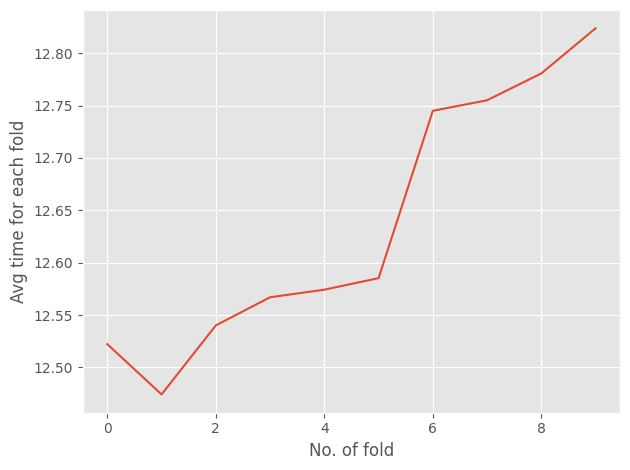

In [42]:
import matplotlib.pyplot as plt

times_enb7_n = np.zeros((10,100))
for i, row in enumerate(times_enb7):
    times_enb7_n[i, :len(row)] = row

times_enb7_n_n = np.mean(times_enb7_n,axis=1)
plt.style.use('ggplot')
plt.plot(times_enb7_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")

plt.tight_layout()
plt.savefig("enb7 times")
plt.show()

In [43]:
import gc
gc.collect()

3475

In [44]:
train_acc_enb7_n = np.zeros((10,100))
for i, row in enumerate(train_acc_enb7):
    train_acc_enb7_n[i, :len(row)] = row
    
test_acc_enb7_n = np.zeros((10,100))
for i, row in enumerate(test_acc_enb7):
    test_acc_enb7_n[i, :len(row)] = row
    
train_loss_enb7_n = np.zeros((10,100))
for i, row in enumerate(train_loss_enb7):
    train_loss_enb7_n[i, :len(row)] = row
    
test_loss_enb7_n = np.zeros((10,100))
for i, row in enumerate(test_loss_enb7):
    test_loss_enb7_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_enb7_n = np.mean(train_acc_enb7_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_enb7_n = np.mean(test_acc_enb7_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_enb7_n = np.mean(train_loss_enb7_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_enb7_n = np.mean(test_loss_enb7_n,axis=0)

In [45]:
data = [train_acc_enb7_n,test_acc_enb7_n,train_loss_enb7_n,test_loss_enb7_n]

df = pd.DataFrame(data)
df.to_csv('enb7_acc', index=False)
df = pd.read_csv('enb7_acc')

train_acc_enb7_n = df.iloc[0]
test_acc_enb7_n = df.iloc[1]
train_loss_enb7_n = df.iloc[2]
test_loss_enb7_n = df.iloc[3]


df_t = pd.DataFrame([times_enb7_n_n])
df_t.to_csv('enb7_times', index=False)
df_t = pd.read_csv('enb7_times')

times_enb7_n_n = df_t.iloc[0]

In [46]:
test_loss_enb7_n

0     1.414597
1     1.414597
2     1.414597
3     1.414597
4     1.414597
        ...   
95    1.414597
96    1.414597
97    1.414597
98    1.414597
99    1.414597
Name: 3, Length: 100, dtype: float64

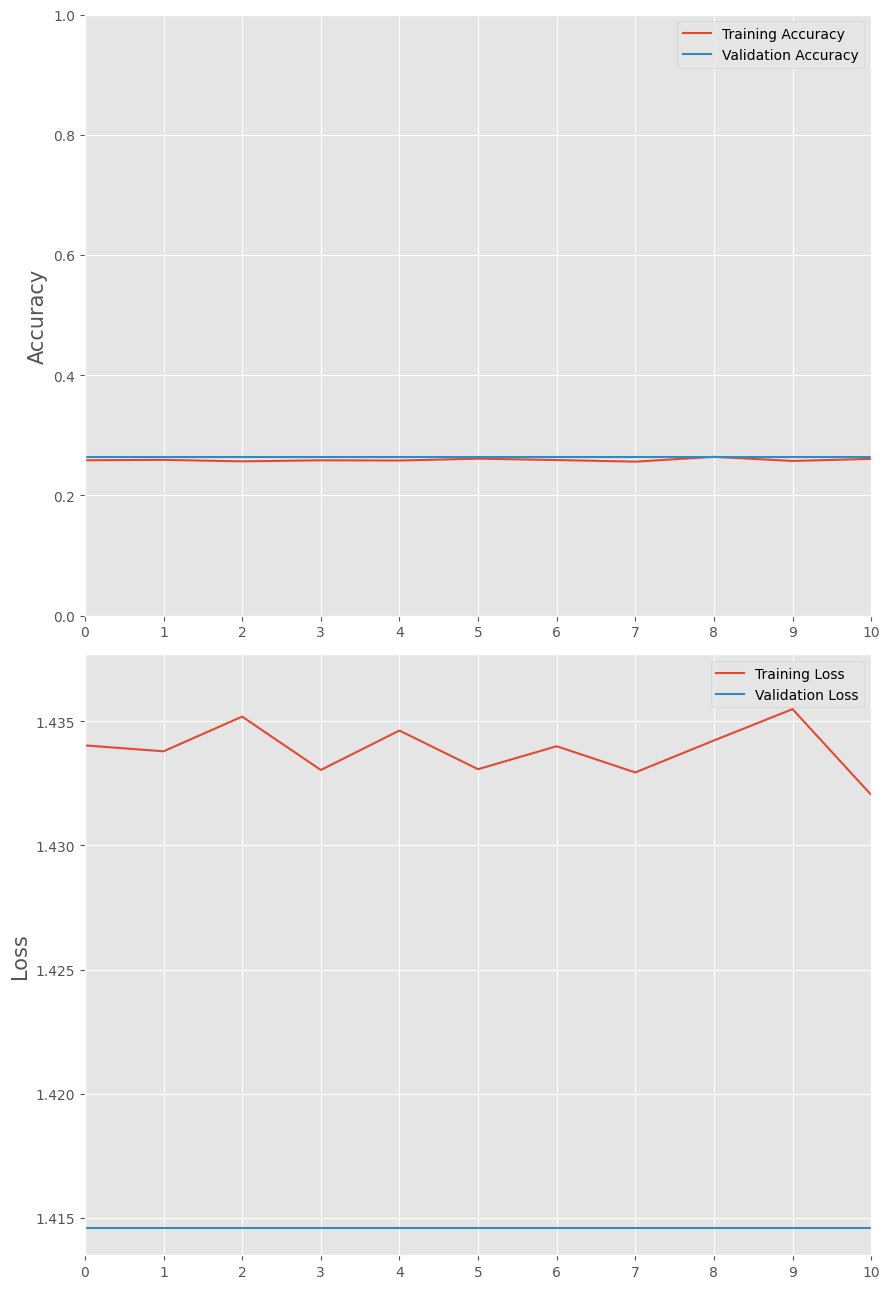

In [47]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_enb7_n, label='Training Accuracy')
axs[0].plot(test_acc_enb7_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_enb7_n, label='Training Loss')
axs[1].plot(test_loss_enb7_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,10])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("enb7 Training and Testing Loss")
plt.show()

In [48]:
np.array(scores_enb7).shape

(10, 302, 4)

In [49]:
y_pred_enb7 = np.argmax(scores_enb7,axis=2)

In [50]:
y_pred_enb7.shape

(10, 302)

In [51]:
np.array(y_test_all_enb7).shape

(10, 302)

In [52]:
from sklearn.metrics import accuracy_score
acc_scores_enb7 = []
for i in range(len(y_test_all_enb7)):
    acc_scores_enb7.append(accuracy_score(y_true = y_test_all_enb7[i],y_pred = y_pred_enb7[i]))

In [53]:
acc_scores_enb7

[0.28807947019867547,
 0.32781456953642385,
 0.3443708609271523,
 0.31788079470198677,
 0.11920529801324503,
 0.3344370860927152,
 0.152317880794702,
 0.18211920529801323,
 0.304635761589404,
 0.22847682119205298]

In [54]:
df_acc = pd.DataFrame([acc_scores_enb7])

df_acc.to_csv('enb7_accuracy', index=False)

df_acc = pd.read_csv('enb7_accuracy')

acc_scores_enb7 = df_acc.iloc[0].values

In [55]:
y_test_all_n = np.array(y_test_all_enb7)

y_pred_enb7_n = y_pred_enb7.flatten()
y_test_all_n = y_test_all_n.flatten()

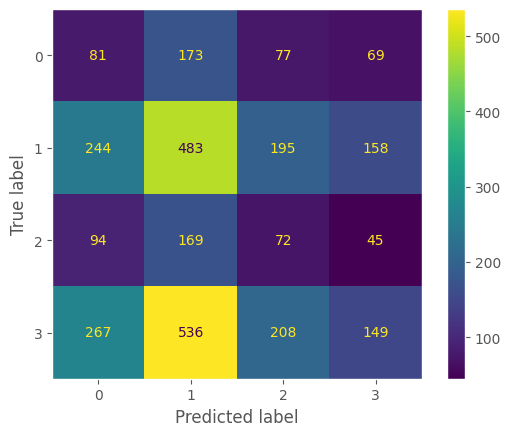

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_enb7_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("enb7")

plt.show()

In [57]:
import gc
gc.collect()

30026

In [58]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_enb7_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.12      0.20      0.15       400
           1       0.35      0.45      0.40      1080
           2       0.13      0.19      0.15       380
           3       0.35      0.13      0.19      1160

    accuracy                           0.26      3020
   macro avg       0.24      0.24      0.22      3020
weighted avg       0.29      0.26      0.25      3020



# ResNetV2

In [59]:
import gc
gc.collect()

0

In [60]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_rnv2 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_rnv2.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [61]:
def create_model_rnv2():

    model_rnv2 = tf.keras.Sequential([
    tf.keras.applications.ResNet50V2(input_shape=(X_n.shape[1], X_n.shape[2], X_n.shape[3]),include_top= False,weights='imagenet'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_rnv2.trainable = False
    return model_rnv2

In [62]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_rnv2 = []
y_test_all_rnv2 = []
train_acc_rnv2 = []
test_acc_rnv2 = []
train_loss_rnv2 = []
test_loss_rnv2 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_rnv2.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_rnv2 = None
    model_rnv2 = create_model_rnv2()
        
    model_rnv2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_rnv2.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [ reduce_lr,time_callback])
    
    
    x = model_rnv2.predict(X_test)
    
    scores_rnv2.append(x)
    train_acc_rnv2.append(history.history["accuracy"])
    test_acc_rnv2.append(history.history["val_accuracy"])
    train_loss_rnv2.append(history.history["loss"])
    test_loss_rnv2.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 5s 47ms/step - loss: 13.6919 - accuracy: 0.2469 - val_loss: 9.5888 - val_accuracy: 0.2132 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 39ms/step - loss: 13.8248 - accuracy: 0.2494 - val_loss: 9.5888 - val_accuracy: 0.2132 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 39ms/step - loss: 14.5311 - accuracy: 0.2253 - val_loss: 9.5888 - val_accuracy: 0.2132 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 39ms/step - loss: 14.5507 - accuracy: 0.2355 - val_loss: 9.5888 - val_accuracy: 0.2132 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 39ms/step - loss: 14.7176 - accuracy: 0.2289 - val_loss: 9.5888 - val_accuracy: 0.2132 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 39ms/step - loss: 14.4413 - accuracy: 0.2232 - val_loss: 9.5888 - val_accuracy: 0.2132 - lr: 0.0010
Epoch 7/100
77/77 [====================

77/77 [==============================] - ETA: 0s - loss: 14.4296 - accuracy: 0.2281
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 3.00 seconds
77/77 [==============================] - 3s 39ms/step - loss: 14.4296 - accuracy: 0.2281 - val_loss: 9.5888 - val_accuracy: 0.2132 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 39ms/step - loss: 14.9806 - accuracy: 0.2200 - val_loss: 9.5888 - val_accuracy: 0.2132 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 39ms/step - loss: 14.1565 - accuracy: 0.2367 - val_loss: 9.5888 - val_accuracy: 0.2132 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 3s 39ms/step - loss: 13.8432 - accuracy: 0.2531 - val_loss: 9.5888 - val_accuracy: 0.2132 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 3s 39ms/step - loss: 14.1591 - accuracy: 0.2379 - val_loss: 9.5888 - val_accuracy: 0.2132 - lr: 1.6000e-06
Epoch 34

Epoch 57/100
75/77 [============================>.] - ETA: 0s - loss: 14.3806 - accuracy: 0.2383
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 2.98 seconds
77/77 [==============================] - 3s 39ms/step - loss: 14.3879 - accuracy: 0.2392 - val_loss: 9.5888 - val_accuracy: 0.2132 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 3s 39ms/step - loss: 14.2485 - accuracy: 0.2351 - val_loss: 9.5888 - val_accuracy: 0.2132 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 3s 39ms/step - loss: 13.6180 - accuracy: 0.2339 - val_loss: 9.5888 - val_accuracy: 0.2132 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 39ms/step - loss: 14.4077 - accuracy: 0.2371 - val_loss: 9.5888 - val_accuracy: 0.2132 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 39ms/step - loss: 14.5372 - accuracy: 0.2179 - val_loss: 9.5888 - val_accuracy: 0.2132 - lr: 2.5600

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 14.6553 - accuracy: 0.2269
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 3.01 seconds
77/77 [==============================] - 3s 39ms/step - loss: 14.6553 - accuracy: 0.2269 - val_loss: 9.5888 - val_accuracy: 0.2132 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 3s 39ms/step - loss: 14.2764 - accuracy: 0.2531 - val_loss: 9.5888 - val_accuracy: 0.2132 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 3s 39ms/step - loss: 14.4060 - accuracy: 0.2330 - val_loss: 9.5888 - val_accuracy: 0.2132 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 3s 39ms/step - loss: 14.6151 - accuracy: 0.2289 - val_loss: 9.5888 - val_accuracy: 0.2132 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 3s 39ms/step - loss: 14.1413 - accuracy: 0.2314 - val_loss: 9.5888 - val_accuracy: 0.2132 - lr: 4.0960e

Epoch 13/100
77/77 [==============================] - 3s 39ms/step - loss: 39.1786 - accuracy: 0.1410 - val_loss: 35.9098 - val_accuracy: 0.1176 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 3s 39ms/step - loss: 40.2071 - accuracy: 0.1488 - val_loss: 35.9098 - val_accuracy: 0.1176 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 39.7236 - accuracy: 0.1447
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 3.00 seconds
77/77 [==============================] - 3s 39ms/step - loss: 39.7236 - accuracy: 0.1447 - val_loss: 35.9098 - val_accuracy: 0.1176 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 3s 39ms/step - loss: 40.5062 - accuracy: 0.1439 - val_loss: 35.9098 - val_accuracy: 0.1176 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 3s 39ms/step - loss: 40.0023 - accuracy: 0.1427 - val_loss: 35.9098 - val_accuracy: 0.1176 - lr: 4

Epoch 41/100
77/77 [==============================] - 3s 39ms/step - loss: 40.2312 - accuracy: 0.1439 - val_loss: 35.9098 - val_accuracy: 0.1176 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 3s 39ms/step - loss: 39.6930 - accuracy: 0.1476 - val_loss: 35.9098 - val_accuracy: 0.1176 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 39.3884 - accuracy: 0.1415
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 2.99 seconds
77/77 [==============================] - 3s 39ms/step - loss: 39.3884 - accuracy: 0.1415 - val_loss: 35.9098 - val_accuracy: 0.1176 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 3s 39ms/step - loss: 39.3412 - accuracy: 0.1484 - val_loss: 35.9098 - val_accuracy: 0.1176 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 3s 39ms/step - loss: 40.2438 - accuracy: 0.1513 - val_loss: 35.9098 - val_accuracy: 0.1176 - lr: 6.

Epoch 69/100
77/77 [==============================] - 3s 39ms/step - loss: 40.2050 - accuracy: 0.1517 - val_loss: 35.9098 - val_accuracy: 0.1176 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 3s 39ms/step - loss: 39.4213 - accuracy: 0.1460 - val_loss: 35.9098 - val_accuracy: 0.1176 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 39.6207 - accuracy: 0.1447
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 2.97 seconds
77/77 [==============================] - 3s 39ms/step - loss: 39.6207 - accuracy: 0.1447 - val_loss: 35.9098 - val_accuracy: 0.1176 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 3s 39ms/step - loss: 39.7008 - accuracy: 0.1509 - val_loss: 35.9098 - val_accuracy: 0.1176 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 3s 38ms/step - loss: 40.0608 - accuracy: 0.1447 - val_loss: 35.9098 - val_accuracy: 0.1176 - lr: 1

Epoch 97/100
77/77 [==============================] - 3s 39ms/step - loss: 39.8069 - accuracy: 0.1455 - val_loss: 35.9098 - val_accuracy: 0.1176 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 3s 39ms/step - loss: 40.5030 - accuracy: 0.1451 - val_loss: 35.9098 - val_accuracy: 0.1176 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 40.0552 - accuracy: 0.1455
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 3.00 seconds
77/77 [==============================] - 3s 39ms/step - loss: 40.0552 - accuracy: 0.1455 - val_loss: 35.9098 - val_accuracy: 0.1176 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 1s 33ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 5s 46ms/step - loss: 22.7012 - accuracy: 0.3397 - val_loss: 16.7527 - val_accuracy: 0.3713 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 39ms/ste

Epoch 25/100
77/77 [==============================] - 3s 39ms/step - loss: 22.9583 - accuracy: 0.3418 - val_loss: 16.7527 - val_accuracy: 0.3713 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 3s 39ms/step - loss: 22.2742 - accuracy: 0.3406 - val_loss: 16.7527 - val_accuracy: 0.3713 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 3s 39ms/step - loss: 22.3841 - accuracy: 0.3369 - val_loss: 16.7527 - val_accuracy: 0.3713 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 3s 39ms/step - loss: 23.2186 - accuracy: 0.3459 - val_loss: 16.7527 - val_accuracy: 0.3713 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 22.7078 - accuracy: 0.3269
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 3.01 seconds
77/77 [==============================] - 3s 39ms/step - loss: 22.6602 - accuracy: 0.3267 - val_loss: 16.7527 - val_accuracy: 0.3713 - lr: 8

Epoch 53/100
77/77 [==============================] - 3s 39ms/step - loss: 23.2572 - accuracy: 0.3279 - val_loss: 16.7527 - val_accuracy: 0.3713 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 3s 39ms/step - loss: 22.9179 - accuracy: 0.3373 - val_loss: 16.7527 - val_accuracy: 0.3713 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 3s 39ms/step - loss: 22.9854 - accuracy: 0.3377 - val_loss: 16.7527 - val_accuracy: 0.3713 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 3s 39ms/step - loss: 22.5815 - accuracy: 0.3475 - val_loss: 16.7527 - val_accuracy: 0.3713 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 23.3348 - accuracy: 0.3369
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 3.02 seconds
77/77 [==============================] - 3s 39ms/step - loss: 23.3348 - accuracy: 0.3369 - val_loss: 16.7527 - val_accuracy: 0.3713 - lr: 1

Epoch 81/100
77/77 [==============================] - 3s 39ms/step - loss: 23.0335 - accuracy: 0.3373 - val_loss: 16.7527 - val_accuracy: 0.3713 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 3s 39ms/step - loss: 22.6686 - accuracy: 0.3401 - val_loss: 16.7527 - val_accuracy: 0.3713 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 3s 39ms/step - loss: 22.6695 - accuracy: 0.3361 - val_loss: 16.7527 - val_accuracy: 0.3713 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 3s 39ms/step - loss: 23.1055 - accuracy: 0.3434 - val_loss: 16.7527 - val_accuracy: 0.3713 - lr: 2.0480e-11
Epoch 85/100
76/77 [============================>.] - ETA: 0s - loss: 22.3010 - accuracy: 0.3421
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 3.01 seconds
77/77 [==============================] - 3s 39ms/step - loss: 22.2762 - accuracy: 0.3418 - val_loss: 16.7527 - val_accuracy: 0.3713 - lr: 2.

Epoch 9/100
77/77 [==============================] - 3s 39ms/step - loss: 19.5682 - accuracy: 0.2604 - val_loss: 15.8628 - val_accuracy: 0.3125 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 3s 39ms/step - loss: 19.6236 - accuracy: 0.2539 - val_loss: 15.8628 - val_accuracy: 0.3125 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 3s 39ms/step - loss: 19.1473 - accuracy: 0.2719 - val_loss: 15.8628 - val_accuracy: 0.3125 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 3s 39ms/step - loss: 19.3636 - accuracy: 0.2649 - val_loss: 15.8628 - val_accuracy: 0.3125 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 3s 39ms/step - loss: 19.9176 - accuracy: 0.2596 - val_loss: 15.8628 - val_accuracy: 0.3125 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 3s 39ms/step - loss: 19.8245 - accuracy: 0.2527 - val_loss: 15.8628 - val_accuracy: 0.3125 - lr: 2.0000e-04
Epoch 15/100
77/77 [=========

Epoch 37/100
77/77 [==============================] - 3s 39ms/step - loss: 19.3799 - accuracy: 0.2760 - val_loss: 15.8628 - val_accuracy: 0.3125 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 3s 39ms/step - loss: 19.2728 - accuracy: 0.2600 - val_loss: 15.8628 - val_accuracy: 0.3125 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 3s 39ms/step - loss: 19.6281 - accuracy: 0.2629 - val_loss: 15.8628 - val_accuracy: 0.3125 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 3s 39ms/step - loss: 19.1884 - accuracy: 0.2706 - val_loss: 15.8628 - val_accuracy: 0.3125 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 3s 39ms/step - loss: 19.2618 - accuracy: 0.2572 - val_loss: 15.8628 - val_accuracy: 0.3125 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 3s 39ms/step - loss: 19.4751 - accuracy: 0.2686 - val_loss: 15.8628 - val_accuracy: 0.3125 - lr: 3.2000e-07
Epoch 43/100
76/77 [========

Epoch 65/100
77/77 [==============================] - 3s 39ms/step - loss: 19.6009 - accuracy: 0.2608 - val_loss: 15.8628 - val_accuracy: 0.3125 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 3s 39ms/step - loss: 19.6496 - accuracy: 0.2502 - val_loss: 15.8628 - val_accuracy: 0.3125 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 3s 39ms/step - loss: 18.9095 - accuracy: 0.2531 - val_loss: 15.8628 - val_accuracy: 0.3125 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 3s 39ms/step - loss: 19.4972 - accuracy: 0.2698 - val_loss: 15.8628 - val_accuracy: 0.3125 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 3s 39ms/step - loss: 19.7566 - accuracy: 0.2555 - val_loss: 15.8628 - val_accuracy: 0.3125 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 3s 39ms/step - loss: 19.4842 - accuracy: 0.2612 - val_loss: 15.8628 - val_accuracy: 0.3125 - lr: 5.1200e-10
Epoch 71/100
77/77 [========

Epoch 93/100
77/77 [==============================] - 3s 39ms/step - loss: 19.6068 - accuracy: 0.2612 - val_loss: 15.8628 - val_accuracy: 0.3125 - lr: 8.1920e-13
Epoch 94/100
77/77 [==============================] - 3s 39ms/step - loss: 19.6625 - accuracy: 0.2567 - val_loss: 15.8628 - val_accuracy: 0.3125 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 3s 39ms/step - loss: 19.4848 - accuracy: 0.2657 - val_loss: 15.8628 - val_accuracy: 0.3125 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 3s 39ms/step - loss: 19.4265 - accuracy: 0.2678 - val_loss: 15.8628 - val_accuracy: 0.3125 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 3s 39ms/step - loss: 19.5938 - accuracy: 0.2539 - val_loss: 15.8628 - val_accuracy: 0.3125 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 3s 39ms/step - loss: 19.5057 - accuracy: 0.2502 - val_loss: 15.8628 - val_accuracy: 0.3125 - lr: 8.1920e-13
Epoch 99/100
76/77 [========

77/77 [==============================] - 3s 39ms/step - loss: 21.3000 - accuracy: 0.2089 - val_loss: 15.5272 - val_accuracy: 0.1765 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 21.1887 - accuracy: 0.2228
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 3.03 seconds
77/77 [==============================] - 3s 39ms/step - loss: 21.1887 - accuracy: 0.2228 - val_loss: 15.5272 - val_accuracy: 0.1765 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 3s 39ms/step - loss: 21.4310 - accuracy: 0.2114 - val_loss: 15.5272 - val_accuracy: 0.1765 - lr: 8.0000e-06
Epoch 24/100
77/77 [==============================] - 3s 39ms/step - loss: 21.1439 - accuracy: 0.2081 - val_loss: 15.5272 - val_accuracy: 0.1765 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 3s 39ms/step - loss: 21.5358 - accuracy: 0.2093 - val_loss: 15.5272 - val_accuracy: 0.1765 - lr: 8.0000e-06
Epoc

Epoch 49/100
77/77 [==============================] - 3s 39ms/step - loss: 21.0077 - accuracy: 0.2208 - val_loss: 15.5272 - val_accuracy: 0.1765 - lr: 6.4000e-08
Epoch 50/100
76/77 [============================>.] - ETA: 0s - loss: 21.0730 - accuracy: 0.2113
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 2.99 seconds
77/77 [==============================] - 3s 39ms/step - loss: 21.0332 - accuracy: 0.2118 - val_loss: 15.5272 - val_accuracy: 0.1765 - lr: 6.4000e-08
Epoch 51/100
77/77 [==============================] - 3s 39ms/step - loss: 20.8200 - accuracy: 0.2179 - val_loss: 15.5272 - val_accuracy: 0.1765 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 3s 39ms/step - loss: 21.1112 - accuracy: 0.2175 - val_loss: 15.5272 - val_accuracy: 0.1765 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 3s 39ms/step - loss: 21.6785 - accuracy: 0.2081 - val_loss: 15.5272 - val_accuracy: 0.1765 - lr: 1

Epoch 77/100
77/77 [==============================] - 3s 39ms/step - loss: 21.8241 - accuracy: 0.2056 - val_loss: 15.5272 - val_accuracy: 0.1765 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 21.6546 - accuracy: 0.2208
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 3.00 seconds
77/77 [==============================] - 3s 39ms/step - loss: 21.6546 - accuracy: 0.2208 - val_loss: 15.5272 - val_accuracy: 0.1765 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 3s 39ms/step - loss: 22.0784 - accuracy: 0.2122 - val_loss: 15.5272 - val_accuracy: 0.1765 - lr: 2.0480e-11
Epoch 80/100
77/77 [==============================] - 3s 39ms/step - loss: 21.4685 - accuracy: 0.2056 - val_loss: 15.5272 - val_accuracy: 0.1765 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 3s 39ms/step - loss: 21.4685 - accuracy: 0.2216 - val_loss: 15.5272 - val_accuracy: 0.1765 - lr: 2

Epoch 5/100
77/77 [==============================] - 3s 39ms/step - loss: 15.9043 - accuracy: 0.2698 - val_loss: 11.1482 - val_accuracy: 0.2794 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 39ms/step - loss: 16.5382 - accuracy: 0.2473 - val_loss: 11.1482 - val_accuracy: 0.2794 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 3s 39ms/step - loss: 15.9573 - accuracy: 0.2625 - val_loss: 11.1482 - val_accuracy: 0.2794 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - ETA: 0s - loss: 15.9419 - accuracy: 0.2698
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 3.01 seconds
77/77 [==============================] - 3s 39ms/step - loss: 15.9419 - accuracy: 0.2698 - val_loss: 11.1482 - val_accuracy: 0.2794 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 3s 39ms/step - loss: 15.5471 - accuracy: 0.2756 - val_loss: 11.1482 - val_accuracy: 0.2794 - lr: 2.0000e-04
Epoch 10/100


Epoch 33/100
77/77 [==============================] - 3s 39ms/step - loss: 15.8652 - accuracy: 0.2661 - val_loss: 11.1482 - val_accuracy: 0.2794 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 3s 39ms/step - loss: 16.0214 - accuracy: 0.2653 - val_loss: 11.1482 - val_accuracy: 0.2794 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 3s 39ms/step - loss: 15.7630 - accuracy: 0.2686 - val_loss: 11.1482 - val_accuracy: 0.2794 - lr: 1.6000e-06
Epoch 36/100
76/77 [============================>.] - ETA: 0s - loss: 16.1651 - accuracy: 0.2870
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 3.03 seconds
77/77 [==============================] - 3s 39ms/step - loss: 16.1528 - accuracy: 0.2862 - val_loss: 11.1482 - val_accuracy: 0.2794 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 3s 39ms/step - loss: 15.9160 - accuracy: 0.2743 - val_loss: 11.1482 - val_accuracy: 0.2794 - lr: 3.

Epoch 61/100
77/77 [==============================] - 3s 39ms/step - loss: 16.0543 - accuracy: 0.2625 - val_loss: 11.1482 - val_accuracy: 0.2794 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 3s 39ms/step - loss: 15.9880 - accuracy: 0.2612 - val_loss: 11.1482 - val_accuracy: 0.2794 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 3s 39ms/step - loss: 15.6239 - accuracy: 0.2653 - val_loss: 11.1482 - val_accuracy: 0.2794 - lr: 2.5600e-09
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 16.2305 - accuracy: 0.2660
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 3.02 seconds
77/77 [==============================] - 3s 39ms/step - loss: 16.1983 - accuracy: 0.2670 - val_loss: 11.1482 - val_accuracy: 0.2794 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 3s 39ms/step - loss: 15.8836 - accuracy: 0.2694 - val_loss: 11.1482 - val_accuracy: 0.2794 - lr: 5.12

Epoch 89/100
77/77 [==============================] - 3s 39ms/step - loss: 15.7764 - accuracy: 0.2715 - val_loss: 11.1482 - val_accuracy: 0.2794 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 3s 39ms/step - loss: 15.6274 - accuracy: 0.2760 - val_loss: 11.1482 - val_accuracy: 0.2794 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 3s 39ms/step - loss: 15.7082 - accuracy: 0.2731 - val_loss: 11.1482 - val_accuracy: 0.2794 - lr: 4.0960e-12
Epoch 92/100
77/77 [==============================] - ETA: 0s - loss: 15.4789 - accuracy: 0.2743
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 3.00 seconds
77/77 [==============================] - 3s 39ms/step - loss: 15.4789 - accuracy: 0.2743 - val_loss: 11.1482 - val_accuracy: 0.2794 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 3s 39ms/step - loss: 16.4154 - accuracy: 0.2723 - val_loss: 11.1482 - val_accuracy: 0.2794 - lr: 8.

Epoch 17/100
77/77 [==============================] - 3s 39ms/step - loss: 17.4424 - accuracy: 0.3561 - val_loss: 13.5879 - val_accuracy: 0.4118 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 3s 39ms/step - loss: 17.6131 - accuracy: 0.3679 - val_loss: 13.5879 - val_accuracy: 0.4118 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 3s 39ms/step - loss: 17.5397 - accuracy: 0.3483 - val_loss: 13.5879 - val_accuracy: 0.4118 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 3s 39ms/step - loss: 17.9705 - accuracy: 0.3577 - val_loss: 13.5879 - val_accuracy: 0.4118 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 3s 39ms/step - loss: 17.6859 - accuracy: 0.3598 - val_loss: 13.5879 - val_accuracy: 0.4118 - lr: 4.0000e-05
Epoch 22/100
76/77 [============================>.] - ETA: 0s - loss: 17.2536 - accuracy: 0.3692
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for e

Epoch 45/100
77/77 [==============================] - 3s 39ms/step - loss: 17.6777 - accuracy: 0.3585 - val_loss: 13.5879 - val_accuracy: 0.4118 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 3s 39ms/step - loss: 17.7027 - accuracy: 0.3688 - val_loss: 13.5879 - val_accuracy: 0.4118 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 3s 39ms/step - loss: 17.6783 - accuracy: 0.3696 - val_loss: 13.5879 - val_accuracy: 0.4118 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 3s 39ms/step - loss: 17.4421 - accuracy: 0.3504 - val_loss: 13.5879 - val_accuracy: 0.4118 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 3s 39ms/step - loss: 18.3808 - accuracy: 0.3549 - val_loss: 13.5879 - val_accuracy: 0.4118 - lr: 6.4000e-08
Epoch 50/100
76/77 [============================>.] - ETA: 0s - loss: 17.6520 - accuracy: 0.3590
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for 

Epoch 73/100
77/77 [==============================] - 3s 39ms/step - loss: 17.5038 - accuracy: 0.3635 - val_loss: 13.5879 - val_accuracy: 0.4118 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 3s 39ms/step - loss: 17.2625 - accuracy: 0.3553 - val_loss: 13.5879 - val_accuracy: 0.4118 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 3s 39ms/step - loss: 17.3248 - accuracy: 0.3606 - val_loss: 13.5879 - val_accuracy: 0.4118 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 3s 39ms/step - loss: 17.4664 - accuracy: 0.3684 - val_loss: 13.5879 - val_accuracy: 0.4118 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 3s 39ms/step - loss: 18.0306 - accuracy: 0.3565 - val_loss: 13.5879 - val_accuracy: 0.4118 - lr: 1.0240e-10
Epoch 78/100
76/77 [============================>.] - ETA: 0s - loss: 17.1985 - accuracy: 0.3544
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for 

10/10 [==============================] - 1s 35ms/step
Training on fold 8/10...
Epoch 1/100
77/77 [==============================] - 5s 45ms/step - loss: 32.3252 - accuracy: 0.1946 - val_loss: 30.8235 - val_accuracy: 0.1691 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 39ms/step - loss: 33.0841 - accuracy: 0.1885 - val_loss: 30.8235 - val_accuracy: 0.1691 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 39ms/step - loss: 32.5038 - accuracy: 0.2016 - val_loss: 30.8235 - val_accuracy: 0.1691 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 39ms/step - loss: 32.5993 - accuracy: 0.2016 - val_loss: 30.8235 - val_accuracy: 0.1691 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 39ms/step - loss: 32.9104 - accuracy: 0.1934 - val_loss: 30.8235 - val_accuracy: 0.1691 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 39ms/step - loss: 32.5056 - accuracy: 0.2061 - val_loss: 30.8235 - val_accuracy:

77/77 [==============================] - ETA: 0s - loss: 31.7397 - accuracy: 0.1913
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 3.02 seconds
77/77 [==============================] - 3s 39ms/step - loss: 31.7397 - accuracy: 0.1913 - val_loss: 30.8235 - val_accuracy: 0.1691 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 39ms/step - loss: 32.5594 - accuracy: 0.1966 - val_loss: 30.8235 - val_accuracy: 0.1691 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 39ms/step - loss: 32.7994 - accuracy: 0.1864 - val_loss: 30.8235 - val_accuracy: 0.1691 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 3s 39ms/step - loss: 32.2440 - accuracy: 0.1905 - val_loss: 30.8235 - val_accuracy: 0.1691 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 3s 39ms/step - loss: 32.8504 - accuracy: 0.1872 - val_loss: 30.8235 - val_accuracy: 0.1691 - lr: 1.6000e-06
Epo

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 32.3873 - accuracy: 0.1913
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 3.03 seconds
77/77 [==============================] - 3s 39ms/step - loss: 32.3873 - accuracy: 0.1913 - val_loss: 30.8235 - val_accuracy: 0.1691 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 3s 39ms/step - loss: 32.7478 - accuracy: 0.2011 - val_loss: 30.8235 - val_accuracy: 0.1691 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 3s 39ms/step - loss: 32.3950 - accuracy: 0.1926 - val_loss: 30.8235 - val_accuracy: 0.1691 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 40ms/step - loss: 32.0958 - accuracy: 0.2016 - val_loss: 30.8235 - val_accuracy: 0.1691 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 39ms/step - loss: 32.5469 - accuracy: 0.1966 - val_loss: 30.8235 - val_accuracy: 0.1691 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 32.7079 - accuracy: 0.1950
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 3.01 seconds
77/77 [==============================] - 3s 39ms/step - loss: 32.7079 - accuracy: 0.1950 - val_loss: 30.8235 - val_accuracy: 0.1691 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 3s 39ms/step - loss: 32.3287 - accuracy: 0.1987 - val_loss: 30.8235 - val_accuracy: 0.1691 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 3s 39ms/step - loss: 32.4477 - accuracy: 0.1946 - val_loss: 30.8235 - val_accuracy: 0.1691 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 3s 39ms/step - loss: 32.4989 - accuracy: 0.1905 - val_loss: 30.8235 - val_accuracy: 0.1691 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 3s 39ms/step - loss: 32.4049 - accuracy: 0.1922 - val_loss: 30.8235 - val_accuracy: 0.1691 - lr: 4.

Epoch 13/100
77/77 [==============================] - 3s 39ms/step - loss: 21.3817 - accuracy: 0.2249 - val_loss: 17.6607 - val_accuracy: 0.2169 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 3s 39ms/step - loss: 21.9332 - accuracy: 0.2191 - val_loss: 17.6607 - val_accuracy: 0.2169 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 21.1087 - accuracy: 0.2220
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 3.00 seconds
77/77 [==============================] - 3s 39ms/step - loss: 21.1087 - accuracy: 0.2220 - val_loss: 17.6607 - val_accuracy: 0.2169 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 3s 39ms/step - loss: 21.7685 - accuracy: 0.2257 - val_loss: 17.6607 - val_accuracy: 0.2169 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 3s 39ms/step - loss: 21.5571 - accuracy: 0.2179 - val_loss: 17.6607 - val_accuracy: 0.2169 - lr: 4

Epoch 41/100
77/77 [==============================] - 3s 39ms/step - loss: 20.9225 - accuracy: 0.2347 - val_loss: 17.6607 - val_accuracy: 0.2169 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 3s 39ms/step - loss: 21.1124 - accuracy: 0.2253 - val_loss: 17.6607 - val_accuracy: 0.2169 - lr: 3.2000e-07
Epoch 43/100
76/77 [============================>.] - ETA: 0s - loss: 21.1425 - accuracy: 0.2307
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 2.99 seconds
77/77 [==============================] - 3s 39ms/step - loss: 21.1641 - accuracy: 0.2298 - val_loss: 17.6607 - val_accuracy: 0.2169 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 3s 39ms/step - loss: 21.2128 - accuracy: 0.2322 - val_loss: 17.6607 - val_accuracy: 0.2169 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 3s 39ms/step - loss: 22.2182 - accuracy: 0.2171 - val_loss: 17.6607 - val_accuracy: 0.2169 - lr: 6.

Epoch 69/100
77/77 [==============================] - 3s 39ms/step - loss: 21.1022 - accuracy: 0.2244 - val_loss: 17.6607 - val_accuracy: 0.2169 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 3s 39ms/step - loss: 21.1506 - accuracy: 0.2294 - val_loss: 17.6607 - val_accuracy: 0.2169 - lr: 5.1200e-10
Epoch 71/100
76/77 [============================>.] - ETA: 0s - loss: 21.3940 - accuracy: 0.2278
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 3.02 seconds
77/77 [==============================] - 3s 39ms/step - loss: 21.3812 - accuracy: 0.2277 - val_loss: 17.6607 - val_accuracy: 0.2169 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 3s 39ms/step - loss: 21.1048 - accuracy: 0.2404 - val_loss: 17.6607 - val_accuracy: 0.2169 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 3s 39ms/step - loss: 21.1925 - accuracy: 0.2146 - val_loss: 17.6607 - val_accuracy: 0.2169 - lr: 1

Epoch 97/100
77/77 [==============================] - 3s 39ms/step - loss: 21.3745 - accuracy: 0.2253 - val_loss: 17.6607 - val_accuracy: 0.2169 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 3s 39ms/step - loss: 21.7239 - accuracy: 0.2220 - val_loss: 17.6607 - val_accuracy: 0.2169 - lr: 8.1920e-13
Epoch 99/100
76/77 [============================>.] - ETA: 0s - loss: 22.2703 - accuracy: 0.2253
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 3.04 seconds
77/77 [==============================] - 3s 39ms/step - loss: 22.2445 - accuracy: 0.2244 - val_loss: 17.6607 - val_accuracy: 0.2169 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 1s 33ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 5s 46ms/step - loss: 34.2714 - accuracy: 0.3692 - val_loss: 32.2546 - val_accuracy: 0.4228 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 39ms/st

Epoch 25/100
77/77 [==============================] - 3s 39ms/step - loss: 33.9451 - accuracy: 0.3696 - val_loss: 32.2546 - val_accuracy: 0.4228 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 3s 39ms/step - loss: 33.6301 - accuracy: 0.3729 - val_loss: 32.2546 - val_accuracy: 0.4228 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 3s 39ms/step - loss: 34.0113 - accuracy: 0.3737 - val_loss: 32.2546 - val_accuracy: 0.4228 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 3s 39ms/step - loss: 33.3374 - accuracy: 0.3794 - val_loss: 32.2546 - val_accuracy: 0.4228 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 33.5174 - accuracy: 0.3734
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 2.99 seconds
77/77 [==============================] - 3s 39ms/step - loss: 33.5212 - accuracy: 0.3724 - val_loss: 32.2546 - val_accuracy: 0.4228 - lr: 8

Epoch 53/100
77/77 [==============================] - 3s 39ms/step - loss: 33.7680 - accuracy: 0.3761 - val_loss: 32.2546 - val_accuracy: 0.4228 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 3s 39ms/step - loss: 34.0670 - accuracy: 0.3745 - val_loss: 32.2546 - val_accuracy: 0.4228 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 3s 39ms/step - loss: 34.0308 - accuracy: 0.3700 - val_loss: 32.2546 - val_accuracy: 0.4228 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 3s 39ms/step - loss: 34.2892 - accuracy: 0.3716 - val_loss: 32.2546 - val_accuracy: 0.4228 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 34.4266 - accuracy: 0.3753
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 3.02 seconds
77/77 [==============================] - 3s 39ms/step - loss: 34.4266 - accuracy: 0.3753 - val_loss: 32.2546 - val_accuracy: 0.4228 - lr: 1

Epoch 81/100
77/77 [==============================] - 3s 39ms/step - loss: 34.0287 - accuracy: 0.3749 - val_loss: 32.2546 - val_accuracy: 0.4228 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 3s 39ms/step - loss: 34.5319 - accuracy: 0.3704 - val_loss: 32.2546 - val_accuracy: 0.4228 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 3s 39ms/step - loss: 33.2335 - accuracy: 0.3790 - val_loss: 32.2546 - val_accuracy: 0.4228 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 3s 39ms/step - loss: 33.8933 - accuracy: 0.3696 - val_loss: 32.2546 - val_accuracy: 0.4228 - lr: 2.0480e-11
Epoch 85/100
76/77 [============================>.] - ETA: 0s - loss: 33.9159 - accuracy: 0.3713
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 2.98 seconds
77/77 [==============================] - 3s 39ms/step - loss: 33.8364 - accuracy: 0.3720 - val_loss: 32.2546 - val_accuracy: 0.4228 - lr: 2.

In [63]:
import gc
gc.collect()

0

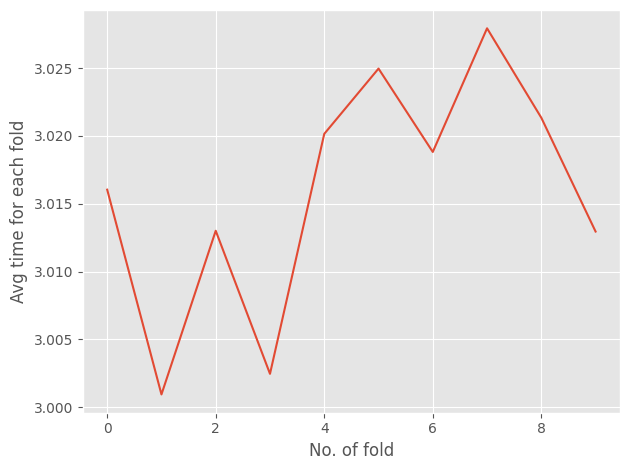

In [64]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

times_rnv2_n = np.zeros((10,100))
for i, row in enumerate(times_rnv2):
    times_rnv2_n[i, :len(row)] = row

times_rnv2_n_n = np.mean(times_rnv2_n,axis=1)

plt.plot(times_rnv2_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")

plt.tight_layout()
plt.savefig("rnv2 times")
plt.show()

In [65]:
train_acc_rnv2_n = np.zeros((10,100))
for i, row in enumerate(train_acc_rnv2):
    train_acc_rnv2_n[i, :len(row)] = row
    
test_acc_rnv2_n = np.zeros((10,100))
for i, row in enumerate(test_acc_rnv2):
    test_acc_rnv2_n[i, :len(row)] = row
    
train_loss_rnv2_n = np.zeros((10,100))
for i, row in enumerate(train_loss_rnv2):
    train_loss_rnv2_n[i, :len(row)] = row
    
test_loss_rnv2_n = np.zeros((10,100))
for i, row in enumerate(test_loss_rnv2):
    test_loss_rnv2_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_rnv2_n = np.mean(train_acc_rnv2_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_rnv2_n = np.mean(test_acc_rnv2_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_rnv2_n = np.mean(train_loss_rnv2_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_rnv2_n = np.mean(test_loss_rnv2_n,axis=0)

In [66]:
data = [train_acc_rnv2_n,test_acc_rnv2_n,train_loss_rnv2_n,test_loss_rnv2_n]

df = pd.DataFrame(data)
df.to_csv('rnv2_acc', index=False)
df = pd.read_csv('rnv2_acc')

train_acc_rnv2_n = df.iloc[0]
test_acc_rnv2_n = df.iloc[1]
train_loss_rnv2_n = df.iloc[2]
test_loss_rnv2_n = df.iloc[3]


df_t = pd.DataFrame([times_rnv2_n_n])
df_t.to_csv('rnv2_times', index=False)
df_t = pd.read_csv('rnv2_times')

times_rnv2_n_n = df_t.iloc[0]

In [67]:
train_acc_rnv2_n

0     0.260303
1     0.262306
2     0.263164
3     0.260998
4     0.260916
        ...   
95    0.267375
96    0.261120
97    0.263818
98    0.261406
99    0.261652
Name: 0, Length: 100, dtype: float64

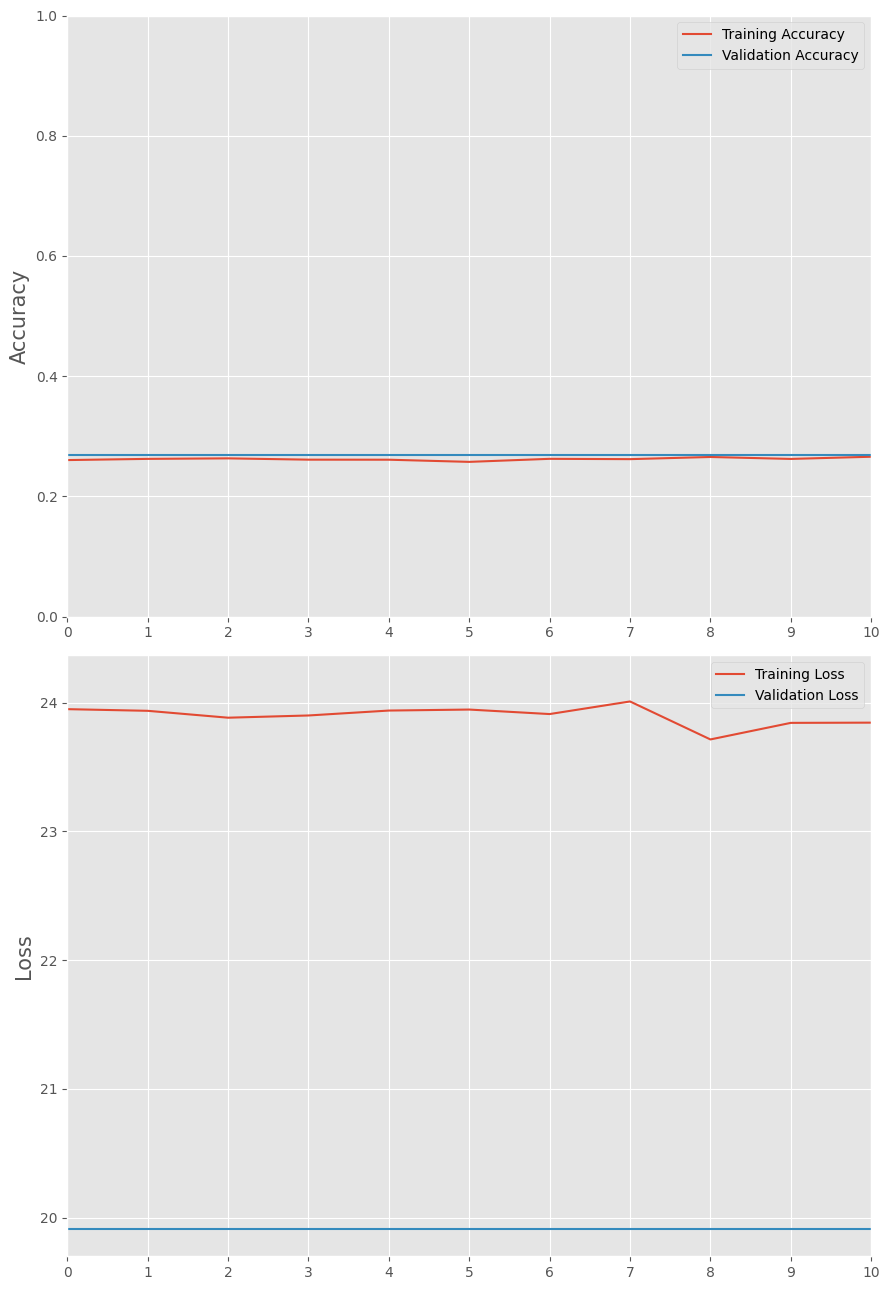

In [68]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_rnv2_n, label='Training Accuracy')
axs[0].plot(test_acc_rnv2_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_rnv2_n, label='Training Loss')
axs[1].plot(test_loss_rnv2_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("rnv2 Training and Testing Loss")
plt.show()

In [69]:
np.array(scores_rnv2).shape

(10, 302, 4)

In [70]:
y_pred_rnv2 = np.argmax(scores_rnv2,axis=2)

In [71]:
y_pred_rnv2.shape

(10, 302)

In [72]:
from sklearn.metrics import accuracy_score
acc_scores_rnv2 = []
for i in range(len(y_test_all_rnv2)):
    acc_scores_rnv2.append(accuracy_score(y_true = y_test_all_rnv2[i],y_pred = y_pred_rnv2[i]))

In [73]:
import gc
gc.collect()

23632

In [74]:
acc_scores_rnv2

[0.18874172185430463,
 0.1357615894039735,
 0.3609271523178808,
 0.31788079470198677,
 0.2251655629139073,
 0.2947019867549669,
 0.4139072847682119,
 0.16556291390728478,
 0.19205298013245034,
 0.3841059602649007]

In [75]:
df_acc = pd.DataFrame([acc_scores_rnv2])

df_acc.to_csv('rnv2_accuracy', index=False)

df_acc = pd.read_csv('rnv2_accuracy')

acc_scores_rnv2 = df_acc.iloc[0].values

In [76]:
y_test_all_n = np.array(y_test_all_rnv2)

y_pred_rnv2_n = y_pred_rnv2.flatten()
y_test_all_n = y_test_all_n.flatten()

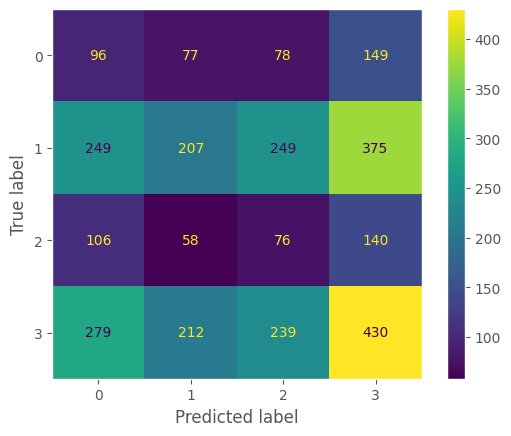

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_rnv2_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("rnv2")
plt.show()

In [78]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_rnv2_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.13      0.24      0.17       400
           1       0.37      0.19      0.25      1080
           2       0.12      0.20      0.15       380
           3       0.39      0.37      0.38      1160

    accuracy                           0.27      3020
   macro avg       0.25      0.25      0.24      3020
weighted avg       0.32      0.27      0.28      3020



# VGG16

In [79]:
import gc
gc.collect()

6127

In [80]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_vgg16 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_vgg16.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [81]:
def create_model_vgg16():

    model_vgg16 = tf.keras.Sequential([
    tf.keras.applications.VGG16(input_shape=(X_n.shape[1], X_n.shape[2], X_n.shape[3]),include_top= False,weights='imagenet'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_vgg16.trainable = False
    return model_vgg16

In [82]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_vgg16 = []
y_test_all_vgg16 = []
train_acc_vgg16 = []
test_acc_vgg16 = []
train_loss_vgg16 = []
test_loss_vgg16 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_vgg16.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_vgg16 = None
    model_vgg16 = create_model_vgg16()
        
    model_vgg16.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_vgg16.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_vgg16.predict(X_test)
    
    scores_vgg16.append(x)
    train_acc_vgg16.append(history.history["accuracy"])
    test_acc_vgg16.append(history.history["val_accuracy"])
    train_loss_vgg16.append(history.history["loss"])
    test_loss_vgg16.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 10s 91ms/step - loss: 4.9806 - accuracy: 0.3639 - val_loss: 4.8722 - val_accuracy: 0.3272 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 57ms/step - loss: 4.9717 - accuracy: 0.3667 - val_loss: 4.8722 - val_accuracy: 0.3272 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 4s 57ms/step - loss: 4.8612 - accuracy: 0.3692 - val_loss: 4.8722 - val_accuracy: 0.3272 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 4s 57ms/step - loss: 4.8814 - accuracy: 0.3647 - val_loss: 4.8722 - val_accuracy: 0.3272 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 4s 57ms/step - loss: 4.9118 - accuracy: 0.3610 - val_loss: 4.8722 - val_accuracy: 0.3272 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 4s 57ms/step - loss: 4.9308 - accuracy: 0.3610 - val_loss: 4.8722 - val_accuracy: 0.3272 - lr: 0.0010
Epoch 7/100
77/77 [=========================

Time taken for epoch 29: 4.41 seconds
77/77 [==============================] - 4s 57ms/step - loss: 4.9375 - accuracy: 0.3561 - val_loss: 4.8722 - val_accuracy: 0.3272 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 4s 57ms/step - loss: 4.9073 - accuracy: 0.3724 - val_loss: 4.8722 - val_accuracy: 0.3272 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 4s 57ms/step - loss: 4.9728 - accuracy: 0.3704 - val_loss: 4.8722 - val_accuracy: 0.3272 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 4s 58ms/step - loss: 4.8505 - accuracy: 0.3594 - val_loss: 4.8722 - val_accuracy: 0.3272 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 4s 57ms/step - loss: 4.9525 - accuracy: 0.3643 - val_loss: 4.8722 - val_accuracy: 0.3272 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 4s 57ms/step - loss: 5.0421 - accuracy: 0.3630 - val_loss: 4.8722 - val_accuracy: 0.3272 - lr: 1.6000e-06
Epoch 35/100
77

Epoch 58/100
77/77 [==============================] - 4s 57ms/step - loss: 5.0373 - accuracy: 0.3540 - val_loss: 4.8722 - val_accuracy: 0.3272 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 4s 57ms/step - loss: 4.8297 - accuracy: 0.3630 - val_loss: 4.8722 - val_accuracy: 0.3272 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 4s 57ms/step - loss: 4.8128 - accuracy: 0.3741 - val_loss: 4.8722 - val_accuracy: 0.3272 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 4s 57ms/step - loss: 4.9504 - accuracy: 0.3610 - val_loss: 4.8722 - val_accuracy: 0.3272 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 4s 57ms/step - loss: 4.8034 - accuracy: 0.3704 - val_loss: 4.8722 - val_accuracy: 0.3272 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 4s 57ms/step - loss: 4.9101 - accuracy: 0.3663 - val_loss: 4.8722 - val_accuracy: 0.3272 - lr: 2.5600e-09
Epoch 64/100
76/77 [====================

77/77 [==============================] - 4s 57ms/step - loss: 5.0012 - accuracy: 0.3696 - val_loss: 4.8722 - val_accuracy: 0.3272 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 4s 57ms/step - loss: 4.8972 - accuracy: 0.3573 - val_loss: 4.8722 - val_accuracy: 0.3272 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 4s 57ms/step - loss: 4.9932 - accuracy: 0.3679 - val_loss: 4.8722 - val_accuracy: 0.3272 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 4s 57ms/step - loss: 4.9925 - accuracy: 0.3581 - val_loss: 4.8722 - val_accuracy: 0.3272 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 4s 57ms/step - loss: 4.8778 - accuracy: 0.3761 - val_loss: 4.8722 - val_accuracy: 0.3272 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 4s 57ms/step - loss: 4.9970 - accuracy: 0.3565 - val_loss: 4.8722 - val_accuracy: 0.3272 - lr: 4.0960e-12
Epoch 92/100
76/77 [============================>.] -

77/77 [==============================] - 4s 57ms/step - loss: 14.6165 - accuracy: 0.1263 - val_loss: 15.9182 - val_accuracy: 0.1103 - lr: 2.0000e-04
Epoch 15/100
76/77 [============================>.] - ETA: 0s - loss: 14.4598 - accuracy: 0.1283
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 4.37 seconds
77/77 [==============================] - 4s 57ms/step - loss: 14.4681 - accuracy: 0.1280 - val_loss: 15.9182 - val_accuracy: 0.1103 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 4s 57ms/step - loss: 14.5672 - accuracy: 0.1267 - val_loss: 15.9182 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 4s 56ms/step - loss: 14.5391 - accuracy: 0.1276 - val_loss: 15.9182 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 4s 57ms/step - loss: 14.6143 - accuracy: 0.1267 - val_loss: 15.9182 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epo

Epoch 42/100
77/77 [==============================] - 4s 57ms/step - loss: 14.6888 - accuracy: 0.1300 - val_loss: 15.9182 - val_accuracy: 0.1103 - lr: 3.2000e-07
Epoch 43/100
76/77 [============================>.] - ETA: 0s - loss: 14.5674 - accuracy: 0.1303
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 4.38 seconds
77/77 [==============================] - 4s 57ms/step - loss: 14.5437 - accuracy: 0.1296 - val_loss: 15.9182 - val_accuracy: 0.1103 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 4s 57ms/step - loss: 14.4637 - accuracy: 0.1284 - val_loss: 15.9182 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 4s 57ms/step - loss: 14.7466 - accuracy: 0.1276 - val_loss: 15.9182 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 4s 57ms/step - loss: 14.4887 - accuracy: 0.1271 - val_loss: 15.9182 - val_accuracy: 0.1103 - lr: 6.

Epoch 70/100
77/77 [==============================] - 4s 57ms/step - loss: 14.4426 - accuracy: 0.1263 - val_loss: 15.9182 - val_accuracy: 0.1103 - lr: 5.1200e-10
Epoch 71/100
76/77 [============================>.] - ETA: 0s - loss: 14.6609 - accuracy: 0.1287
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 4.36 seconds
77/77 [==============================] - 4s 57ms/step - loss: 14.6824 - accuracy: 0.1280 - val_loss: 15.9182 - val_accuracy: 0.1103 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 4s 57ms/step - loss: 14.5636 - accuracy: 0.1280 - val_loss: 15.9182 - val_accuracy: 0.1103 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 4s 57ms/step - loss: 14.7067 - accuracy: 0.1271 - val_loss: 15.9182 - val_accuracy: 0.1103 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 4s 57ms/step - loss: 14.5387 - accuracy: 0.1288 - val_loss: 15.9182 - val_accuracy: 0.1103 - lr: 1

Epoch 98/100
77/77 [==============================] - 4s 57ms/step - loss: 14.7205 - accuracy: 0.1280 - val_loss: 15.9182 - val_accuracy: 0.1103 - lr: 8.1920e-13
Epoch 99/100
76/77 [============================>.] - ETA: 0s - loss: 14.4174 - accuracy: 0.1287
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 4.38 seconds
77/77 [==============================] - 4s 57ms/step - loss: 14.4443 - accuracy: 0.1288 - val_loss: 15.9182 - val_accuracy: 0.1103 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 1s 49ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 5s 59ms/step - loss: 8.0310 - accuracy: 0.1926 - val_loss: 7.3320 - val_accuracy: 0.1654 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 57ms/step - loss: 8.0815 - accuracy: 0.1962 - val_loss: 7.3320 - val_accuracy: 0.1654 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 4s 57ms/step - loss:

Epoch 26/100
77/77 [==============================] - 4s 57ms/step - loss: 8.0797 - accuracy: 0.1926 - val_loss: 7.3320 - val_accuracy: 0.1654 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 4s 57ms/step - loss: 7.8323 - accuracy: 0.1922 - val_loss: 7.3320 - val_accuracy: 0.1654 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 4s 57ms/step - loss: 7.9126 - accuracy: 0.1917 - val_loss: 7.3320 - val_accuracy: 0.1654 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 8.0195 - accuracy: 0.1928
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 4.36 seconds
77/77 [==============================] - 4s 57ms/step - loss: 8.0048 - accuracy: 0.1930 - val_loss: 7.3320 - val_accuracy: 0.1654 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 4s 57ms/step - loss: 8.0241 - accuracy: 0.1922 - val_loss: 7.3320 - val_accuracy: 0.1654 - lr: 1.6000e-06
E

77/77 [==============================] - 4s 57ms/step - loss: 7.9451 - accuracy: 0.1844 - val_loss: 7.3320 - val_accuracy: 0.1654 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 4s 57ms/step - loss: 7.8758 - accuracy: 0.1901 - val_loss: 7.3320 - val_accuracy: 0.1654 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 4s 57ms/step - loss: 8.0890 - accuracy: 0.1905 - val_loss: 7.3320 - val_accuracy: 0.1654 - lr: 1.2800e-08
Epoch 57/100
76/77 [============================>.] - ETA: 0s - loss: 7.9144 - accuracy: 0.1965
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 4.40 seconds
77/77 [==============================] - 4s 57ms/step - loss: 7.9069 - accuracy: 0.1971 - val_loss: 7.3320 - val_accuracy: 0.1654 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 4s 57ms/step - loss: 7.9787 - accuracy: 0.1934 - val_loss: 7.3320 - val_accuracy: 0.1654 - lr: 2.5600e-09
Epoch 59/100
7

77/77 [==============================] - 4s 57ms/step - loss: 7.8449 - accuracy: 0.2028 - val_loss: 7.3320 - val_accuracy: 0.1654 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 4s 57ms/step - loss: 7.8874 - accuracy: 0.1938 - val_loss: 7.3320 - val_accuracy: 0.1654 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 4s 56ms/step - loss: 7.9726 - accuracy: 0.1926 - val_loss: 7.3320 - val_accuracy: 0.1654 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 7.9321 - accuracy: 0.1856
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 4.38 seconds
77/77 [==============================] - 4s 57ms/step - loss: 7.9321 - accuracy: 0.1856 - val_loss: 7.3320 - val_accuracy: 0.1654 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 4s 57ms/step - loss: 7.9655 - accuracy: 0.1856 - val_loss: 7.3320 - val_accuracy: 0.1654 - lr: 4.0960e-12
Epoch 87/100
77

77/77 [==============================] - 4s 57ms/step - loss: 5.8058 - accuracy: 0.2011 - val_loss: 5.3253 - val_accuracy: 0.1250 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 4s 57ms/step - loss: 5.7346 - accuracy: 0.1987 - val_loss: 5.3253 - val_accuracy: 0.1250 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 4s 57ms/step - loss: 5.7674 - accuracy: 0.2056 - val_loss: 5.3253 - val_accuracy: 0.1250 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 4s 57ms/step - loss: 5.6892 - accuracy: 0.2056 - val_loss: 5.3253 - val_accuracy: 0.1250 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 4s 57ms/step - loss: 5.6752 - accuracy: 0.2114 - val_loss: 5.3253 - val_accuracy: 0.1250 - lr: 2.0000e-04
Epoch 15/100
76/77 [============================>.] - ETA: 0s - loss: 5.6939 - accuracy: 0.2081
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 4.38 seconds
7

77/77 [==============================] - 4s 57ms/step - loss: 5.7467 - accuracy: 0.2167 - val_loss: 5.3253 - val_accuracy: 0.1250 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 4s 57ms/step - loss: 5.7723 - accuracy: 0.1991 - val_loss: 5.3253 - val_accuracy: 0.1250 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 4s 57ms/step - loss: 5.7231 - accuracy: 0.1930 - val_loss: 5.3253 - val_accuracy: 0.1250 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 4s 57ms/step - loss: 5.7842 - accuracy: 0.2036 - val_loss: 5.3253 - val_accuracy: 0.1250 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 4s 57ms/step - loss: 5.7598 - accuracy: 0.2011 - val_loss: 5.3253 - val_accuracy: 0.1250 - lr: 3.2000e-07
Epoch 43/100
76/77 [============================>.] - ETA: 0s - loss: 5.7094 - accuracy: 0.2048
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 4.40 seconds
77

77/77 [==============================] - 4s 57ms/step - loss: 5.8567 - accuracy: 0.1913 - val_loss: 5.3253 - val_accuracy: 0.1250 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 4s 57ms/step - loss: 5.7800 - accuracy: 0.2052 - val_loss: 5.3253 - val_accuracy: 0.1250 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 4s 57ms/step - loss: 5.7854 - accuracy: 0.1938 - val_loss: 5.3253 - val_accuracy: 0.1250 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 4s 57ms/step - loss: 5.7127 - accuracy: 0.2032 - val_loss: 5.3253 - val_accuracy: 0.1250 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 4s 57ms/step - loss: 5.7757 - accuracy: 0.2024 - val_loss: 5.3253 - val_accuracy: 0.1250 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 5.5864 - accuracy: 0.1971
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 4.37 seconds
7

77/77 [==============================] - 4s 57ms/step - loss: 5.7962 - accuracy: 0.2061 - val_loss: 5.3253 - val_accuracy: 0.1250 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 4s 57ms/step - loss: 5.7581 - accuracy: 0.1950 - val_loss: 5.3253 - val_accuracy: 0.1250 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 4s 57ms/step - loss: 5.5706 - accuracy: 0.2061 - val_loss: 5.3253 - val_accuracy: 0.1250 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 4s 57ms/step - loss: 5.6441 - accuracy: 0.2077 - val_loss: 5.3253 - val_accuracy: 0.1250 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 4s 57ms/step - loss: 5.8144 - accuracy: 0.2011 - val_loss: 5.3253 - val_accuracy: 0.1250 - lr: 8.1920e-13
Epoch 99/100
76/77 [============================>.] - ETA: 0s - loss: 5.7991 - accuracy: 0.2048
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 4.44 seconds
7

76/77 [============================>.] - ETA: 0s - loss: 12.2667 - accuracy: 0.1229
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 4.44 seconds
77/77 [==============================] - 4s 58ms/step - loss: 12.2486 - accuracy: 0.1231 - val_loss: 12.1140 - val_accuracy: 0.1140 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 4s 58ms/step - loss: 12.4444 - accuracy: 0.1284 - val_loss: 12.1140 - val_accuracy: 0.1140 - lr: 8.0000e-06
Epoch 24/100
77/77 [==============================] - 4s 58ms/step - loss: 12.2640 - accuracy: 0.1226 - val_loss: 12.1140 - val_accuracy: 0.1140 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 4s 58ms/step - loss: 12.1993 - accuracy: 0.1267 - val_loss: 12.1140 - val_accuracy: 0.1140 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 4s 58ms/step - loss: 12.4080 - accuracy: 0.1218 - val_loss: 12.1140 - val_accuracy: 0.1140 - lr: 8.0000e-06
Epoc

Epoch 50/100
76/77 [============================>.] - ETA: 0s - loss: 12.3621 - accuracy: 0.1279
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 4.42 seconds
77/77 [==============================] - 4s 57ms/step - loss: 12.4040 - accuracy: 0.1280 - val_loss: 12.1140 - val_accuracy: 0.1140 - lr: 6.4000e-08
Epoch 51/100
77/77 [==============================] - 4s 58ms/step - loss: 12.2767 - accuracy: 0.1267 - val_loss: 12.1140 - val_accuracy: 0.1140 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 4s 58ms/step - loss: 12.3271 - accuracy: 0.1276 - val_loss: 12.1140 - val_accuracy: 0.1140 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 4s 57ms/step - loss: 12.3582 - accuracy: 0.1300 - val_loss: 12.1140 - val_accuracy: 0.1140 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 4s 58ms/step - loss: 12.3285 - accuracy: 0.1247 - val_loss: 12.1140 - val_accuracy: 0.1140 - lr: 1

Epoch 78/100
76/77 [============================>.] - ETA: 0s - loss: 12.3201 - accuracy: 0.1275
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 4.35 seconds
77/77 [==============================] - 4s 57ms/step - loss: 12.3281 - accuracy: 0.1271 - val_loss: 12.1140 - val_accuracy: 0.1140 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 4s 56ms/step - loss: 12.1932 - accuracy: 0.1321 - val_loss: 12.1140 - val_accuracy: 0.1140 - lr: 2.0480e-11
Epoch 80/100
77/77 [==============================] - 4s 57ms/step - loss: 12.4598 - accuracy: 0.1271 - val_loss: 12.1140 - val_accuracy: 0.1140 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 4s 57ms/step - loss: 12.3470 - accuracy: 0.1296 - val_loss: 12.1140 - val_accuracy: 0.1140 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 4s 56ms/step - loss: 12.3705 - accuracy: 0.1255 - val_loss: 12.1140 - val_accuracy: 0.1140 - lr: 2

Epoch 6/100
77/77 [==============================] - 4s 57ms/step - loss: 5.4147 - accuracy: 0.3193 - val_loss: 4.8072 - val_accuracy: 0.3309 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 4s 57ms/step - loss: 5.4901 - accuracy: 0.3250 - val_loss: 4.8072 - val_accuracy: 0.3309 - lr: 0.0010
Epoch 8/100
76/77 [============================>.] - ETA: 0s - loss: 5.4199 - accuracy: 0.3322
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 4.55 seconds
77/77 [==============================] - 5s 59ms/step - loss: 5.4284 - accuracy: 0.3316 - val_loss: 4.8072 - val_accuracy: 0.3309 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 4s 58ms/step - loss: 5.3908 - accuracy: 0.3340 - val_loss: 4.8072 - val_accuracy: 0.3309 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 4s 58ms/step - loss: 5.6721 - accuracy: 0.3160 - val_loss: 4.8072 - val_accuracy: 0.3309 - lr: 2.0000e-04
Epoch 11/100
77/77 

77/77 [==============================] - 4s 57ms/step - loss: 5.5747 - accuracy: 0.3177 - val_loss: 4.8072 - val_accuracy: 0.3309 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 4s 57ms/step - loss: 5.5624 - accuracy: 0.3348 - val_loss: 4.8072 - val_accuracy: 0.3309 - lr: 1.6000e-06
Epoch 36/100
76/77 [============================>.] - ETA: 0s - loss: 5.4843 - accuracy: 0.3183
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 4.38 seconds
77/77 [==============================] - 4s 57ms/step - loss: 5.4918 - accuracy: 0.3193 - val_loss: 4.8072 - val_accuracy: 0.3309 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 4s 57ms/step - loss: 5.4492 - accuracy: 0.3226 - val_loss: 4.8072 - val_accuracy: 0.3309 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 4s 57ms/step - loss: 5.4573 - accuracy: 0.3217 - val_loss: 4.8072 - val_accuracy: 0.3309 - lr: 3.2000e-07
Epoch 39/100
77

77/77 [==============================] - 4s 57ms/step - loss: 5.3315 - accuracy: 0.3197 - val_loss: 4.8072 - val_accuracy: 0.3309 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 4s 57ms/step - loss: 5.5113 - accuracy: 0.3189 - val_loss: 4.8072 - val_accuracy: 0.3309 - lr: 2.5600e-09
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 5.6128 - accuracy: 0.3277
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 4.39 seconds
77/77 [==============================] - 4s 57ms/step - loss: 5.6092 - accuracy: 0.3283 - val_loss: 4.8072 - val_accuracy: 0.3309 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 4s 57ms/step - loss: 5.4620 - accuracy: 0.3344 - val_loss: 4.8072 - val_accuracy: 0.3309 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 4s 57ms/step - loss: 5.4897 - accuracy: 0.3173 - val_loss: 4.8072 - val_accuracy: 0.3309 - lr: 5.1200e-10
Epoch 67/100
77/7

77/77 [==============================] - 4s 57ms/step - loss: 5.4162 - accuracy: 0.3352 - val_loss: 4.8072 - val_accuracy: 0.3309 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 4s 57ms/step - loss: 5.6437 - accuracy: 0.3238 - val_loss: 4.8072 - val_accuracy: 0.3309 - lr: 4.0960e-12
Epoch 92/100
77/77 [==============================] - ETA: 0s - loss: 5.4258 - accuracy: 0.3373
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 4.37 seconds
77/77 [==============================] - 4s 57ms/step - loss: 5.4258 - accuracy: 0.3373 - val_loss: 4.8072 - val_accuracy: 0.3309 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 4s 57ms/step - loss: 5.5236 - accuracy: 0.3152 - val_loss: 4.8072 - val_accuracy: 0.3309 - lr: 8.1920e-13
Epoch 94/100
77/77 [==============================] - 4s 57ms/step - loss: 5.5312 - accuracy: 0.3275 - val_loss: 4.8072 - val_accuracy: 0.3309 - lr: 8.1920e-13
Epoch 95/100
77

77/77 [==============================] - 4s 57ms/step - loss: 6.5354 - accuracy: 0.2065 - val_loss: 6.0676 - val_accuracy: 0.1544 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 4s 57ms/step - loss: 6.3902 - accuracy: 0.2032 - val_loss: 6.0676 - val_accuracy: 0.1544 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 4s 57ms/step - loss: 6.5299 - accuracy: 0.2016 - val_loss: 6.0676 - val_accuracy: 0.1544 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 4s 57ms/step - loss: 6.3984 - accuracy: 0.2024 - val_loss: 6.0676 - val_accuracy: 0.1544 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 6.4808 - accuracy: 0.2032
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 4.42 seconds
77/77 [==============================] - 4s 57ms/step - loss: 6.4808 - accuracy: 0.2032 - val_loss: 6.0676 - val_accuracy: 0.1544 - lr: 4.0000e-05
Epoch 23/100
77

77/77 [==============================] - 4s 57ms/step - loss: 6.5000 - accuracy: 0.2003 - val_loss: 6.0676 - val_accuracy: 0.1544 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 4s 57ms/step - loss: 6.3826 - accuracy: 0.2085 - val_loss: 6.0676 - val_accuracy: 0.1544 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 4s 57ms/step - loss: 6.5233 - accuracy: 0.2085 - val_loss: 6.0676 - val_accuracy: 0.1544 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 4s 57ms/step - loss: 6.6090 - accuracy: 0.2040 - val_loss: 6.0676 - val_accuracy: 0.1544 - lr: 6.4000e-08
Epoch 50/100
76/77 [============================>.] - ETA: 0s - loss: 6.5083 - accuracy: 0.2113
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 4.42 seconds
77/77 [==============================] - 4s 57ms/step - loss: 6.4884 - accuracy: 0.2118 - val_loss: 6.0676 - val_accuracy: 0.1544 - lr: 6.4000e-08
Epoch 51/100
7

77/77 [==============================] - 4s 57ms/step - loss: 6.4920 - accuracy: 0.1991 - val_loss: 6.0676 - val_accuracy: 0.1544 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 4s 57ms/step - loss: 6.3951 - accuracy: 0.2167 - val_loss: 6.0676 - val_accuracy: 0.1544 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 4s 57ms/step - loss: 6.5077 - accuracy: 0.2052 - val_loss: 6.0676 - val_accuracy: 0.1544 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 4s 57ms/step - loss: 6.4522 - accuracy: 0.2105 - val_loss: 6.0676 - val_accuracy: 0.1544 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 6.5089 - accuracy: 0.2126
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 4.38 seconds
77/77 [==============================] - 4s 57ms/step - loss: 6.5089 - accuracy: 0.2126 - val_loss: 6.0676 - val_accuracy: 0.1544 - lr: 1.0240e-10
Epoch 79/100
7

Epoch 2/100
77/77 [==============================] - 4s 57ms/step - loss: 6.2696 - accuracy: 0.2016 - val_loss: 4.8141 - val_accuracy: 0.2059 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 4s 57ms/step - loss: 6.2985 - accuracy: 0.2036 - val_loss: 4.8141 - val_accuracy: 0.2059 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 4s 57ms/step - loss: 6.1811 - accuracy: 0.1938 - val_loss: 4.8141 - val_accuracy: 0.2059 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 4s 57ms/step - loss: 6.3888 - accuracy: 0.2011 - val_loss: 4.8141 - val_accuracy: 0.2059 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 4s 57ms/step - loss: 6.3504 - accuracy: 0.2040 - val_loss: 4.8141 - val_accuracy: 0.2059 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 4s 57ms/step - loss: 6.2391 - accuracy: 0.1909 - val_loss: 4.8141 - val_accuracy: 0.2059 - lr: 0.0010
Epoch 8/100
76/77 [============================>.] - ETA: 0s - loss: 6

77/77 [==============================] - 4s 57ms/step - loss: 6.4666 - accuracy: 0.1860 - val_loss: 4.8141 - val_accuracy: 0.2059 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 4s 57ms/step - loss: 6.3823 - accuracy: 0.2073 - val_loss: 4.8141 - val_accuracy: 0.2059 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 4s 57ms/step - loss: 6.1053 - accuracy: 0.2011 - val_loss: 4.8141 - val_accuracy: 0.2059 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 4s 57ms/step - loss: 6.2743 - accuracy: 0.1954 - val_loss: 4.8141 - val_accuracy: 0.2059 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 4s 57ms/step - loss: 6.2356 - accuracy: 0.1905 - val_loss: 4.8141 - val_accuracy: 0.2059 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 4s 58ms/step - loss: 6.3955 - accuracy: 0.1909 - val_loss: 4.8141 - val_accuracy: 0.2059 - lr: 1.6000e-06
Epoch 36/100
76/77 [============================>.] -

77/77 [==============================] - 4s 57ms/step - loss: 6.4397 - accuracy: 0.2044 - val_loss: 4.8141 - val_accuracy: 0.2059 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 4s 57ms/step - loss: 6.1787 - accuracy: 0.1991 - val_loss: 4.8141 - val_accuracy: 0.2059 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 4s 57ms/step - loss: 6.1359 - accuracy: 0.2110 - val_loss: 4.8141 - val_accuracy: 0.2059 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 4s 57ms/step - loss: 6.4430 - accuracy: 0.1938 - val_loss: 4.8141 - val_accuracy: 0.2059 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 4s 57ms/step - loss: 6.4210 - accuracy: 0.1962 - val_loss: 4.8141 - val_accuracy: 0.2059 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 4s 57ms/step - loss: 6.3977 - accuracy: 0.2016 - val_loss: 4.8141 - val_accuracy: 0.2059 - lr: 2.5600e-09
Epoch 64/100
76/77 [============================>.] -

77/77 [==============================] - 4s 57ms/step - loss: 6.2948 - accuracy: 0.2024 - val_loss: 4.8141 - val_accuracy: 0.2059 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 4s 57ms/step - loss: 6.4071 - accuracy: 0.2024 - val_loss: 4.8141 - val_accuracy: 0.2059 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 4s 57ms/step - loss: 6.4466 - accuracy: 0.1958 - val_loss: 4.8141 - val_accuracy: 0.2059 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 4s 58ms/step - loss: 6.5421 - accuracy: 0.1971 - val_loss: 4.8141 - val_accuracy: 0.2059 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 4s 57ms/step - loss: 6.2519 - accuracy: 0.1987 - val_loss: 4.8141 - val_accuracy: 0.2059 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 4s 57ms/step - loss: 6.3449 - accuracy: 0.1950 - val_loss: 4.8141 - val_accuracy: 0.2059 - lr: 4.0960e-12
Epoch 92/100
76/77 [============================>.] -

Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 4.2242 - accuracy: 0.2371
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 4.36 seconds
77/77 [==============================] - 4s 57ms/step - loss: 4.2242 - accuracy: 0.2371 - val_loss: 3.9932 - val_accuracy: 0.2096 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 4s 57ms/step - loss: 4.3322 - accuracy: 0.2461 - val_loss: 3.9932 - val_accuracy: 0.2096 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 4s 57ms/step - loss: 4.3021 - accuracy: 0.2220 - val_loss: 3.9932 - val_accuracy: 0.2096 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 4s 57ms/step - loss: 4.2160 - accuracy: 0.2392 - val_loss: 3.9932 - val_accuracy: 0.2096 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 4s 57ms/step - loss: 4.3068 - accuracy: 0.2392 - val_loss: 3.9932 - val_accuracy: 0.2096 - lr: 4.0000e-05
E

77/77 [==============================] - ETA: 0s - loss: 4.1721 - accuracy: 0.2359
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 4.39 seconds
77/77 [==============================] - 4s 57ms/step - loss: 4.1721 - accuracy: 0.2359 - val_loss: 3.9932 - val_accuracy: 0.2096 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 4s 57ms/step - loss: 4.2498 - accuracy: 0.2416 - val_loss: 3.9932 - val_accuracy: 0.2096 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 4s 57ms/step - loss: 4.1280 - accuracy: 0.2363 - val_loss: 3.9932 - val_accuracy: 0.2096 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 4s 57ms/step - loss: 4.2297 - accuracy: 0.2433 - val_loss: 3.9932 - val_accuracy: 0.2096 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 4s 57ms/step - loss: 4.1622 - accuracy: 0.2433 - val_loss: 3.9932 - val_accuracy: 0.2096 - lr: 6.4000e-08
Epoch 48/100
77

76/77 [============================>.] - ETA: 0s - loss: 4.3217 - accuracy: 0.2282
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 4.42 seconds
77/77 [==============================] - 4s 58ms/step - loss: 4.3242 - accuracy: 0.2285 - val_loss: 3.9932 - val_accuracy: 0.2096 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 4s 57ms/step - loss: 4.3041 - accuracy: 0.2408 - val_loss: 3.9932 - val_accuracy: 0.2096 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 4s 57ms/step - loss: 4.2982 - accuracy: 0.2404 - val_loss: 3.9932 - val_accuracy: 0.2096 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 4s 57ms/step - loss: 4.2456 - accuracy: 0.2371 - val_loss: 3.9932 - val_accuracy: 0.2096 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 4s 57ms/step - loss: 4.1639 - accuracy: 0.2478 - val_loss: 3.9932 - val_accuracy: 0.2096 - lr: 1.0240e-10
Epoch 76/100
7

76/77 [============================>.] - ETA: 0s - loss: 4.3113 - accuracy: 0.2344
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 4.36 seconds
77/77 [==============================] - 4s 57ms/step - loss: 4.3048 - accuracy: 0.2343 - val_loss: 3.9932 - val_accuracy: 0.2096 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 1s 50ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 5s 60ms/step - loss: 3.7064 - accuracy: 0.2588 - val_loss: 2.9387 - val_accuracy: 0.2574 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 56ms/step - loss: 3.6488 - accuracy: 0.2657 - val_loss: 2.9387 - val_accuracy: 0.2574 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 4s 58ms/step - loss: 3.6916 - accuracy: 0.2629 - val_loss: 2.9387 - val_accuracy: 0.2574 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 4s 57ms/step - loss: 3.7679 - accuracy: 0.

77/77 [==============================] - 4s 57ms/step - loss: 3.8278 - accuracy: 0.2522 - val_loss: 2.9387 - val_accuracy: 0.2574 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 4s 57ms/step - loss: 3.7001 - accuracy: 0.2674 - val_loss: 2.9387 - val_accuracy: 0.2574 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 3.7895 - accuracy: 0.2490
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 4.41 seconds
77/77 [==============================] - 4s 57ms/step - loss: 3.7895 - accuracy: 0.2490 - val_loss: 2.9387 - val_accuracy: 0.2574 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 4s 57ms/step - loss: 3.7527 - accuracy: 0.2600 - val_loss: 2.9387 - val_accuracy: 0.2574 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 4s 57ms/step - loss: 3.7505 - accuracy: 0.2478 - val_loss: 2.9387 - val_accuracy: 0.2574 - lr: 1.6000e-06
Epoch 32/100
7

77/77 [==============================] - 4s 57ms/step - loss: 3.7017 - accuracy: 0.2621 - val_loss: 2.9387 - val_accuracy: 0.2574 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 4s 57ms/step - loss: 3.7139 - accuracy: 0.2694 - val_loss: 2.9387 - val_accuracy: 0.2574 - lr: 1.2800e-08
Epoch 57/100
76/77 [============================>.] - ETA: 0s - loss: 3.7718 - accuracy: 0.2627
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 4.35 seconds
77/77 [==============================] - 4s 57ms/step - loss: 3.7664 - accuracy: 0.2625 - val_loss: 2.9387 - val_accuracy: 0.2574 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 4s 57ms/step - loss: 3.7599 - accuracy: 0.2572 - val_loss: 2.9387 - val_accuracy: 0.2574 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 4s 57ms/step - loss: 3.8126 - accuracy: 0.2653 - val_loss: 2.9387 - val_accuracy: 0.2574 - lr: 2.5600e-09
Epoch 60/100
7

77/77 [==============================] - 4s 57ms/step - loss: 3.7763 - accuracy: 0.2580 - val_loss: 2.9387 - val_accuracy: 0.2574 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 4s 57ms/step - loss: 3.8005 - accuracy: 0.2661 - val_loss: 2.9387 - val_accuracy: 0.2574 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 3.7000 - accuracy: 0.2592
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 4.41 seconds
77/77 [==============================] - 4s 57ms/step - loss: 3.7000 - accuracy: 0.2592 - val_loss: 2.9387 - val_accuracy: 0.2574 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 4s 57ms/step - loss: 3.6521 - accuracy: 0.2657 - val_loss: 2.9387 - val_accuracy: 0.2574 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 4s 57ms/step - loss: 3.7277 - accuracy: 0.2576 - val_loss: 2.9387 - val_accuracy: 0.2574 - lr: 4.0960e-12
Epoch 88/100
77

In [83]:
import gc
gc.collect()

0

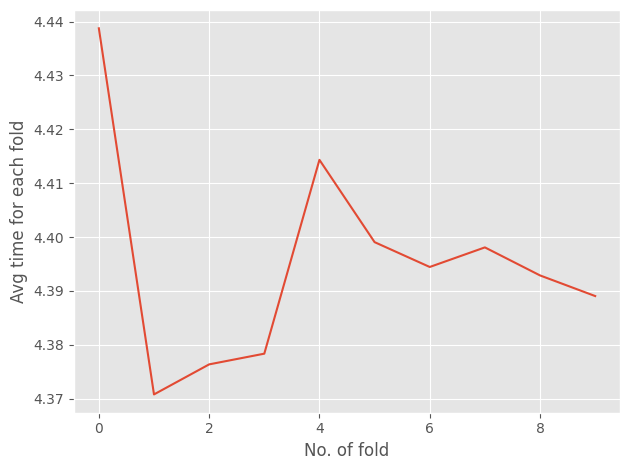

In [84]:
import matplotlib.pyplot as plt

times_vgg16_n = np.zeros((10,100))
for i, row in enumerate(times_vgg16):
    times_vgg16_n[i, :len(row)] = row

times_vgg16_n_n = np.mean(times_vgg16_n,axis=1)

plt.plot(times_vgg16_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("vgg16 times")
plt.show()

In [85]:
train_acc_vgg16_n = np.zeros((10,100))
for i, row in enumerate(train_acc_vgg16):
    train_acc_vgg16_n[i, :len(row)] = row
    
test_acc_vgg16_n = np.zeros((10,100))
for i, row in enumerate(test_acc_vgg16):
    test_acc_vgg16_n[i, :len(row)] = row
    
train_loss_vgg16_n = np.zeros((10,100))
for i, row in enumerate(train_loss_vgg16):
    train_loss_vgg16_n[i, :len(row)] = row
    
test_loss_vgg16_n = np.zeros((10,100))
for i, row in enumerate(test_loss_vgg16):
    test_loss_vgg16_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_vgg16_n = np.mean(train_acc_vgg16_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_vgg16_n = np.mean(test_acc_vgg16_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_vgg16_n = np.mean(train_loss_vgg16_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_vgg16_n = np.mean(test_loss_vgg16_n,axis=0)

In [86]:
data = [train_acc_vgg16_n,test_acc_vgg16_n,train_loss_vgg16_n,test_loss_vgg16_n]

df = pd.DataFrame(data)
df.to_csv('vgg16_acc', index=False)
df = pd.read_csv('vgg16_acc')

train_acc_vgg16_n = df.iloc[0]
test_acc_vgg16_n = df.iloc[1]
train_loss_vgg16_n = df.iloc[2]
test_loss_vgg16_n = df.iloc[3]


df_t = pd.DataFrame([times_vgg16_n_n])
df_t.to_csv('vgg16_times', index=False)
df_t = pd.read_csv('vgg16_times')

times_vgg16_n_n = df_t.iloc[0]

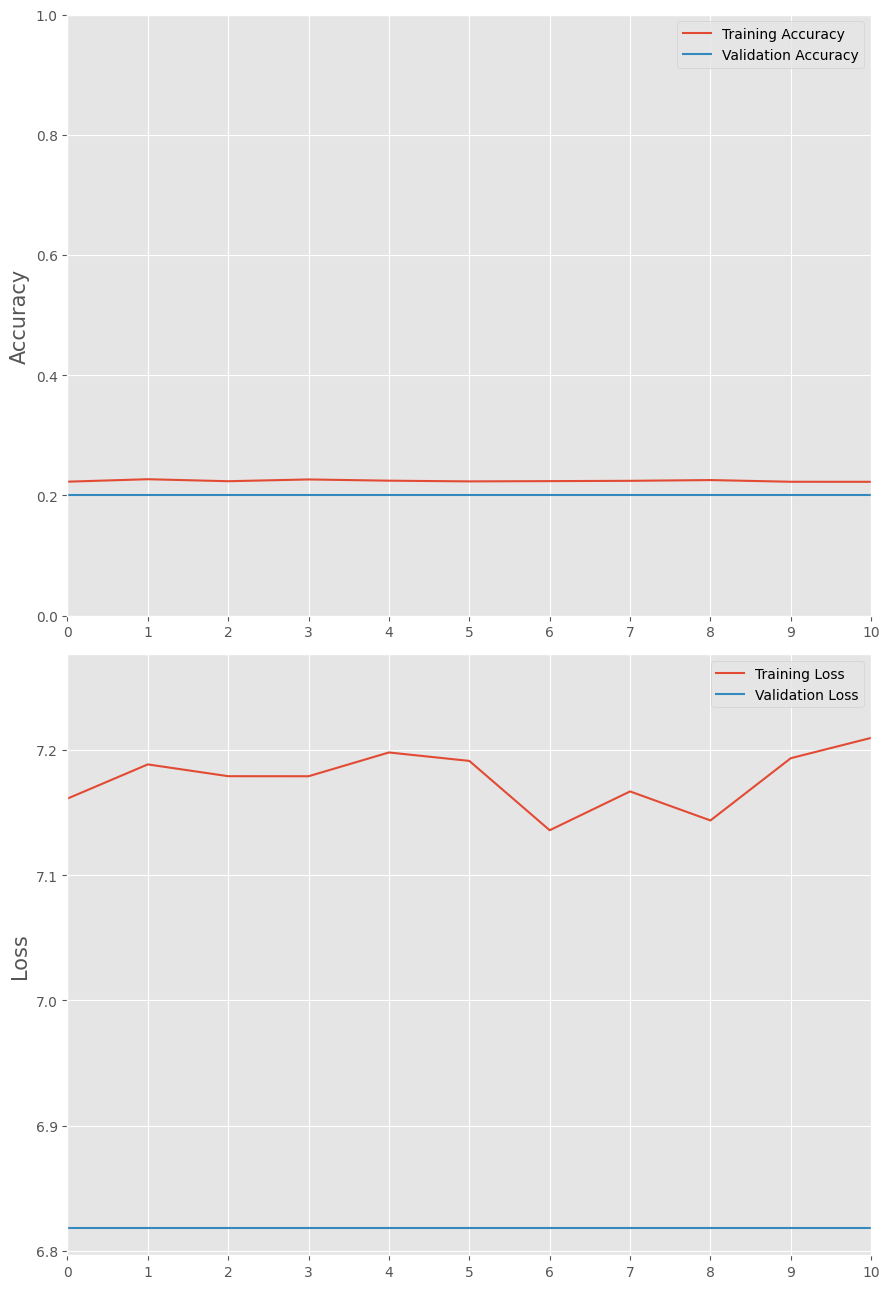

In [87]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_vgg16_n, label='Training Accuracy')
axs[0].plot(test_acc_vgg16_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_vgg16_n, label='Training Loss')
axs[1].plot(test_loss_vgg16_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("vgg16 Training and Testing Loss")
plt.show()

In [88]:
np.array(scores_vgg16).shape

(10, 302, 4)

In [89]:
y_pred_vgg16 = np.argmax(scores_vgg16,axis=2)

In [90]:
y_pred_vgg16.shape

(10, 302)

In [91]:
from sklearn.metrics import accuracy_score
acc_scores_vgg16 = []
for i in range(len(y_test_all_vgg16)):
    acc_scores_vgg16.append(accuracy_score(y_true = y_test_all_vgg16[i],y_pred = y_pred_vgg16[i]))

In [92]:
acc_scores_vgg16

[0.3443708609271523,
 0.12582781456953643,
 0.16556291390728478,
 0.17549668874172186,
 0.1291390728476821,
 0.39403973509933776,
 0.2251655629139073,
 0.2152317880794702,
 0.18874172185430463,
 0.24503311258278146]

In [93]:
df_acc = pd.DataFrame([acc_scores_vgg16])

df_acc.to_csv('vgg16_accuracy', index=False)

df_acc = pd.read_csv('vgg16_accuracy')

acc_scores_vgg16 = df_acc.iloc[0].values

In [94]:
y_test_all_n = np.array(y_test_all_vgg16)

y_pred_vgg16_n = y_pred_vgg16.flatten()
y_test_all_n = y_test_all_n.flatten()

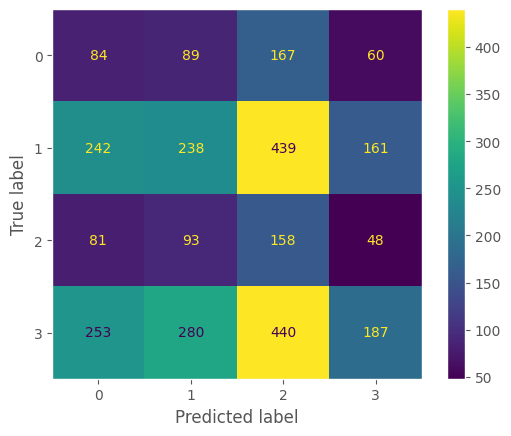

In [95]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_vgg16_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("vgg16")
plt.show()

In [96]:
import gc
gc.collect()

29980

In [97]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_vgg16_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.13      0.21      0.16       400
           1       0.34      0.22      0.27      1080
           2       0.13      0.42      0.20       380
           3       0.41      0.16      0.23      1160

    accuracy                           0.22      3020
   macro avg       0.25      0.25      0.21      3020
weighted avg       0.31      0.22      0.23      3020



# VGG19

In [98]:
import gc
gc.collect()

0

In [99]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_vgg19 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_vgg19.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [100]:
def create_model_vgg19():

    model_vgg19 = tf.keras.Sequential([
    tf.keras.applications.VGG19(input_shape=(X_n.shape[1], X_n.shape[2], X_n.shape[3]),include_top= False,weights='imagenet'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_vgg19.trainable = False
    return model_vgg19

In [101]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_vgg19 = []
y_test_all_vgg19 = []
train_acc_vgg19 = []
test_acc_vgg19 = []
train_loss_vgg19 = []
test_loss_vgg19 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_vgg19.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_vgg19 = None
    model_vgg19 = create_model_vgg19()
        
    model_vgg19.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_vgg19.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_vgg19.predict(X_test)
    
    scores_vgg19.append(x)
    train_acc_vgg19.append(history.history["accuracy"])
    test_acc_vgg19.append(history.history["val_accuracy"])
    train_loss_vgg19.append(history.history["loss"])
    test_loss_vgg19.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 6s 69ms/step - loss: 6.1925 - accuracy: 0.1676 - val_loss: 5.4045 - val_accuracy: 0.1507 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 5s 66ms/step - loss: 6.0838 - accuracy: 0.1590 - val_loss: 5.4045 - val_accuracy: 0.1507 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 5s 66ms/step - loss: 6.1409 - accuracy: 0.1562 - val_loss: 5.4045 - val_accuracy: 0.1507 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 5s 67ms/step - loss: 6.1750 - accuracy: 0.1619 - val_loss: 5.4045 - val_accuracy: 0.1507 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 5s 66ms/step - loss: 6.2643 - accuracy: 0.1582 - val_loss: 5.4045 - val_accuracy: 0.1507 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 5s 67ms/step - loss: 6.1644 - accuracy: 0.1603 - val_loss: 5.4045 - val_accuracy: 0.1507 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Time taken for epoch 29: 5.17 seconds
77/77 [==============================] - 5s 67ms/step - loss: 6.1906 - accuracy: 0.1619 - val_loss: 5.4045 - val_accuracy: 0.1507 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 5s 66ms/step - loss: 6.1423 - accuracy: 0.1643 - val_loss: 5.4045 - val_accuracy: 0.1507 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 5s 67ms/step - loss: 6.1596 - accuracy: 0.1537 - val_loss: 5.4045 - val_accuracy: 0.1507 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 5s 67ms/step - loss: 6.1506 - accuracy: 0.1619 - val_loss: 5.4045 - val_accuracy: 0.1507 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 5s 66ms/step - loss: 6.1290 - accuracy: 0.1599 - val_loss: 5.4045 - val_accuracy: 0.1507 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 5s 67ms/step - loss: 6.1641 - accuracy: 0.1705 - val_loss: 5.4045 - val_accuracy: 0.1507 - lr: 1.6000e-06
Epoch 35/100
77

Epoch 58/100
77/77 [==============================] - 5s 66ms/step - loss: 6.2180 - accuracy: 0.1668 - val_loss: 5.4045 - val_accuracy: 0.1507 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 5s 67ms/step - loss: 6.2255 - accuracy: 0.1643 - val_loss: 5.4045 - val_accuracy: 0.1507 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 5s 67ms/step - loss: 6.1488 - accuracy: 0.1643 - val_loss: 5.4045 - val_accuracy: 0.1507 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 5s 67ms/step - loss: 6.1974 - accuracy: 0.1652 - val_loss: 5.4045 - val_accuracy: 0.1507 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 5s 66ms/step - loss: 6.2788 - accuracy: 0.1582 - val_loss: 5.4045 - val_accuracy: 0.1507 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 5s 67ms/step - loss: 6.2267 - accuracy: 0.1541 - val_loss: 5.4045 - val_accuracy: 0.1507 - lr: 2.5600e-09
Epoch 64/100
76/77 [====================

77/77 [==============================] - 5s 66ms/step - loss: 6.1990 - accuracy: 0.1603 - val_loss: 5.4045 - val_accuracy: 0.1507 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 5s 67ms/step - loss: 6.1938 - accuracy: 0.1643 - val_loss: 5.4045 - val_accuracy: 0.1507 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 5s 67ms/step - loss: 6.2377 - accuracy: 0.1619 - val_loss: 5.4045 - val_accuracy: 0.1507 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 5s 67ms/step - loss: 6.1034 - accuracy: 0.1676 - val_loss: 5.4045 - val_accuracy: 0.1507 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 5s 66ms/step - loss: 6.1282 - accuracy: 0.1574 - val_loss: 5.4045 - val_accuracy: 0.1507 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 5s 67ms/step - loss: 6.1522 - accuracy: 0.1652 - val_loss: 5.4045 - val_accuracy: 0.1507 - lr: 4.0960e-12
Epoch 92/100
76/77 [============================>.] -

Epoch 15/100
76/77 [============================>.] - ETA: 0s - loss: 5.8173 - accuracy: 0.1879
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 5.15 seconds
77/77 [==============================] - 5s 67ms/step - loss: 5.8049 - accuracy: 0.1881 - val_loss: 5.0721 - val_accuracy: 0.1360 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 5s 67ms/step - loss: 5.7485 - accuracy: 0.1811 - val_loss: 5.0721 - val_accuracy: 0.1360 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 5s 66ms/step - loss: 5.9342 - accuracy: 0.1832 - val_loss: 5.0721 - val_accuracy: 0.1360 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 5s 67ms/step - loss: 5.8650 - accuracy: 0.1917 - val_loss: 5.0721 - val_accuracy: 0.1360 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 5s 67ms/step - loss: 5.9493 - accuracy: 0.1799 - val_loss: 5.0721 - val_accuracy: 0.1360 - lr: 4.0000e-05
E

76/77 [============================>.] - ETA: 0s - loss: 5.8236 - accuracy: 0.1838
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 5.13 seconds
77/77 [==============================] - 5s 67ms/step - loss: 5.8083 - accuracy: 0.1844 - val_loss: 5.0721 - val_accuracy: 0.1360 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 5s 67ms/step - loss: 5.8560 - accuracy: 0.1852 - val_loss: 5.0721 - val_accuracy: 0.1360 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 5s 66ms/step - loss: 5.9123 - accuracy: 0.1905 - val_loss: 5.0721 - val_accuracy: 0.1360 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 5s 67ms/step - loss: 5.8198 - accuracy: 0.1860 - val_loss: 5.0721 - val_accuracy: 0.1360 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 5s 67ms/step - loss: 5.7534 - accuracy: 0.1905 - val_loss: 5.0721 - val_accuracy: 0.1360 - lr: 6.4000e-08
Epoch 48/100
77

76/77 [============================>.] - ETA: 0s - loss: 6.0454 - accuracy: 0.1785
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 5.12 seconds
77/77 [==============================] - 5s 67ms/step - loss: 6.0348 - accuracy: 0.1774 - val_loss: 5.0721 - val_accuracy: 0.1360 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 5s 67ms/step - loss: 5.8109 - accuracy: 0.1848 - val_loss: 5.0721 - val_accuracy: 0.1360 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 5s 66ms/step - loss: 5.7818 - accuracy: 0.1832 - val_loss: 5.0721 - val_accuracy: 0.1360 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 5s 67ms/step - loss: 5.8571 - accuracy: 0.1848 - val_loss: 5.0721 - val_accuracy: 0.1360 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 5s 67ms/step - loss: 5.8814 - accuracy: 0.1811 - val_loss: 5.0721 - val_accuracy: 0.1360 - lr: 1.0240e-10
Epoch 76/100
7

76/77 [============================>.] - ETA: 0s - loss: 5.9325 - accuracy: 0.1863
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 5.15 seconds
77/77 [==============================] - 5s 67ms/step - loss: 5.9312 - accuracy: 0.1856 - val_loss: 5.0721 - val_accuracy: 0.1360 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 1s 58ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 6s 69ms/step - loss: 4.7547 - accuracy: 0.2232 - val_loss: 4.0740 - val_accuracy: 0.1801 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 5s 67ms/step - loss: 4.8859 - accuracy: 0.2155 - val_loss: 4.0740 - val_accuracy: 0.1801 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 5s 67ms/step - loss: 4.8098 - accuracy: 0.2183 - val_loss: 4.0740 - val_accuracy: 0.1801 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 5s 66ms/step - loss: 4.6628 - accuracy: 0.2

In [102]:
times_vgg19

In [103]:
import gc
gc.collect()

In [104]:
import matplotlib.pyplot as plt

times_vgg19_n = np.zeros((10,100))
for i, row in enumerate(times_vgg19):
    times_vgg19_n[i, :len(row)] = row

times_vgg19_n_n = np.mean(times_vgg19_n,axis=1)

plt.plot(times_vgg19_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("vgg19 times")
plt.show()

In [105]:
train_acc_vgg19_n = np.zeros((10,100))
for i, row in enumerate(train_acc_vgg19):
    train_acc_vgg19_n[i, :len(row)] = row
    
test_acc_vgg19_n = np.zeros((10,100))
for i, row in enumerate(test_acc_vgg19):
    test_acc_vgg19_n[i, :len(row)] = row
    
train_loss_vgg19_n = np.zeros((10,100))
for i, row in enumerate(train_loss_vgg19):
    train_loss_vgg19_n[i, :len(row)] = row
    
test_loss_vgg19_n = np.zeros((10,100))
for i, row in enumerate(test_loss_vgg19):
    test_loss_vgg19_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_vgg19_n = np.mean(train_acc_vgg19_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_vgg19_n = np.mean(test_acc_vgg19_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_vgg19_n = np.mean(train_loss_vgg19_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_vgg19_n = np.mean(test_loss_vgg19_n,axis=0)

In [106]:
data = [train_acc_vgg19_n,test_acc_vgg19_n,train_loss_vgg19_n,test_loss_vgg19_n]

df = pd.DataFrame(data)
df.to_csv('vgg19_acc', index=False)
df = pd.read_csv('vgg19_acc')

train_acc_vgg19_n = df.iloc[0]
test_acc_vgg19_n = df.iloc[1]
train_loss_vgg19_n = df.iloc[2]
test_loss_vgg19_n = df.iloc[3]


df_t = pd.DataFrame([times_vgg19_n_n])
df_t.to_csv('vgg19_times', index=False)
df_t = pd.read_csv('vgg19_times')

times_vgg19_n_n = df_t.iloc[0]

In [107]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_vgg19_n, label='Training Accuracy')
axs[0].plot(test_acc_vgg19_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_vgg19_n, label='Training Loss')
axs[1].plot(test_loss_vgg19_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("vgg19 Training and Testing Loss")
plt.show()

In [108]:
np.array(scores_vgg19).shape

In [109]:
y_pred_vgg19 = np.argmax(scores_vgg19,axis=2)

In [110]:
y_pred_vgg19.shape

In [111]:
from sklearn.metrics import accuracy_score
acc_scores_vgg19 = []
for i in range(len(y_test_all_vgg19)):
    acc_scores_vgg19.append(accuracy_score(y_true = y_test_all_vgg19[i],y_pred = y_pred_vgg19[i]))

In [112]:
acc_scores_vgg19

In [113]:
df_acc = pd.DataFrame([acc_scores_vgg19])

df_acc.to_csv('vgg19_accuracy', index=False)

df_acc = pd.read_csv('vgg19_accuracy')

acc_scores_vgg19 = df_acc.iloc[0].values

In [114]:
y_test_all_n = np.array(y_test_all_vgg19)

y_pred_vgg19_n = y_pred_vgg19.flatten()
y_test_all_n = y_test_all_n.flatten()

In [115]:
import gc
gc.collect()

In [116]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_vgg19_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("vgg19")
plt.show()

In [117]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_vgg19_n)
print(cf_r)

In [118]:
train_loss_vgg19_n.shape

#  Performance Metrics

## accuracy_score Metrics

In [119]:
df_acc = pd.read_csv('cnn_svm_accuracy')
acc_scores_cnn_svm = df_acc.iloc[0].values


df_acc = pd.read_csv('lstm_accuracy')
acc_scores_lstm = df_acc.iloc[0].values


df_acc = pd.read_csv('bilstm_accuracy')
acc_scores_bilstm = df_acc.iloc[0].values


df_acc = pd.read_csv('birnn_accuracy')
acc_scores_birnn = df_acc.iloc[0].values



df_acc = pd.read_csv('mnv2_accuracy')
acc_scores_mnv2 = df_acc.iloc[0].values


df_acc = pd.read_csv('env2l_accuracy')
acc_scores_env2l = df_acc.iloc[0].values


df_acc = pd.read_csv('enb7_accuracy')
acc_scores_enb7 = df_acc.iloc[0].values


df_acc = pd.read_csv('nnl_accuracy')
acc_scores_nnl = df_acc.iloc[0].values


df_acc = pd.read_csv('nnb_accuracy')
acc_scores_nnb = df_acc.iloc[0].values



df_acc = pd.read_csv('axn_accuracy')
acc_scores_axn = df_acc.iloc[0].values



df_acc = pd.read_csv('rnv2_accuracy')
acc_scores_rnv2 = df_acc.iloc[0].values



df_acc = pd.read_csv('xv3_accuracy')
acc_scores_xv3 = df_acc.iloc[0].values



df_acc = pd.read_csv('vgg16_accuracy')
acc_scores_vgg16 = df_acc.iloc[0].values



df_acc = pd.read_csv('vgg19_accuracy')
acc_scores_vgg19 = df_acc.iloc[0].values

In [120]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(acc_scores_cnn_svm,label='CNN + SVM',color='teal')
plt.plot(acc_scores_lstm,label='LSTM',color='darkkhaki')
plt.plot(acc_scores_bilstm,label='BILSTM',color='cornflowerblue',linewidth=4,linestyle='--')
plt.plot(acc_scores_birnn,label='BIRNN',color='lightsteelblue')
plt.plot(acc_scores_mnv2,label='MNV2',color = 'lightsalmon')
plt.plot(acc_scores_rnv2,label='RNV2',color='crimson')
plt.plot(acc_scores_axn,label='AXN',color='gray')
plt.plot(acc_scores_nnl,label='NNL',color='cyan')
plt.plot(acc_scores_nnb,label='NNB',color='black')
plt.plot(acc_scores_env2l,label='ENV2l',color='lime')
plt.plot(acc_scores_vgg16,label='VGG16',color='blue')
plt.plot(acc_scores_vgg19,label='VGG19',color='fuchsia')
plt.plot(acc_scores_xv3,label='XV3',color='orange')
plt.plot(acc_scores_enb7,label='ENB7',color='pink')

plt.xlabel("Fold",fontsize = 20)
plt.ylabel("Accuracy (%)",fontsize = 20)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="12")
plt.tight_layout()
plt.savefig("Deep Learning Chroma Accuracy")
plt.show()

## Times Metrics

In [121]:
df_acc = pd.read_csv('cnn_svm_times')
times_cnn_svm = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('lstm_times')
times_lstm = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('bilstm_times')
times_bilstm = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('birnn_times')
times_birnn = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('mnv2_times')
times_mnv2 = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('env2l_times')
times_env2l = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('enb7_times')
times_enb7 = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('nnl_times')
times_nnl = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('nnb_times')
times_nnb = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('axn_times')
times_axn = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('rnv2_times')
times_rnv2 = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('xv3_times')
times_xv3 = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('vgg16_times')
times_vgg16 = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('vgg19_times')
times_vgg19 = np.mean(df_acc.iloc[0].values)

In [122]:
df_acc = pd.read_csv('vgg19_times')
times_vgg19 = df_acc.iloc[0].values
times_vgg19

In [123]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(times_cnn_svm,label='CNN + SVM',color='teal',linewidth=2)
plt.plot(times_lstm,label='LSTM',color='darkkhaki',linewidth=2)
plt.plot(times_bilstm,label='BILSTM',color='cornflowerblue',linewidth=2)
plt.plot(times_birnn,label='BIRNN',color='lightsteelblue',linewidth=3)
plt.plot(times_mnv2,label='MNV2',color = 'lightsalmon',linewidth=2)
plt.plot(times_rnv2,label='RNV2',color='crimson',linewidth=2)
plt.plot(times_axn,label='AXN',color='gray',linewidth=2)
plt.plot(times_nnl,label='NNL',color='cyan',linewidth=2)
plt.plot(times_nnb,label='NNB',color='black',linewidth=2)
plt.plot(times_env2l,label='ENV2l',color='lime',linewidth=2)
plt.plot(times_vgg16,label='VGG16',color='blue',linewidth=2)
plt.plot(times_vgg19,label='VGG19',color='fuchsia',linewidth=2)
plt.plot(times_xv3,label='XV3',color='orange',linewidth=2)
plt.plot(times_enb7,label='ENB7',color='pink',linewidth=2)

plt.xlabel("Fold",fontsize = 20)
plt.ylabel("Time (sec)",fontsize = 20)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylim(y.min(),)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="12")
plt.tight_layout()
plt.savefig("Deep Learning Chroma Times")
plt.show()

In [124]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
# List names
list_names = ["List 1", "List 2", "List 3", "List 4", "List 5", "List 6", "List 7", "List 8", "List 9", "List 10", "List 11", "List 12", "List 13", "List 14"]

# Data values for each list
data_values = [3, 5, 7, 2, 9, 4, 6, 1, 8, 2, 5, 3, 6, 4]

# Custom colors for each bar
custom_colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'gray', 'teal', 'pink', 'olive', 'gold']

# Width of each bar
bar_width = 1

# Calculate the positions of the bars on the x-axis
bar_positions = np.arange(len(data_values))

# Creating the bar plot
plt.bar(bar_positions, data_values, color=custom_colors, width=bar_width)

# Adding labels to each bar
# for i in range(len(list_names)):
#     plt.text(bar_positions[i], data_values[i], list_names[i], ha='center', va='bottom')

# Customizing the plot
plt.xlabel('Lists')
plt.ylabel('Values')
plt.title('Bar Plot with List Names')
# plt.xticks(bar_positions, list_names, rotation=45)

# Displaying the plot
plt.tight_layout()
plt.legend()
plt.show()


# Training and Testing Perfomance

In [125]:
df_acc = pd.read_csv('cnn_svm_acc')
train_acc_cnn_svm_n = df_acc.iloc[0].values
test_acc_cnn_svm_n = df_acc.iloc[1].values
train_loss_cnn_svm_n = df_acc.iloc[2].values
test_loss_cnn_svm_n = df_acc.iloc[3].values

df_acc = pd.read_csv('lstm_acc')
train_acc_lstm_n = df_acc.iloc[0].values
test_acc_lstm_n = df_acc.iloc[1].values
train_loss_lstm_n = df_acc.iloc[2].values
test_loss_lstm_n = df_acc.iloc[3].values


df_acc = pd.read_csv('bilstm_acc')
train_acc_bilstm_n = df_acc.iloc[0].values
test_acc_bilstm_n = df_acc.iloc[1].values
train_loss_bilstm_n = df_acc.iloc[2].values
test_loss_bilstm_n = df_acc.iloc[3].values


df_acc = pd.read_csv('birnn_acc')
train_acc_birnn_n = df_acc.iloc[0].values
test_acc_birnn_n = df_acc.iloc[1].values
train_loss_birnn_n = df_acc.iloc[2].values
test_loss_birnn_n = df_acc.iloc[3].values



df_acc = pd.read_csv('mnv2_acc')
train_acc_mnv2_n = df_acc.iloc[0].values
test_acc_mnv2_n = df_acc.iloc[1].values
train_loss_mnv2_n = df_acc.iloc[2].values
test_loss_mnv2_n = df_acc.iloc[3].values


df_acc = pd.read_csv('env2l_acc')
train_acc_env2l_n = df_acc.iloc[0].values
test_acc_env2l_n = df_acc.iloc[1].values
train_loss_env2l_n = df_acc.iloc[2].values
test_loss_env2l_n = df_acc.iloc[3].values


df_acc = pd.read_csv('enb7_acc')
train_acc_enb7_n = df_acc.iloc[0].values
test_acc_enb7_n = df_acc.iloc[1].values
train_loss_enb7_n = df_acc.iloc[2].values
test_loss_enb7_n = df_acc.iloc[3].values


df_acc = pd.read_csv('nnl_acc')
train_acc_nnl_n = df_acc.iloc[0].values
test_acc_nnl_n = df_acc.iloc[1].values
train_loss_nnl_n = df_acc.iloc[2].values
test_loss_nnl_n = df_acc.iloc[3].values


df_acc = pd.read_csv('nnb_acc')
train_acc_nnb_n = df_acc.iloc[0].values
test_acc_nnb_n = df_acc.iloc[1].values
train_loss_nnb_n = df_acc.iloc[2].values
test_loss_nnb_n = df_acc.iloc[3].values



df_acc = pd.read_csv('axn_acc')
train_acc_axn_n = df_acc.iloc[0].values
test_acc_axn_n = df_acc.iloc[1].values
train_loss_axn_n = df_acc.iloc[2].values
test_loss_axn_n = df_acc.iloc[3].values



df_acc = pd.read_csv('rnv2_acc')
train_acc_rnv2_n = df_acc.iloc[0].values
test_acc_rnv2_n = df_acc.iloc[1].values
train_loss_rnv2_n = df_acc.iloc[2].values
test_loss_rnv2_n = df_acc.iloc[3].values



df_acc = pd.read_csv('xv3_acc')
train_acc_xv3_n = df_acc.iloc[0].values
test_acc_xv3_n = df_acc.iloc[1].values
train_loss_xv3_n = df_acc.iloc[2].values
test_loss_xv3_n = df_acc.iloc[3].values



df_acc = pd.read_csv('vgg16_acc')
train_acc_vgg16_n = df_acc.iloc[0].values
test_acc_vgg16_n = df_acc.iloc[1].values
train_loss_vgg16_n = df_acc.iloc[2].values
test_loss_vgg16_n = df_acc.iloc[3].values



df_acc = pd.read_csv('vgg19_acc')
train_acc_vgg19_n = df_acc.iloc[0].values
test_acc_vgg19_n = df_acc.iloc[1].values
train_loss_vgg19_n = df_acc.iloc[2].values
test_loss_vgg19_n = df_acc.iloc[3].values

## Training Accuracy Perfomance

In [126]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(train_acc_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(train_acc_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(train_acc_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(train_acc_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(train_acc_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(train_acc_rnv2_n,label='RNV2',color='crimson')
plt.plot(train_acc_axn_n,label='AXN',color='gray')
plt.plot(train_acc_nnl_n,label='NNL',color='cyan')
plt.plot(train_acc_nnb_n,label='NNB',color='black')
plt.plot(train_acc_env2l_n,label='ENV2l',color='lime')
plt.plot(train_acc_vgg16_n,label='VGG16',color='blue')
plt.plot(train_acc_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(train_acc_xv3_n,label='XV3',color='orange')
plt.plot(train_acc_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Accuracy (%)",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Training Accuracy Performance")
plt.show()

## Testing Accuracy Perfomance

In [127]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(test_acc_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(test_acc_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(test_acc_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(test_acc_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(test_acc_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(test_acc_rnv2_n,label='RNV2',color='crimson')
plt.plot(test_acc_axn_n,label='AXN',color='gray')
plt.plot(test_acc_nnl_n,label='NNL',color='cyan')
plt.plot(test_acc_nnb_n,label='NNB',color='black')
plt.plot(test_acc_env2l_n,label='ENV2l',color='lime')
plt.plot(test_acc_vgg16_n,label='VGG16',color='blue')
plt.plot(test_acc_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(test_acc_xv3_n,label='XV3',color='orange')
plt.plot(test_acc_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Accuracy (%)",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Testing Accuracy Performance")
plt.show()

## Training Loss Perfomance

In [128]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(train_loss_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(train_loss_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(train_loss_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(train_loss_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(train_loss_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(train_loss_rnv2_n,label='RNV2',color='crimson')
plt.plot(train_loss_axn_n,label='AXN',color='gray')
plt.plot(train_loss_nnl_n,label='NNL',color='cyan')
plt.plot(train_loss_nnb_n,label='NNB',color='black')
plt.plot(train_loss_env2l_n,label='ENV2l',color='lime')
plt.plot(train_loss_vgg16_n,label='VGG16',color='blue')
plt.plot(train_loss_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(train_loss_xv3_n,label='XV3',color='orange')
plt.plot(train_loss_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.ylim(y.min(),y.max())
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Loss",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Training Loss Performance")
plt.show()

## Testing Loss Perfomance

In [129]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(test_loss_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(test_loss_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(test_loss_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(test_loss_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(test_loss_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(test_loss_rnv2_n,label='RNV2',color='crimson')
plt.plot(test_loss_axn_n,label='AXN',color='gray')
plt.plot(test_loss_nnl_n,label='NNL',color='cyan')
plt.plot(test_loss_nnb_n,label='NNB',color='black')
plt.plot(test_loss_env2l_n,label='ENV2l',color='lime')
plt.plot(test_loss_vgg16_n,label='VGG16',color='blue')
plt.plot(test_loss_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(test_loss_xv3_n,label='XV3',color='orange')
plt.plot(test_loss_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.ylim(y.min(),y.max())
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Loss",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Testing Loss Performance")
plt.show()